# Clubs_Tweets_Top_Ligue1_Clubs

In [1]:
import os

os.chdir("C://Users//basti//Google Drive//Thesis_Bast//Code_Thesis")
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\basti\Google Drive\Thesis_Bast\Code_Thesis


In [104]:
from IPython.display import clear_output
clear_output()
import advertools as adv
import pandas as pd
pd.options.display.max_columns = None
import plotly.graph_objects as go
import plotly
import warnings
warnings.filterwarnings("ignore")

I manually got the Twitter handles of each club by searching for them on Twitter. Here are the clubs with the biggest communities, identified during the literature review. 

In [4]:
handles_clubs = [
    'OM_Officiel',
    'PSG_inside',
    'AS_Monaco',
    'ASSEofficiel',
    'OL',
    'losclive',
    'FCNantes',
]

In [5]:
handles_clubs2 = {
    'OM_Officiel':'Marseille',
    'PSG_inside':'Paris',
    'AS_Monaco':'Monaco' ,
    'ASSEofficiel':'asse',
    'OL':'Lyon',
    'losclive':'Lille',
    'FCNantes':'Nantes'
}
print(handles_clubs2)

{'OM_Officiel': 'Marseille', 'PSG_inside': 'Paris', 'AS_Monaco': 'Monaco', 'ASSEofficiel': 'asse', 'OL': 'Lyon', 'losclive': 'Lille', 'FCNantes': 'Nantes'}


# Collecting the data with Twitter's API

In [109]:
auth_params = {
    'app_key': 'd1vumEybD0TVgu9ymbXHQKLkv',
    'app_secret': 'XLz9UuTAlmMv4JiAYAIaU5BbcjBAxqRAvVU2jO16lyMkDllx9S',
    'oauth_token': '895649658-jgwnVKSSsNQQ9WY2thpYegi7ZljM2dDdR2lb578x',
    'oauth_token_secret': 'RF9aEUKkjhFq6Unj5bVAyfSd0Pydj7IE53VlUqQFhIoJw',
}

adv.twitter.set_auth_params(**auth_params)

In [110]:
user_dfs = []

for club in handles_clubs:
    df = adv.twitter.lookup_user(screen_name=club, tweet_mode='extended')
    user_dfs.append(df)

user_dfs = pd.concat(user_dfs, sort=False)
user_dfs.to_csv('user_dfs.csv', index=False)

2020-11-08 16:34:37,384 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=OM_Officiel, tweet_mode=extended
2020-11-08 16:34:38,104 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:34:38,574 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=AS_Monaco, tweet_mode=extended
2020-11-08 16:34:39,037 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:34:39,486 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=OL, tweet_mode=extended
2020-11-08 16:34:39,942 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting: count=100, max_id=None, screen_name=losclive, tweet_mode=extended
2020-11-08 16:34:40,521 | INFO | twitter.py:163 | wrapper | lookup_user | Requesting

In [111]:
user_dfs


id     id_str                    name   screen_name  \
0   40448264   40448264  Olympique de Marseille   OM_Officiel   
0   38164846   38164846     Paris Saint-Germain    PSG_inside   
0  558572709  558572709            AS Monaco 🇲🇨     AS_Monaco   
0  238179126  238179126        AS Saint-Étienne  ASSEofficiel   
0   33893706   33893706      Olympique Lyonnais            OL   
0  288804720  288804720                    LOSC      losclive   
0  804263442  804263442               FC Nantes      FCNantes   

                  location  \
0                Marseille   
0  Parc des Princes, Paris   
0                   Monaco   
0  Stade Geoffroy-Guichard   
0             Lyon, France   
0                    Lille   
0    Stade de la Beaujoire   

                                                                                                                                   description  \
0    Twitter officiel de l'Olympique de Marseille (OM) @OM_Espanol @OM_English @OM_Japanese @OM_Arab @orangevelodrome @omfondation #DroitAuBut   
0          🇺🇸🇬🇧@PSG_English🇪🇸@PSG_Espanol🇧🇷@PSGBrasil🇶🇦@PSG_Arab🇮🇩@PSGIndonesia🇯🇵@PSGJapan👱‍♀️@PSG_Feminines🎮@PSGeSports🥋@PSG_Judo🤾‍♂️@PSGHand   
0     Twitter officiel de l’AS Monaco ! 🇬🇧 @as_monaco_en 🇧🇷 @as_monaco_br 🇩🇿 @as_monaco_ar 🇪🇸 @as_monaco_es 🎮 @ASMonacoEsports ❤️ @ASMonacoeur   
0                                                    🇺🇸🇬🇧 @ASSE_english | 💚 @ASSECoeurVert | 📺 https://t.co/8x9MsDNiq8 | 🤗 #TeamASSE 🟢⚪️ #ASSE   
0  Compte officiel de l'Olympique Lyonnais - 🏟️ @GroupamaStadium 🇬🇧 @OL_English 🇧🇷🇵🇹 @OL_Portugues 👸 @OLfeminin ❤️💙 @OLfondation ⁉️@OL_Service   
0   Compte officiel du LOSC - @LOSC_Feminines 👱‍♀️ - @LOSCAcademy 🍼 - @LOSC_eSports 🎮 - @LOSC_EN 🇬🇧 - @LOSC_PT 🇵🇹🇧🇷 - @LOSC_ES 🇪🇸 - losclive 📸   
0    Compte officiel du Football Club de Nantes 🟡🟢 @FCNantesEsports 🎮 • @FCN_Business 💼 • @FCN_Academie 👶 • @FCN_Feminines 👧 • @FCN_Services 🗣   

                       url  \
0  https://t.co/QSz7Du7WD7   
0  https://t.co/g266nQXmqR   
0  https://t.co/iXxunXUcYU   
0  https://t.co/3TSsx6eb9c   
0  https://t.co/24uShUw2Lb   
0  https://t.co/vTqhjpXdFQ   
0  https://t.co/3aLE8IPuRu   

                                                                                                                                                                                                                                                                                  entities  \
0                                                                                                                    {'url': {'urls': [{'url': 'https://t.co/QSz7Du7WD7', 'expanded_url': 'https://www.om.fr', 'display_url': 'om.fr', 'indices': [0, 23]}]}, 'description': {'urls': []}}   
0                                                                                                                   {'url': {'urls': [{'url': 'https://t.co/g266nQXmqR', 'expanded_url': 'http://www.psg.fr', 'display_url': 'psg.fr', 'indices': [0, 23]}]}, 'description': {'urls': []}}   
0                                                                                                       {'url': {'urls': [{'url': 'https://t.co/iXxunXUcYU', 'expanded_url': 'http://www.asmonaco.com', 'display_url': 'asmonaco.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}   
0  {'url': {'urls': [{'url': 'https://t.co/3TSsx6eb9c', 'expanded_url': 'https://www.asse.fr/', 'display_url': 'asse.fr', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/8x9MsDNiq8', 'expanded_url': 'http://asse.tv', 'display_url': 'asse.tv', 'indices': [42...   
0                                                                                                                     {'url': {'urls': [{'url': 'https://t.co/24uShUw2Lb', 'expanded_url': 'http://www.ol.fr', 'display_url': 'ol.fr', 'indices': [0, 23]}]}, 'description': {'urls': []}}   
0                                                                                                                {'url': {

In [112]:
print(user_dfs.shape)

(user_dfs.reset_index(drop=True).sort_values('followers_count', ascending=False)
 [['created_at', 'screen_name', 'followers_count', 'statuses_count']]
 .style.format({'followers_count': '{:,}','statuses_count':  '{:,}'}))

(7, 43)


These official accounts all have large communities. Paris leads the race in the number of followers.

## Getting the Sub-accounts
Usually on Twitter profiles, users list other accounts that they are affiliated with. In this case the clubs have links (as mentions) to all the other accounts they have. Sub-accounts are typically for other languages, but not all of them.  
`advertools.extract_mentions` can get us the mentions in any text list, together with some summary statistics about those mentions.  
Here we extract the mentions, and then put them together with the main accounts in one list. 

In [113]:
club_handles = user_dfs['screen_name'].tolist()
mentioned_handles = adv.extract_mentions(user_dfs['description'])['mentions_flat']
mentioned_handles = [m.replace('@', '') for m in mentioned_handles]
all_handles = sorted(club_handles + mentioned_handles)
print('number of accounts:', len(all_handles))
print('sample:')
all_handles[:10] + all_handles[-10:]

number of accounts: 48
sample:


['ASSEofficiel',
 'AS_Monaco',
 'FCNantes',
 'OL',
 'OM_Officiel',
 'PSG_inside',
 'as_monaco_ar',
 'as_monaco_br',
 'as_monaco_en',
 'as_monaco_es',
 'psg_arab',
 'psg_english',
 'psg_espanol',
 'psg_feminines',
 'psg_judo',
 'psgbrasil',
 'psgesports',
 'psghand',
 'psgindonesia',
 'psgjapan']

In [115]:
clubs_tweets_dfs = []
for acct in all_handles:
        df = adv.twitter.get_user_timeline(screen_name=acct, count=3500, tweet_mode='extended')
        clubs_tweets_dfs.append(df)
(pd.concat(clubs_tweets_dfs, sort=False, ignore_index=True).to_csv('clubs_tweets.csv', index=False))



2020-11-08 16:36:37,259 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:36:37,954 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1318927972334796801, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:36:38,521 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1312461982684057604, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:36:39,204 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1308056414703816705, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:36:39,988 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1304929168560455679, screen_name=ASSEofficiel, tweet_mode=extended
2020-11-08 16:36:40,873 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1300062943296528386,

2020-11-08 16:37:31,848 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1228760096223760383, screen_name=FCNantes, tweet_mode=extended
2020-11-08 16:37:33,084 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1225077368961658879, screen_name=FCNantes, tweet_mode=extended
2020-11-08 16:37:34,188 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1222172395181608960, screen_name=FCNantes, tweet_mode=extended
2020-11-08 16:37:35,555 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1218537402433708031, screen_name=FCNantes, tweet_mode=extended
2020-11-08 16:37:36,989 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1214143825071017983, screen_name=FCNantes, tweet_mode=extended
2020-11-08 16:37:37,552 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=100, max_id=1213387904241881090, scre

2020-11-08 16:38:28,299 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1304128684102746114, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:38:29,167 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1297292729609867265, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:38:30,002 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1295320758483324938, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:38:31,129 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1292525299733876740, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:38:31,844 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1288906631250616319, screen_name=PSG_inside, tweet_mode=extended
2020-11-08 16:38:32,499 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=128562912072712

2020-11-08 16:39:02,648 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1212846591985500162, screen_name=as_monaco_en, tweet_mode=extended
2020-11-08 16:39:03,134 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1198573030294712319, screen_name=as_monaco_en, tweet_mode=extended
2020-11-08 16:39:03,651 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1183725582787461119, screen_name=as_monaco_en, tweet_mode=extended
2020-11-08 16:39:04,223 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1168906034129330175, screen_name=as_monaco_en, tweet_mode=extended
2020-11-08 16:39:04,800 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1154765561131393023, screen_name=as_monaco_en, tweet_mode=extended
2020-11-08 16:39:05,570 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=11290

2020-11-08 16:39:42,609 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=asmonacoeur, tweet_mode=extended
2020-11-08 16:39:43,339 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1159415379770429439, screen_name=asmonacoeur, tweet_mode=extended
2020-11-08 16:39:43,616 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=asse_english, tweet_mode=extended
2020-11-08 16:39:45,316 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1223168150444875775, screen_name=asse_english, tweet_mode=extended
2020-11-08 16:39:45,985 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1186610889610481663, screen_name=asse_english, tweet_mode=extended
2020-11-08 16:39:46,681 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1162708332571963391, screen_name=asse

2020-11-08 16:40:22,260 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1167438851947864063, screen_name=fcn_feminines, tweet_mode=extended
2020-11-08 16:40:22,777 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1123930706458152961, screen_name=fcn_feminines, tweet_mode=extended
2020-11-08 16:40:23,249 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1091049426167185407, screen_name=fcn_feminines, tweet_mode=extended
2020-11-08 16:40:23,742 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1061966422585364480, screen_name=fcn_feminines, tweet_mode=extended
2020-11-08 16:40:26,929 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1033734885888991231, screen_name=fcn_feminines, tweet_mode=extended
2020-11-08 16:40:27,265 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=

2020-11-08 16:40:59,555 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1164808417581469696, screen_name=losc_en, tweet_mode=extended
2020-11-08 16:41:00,125 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1138118274342957056, screen_name=losc_en, tweet_mode=extended
2020-11-08 16:41:00,728 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1115948176329060353, screen_name=losc_en, tweet_mode=extended
2020-11-08 16:41:01,274 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1095685852607467521, screen_name=losc_en, tweet_mode=extended
2020-11-08 16:41:01,914 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1076568327932334082, screen_name=losc_en, tweet_mode=extended
2020-11-08 16:41:02,542 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1056113085549830143, screen_na

2020-11-08 16:41:34,754 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1124259437965926399, screen_name=losc_feminines, tweet_mode=extended
2020-11-08 16:41:35,486 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1111974005496528895, screen_name=losc_feminines, tweet_mode=extended
2020-11-08 16:41:36,182 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1101840617473273855, screen_name=losc_feminines, tweet_mode=extended
2020-11-08 16:41:36,846 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1091638198466433023, screen_name=losc_feminines, tweet_mode=extended
2020-11-08 16:41:37,561 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1073944006617370623, screen_name=losc_feminines, tweet_mode=extended
2020-11-08 16:41:38,241 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, ma

2020-11-08 16:42:11,701 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1229145754247274501, screen_name=losclive, tweet_mode=extended
2020-11-08 16:42:11,989 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=100, max_id=1228335502920646655, screen_name=losclive, tweet_mode=extended
2020-11-08 16:42:13,628 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=ol_english, tweet_mode=extended
2020-11-08 16:42:14,426 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1322149323073822721, screen_name=ol_english, tweet_mode=extended
2020-11-08 16:42:14,897 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1319259752715735040, screen_name=ol_english, tweet_mode=extended
2020-11-08 16:42:15,474 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1313897580577906687, screen_name=o

2020-11-08 16:42:46,161 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=842044068582576127, screen_name=ol_service, tweet_mode=extended
2020-11-08 16:42:47,013 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=816713446398001152, screen_name=ol_service, tweet_mode=extended
2020-11-08 16:42:47,516 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=789396541312147455, screen_name=ol_service, tweet_mode=extended
2020-11-08 16:42:48,027 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=773575778910949376, screen_name=ol_service, tweet_mode=extended
2020-11-08 16:42:48,457 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=760456825787469823, screen_name=ol_service, tweet_mode=extended
2020-11-08 16:42:49,298 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=720574355428651010, 

2020-11-08 16:43:43,750 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1204021142064947199, screen_name=om_arab, tweet_mode=extended
2020-11-08 16:43:44,618 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1198716134830362624, screen_name=om_arab, tweet_mode=extended
2020-11-08 16:43:45,318 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1190665155077693441, screen_name=om_arab, tweet_mode=extended
2020-11-08 16:43:46,327 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1183428991627210751, screen_name=om_arab, tweet_mode=extended
2020-11-08 16:43:46,649 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=100, max_id=1183111092580564997, screen_name=om_arab, tweet_mode=extended
2020-11-08 16:43:48,287 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=om_english, 

2020-11-08 16:44:44,208 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1228144374053130240, screen_name=om_japanese, tweet_mode=extended
2020-11-08 16:44:45,302 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1206522784655892480, screen_name=om_japanese, tweet_mode=extended
2020-11-08 16:44:46,276 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1188371931768053759, screen_name=om_japanese, tweet_mode=extended
2020-11-08 16:44:47,392 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1172377072179662847, screen_name=om_japanese, tweet_mode=extended
2020-11-08 16:44:48,352 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1153985615282593792, screen_name=om_japanese, tweet_mode=extended
2020-11-08 16:44:49,731 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1131035418

2020-11-08 16:45:45,238 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=None, screen_name=psg_english, tweet_mode=extended
2020-11-08 16:45:46,335 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1321463022276255744, screen_name=psg_english, tweet_mode=extended
2020-11-08 16:45:47,201 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1315773243031199744, screen_name=psg_english, tweet_mode=extended
2020-11-08 16:45:48,172 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1307651452941328385, screen_name=psg_english, tweet_mode=extended
2020-11-08 16:45:49,464 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1300509776049328131, screen_name=psg_english, tweet_mode=extended
2020-11-08 16:45:50,786 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1294056823054622720, scre

2020-11-08 16:46:34,843 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1112336976806666239, screen_name=psg_feminines, tweet_mode=extended
2020-11-08 16:46:36,272 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1094253045507112959, screen_name=psg_feminines, tweet_mode=extended
2020-11-08 16:46:37,298 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1071785149870821375, screen_name=psg_feminines, tweet_mode=extended
2020-11-08 16:46:38,338 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1057707653395300351, screen_name=psg_feminines, tweet_mode=extended
2020-11-08 16:46:39,411 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1041318195746009087, screen_name=psg_feminines, tweet_mode=extended
2020-11-08 16:46:43,707 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=

2020-11-08 16:47:58,153 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1313398773767442431, screen_name=psghand, tweet_mode=extended
2020-11-08 16:47:58,643 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1301915697770045447, screen_name=psghand, tweet_mode=extended
2020-11-08 16:47:59,118 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1253593569971052543, screen_name=psghand, tweet_mode=extended
2020-11-08 16:47:59,559 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1231242976371843071, screen_name=psghand, tweet_mode=extended
2020-11-08 16:48:02,988 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1223337653011132415, screen_name=psghand, tweet_mode=extended
2020-11-08 16:48:03,528 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1201185247880187903, screen_na

2020-11-08 16:48:41,491 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1203275461012291583, screen_name=psgjapan, tweet_mode=extended
2020-11-08 16:48:42,151 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1197959715021410303, screen_name=psgjapan, tweet_mode=extended
2020-11-08 16:48:42,902 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1191677322182578177, screen_name=psgjapan, tweet_mode=extended
2020-11-08 16:48:43,649 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=200, max_id=1186726562420408319, screen_name=psgjapan, tweet_mode=extended
2020-11-08 16:48:44,034 | INFO | twitter.py:163 | wrapper | get_user_timeline | Requesting: count=100, max_id=1185511945358569472, screen_name=psgjapan, tweet_mode=extended


In [116]:
club_tweets = pd.read_csv('clubs_tweets.csv', parse_dates=['tweet_created_at', 'user_created_at'],
                          low_memory=False)
print(club_tweets.shape)
club_tweets.head(10)

(126552, 82)


tweet_created_at             tweet_id         tweet_id_str  \
0 2020-11-08 12:28:48+00:00  1325414968204939264  1325414968204939264   
1 2020-11-08 11:29:21+00:00  1325400009941061633  1325400009941061633   
2 2020-11-08 09:50:33+00:00  1325375145163317248  1325375145163317248   
3 2020-11-08 09:02:54+00:00  1325363154226851842  1325363154226851842   
4 2020-11-08 07:57:54+00:00  1325346794688176128  1325346794688176128   
5 2020-11-07 19:00:06+00:00  1325151054967656448  1325151054967656448   
6 2020-11-07 16:32:35+00:00  1325113933359931396  1325113933359931396   
7 2020-11-07 13:42:37+00:00  1325071159294119937  1325071159294119937   
8 2020-11-07 09:04:49+00:00  1325001246940524545  1325001246940524545   
9 2020-11-06 18:33:22+00:00  1324781939279208450  1324781939279208450   

                                                                                                                                                                                                                                                                           tweet_full_text  \
0                                                                                                                                                                                  🔜 #OLASSE\n\n🔥 Tous les buts de Romain #Hamouma dans le 𝘿𝙚𝙧𝙗𝙮 ! 😍👇\n\n📹 @Dugout https://t.co/pONOyg7880   
1                                             📊 Romain #Hamouma est le seul joueur à avoir marqué au moins un but et délivré au moins une passe décisive lors de chacune des 11 dernières saisons en @Ligue1UberEats. 👌\n\n➕ de chiffres avant le 𝘿𝙚𝙧𝙗𝙮 dans 𝐥𝐞 𝐦𝐚𝐭𝐜𝐡 𝐞𝐧 𝐬𝐭𝐚𝐭𝐬 by @ZEbetFr   
2                                                                                                                                                                                                               📋 #OLASSE : l'avant-match\n\nTout ce qu'il faut savoir sur le 121e 𝘿𝙚𝙧𝙗𝙮 👇   
3                                                                                                                                                                                                                                              🌋 #VertEverywhere 💚 https://t.co/nFEaktFM24   
4                                                                                                                                                       🔥 Jour de 𝘿𝙀𝙍𝘽𝙔 ! 💥\n\n🏆 @Ligue1UberEats - J10\n🏟 Parc OL - 21h\n👊 #OLASSE #Derby #TeamASSE #AllezLesVerts https://t.co/zRoz1f5IGm   
5                                                                                                                                                             🔙 @MoukoudiH et @mtrauco17 de retour ! #OLASSE \n\n👥 Les 22 retenus par Claude #Puel pour le 𝘿𝙚𝙧𝙗𝙮 👇 https://t.co/Ws0Z85vF6i   
6  L'ASSE mobilisée pour le @BleuetFrance avec la @LFPfr \n🤫 Une minute de silence avant le derby pour les victimes de guerre et d'attentats\n👕 Les maillots floqués du blason du @BleuetFrance \n💚 L'ASSE participera à la vente aux enchères des maillots...\n\n👉 https://t.co/ob3ES0...   
7                                               🔙 #ASSERétro \n\nC'était le 7 novembre 1️⃣9️⃣7️⃣9️⃣, en Coupe de l'UEFA !\n\nDéfaits à l'aller, les Verts écrasaient le @PSV au match retour (6-0) ... après un début de match tonitruant et 3 buts en 5 minutes 😱 https://t.co/0ZAOdCfDTh   
8                                                                                            🔙 Sa première licence, son premier ballon, ses premiers souvenirs. @MoukoudiH se livre sur https://t.co/sH7DYgyFTs 🤗\n\n📺 Découvrez le Sergent 𝐞𝐧 𝐭𝐞̂𝐭𝐞 𝐚̀ 𝐭𝐞̂𝐭𝐞 !\n👉 https://t.co/aRauddmRL2   
9                                                                          🔄 𝙇𝙚 𝘿𝙚𝙧𝙗𝙮 et tous les 𝐦𝐚𝐭𝐜𝐡𝐞𝐬 𝐞𝐧 𝐫𝐞𝐩𝐥𝐚𝐲\n🎥 Des 𝐦𝐚𝐠𝐚𝐳𝐢𝐧𝐞𝐬 en immersion\n🔴 Des diffusions en 𝐝𝐢𝐫𝐞𝐜𝐭\n🌟 Des matches de 𝐥𝐞́𝐠𝐞𝐧𝐝𝐞\n\n📺 Succombez à https://t.co/sH7DYgyFTs ! \n👍 À partir d’𝟏€𝟗𝟗 et 𝐬𝐚𝐧𝐬 𝐞𝐧𝐠𝐚𝐠𝐞𝐦𝐞𝐧𝐭   

   tweet_truncated tweet_display_text_range  \
0            

In [193]:
#this helps to reduce the size of the file that was too large.

category_cols = club_tweets.columns[club_tweets.nunique().lt(250)] 
dtypes = dict(zip(category_cols, ['category' for i in range(len(category_cols))]))
club_tweets = club_tweets.astype(dtypes)

In [194]:
#We obtain the sub-accounts for each club, and end up with 48 user name to include in the final dataset

main_sub_accts = dict(zip(user_dfs['screen_name'].values, 
                          adv.extract_mentions(user_dfs['description'])['mentions'])) 
for acct, subacct in main_sub_accts.items():
    print(acct, ':',  *subacct, sep=' ')
    print()

OM_Officiel : @om_espanol @om_english @om_japanese @om_arab @orangevelodrome @omfondation

PSG_inside : @psg_english @psg_espanol @psgbrasil @psg_arab @psgindonesia @psgjapan @psg_feminines @psgesports @psg_judo @psghand

AS_Monaco : @as_monaco_en @as_monaco_br @as_monaco_ar @as_monaco_es @asmonacoesports @asmonacoeur

ASSEofficiel : @asse_english @assecoeurvert

OL : @groupamastadium @ol_english @ol_portugues @olfeminin @olfondation @ol_service

losclive : @losc_feminines @loscacademy @losc_esports @losc_en @losc_pt @losc_es

FCNantes : @fcnantesesports @fcn_business @fcn_academie @fcn_feminines @fcn_services



We group sub-accounts on the city's namein order to facilitate the analysis

In [119]:
from collections import defaultdict
dd = defaultdict()

for k, v in main_sub_accts.items():
    for val in v:
        dd[val.replace('@', '').lower()] = handles_clubs2[k]
        dd[k.lower()] = handles_clubs2[k]
dd

defaultdict(None,
            {'om_espanol': 'Marseille',
             'om_officiel': 'Marseille',
             'om_english': 'Marseille',
             'om_japanese': 'Marseille',
             'om_arab': 'Marseille',
             'orangevelodrome': 'Marseille',
             'omfondation': 'Marseille',
             'psg_english': 'Paris',
             'psg_inside': 'Paris',
             'psg_espanol': 'Paris',
             'psgbrasil': 'Paris',
             'psg_arab': 'Paris',
             'psgindonesia': 'Paris',
             'psgjapan': 'Paris',
             'psg_feminines': 'Paris',
             'psgesports': 'Paris',
             'psg_judo': 'Paris',
             'psghand': 'Paris',
             'as_monaco_en': 'Monaco',
             'as_monaco': 'Monaco',
             'as_monaco_br': 'Monaco',
             'as_monaco_ar': 'Monaco',
             'as_monaco_es': 'Monaco',
             'asmonacoesports': 'Monaco',
             'asmonacoeur': 'Monaco',
             'asse_english': 'as

In [120]:
club_tweets['club_name'] = club_tweets['user_screen_name'].str.lower().map(dd)

In [121]:
club_tweets[['user_screen_name', 'club_name']].sample(10)

user_screen_name  club_name
48134           LOSC_EN      Lille
94285   orangevelodrome  Marseille
26458      AS_Monaco_EN     Monaco
10266                OL       Lyon
117009          psghand      Paris
109222    PSG_Feminines      Paris
29399      AS_Monaco_ES     Monaco
59837           LOSC_PT      Lille
40525      FCN_Business     Nantes
53060           LOSC_ES      Lille

In [172]:
club_tweets

tweet_created_at             tweet_id         tweet_id_str  \
0      2020-11-08 12:28:48+00:00  1325414968204939264  1325414968204939264   
1      2020-11-08 11:29:21+00:00  1325400009941061633  1325400009941061633   
2      2020-11-08 09:50:33+00:00  1325375145163317248  1325375145163317248   
3      2020-11-08 09:02:54+00:00  1325363154226851842  1325363154226851842   
4      2020-11-08 07:57:54+00:00  1325346794688176128  1325346794688176128   
...                          ...                  ...                  ...   
126547 2019-10-19 22:43:24+00:00  1185687921107456000  1185687921107456000   
126548 2019-10-19 13:41:18+00:00  1185551498740023297  1185551498740023297   
126549 2019-10-19 12:26:27+00:00  1185532661432905728  1185532661432905728   
126550 2019-10-19 12:26:16+00:00  1185532614574084102  1185532614574084102   
126551 2019-10-19 11:04:08+00:00  1185511945358569473  1185511945358569473   

                                                                                                                                                                                                                                    tweet_full_text  \
0                                                                                                                                             🔜 #olasse\n\n🔥 tous les buts de romain #hamouma dans le 𝘿𝙚𝙧𝙗𝙮  😍👇\n\n📹 @dugout https://tco/ponoyg7880   
1       📊 romain #hamouma est le seul joueur à avoir marqué au moins un but et délivré au moins une passe décisive lors de chacune des 11 dernières saisons en @ligue1ubereats 👌\n\n➕ de chiffres avant le 𝘿𝙚𝙧𝙗𝙮 dans 𝐥𝐞 𝐦𝐚𝐭𝐜𝐡 𝐞𝐧 𝐬𝐭𝐚𝐭𝐬 by @zebetfr   
2                                                                                                                                                                        📋 #olasse : l'avant-match\n\ntout ce qu'il faut savoir sur le 121e 𝘿𝙚𝙧𝙗𝙮 👇   
3                                                                                                                                                                                                        🌋 #verteverywhere 💚 https://tco/nfeaktfm24   
4                                                                                                                  🔥 jour de 𝘿𝙀𝙍𝘽𝙔  💥\n\n🏆 @ligue1ubereats - j10\n🏟 parc ol - 21h\n👊 #olasse #derby #teamasse #allezlesverts https://tco/zroz1f5igm   
...                                                                                                                                                                                                                                             ...   
126547                                                                                                                                                                                                                 チーム❤️ https://tco/gu039iyzyc   
126548                                                                                                                                          o capitão 🙌\n@msccroisieres\n\nキャプテン @tsilva3🆚 @chelseafc_japan 驚異的なヘディング弾☄️ https://tco/7nwrhl3zb7   
126549                                                                                                                                rt @thommills: bonne préparation avant la @championsleague #tôtoutard #icicestparis 🔴🔵 https://tco/dolon5ck61   
126550                                                                                                                                                                                                           ✊ @lparedss https://tco/49fei0ftzm   
126551                                                                                                                                        🎙️トゥヘル監督：\n\n「前半の内容には満足した。そのまま試合をコントロールするチャンスがあったが、後半の序盤に仕留め損ねた」\n\n👏 #ogcnpsg https://tco/mjkcwl0stj   

       tweet_truncated tweet_display_text_range  \
0                False                  [0, 75]   
1           

In [123]:
club_tweets.tweet_source

0            Twitter Media Studio
1         Twitter for Advertisers
2         Twitter for Advertisers
3             Twitter for Android
4                 Twitter Web App
                   ...           
126547         Twitter for iPhone
126548            Twitter Web App
126549            Twitter Web App
126550            Twitter Web App
126551            Twitter Web App
Name: tweet_source, Length: 126552, dtype: category
Categories (33, object): [Buffer, CRM, Content Stadium, Desk.com, ..., Twitter for iPad, Twitter for iPhone, erased13178657, iOS]

## Tweet Activity
The following table shows us how frequently each club tweets, by the showing the minimum and maximum values of the `tweet_created_at` column, showing the earliest and latest tweets that we have. 

In [126]:
(club_tweets
 [['user_screen_name', 'tweet_created_at', 'club_name', 'user_statuses_count']]
 .groupby(['club_name', 'user_screen_name'])
 .agg({'tweet_created_at': ['min', 'max'], 'user_statuses_count': 'count'})
 .assign(date_range=lambda df: df[('tweet_created_at', 'max')] - 
         df[('tweet_created_at', 'min')])
 .sort_values('date_range'))

tweet_created_at  \
                                                 min   
club_name user_screen_name                             
Marseille omfondation      2020-10-21 11:33:04+00:00   
Nantes    FCN_Services     2020-07-21 14:54:04+00:00   
Lyon      OL               2020-06-24 21:06:55+00:00   
asse      ASSECoeurVert    2020-06-02 16:56:46+00:00   
Lyon      OL_English       2020-05-29 19:32:04+00:00   
...                                              ...   
asse      PSGindonesia                           NaT   
          losclive                               NaT   
          omfondation                            NaT   
          orangevelodrome                        NaT   
          psghand                                NaT   

                                                     user_statuses_count  \
                                                 max               count   
club_name user_screen_name                                                 
Marseille omfondation      2020-11-05 16:50:16+00:00                   9   
Nantes    FCN_Services     2020-11-08 11:37:49+00:00                 120   
Lyon      OL               2020-11-08 15:00:00+00:00                3200   
asse      ASSECoeurVert    2020-11-06 16:19:29+00:00                  77   
Lyon      OL_English       2020-11-08 15:00:02+00:00                3218   
...                                              ...                 ...   
asse      PSGindonesia                           NaT                   0   
          losclive                               NaT                   0   
          omfondation                            NaT                   0   
          orangevelodrome                        NaT                   0   
          psghand                                NaT                   0   

                                  date_range  
                                              
club_name user_screen_name                    
Marseille omfondation       15 days 05:17:12  
Nantes    FCN_Services     109 days 20:43:45  
Lyon      OL               136 days 17:53:05  
asse      ASSECoeurVert    156 days 23:22:43  
Lyon      OL_English       162 days 19:27:58  
...                                      ...  
asse      PSGindonesia                   NaT  
          losclive                       NaT  
          omfondation                    NaT  
          orangevelodrome                NaT  
          psghand                        NaT  

[336 rows x 4 columns]

Let's dig a little deeper, and see how many tweets have been tweeted every week for the whole dataset.  

In [127]:
weekyl_count = (club_tweets
               .set_index('tweet_created_at')
               .resample('W')['tweet_full_text']
               .count())
weekyl_count.head()

tweet_created_at
2014-07-13 00:00:00+00:00     8
2014-07-20 00:00:00+00:00     3
2014-07-27 00:00:00+00:00    20
2014-08-03 00:00:00+00:00    21
2014-08-10 00:00:00+00:00    19
Freq: W-SUN, Name: tweet_full_text, dtype: int64

In [171]:
fig = go.Figure()
fig.add_bar(x=weekyl_count.index, y=weekyl_count.values)
fig.layout.title = 'Number of Weekly Tweets for Top Ligue 1 Clubs\' Twitter Accounts'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.show()

It is intetresting to note how recently these clubs seems to have embarked on Twitter

In [129]:
from plotly.subplots import make_subplots
club_names = list(club_tweets['club_name'].unique())
fig = make_subplots(rows=7, cols=1, x_title='Week', shared_xaxes=True,
                    y_title='Number of Tweets', subplot_titles=club_names)
for i, club in enumerate(club_names):
        weekly = (club_tweets[club_tweets['club_name']==club]
                  .set_index('tweet_created_at').resample('W')['tweet_full_text'].count())
        fig.add_bar(x=weekly.index, y=weekly.values,
                    showlegend=False,
                    marker={'line': {'color': '#000000'}},
                    row=i+1, col=1)
fig.layout.title = 'Number of Weekly Tweets by Club (last 3,200 tweets)'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.height = 750
fig

As said earlier, the dataset includes all the sub-accounts for each official account. Therefore, it gathers multiple languages:

In [130]:
(club_tweets['tweet_lang']
 .value_counts()
 .to_frame()
 .assign(perc=lambda df: df['tweet_lang'].div(df['tweet_lang'].sum()),
         cum_perc=lambda df: df['perc'].cumsum())
 .head(10)
 .style.format({'tweet_lang': '{:,}', 'perc': '{:.1%}', 'cum_perc': '{:.1%}'}))

For example, here we can filter the tweets from the account `realmadrid`, then create a `month` column, and then explore on a monthly basis the retweet activity.  
We can also segment by language, and read the actual text of the tweet while mousing over the circles. All in one function call. 
When moving from month to month, you will need to double click on the chart to get the circles displayed (this might be a bug). 

In [131]:
club_tweets.user_screen_name.unique()

[ASSEofficiel, AS_Monaco, FCNantes, OL, OM_Officiel, ..., PSGbrasil, PSGeSports, psghand, PSGindonesia, PSGJapan]
Length: 48
Categories (48, object): [ASSEofficiel, AS_Monaco, FCNantes, OL, ..., PSGeSports, psghand, PSGindonesia, PSGJapan]

In [132]:
import plotly.express as xp
marseille = club_tweets[club_tweets['user_screen_name']=='OM_Officiel'].copy()
marseille['month'] = [pd.Period(x, freq='M') for x in marseille['tweet_created_at']]
marseille.loc[:,'month'] = marseille['month'].astype('str')

fig = xp.scatter(marseille[::-1], x='tweet_created_at',
                 y='tweet_retweet_count', 
                 title='@OM_Officiel Tweets - Monthly',
                 color='tweet_lang', opacity=0.6,
                 template='plotly_white',
                 animation_frame='month',
                 hover_data=['tweet_full_text'])
fig.layout.yaxis.title = 'Tweet Retweet Count'
fig.layout.xaxis.title = 'Tweet Creation Date'
fig.show()

<a id='hashtags'></a>
## Top Hashtags

In [133]:
hashtag_summary = adv.extract_hashtags(club_tweets['tweet_full_text'])
hashtag_summary['overview']

{'num_posts': 126552,
 'num_hashtags': 101955,
 'hashtags_per_post': 0.8056372084202541,
 'unique_hashtags': 7781}

In [134]:
hashtag_summary['top_hashtags'][:30]

[('#icicestparis', 5757),
 ('#allezparis', 2606),
 ('#آلييه_مارسيليا', 1471),
 ('#ucl', 1248),
 ('#psgol', 1048),
 ('#teamol', 1011),
 ('#vamosparís', 945),
 ('#losc', 670),
 ('#الأولمبيون', 665),
 ('#olpsg', 656),
 ('#stayathome', 633),
 ('#موناكو', 623),
 ('#monacounit', 592),
 ('#loscol', 514),
 ('#psgom', 514),
 ('#olom', 472),
 ('#olasm', 452),
 ('#rblpsg', 449),
 ('#u19', 441),
 ('#fcnpsg', 435),
 ('#uwcl', 415),
 ('#psgasse', 414),
 ('#weareparis', 410),
 ('#زعيم_فرنسا', 408),
 ('#uel', 404),
 ('#droitaubut', 392),
 ('#oldfco', 366),
 ('#mondaymotivation', 355),
 ('#omlosc', 355),
 ('#match', 345)]

In [135]:
fig = go.FigureWidget()
fig.add_bar(x=[h[1] for h in hashtag_summary['top_hashtags'][:20][::-1]],
            y=[h[0] for h in hashtag_summary['top_hashtags'][:20][::-1]], orientation='h')
fig.layout.height = 800
fig.layout.title = 'Top Hashtags Used By All Clubs'
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.xaxis.title = 'Number of times the hashtag was used'
fig.show()


Of course it's better to explore the top hashtags by account, and we will do this next.  
Here are the account ranked by the number of followers. 

In [136]:
(club_tweets
 .drop_duplicates('user_screen_name')
 .sort_values('user_followers_count', ascending=False)
 [['user_screen_name', 'user_followers_count']]
 .head(15)
 .reset_index(drop=True)
 .style.format({'user_followers_count': '{:,}'}))


And here they are extracted, and assigned to `top_5`. 

In [137]:
top_5 = (club_tweets
         .drop_duplicates('user_screen_name')
         .sort_values('user_followers_count', ascending=False)
         ['user_screen_name']
         .head(5).tolist())
top_5

['PSG_inside', 'OM_Officiel', 'AS_Monaco', 'OL', 'PSG_arab']

This code creates titles for the subplots that we will create to visualize the top hashtags.  

In [138]:
titles = []
for title in [['@' + club + ' Wtd. Freq', '@' + club + ' Absolute Freq'] for club in top_5]:
    titles.append(title[0])
    titles.append(title[1])
titles

['@PSG_inside Wtd. Freq',
 '@PSG_inside Absolute Freq',
 '@OM_Officiel Wtd. Freq',
 '@OM_Officiel Absolute Freq',
 '@AS_Monaco Wtd. Freq',
 '@AS_Monaco Absolute Freq',
 '@OL Wtd. Freq',
 '@OL Absolute Freq',
 '@PSG_arab Wtd. Freq',
 '@PSG_arab Absolute Freq']

In [139]:
fig = make_subplots(rows=5, cols=2, subplot_titles=titles)

for i, club in enumerate(top_5):
    df = club_tweets[club_tweets['user_screen_name']==club]
    hashtag_df = adv.word_frequency(df['tweet_full_text'], df['tweet_retweet_count'], 
                                    regex=adv.regex.HASHTAG_RAW)
    fig.add_bar(y=hashtag_df['word'][:7][::-1],
                x=hashtag_df['wtd_freq'][:7][::-1], orientation='h',
                row=i+1, col=1, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i]})
    fig.add_bar(y=hashtag_df.sort_values('abs_freq', ascending=False)['word'][:7][::-1], 
                x=hashtag_df.sort_values('abs_freq', ascending=False)['abs_freq'][:7][::-1],
                orientation='h', 
                row=i+1, col=2, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i]})

fig.layout.height = 1200
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.title = ('<i>Top Hashtags by Twitter Account - Weighted by Number of Retweets</i><br>' +
                    '<b>Wtd. Freq:</b> number of hashtags times total retweets of tweets containing the hashtag<br>' +
                    '<b>Absolute Freq:</b> Simple count showing the number of times a hashtag was used<br>')
fig.layout.margin = {'t': 180, 'r': 10}
fig

As you can see above, the account @psg_inside used the hashtag #weareparis 110 (on the Absolute Freq side). However, looking at the weighted frequency, you will see that tweets containing #weareparis generated a total of 81 retweets.


## Top Mentions
We can do the same and see who are the accounts that are mentioned the most, and which accounts when mentioned generate the most retweets. Again you can weight by something else like the number of favorites for example. 

In [140]:
fig = make_subplots(rows=5, cols=2, subplot_titles=titles)
for i, club in enumerate(top_5):
    df = club_tweets[club_tweets['user_screen_name']==club]
    mention_df = adv.word_frequency(df['tweet_full_text'], df['tweet_retweet_count'], 
                                    regex=adv.regex.MENTION_RAW)
    fig.add_bar(y=mention_df['word'][:7][::-1],
                x=mention_df['wtd_freq'][:7][::-1], orientation='h',
                row=i+1, col=1, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i+5]})
    fig.add_bar(y=mention_df.sort_values('rel_value', ascending=False)['word'][:7][::-1], 
                x=mention_df.sort_values('abs_freq', ascending=False)['abs_freq'][:7][::-1],
                orientation='h', 
                row=i+1, col=2, showlegend=False,
                marker={'color': plotly.colors.DEFAULT_PLOTLY_COLORS[i+5]})

fig.layout.height = 1200
fig.layout.paper_bgcolor = '#E5ECF6'
fig.layout.title = ('<i>Top Mentions by Twitter Account - Weighted by Number of Retweets</i><br>' +
                    '<b>Wtd. Freq:</b> number of mentions times total retweets of tweets containing the mention<br>' +
                    '<b>Absolute Freq:</b> Simple count showing the number of times a mention was used<br>')
fig.layout.margin = {'t': 180, 'r': 10}
fig

<a id='emoji'></a>
## Top Emoji

In [141]:
emoji_summary = adv.extract_emoji(club_tweets['tweet_full_text'])
emoji_summary['overview']

{'num_posts': 126552,
 'num_emoji': 317741,
 'emoji_per_post': 2.5107544724698148,
 'unique_emoji': 1711}

As you might expect these tweets are going to be rich with emoji. We have 2.51 emoji per tweet on average, with 1,711 unique emojis

In [142]:
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

## Intense Words
These are words that contain a character repeated three or more times. Let's see how intensely those clubs are trying to communicate. Note that intensity does not mean positive or negative. It's simply intense. 

In [143]:
intensity_summary = adv.extract_intense_words(club_tweets['tweet_full_text'])
print(intensity_summary.keys())
print()
intensity_summary['overview']

dict_keys(['intense_words', 'intense_words_flat', 'intense_word_counts', 'intense_word_freq', 'top_intense_words', 'overview'])



{'num_posts': 126552,
 'num_intense_words': 14891,
 'intense_words_per_post': 0.11766704595739301,
 'unique_intense_words': 7160}

More than 12% of the tweets have intense words. 

In [144]:
intensity_summary['top_intense_words'][:30]

[('!!!', 691),
 ('...', 655),
 ('👏👏👏', 300),
 ('🔥🔥🔥', 232),
 ('!!!!', 181),
 ('000', 157),
 ('@Julieee_6', 137),
 ('FFF', 129),
 ('@FFF', 93),
 ('@mehmetzekiiii', 87),
 ('....', 81),
 ('😍😍😍', 64),
 ('👇👇👇', 60),
 ('@Julieee_6,', 55),
 ('!!!!!', 52),
 ('⚽⚽⚽,', 49),
 ('@Diazzzzz10', 48),
 ('2000', 47),
 ('_________', 44),
 ('___________', 44),
 ('-----', 42),
 ('1000', 40),
 ('👊👊👊', 39),
 ('⚽⚽⚽', 36),
 ('💥💥💥', 35),
 ('✅✅✅', 35),
 ('@FFF:', 34),
 ('🔥🔥🔥🔥', 30),
 ('!!!!!!', 29),
 ('✅✅✅✅', 29)]

So the majority are either emoji or shouting long puncutation sequence. Let's quickly check how many "goooal" or "buuut" tweets we have. 

In [145]:
club_tweets[club_tweets['tweet_full_text'].str.contains('go+a?l', case=False)].__len__()

7592

In [146]:
club_tweets[club_tweets['tweet_full_text'].str.contains('b+u?t', case=False)].__len__()

7320

## Questions in Tweets
Let's see if the clubs ask questions, and explore some statistics.

In [147]:
question_summary = adv.extract_questions(club_tweets['tweet_full_text'])
print(question_summary.keys())
print()
question_summary['overview']

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])



{'num_posts': 126552,
 'num_question_marks': 9540,
 'question_marks_per_post': 0.07538403186042102,
 'unique_question_marks': 5}

Around 8% of tweets contain questions. Not massive, but not negligible either. 

In [148]:
[q for q in question_summary['question_text'] if q][:20]

[['🚀 Plutôt frappe lointaine de Romain #Hamouma, coup-franc de Dimitri #Payet ou inspiration géniale de @Aubameyang7 ?',
  '😱\n\nQuel est votre but préféré contre le @MontpellierHSC ?'],
 ['20 minutes avec Yvan #Neyou ça vous dit ?'],
 ['Sommes-nous sur le tunnel le plus long de l’histoire des tunnels ?'],
 ['Rom🅰️in H🅰️moum🅰️ = 3️⃣🅰️\n\nSigner 3️⃣ passes décisives dans une même rencontre ?'],
 ['☝️ Qui a mis sa tenue d’hiver ?'],
 ['👨\u200d🎓 #FormationASSE\n\n3️⃣ à la suite pour nos #U17N ?'],
 ['👨\u200d🎓 #FormationASSE\n\n📈 Et si le groupe #U19N accédait au podium cet après-midi ?'],
 ["🔜🔜🔜 #RCLASSE \nQui veut la compo' ?"],
 ['🎙️ Claude #Puel 👔 : "Fallait-il garder Wesley et mettre en danger le club ?'],
 ['Et maintenant ?'],
 ['🔛 Tournoi à 3 équipes 👊\nPlutôt \U0001f7e0, 🔵 ou \U0001f7e2 ?'],
 ['🤨 Une explication @TimotheeKolo ?'],
 ['Une bicyclette pour le point victorieux ?'],
 ["Voir le 𝐙 heureux est une formidable raison de l'être aussi, n'est-ce pas @BouangaDenis et @MoukoudiH 

## Exclamations!
Similar to intense words, it's interesting to see how many tweets end with an exclamation mark, and check some statistics for them.

In [149]:
exclamation_summary = adv.extract_exclamations(club_tweets['tweet_full_text'])
print(exclamation_summary.keys())
print()
exclamation_summary['overview']

dict_keys(['exclamation_marks', 'exclamation_marks_flat', 'exclamation_mark_counts', 'exclamation_mark_freq', 'top_exclamation_marks', 'overview', 'exclamation_mark_names', 'exclamation_text'])



{'num_posts': 126552,
 'num_exclamation_marks': 65112,
 'exclamation_marks_per_post': 0.5145078702825716,
 'unique_exclamation_marks': 5}

Lots of emoji, lots of intense words, and 51% of tweets contain exclamation marks.

In [150]:
[x for x in exclamation_summary['exclamation_text'] if x][:10]

[['🔜 #OLASSE\n\n🔥 Tous les buts de Romain #Hamouma dans le 𝘿𝙚𝙧𝙗𝙮 !'],
 ['🔥 Jour de 𝘿𝙀𝙍𝘽𝙔 !'],
 ['🔙 @MoukoudiH et @mtrauco17 de retour !'],
 ["🔙 #ASSERétro \n\nC'était le 7 novembre 1️⃣9️⃣7️⃣9️⃣, en Coupe de l'UEFA !"],
 ['🔙 6 novembre 1️⃣9️⃣7️⃣4️⃣\n\n#ASSE 5-1 Hajduk Split\n\nLes Verts renversent Split et Geoffroy-Guichard gagne un surnom !'],
 ["🎁 On vous offre la première minute de l'interview touchante de @MoukoudiH 👮🏽\u200d♂️ !"],
 ['💪 Bravo @MoukoudiH !'],
 ['mais, selon @DidierRoustan, les raisons de "𝙏𝙤𝙪𝙟𝙤𝙪𝙧𝙨 𝙮 𝙘𝙧𝙤𝙞𝙧𝙚 !'],
 ['⚽️🔛🏋️\u200d♂️\nBallon ce matin, muscu cet après-midi !'],
 ['⚠️ Nouvelle programmation !']]

<a id='words_effect'></a>
## Analyzing the Effect of Words on Engagement

In [151]:
emoji_freq =  adv.word_frequency(club_tweets['tweet_full_text'], 
                                 club_tweets['user_followers_count'],
                                 regex=adv.emoji.EMOJI_RAW)
emoji_freq.head(20).style.format({'abs_freq': '{:,}', 'wtd_freq': '{:,}', 'rel_value': '{:,.0f}'})

The above table shows the top used emoji and their frequencies. 
First, let's see if using those dots increases engagement.  
We can `describe` the DataFrame containing only the favorites and retweet counts to see the effect of the red dot.  
This code does this for tweets containing it, and the following code does the same for tweets _not_ containing it. 

In [184]:
print('tweets containing 🔴:')
(club_tweets
 [club_tweets['tweet_full_text'].str.contains('🔴')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

tweets containing 🔴:


In [185]:
print('tweets NOT containing 🔴:')
(club_tweets
 [~club_tweets['tweet_full_text'].str.contains('🔴')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

tweets NOT containing 🔴:


The mean is much higher for tweets not containing the dot, but the median is slightly lower on retweets. Looking at the variance, we observe a big difference in the variance of both.  
Obviously, looking at all tweets is probably hiding something. Let's see which clubs use the red dot the most.

In [186]:
(club_tweets
 [club_tweets['tweet_full_text'].str.contains('🔴')]
 ['club_name'].value_counts()
 .reset_index().style.format({'club_name': '{:,}'}))

In [187]:
(club_tweets
 [club_tweets['tweet_full_text'].str.contains('🔴')]
 ['user_screen_name'].value_counts()
 .head(8)
 .reset_index().style.format({'club_name': '{:,}'}))

So Paris is the one using them the most (looking at clubs and looking at `user_screen_name`s).  
So let's see if there is an effect for Paris tweets. 

In [191]:
print('Paris tweets containing 🔴:\n')
(club_tweets
 [club_tweets['tweet_full_text'].str.contains('🔴') & 
  (club_tweets['club_name'] == 'Paris')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

Paris tweets containing 🔴:



In [190]:
print('Paris tweets NOT containing 🔴:\n')
(club_tweets
 [~club_tweets['tweet_full_text'].str.contains('🔴') & 
  (club_tweets['club_name'] == 'Paris')]
 .filter(regex='tweet_favorite_count|tweet_retweet_count')
 .describe()
 .style.format('{:,.2f}'))

Paris tweets NOT containing 🔴:



Engagement values are higher for the tweets without the red dot on all measures, and for both favorites and retweets. 
Paris should think about redesigning their emoji scheme and promote the ones have higher engagement values.

# Topic Modelling

In [158]:
# Load the regular expression library
import re
# Remove punctuation
club_tweets['tweet_full_text'] = club_tweets['tweet_full_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
club_tweets['tweet_full_text'] = club_tweets['tweet_full_text'].map(lambda x: x.lower())
# Print out the first rows of papers
club_tweets['tweet_full_text'].head()

0                                                                                                                                          🔜 #olasse\n\n🔥 tous les buts de romain #hamouma dans le 𝘿𝙚𝙧𝙗𝙮  😍👇\n\n📹 @dugout https://tco/ponoyg7880
1    📊 romain #hamouma est le seul joueur à avoir marqué au moins un but et délivré au moins une passe décisive lors de chacune des 11 dernières saisons en @ligue1ubereats 👌\n\n➕ de chiffres avant le 𝘿𝙚𝙧𝙗𝙮 dans 𝐥𝐞 𝐦𝐚𝐭𝐜𝐡 𝐞𝐧 𝐬𝐭𝐚𝐭𝐬 by @zebetfr
2                                                                                                                                                                     📋 #olasse : l'avant-match\n\ntout ce qu'il faut savoir sur le 121e 𝘿𝙚𝙧𝙗𝙮 👇
3                                                                                                                                                                                                     🌋 #verteverywhere 💚 https://tco/nfeaktfm24
4                                   

In [159]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = club_tweets['tweet_full_text'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['olasse', 'tous', 'les', 'buts', 'de', 'romain', 'hamouma', 'dans', 'le', '𝘿𝙚𝙧𝙗𝙮', 'dugout', 'https', 'tco', 'ponoyg']]
Wall time: 7.5 s


In [160]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2020-11-08 16:57:23,173 | INFO | phrases.py:497 | learn_vocab | collecting all words and their counts
2020-11-08 16:57:23,176 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-11-08 16:57:23,481 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #10000, processed 158664 words and 94150 word types
2020-11-08 16:57:23,792 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #20000, processed 323372 words and 172887 word types
2020-11-08 16:57:24,066 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #30000, processed 465241 words and 261715 word types
2020-11-08 16:57:24,385 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #40000, processed 623434 words and 334851 word types
2020-11-08 16:57:24,738 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at sentence #50000, processed 793998 words and 405911 word types
2020-11-08 16:57:25,094 | INFO | phrases.py:504 | learn_vocab | PROGRESS: at se

In [161]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Here I add languages that I think are common
stop_words = stopwords.words(['english', 'french', 'dutch', 'spanish', 'german', 'russian', 'italian'])

## Here we add additional  stopwords
stop_words.extend(['https','http','rt','tco' ])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [162]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

print(data_words_bigrams[:1])

[['olasse', 'tous', 'buts', 'romain_hamouma', '𝘿𝙚𝙧𝙗𝙮', 'dugout', 'ponoyg']]


In [163]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

2020-11-08 16:58:30,031 | INFO | dictionary.py:209 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2020-11-08 16:58:30,276 | INFO | dictionary.py:209 | add_documents | adding document #10000 to Dictionary(22776 unique tokens: ['buts', 'dugout', 'olasse', 'ponoyg', 'romain_hamouma']...)
2020-11-08 16:58:30,539 | INFO | dictionary.py:209 | add_documents | adding document #20000 to Dictionary(41072 unique tokens: ['buts', 'dugout', 'olasse', 'ponoyg', 'romain_hamouma']...)
2020-11-08 16:58:30,780 | INFO | dictionary.py:209 | add_documents | adding document #30000 to Dictionary(61406 unique tokens: ['buts', 'dugout', 'olasse', 'ponoyg', 'romain_hamouma']...)
2020-11-08 16:58:31,043 | INFO | dictionary.py:209 | add_documents | adding document #40000 to Dictionary(75663 unique tokens: ['buts', 'dugout', 'olasse', 'ponoyg', 'romain_hamouma']...)
2020-11-08 16:58:31,464 | INFO | dictionary.py:209 | add_documents | adding document #50000 to Dictionary(90109 unique tokens

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [164]:
# Build LDA model with topics
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

2020-11-08 16:58:35,117 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric alpha at 0.16666666666666666
2020-11-08 16:58:35,119 | INFO | ldamodel.py:557 | init_dir_prior | using symmetric eta at 0.16666666666666666
2020-11-08 16:58:35,159 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2020-11-08 16:58:35,296 | INFO | ldamulticore.py:243 | update | running online LDA training, 6 topics, 10 passes over the supplied corpus of 126552 documents, updating every 700 documents, evaluating every ~7000 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-08 16:58:35,347 | INFO | ldamulticore.py:279 | update | training LDA model using 7 processes
2020-11-08 16:58:35,753 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/126552, outstanding queue size 1
2020-11-08 16:58:36,033 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/126552, outsta

2020-11-08 16:58:46,271 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #27 = documents up to #2800/126552, outstanding queue size 5
2020-11-08 16:58:46,273 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #28 = documents up to #2900/126552, outstanding queue size 6
2020-11-08 16:58:46,274 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #29 = documents up to #3000/126552, outstanding queue size 7
2020-11-08 16:58:46,513 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #30 = documents up to #3100/126552, outstanding queue size 8
2020-11-08 16:58:46,515 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #31 = documents up to #3200/126552, outstanding queue size 9
2020-11-08 16:58:46,517 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #32 = documents up to #3300/126552, outstanding queue size 10
2020-11-08 16:58:46,518 | INFO | ldamul

2020-11-08 16:58:51,470 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #50 = documents up to #5100/126552, outstanding queue size 10
2020-11-08 16:58:51,472 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #51 = documents up to #5200/126552, outstanding queue size 11
2020-11-08 16:58:51,473 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #52 = documents up to #5300/126552, outstanding queue size 12
2020-11-08 16:58:51,475 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #53 = documents up to #5400/126552, outstanding queue size 13
2020-11-08 16:58:51,477 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #54 = documents up to #5500/126552, outstanding queue size 14
2020-11-08 16:58:51,478 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #55 = documents up to #5600/126552, outstanding queue size 15
2020-11-08 16:58:52,066 | INFO | l

2020-11-08 16:58:58,567 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #73 = documents up to #7400/126552, outstanding queue size 7
2020-11-08 16:58:58,570 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #74 = documents up to #7500/126552, outstanding queue size 8
2020-11-08 16:58:58,572 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #75 = documents up to #7600/126552, outstanding queue size 9
2020-11-08 16:58:58,574 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #76 = documents up to #7700/126552, outstanding queue size 10
2020-11-08 16:58:58,575 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #77 = documents up to #7800/126552, outstanding queue size 11
2020-11-08 16:58:58,577 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #78 = documents up to #7900/126552, outstanding queue size 12
2020-11-08 16:58:58,581 | INFO | ldam

2020-11-08 16:59:06,117 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 16:59:06,491 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.007*"dimanche" + 0.006*"place" + 0.006*"entrainement" + 0.006*"double" + 0.005*"verts" + 0.005*"gagner" + 0.005*"affronter" + 0.005*"premier" + 0.005*"sortie" + 0.005*"cette"
2020-11-08 16:59:06,496 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.031*"monaco" + 0.019*"fc_nantes" + 0.008*"rouge" + 0.007*"match" + 0.007*"fcnfcm" + 0.007*"ans" + 0.006*"verts" + 0.006*"jour" + 0.006*"vs" + 0.006*"asseofficiel"
2020-11-08 16:59:06,502 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"face" + 0.010*"amp" + 0.008*"jaune" + 0.007*"score" + 0.006*"frappe" + 0.006*"match" + 0.006*"wissbenyedder" + 0.006*"beaujoire" + 0.006*"samedi" + 0.005*"ballon"
2020-11-08 16:59:06,740 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.013*"cette" + 0.011*"st

2020-11-08 16:59:12,600 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.021*"match" + 0.020*"avant" + 0.014*"ol" + 0.011*"presse" + 0.011*"conference" + 0.009*"direct" + 0.008*"joueurs" + 0.008*"club" + 0.007*"tout" + 0.006*"oltv_officiel"
2020-11-08 16:59:12,604 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.025*"monaco" + 0.017*"fc_nantes" + 0.008*"ans" + 0.007*"match" + 0.006*"apres" + 0.006*"rouge" + 0.006*"remplace" + 0.005*"jour" + 0.005*"fete" + 0.005*"mardi"
2020-11-08 16:59:12,610 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.008*"affronter" + 0.007*"entrainement" + 0.007*"carton_jaune" + 0.006*"dimanche" + 0.006*"gagner" + 0.006*"double" + 0.006*"place" + 0.006*"toutes" + 0.005*"premier" + 0.005*"coup_envoi"
2020-11-08 16:59:12,884 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"match" + 0.008*"jeu" + 0.007*"plus" + 0.006*"ans" + 0.005*"tous" + 0.005*"apres" + 0.005*"etre" + 0.005*"temps" + 0.005*"christian_gourc

2020-11-08 16:59:20,433 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #144 = documents up to #14500/126552, outstanding queue size 7
2020-11-08 16:59:20,700 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #145 = documents up to #14600/126552, outstanding queue size 8
2020-11-08 16:59:20,701 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #146 = documents up to #14700/126552, outstanding queue size 9
2020-11-08 16:59:20,703 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #147 = documents up to #14800/126552, outstanding queue size 10
2020-11-08 16:59:20,704 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #148 = documents up to #14900/126552, outstanding queue size 11
2020-11-08 16:59:20,706 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #149 = documents up to #15000/126552, outstanding queue size 12
2020-11-08 16:59:20,707 |

2020-11-08 16:59:27,723 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.035174, rho=0.081379
2020-11-08 16:59:27,726 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #167 = documents up to #16800/126552, outstanding queue size 11
2020-11-08 16:59:29,167 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 16:59:29,475 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"match" + 0.007*"jeu" + 0.007*"plus" + 0.007*"temps" + 0.007*"apres" + 0.006*"tous" + 0.005*"fait" + 0.005*"teamol" + 0.005*"ans" + 0.005*"bien"
2020-11-08 16:59:29,489 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"face" + 0.012*"frappe" + 0.009*"amp" + 0.008*"championsleague" + 0.008*"vendredi" + 0.008*"allez" + 0.007*"match" + 0.007*"centre" + 0.007*"joyeux_anniversaire" + 0.006*"ballon"
2020-11-08 16:59:29,493 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.021*"match" + 0.021*"av

2020-11-08 16:59:34,583 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #189 = documents up to #19000/126552, outstanding queue size 7
2020-11-08 16:59:34,585 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #190 = documents up to #19100/126552, outstanding queue size 8
2020-11-08 16:59:34,587 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #191 = documents up to #19200/126552, outstanding queue size 9
2020-11-08 16:59:35,501 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 16:59:35,884 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.021*"avant" + 0.020*"match" + 0.015*"ol" + 0.012*"presse" + 0.011*"conference" + 0.009*"oltv_officiel" + 0.008*"joueurs" + 0.008*"direct" + 0.008*"club" + 0.007*"marseille"
2020-11-08 16:59:35,888 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"finale" + 0.015*"cette" + 0.014*"face

2020-11-08 16:59:42,045 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #212 = documents up to #21300/126552, outstanding queue size 11
2020-11-08 16:59:42,046 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #213 = documents up to #21400/126552, outstanding queue size 12
2020-11-08 16:59:42,048 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #214 = documents up to #21500/126552, outstanding queue size 13
2020-11-08 16:59:42,049 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #215 = documents up to #21600/126552, outstanding queue size 14
2020-11-08 16:59:42,051 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #216 = documents up to #21700/126552, outstanding queue size 15
2020-11-08 16:59:42,082 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #217 = documents up to #21800/126552, outstanding queue size 16
2020-11-08 16:59:42,83

2020-11-08 16:59:52,451 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.009*"amp" + 0.009*"face" + 0.009*"frappe" + 0.008*"wissbenyedder" + 0.007*"allez" + 0.006*"vendredi" + 0.006*"ligue" + 0.006*"joyeux_anniversaire" + 0.006*"match"
2020-11-08 16:59:52,455 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.016*"finale" + 0.013*"cette" + 0.012*"retour" + 0.011*"face" + 0.010*"ligue" + 0.010*"match" + 0.009*"victoire" + 0.009*"soir" + 0.008*"orangevelodrome" + 0.007*"france"
2020-11-08 16:59:52,710 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.009*"موناكو" + 0.007*"affronter" + 0.006*"في" + 0.006*"من" + 0.006*"entrainement" + 0.006*"gagner" + 0.005*"place" + 0.005*"poteau" + 0.005*"chance" + 0.004*"carton_jaune"
2020-11-08 16:59:52,715 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.070175, rho=0.067420
2020-11-08 16:59:52,718 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #240 = document

2020-11-08 17:00:01,031 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"avant" + 0.015*"match" + 0.011*"ol" + 0.008*"presse" + 0.008*"conference" + 0.007*"club" + 0.007*"germain" + 0.007*"paris_saint" + 0.006*"oltv_officiel" + 0.006*"final"
2020-11-08 17:00:01,036 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"em" + 0.007*"kmbappe" + 0.007*"match" + 0.007*"stayathome" + 0.006*"goal" + 0.006*"tous" + 0.006*"plus" + 0.005*"jeu" + 0.005*"temps" + 0.004*"ans"
2020-11-08 17:00:01,040 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.025*"monaco" + 0.010*"as_monaco_br" + 0.010*"com" + 0.010*"gol" + 0.010*"ligue" + 0.008*"psg_inside" + 0.008*"jogo" + 0.006*"cesc_official" + 0.006*"vamos" + 0.005*"ans"
2020-11-08 17:00:01,046 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.007*"موناكو" + 0.006*"back" + 0.005*"affronter" + 0.005*"في" + 0.005*"من" + 0.005*"entrainement" + 0.005*"gagner" + 0.005*"chance" + 0.005*"pose" + 0.004*"plac

2020-11-08 17:00:07,755 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #281 = documents up to #28200/126552, outstanding queue size 6
2020-11-08 17:00:07,756 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #282 = documents up to #28300/126552, outstanding queue size 7
2020-11-08 17:00:07,757 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #283 = documents up to #28400/126552, outstanding queue size 8
2020-11-08 17:00:07,759 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #284 = documents up to #28500/126552, outstanding queue size 9
2020-11-08 17:00:07,760 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #285 = documents up to #28600/126552, outstanding queue size 10
2020-11-08 17:00:07,762 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #286 = documents up to #28700/126552, outstanding queue size 11
2020-11-08 17:00:07,763 | 

2020-11-08 17:00:15,485 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #304 = documents up to #30500/126552, outstanding queue size 8
2020-11-08 17:00:15,489 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #305 = documents up to #30600/126552, outstanding queue size 9
2020-11-08 17:00:15,493 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #306 = documents up to #30700/126552, outstanding queue size 10
2020-11-08 17:00:16,821 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:00:17,656 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.032*"monaco" + 0.013*"gol" + 0.010*"cesc_official" + 0.010*"ligue" + 0.009*"daghe_munegu" + 0.007*"vamos" + 0.006*"as_monaco_br" + 0.006*"com" + 0.006*"dia" + 0.005*"as_monaco_es"
2020-11-08 17:00:17,661 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"final" + 0.012*"match" + 0.01

2020-11-08 17:00:22,411 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.039714, rho=0.056980
2020-11-08 17:00:22,414 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #328 = documents up to #32900/126552, outstanding queue size 14
2020-11-08 17:00:22,979 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #329 = documents up to #33000/126552, outstanding queue size 11
2020-11-08 17:00:22,980 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #330 = documents up to #33100/126552, outstanding queue size 12
2020-11-08 17:00:22,982 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #331 = documents up to #33200/126552, outstanding queue size 13
2020-11-08 17:00:22,984 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #332 = documents up to #33300/126552, outstanding queue size 14
2020-11-08 17:00:22,986 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispat

2020-11-08 17:00:30,127 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031308, rho=0.054965
2020-11-08 17:00:30,130 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #351 = documents up to #35200/126552, outstanding queue size 15
2020-11-08 17:00:32,077 | INFO | ldamodel.py:230 | blend | merging changes from 1000 documents into a model of 126552 documents
2020-11-08 17:00:32,485 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"falcao" + 0.013*"ii" + 0.013*"stade_louis" + 0.011*"ligue" + 0.010*"face" + 0.010*"finale" + 0.009*"cette" + 0.009*"retour" + 0.008*"match" + 0.007*"soir"
2020-11-08 17:00:32,490 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"match" + 0.010*"final" + 0.010*"avant" + 0.008*"live" + 0.008*"one" + 0.006*"ol" + 0.006*"win" + 0.006*"club" + 0.005*"joueurs" + 0.005*"monaco"
2020-11-08 17:00:32,497 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.030*"monaco" + 0.011*"gol" + 0.011*"joelpost

2020-11-08 17:00:37,460 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.048381, rho=0.053074
2020-11-08 17:00:37,464 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #374 = documents up to #37500/126552, outstanding queue size 14
2020-11-08 17:00:38,837 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:00:39,163 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.017*"wissbenyedder" + 0.013*"asmonacoesports" + 0.009*"amp" + 0.008*"gelsonmartins_" + 0.007*"ligue" + 0.007*"face" + 0.005*"fcnantes" + 0.005*"slimaniislam" + 0.005*"championsleague" + 0.005*"efootballpro"
2020-11-08 17:00:39,168 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.035*"fcn" + 0.018*"match" + 0.011*"tournoi" + 0.009*"avant" + 0.008*"final" + 0.006*"live" + 0.006*"demain" + 0.006*"one" + 0.006*"us" + 0.006*"club"
2020-11-08 17:00:39,173 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 

2020-11-08 17:00:44,809 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.008*"back" + 0.008*"st" + 0.006*"gars" + 0.006*"fcnantes" + 0.005*"chance" + 0.005*"gagner" + 0.005*"camara" + 0.004*"home" + 0.004*"hoy" + 0.004*"maillot"
2020-11-08 17:00:44,814 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.018*"fcnantes" + 0.014*"wissbenyedder" + 0.011*"asmonacoesports" + 0.008*"amp" + 0.007*"gelsonmartins_" + 0.007*"face" + 0.006*"ligue" + 0.005*"allez" + 0.005*"match" + 0.005*"amical"
2020-11-08 17:00:44,820 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.043031, rho=0.051098
2020-11-08 17:00:44,823 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #391 = documents up to #39200/126552, outstanding queue size 3
2020-11-08 17:00:45,103 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #392 = documents up to #39300/126552, outstanding queue size 2
2020-11-08 17:00:45,105 | INFO | ldamulticore.py:297 | update | PRO

2020-11-08 17:00:50,355 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #420 = documents up to #42100/126552, outstanding queue size 12
2020-11-08 17:00:50,356 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #421 = documents up to #42200/126552, outstanding queue size 13
2020-11-08 17:00:50,358 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #422 = documents up to #42300/126552, outstanding queue size 14
2020-11-08 17:00:50,607 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #423 = documents up to #42400/126552, outstanding queue size 14
2020-11-08 17:00:50,908 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:00:51,237 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.025*"monaco" + 0.011*"fc" + 0.010*"fc_nantes" + 0.009*"gol" + 0.009*"joelpostbad" + 0.008*"ligue" + 0.008*"monacounit" + 0.007*"cesc_of

2020-11-08 17:00:56,952 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #434 = documents up to #43500/126552, outstanding queue size 2
2020-11-08 17:00:57,191 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #435 = documents up to #43600/126552, outstanding queue size 2
2020-11-08 17:00:57,193 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #436 = documents up to #43700/126552, outstanding queue size 3
2020-11-08 17:00:57,194 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #437 = documents up to #43800/126552, outstanding queue size 4
2020-11-08 17:00:57,196 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #438 = documents up to #43900/126552, outstanding queue size 5
2020-11-08 17:00:57,197 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #439 = documents up to #44000/126552, outstanding queue size 6
2020-11-08 17:00:57,448 | IN

2020-11-08 17:01:04,000 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"phase" + 0.010*"jeu" + 0.010*"tous" + 0.008*"groupamastadium" + 0.008*"feminines" + 0.008*"match" + 0.006*"ca" + 0.006*"plus" + 0.006*"bon" + 0.005*"bien"
2020-11-08 17:01:04,008 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcn" + 0.033*"fcnantes" + 0.026*"match" + 0.016*"tournoi" + 0.008*"avant" + 0.008*"joneliere" + 0.008*"dimanche" + 0.008*"merci" + 0.007*"ol" + 0.007*"club"
2020-11-08 17:01:04,015 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.034021, rho=0.047246
2020-11-08 17:01:04,228 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #462 = documents up to #46300/126552, outstanding queue size 9
2020-11-08 17:01:05,307 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:01:05,398 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.032*"fcnantes" + 0.012*"groupama_s

2020-11-08 17:01:09,968 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.022*"groupamastadium" + 0.019*"parc_ol" + 0.012*"phase" + 0.009*"tous" + 0.008*"jeu" + 0.007*"match" + 0.007*"feminines" + 0.006*"ca" + 0.006*"plus" + 0.005*"bon"
2020-11-08 17:01:09,973 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.007*"gagner" + 0.006*"st" + 0.006*"fcnantes" + 0.006*"gars" + 0.005*"chance" + 0.005*"sortie" + 0.005*"back" + 0.005*"maillot" + 0.004*"affronter" + 0.004*"lille"
2020-11-08 17:01:09,978 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.032*"fc_nantes" + 0.020*"monaco" + 0.013*"fc" + 0.007*"joelpostbad" + 0.007*"gol" + 0.006*"game" + 0.006*"ligue" + 0.006*"monacounit" + 0.006*"vs" + 0.005*"cesc_official"
2020-11-08 17:01:10,160 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"finale" + 0.016*"match" + 0.013*"stade" + 0.011*"face" + 0.011*"victoire" + 0.010*"france" + 0.009*"ol" + 0.009*"week_end" + 0.008*"cette" + 0.008*"ligue"

2020-11-08 17:01:16,436 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #504 = documents up to #50500/126552, outstanding queue size 6
2020-11-08 17:01:16,437 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #505 = documents up to #50600/126552, outstanding queue size 7
2020-11-08 17:01:16,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #506 = documents up to #50700/126552, outstanding queue size 8
2020-11-08 17:01:16,439 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #507 = documents up to #50800/126552, outstanding queue size 9
2020-11-08 17:01:16,440 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #508 = documents up to #50900/126552, outstanding queue size 10
2020-11-08 17:01:16,674 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #509 = documents up to #51000/126552, outstanding queue size 11
2020-11-08 17:01:16,686 | 

2020-11-08 17:01:23,524 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #527 = documents up to #52800/126552, outstanding queue size 4
2020-11-08 17:01:23,536 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #528 = documents up to #52900/126552, outstanding queue size 4
2020-11-08 17:01:23,537 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #529 = documents up to #53000/126552, outstanding queue size 5
2020-11-08 17:01:23,538 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #530 = documents up to #53100/126552, outstanding queue size 6
2020-11-08 17:01:23,539 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #531 = documents up to #53200/126552, outstanding queue size 7
2020-11-08 17:01:23,540 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #532 = documents up to #53300/126552, outstanding queue size 8
2020-11-08 17:01:23,541 | IN

2020-11-08 17:01:28,555 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.046727, rho=0.043274
2020-11-08 17:01:28,558 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #551 = documents up to #55200/126552, outstanding queue size 12
2020-11-08 17:01:29,312 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #552 = documents up to #55300/126552, outstanding queue size 8
2020-11-08 17:01:29,324 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #553 = documents up to #55400/126552, outstanding queue size 8
2020-11-08 17:01:29,325 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #554 = documents up to #55500/126552, outstanding queue size 9
2020-11-08 17:01:29,326 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #555 = documents up to #55600/126552, outstanding queue size 10
2020-11-08 17:01:29,326 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatche

2020-11-08 17:01:35,000 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #574 = documents up to #57500/126552, outstanding queue size 10
2020-11-08 17:01:35,482 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #575 = documents up to #57600/126552, outstanding queue size 9
2020-11-08 17:01:35,484 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #576 = documents up to #57700/126552, outstanding queue size 10
2020-11-08 17:01:35,485 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #577 = documents up to #57800/126552, outstanding queue size 11
2020-11-08 17:01:35,486 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #578 = documents up to #57900/126552, outstanding queue size 12
2020-11-08 17:01:35,488 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #579 = documents up to #58000/126552, outstanding queue size 13
2020-11-08 17:01:35,489

2020-11-08 17:01:40,072 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #598 = documents up to #59900/126552, outstanding queue size 14
2020-11-08 17:01:40,308 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #599 = documents up to #60000/126552, outstanding queue size 15
2020-11-08 17:01:40,552 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #600 = documents up to #60100/126552, outstanding queue size 15
2020-11-08 17:01:40,809 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #601 = documents up to #60200/126552, outstanding queue size 15
2020-11-08 17:01:41,055 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #602 = documents up to #60300/126552, outstanding queue size 15
2020-11-08 17:01:41,332 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #603 = documents up to #60400/126552, outstanding queue size 14
2020-11-08 17:01:41,56

2020-11-08 17:01:47,038 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #621 = documents up to #62200/126552, outstanding queue size 11
2020-11-08 17:01:47,039 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #622 = documents up to #62300/126552, outstanding queue size 12
2020-11-08 17:01:47,041 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #623 = documents up to #62400/126552, outstanding queue size 13
2020-11-08 17:01:47,042 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #624 = documents up to #62500/126552, outstanding queue size 14
2020-11-08 17:01:47,282 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #625 = documents up to #62600/126552, outstanding queue size 15
2020-11-08 17:01:47,585 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:01:47,890 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:01:52,719 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #644 = documents up to #64500/126552, outstanding queue size 14
2020-11-08 17:01:52,721 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #645 = documents up to #64600/126552, outstanding queue size 15
2020-11-08 17:01:52,975 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #646 = documents up to #64700/126552, outstanding queue size 15
2020-11-08 17:01:53,530 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:01:53,893 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.016*"face" + 0.016*"finale" + 0.013*"victoire" + 0.013*"cette" + 0.009*"contre" + 0.008*"stade" + 0.008*"france" + 0.007*"bravo" + 0.007*"week_end"
2020-11-08 17:01:53,898 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"fcnantes" + 0.012*"stadepm" + 0.008*"amp" +

2020-11-08 17:01:59,113 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #667 = documents up to #66800/126552, outstanding queue size 15
2020-11-08 17:01:59,339 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #668 = documents up to #66900/126552, outstanding queue size 16
2020-11-08 17:01:59,744 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #669 = documents up to #67000/126552, outstanding queue size 16
2020-11-08 17:02:00,054 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:02:00,492 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"losc" + 0.013*"ligue" + 0.011*"losc_pt" + 0.010*"com" + 0.009*"dia" + 0.008*"gol" + 0.007*"fc_nantes" + 0.006*"dogues" + 0.005*"vamos" + 0.005*"jogo"
2020-11-08 17:02:00,497 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"stadepm" + 0.012*"fcnantes" + 0.008*"amp" + 0.008*"a

2020-11-08 17:02:07,462 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.052*"losclive" + 0.022*"match" + 0.013*"losc" + 0.011*"fcn" + 0.011*"fcnantes" + 0.009*"ol" + 0.009*"avant" + 0.008*"dogues" + 0.008*"tournoi" + 0.007*"dimanche"
2020-11-08 17:02:07,465 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.016*"face" + 0.015*"cette" + 0.015*"finale" + 0.012*"victoire" + 0.010*"contre" + 0.008*"france" + 0.007*"stade" + 0.007*"jour" + 0.006*"bravo"
2020-11-08 17:02:07,711 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027654, rho=0.038576
2020-11-08 17:02:07,714 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #685 = documents up to #68600/126552, outstanding queue size 8
2020-11-08 17:02:08,490 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #686 = documents up to #68700/126552, outstanding queue size 4
2020-11-08 17:02:08,502 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dis

2020-11-08 17:02:13,300 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.024*"losc" + 0.010*"lille" + 0.009*"renatosanches" + 0.008*"back" + 0.008*"loscol" + 0.008*"luiz_araujo" + 0.006*"mmseize" + 0.005*"jose_fonte" + 0.005*"heures" + 0.004*"best"
2020-11-08 17:02:13,304 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"stadepm" + 0.009*"fcnantes" + 0.008*"allez" + 0.007*"amp" + 0.007*"championsleague" + 0.007*"lillois" + 0.006*"score" + 0.006*"ligue" + 0.006*"occasion" + 0.005*"memphis"
2020-11-08 17:02:13,308 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"em" + 0.010*"parc_ol" + 0.009*"goal" + 0.008*"teamol" + 0.008*"groupamastadium" + 0.007*"ca" + 0.006*"tous" + 0.006*"team" + 0.006*"day" + 0.005*"match"
2020-11-08 17:02:13,312 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"losc" + 0.013*"ligue" + 0.010*"losc_pt" + 0.009*"com" + 0.008*"dia" + 0.007*"dogues" + 0.007*"ucl" + 0.007*"gol" + 0.006*"fc_nantes" + 0.006*

2020-11-08 17:02:19,773 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.032128, rho=0.037398
2020-11-08 17:02:19,777 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #730 = documents up to #73100/126552, outstanding queue size 10
2020-11-08 17:02:20,299 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #731 = documents up to #73200/126552, outstanding queue size 5
2020-11-08 17:02:20,300 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #732 = documents up to #73300/126552, outstanding queue size 6
2020-11-08 17:02:20,301 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #733 = documents up to #73400/126552, outstanding queue size 7
2020-11-08 17:02:20,303 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #734 = documents up to #73500/126552, outstanding queue size 8
2020-11-08 17:02:20,304 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched

2020-11-08 17:02:25,764 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"com" + 0.011*"ligue" + 0.010*"losc" + 0.009*"gol" + 0.007*"jogo" + 0.007*"dia" + 0.007*"losc_pt" + 0.007*"ucl" + 0.006*"nosso" + 0.006*"nao"
2020-11-08 17:02:25,769 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.035634, rho=0.036860
2020-11-08 17:02:25,772 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #755 = documents up to #75600/126552, outstanding queue size 13
2020-11-08 17:02:26,691 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #756 = documents up to #75700/126552, outstanding queue size 8
2020-11-08 17:02:26,693 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #757 = documents up to #75800/126552, outstanding queue size 9
2020-11-08 17:02:26,694 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #758 = documents up to #75900/126552, outstanding queue size 10
2020-11-08 17:02:26,6

2020-11-08 17:02:33,138 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #776 = documents up to #77700/126552, outstanding queue size 5
2020-11-08 17:02:33,140 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #777 = documents up to #77800/126552, outstanding queue size 6
2020-11-08 17:02:33,141 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #778 = documents up to #77900/126552, outstanding queue size 7
2020-11-08 17:02:33,143 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #779 = documents up to #78000/126552, outstanding queue size 8
2020-11-08 17:02:33,144 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #780 = documents up to #78100/126552, outstanding queue size 9
2020-11-08 17:02:33,146 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #781 = documents up to #78200/126552, outstanding queue size 10
2020-11-08 17:02:33,148 | I

2020-11-08 17:02:39,396 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #800 = documents up to #80100/126552, outstanding queue size 9
2020-11-08 17:02:39,700 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #801 = documents up to #80200/126552, outstanding queue size 9
2020-11-08 17:02:39,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #802 = documents up to #80300/126552, outstanding queue size 10
2020-11-08 17:02:39,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #803 = documents up to #80400/126552, outstanding queue size 11
2020-11-08 17:02:39,703 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #804 = documents up to #80500/126552, outstanding queue size 12
2020-11-08 17:02:39,705 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #805 = documents up to #80600/126552, outstanding queue size 13
2020-11-08 17:02:39,706 

2020-11-08 17:02:45,966 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #823 = documents up to #82400/126552, outstanding queue size 10
2020-11-08 17:02:45,967 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #824 = documents up to #82500/126552, outstanding queue size 11
2020-11-08 17:02:46,222 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #825 = documents up to #82600/126552, outstanding queue size 11
2020-11-08 17:02:46,224 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #826 = documents up to #82700/126552, outstanding queue size 12
2020-11-08 17:02:46,236 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #827 = documents up to #82800/126552, outstanding queue size 12
2020-11-08 17:02:46,237 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #828 = documents up to #82900/126552, outstanding queue size 13
2020-11-08 17:02:46,23

2020-11-08 17:02:52,309 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #847 = documents up to #84800/126552, outstanding queue size 11
2020-11-08 17:02:52,311 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #848 = documents up to #84900/126552, outstanding queue size 12
2020-11-08 17:02:52,312 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #849 = documents up to #85000/126552, outstanding queue size 13
2020-11-08 17:02:52,313 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #850 = documents up to #85100/126552, outstanding queue size 14
2020-11-08 17:02:52,578 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #851 = documents up to #85200/126552, outstanding queue size 15
2020-11-08 17:02:52,834 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #852 = documents up to #85300/126552, outstanding queue size 15
2020-11-08 17:02:53,36

2020-11-08 17:02:58,207 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #871 = documents up to #87200/126552, outstanding queue size 14
2020-11-08 17:02:58,459 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #872 = documents up to #87300/126552, outstanding queue size 15
2020-11-08 17:02:58,726 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #873 = documents up to #87400/126552, outstanding queue size 15
2020-11-08 17:02:58,940 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #874 = documents up to #87500/126552, outstanding queue size 15
2020-11-08 17:02:59,641 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:03:00,295 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.028*"ol" + 0.025*"losclive" + 0.016*"match" + 0.007*"avant" + 0.007*"final" + 0.006*"losc" + 0.006*"merci" + 0.005*"fcnantes" + 0.005*"

2020-11-08 17:03:07,295 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.027*"ol" + 0.023*"losclive" + 0.015*"match" + 0.008*"final" + 0.007*"avant" + 0.006*"losc" + 0.006*"merci" + 0.005*"club" + 0.005*"fcnantes" + 0.005*"fcn"
2020-11-08 17:03:07,301 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.018*"في" + 0.014*"الييه_مارسيليا" + 0.013*"من" + 0.011*"الاولمبيون" + 0.008*"losc" + 0.006*"back" + 0.005*"على" + 0.005*"زعيم_فرنسا" + 0.004*"lille" + 0.004*"شعب_مارسيليا"
2020-11-08 17:03:07,307 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.021*"bonjour" + 0.015*"teamol" + 0.013*"groupamastadium" + 0.011*"em" + 0.009*"goal" + 0.008*"joueuses" + 0.007*"parc_ol" + 0.006*"bien" + 0.006*"merci" + 0.005*"bonne"
2020-11-08 17:03:07,312 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"ol" + 0.016*"match" + 0.012*"uwcl" + 0.012*"olfeminin" + 0.012*"finale" + 0.011*"face" + 0.010*"lyon" + 0.010*"cette" + 0.008*"victoire" + 0.007*"france"
2

2020-11-08 17:03:12,585 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #919 = documents up to #92000/126552, outstanding queue size 15
2020-11-08 17:03:13,099 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:03:13,454 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"في" + 0.014*"الييه_مارسيليا" + 0.013*"من" + 0.010*"الاولمبيون" + 0.007*"losc" + 0.006*"alvarogonzalez_" + 0.006*"back" + 0.005*"stevemandanda" + 0.005*"lille" + 0.005*"على"
2020-11-08 17:03:13,460 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.008*"gol" + 0.007*"com" + 0.006*"dimpayet" + 0.006*"losc" + 0.006*"dia" + 0.005*"vamos" + 0.005*"mas" + 0.005*"ucl" + 0.004*"jogo"
2020-11-08 17:03:13,464 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.020*"bonjour" + 0.015*"teamol" + 0.012*"groupamastadium" + 0.011*"em" + 0.008*"goal" + 0.008*"joueuses" + 0.007*"parc_ol" + 0.0

2020-11-08 17:03:18,793 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:03:19,086 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.020*"bonjour" + 0.014*"teamol" + 0.012*"groupamastadium" + 0.010*"em" + 0.008*"goal" + 0.008*"joueuses" + 0.007*"parc_ol" + 0.006*"bien" + 0.005*"merci" + 0.005*"day"
2020-11-08 17:03:19,091 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.025*"ol" + 0.022*"losclive" + 0.014*"match" + 0.009*"final" + 0.006*"avant" + 0.005*"losc" + 0.005*"merci" + 0.005*"club" + 0.005*"fcnantes" + 0.005*"fcn"
2020-11-08 17:03:19,095 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"ol" + 0.015*"match" + 0.013*"pipabenedetto" + 0.011*"uwcl" + 0.011*"orangevelodrome" + 0.011*"finale" + 0.011*"olfeminin" + 0.010*"face" + 0.010*"lyon" + 0.009*"cette"
2020-11-08 17:03:19,337 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.013*"الييه_مارسيليا" 

2020-11-08 17:03:25,134 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"في" + 0.012*"الييه_مارسيليا" + 0.011*"من" + 0.009*"الاولمبيون" + 0.008*"alvarogonzalez_" + 0.008*"florianthauvin" + 0.007*"stevemandanda" + 0.006*"losc" + 0.006*"back" + 0.004*"hoy"
2020-11-08 17:03:25,138 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"ol" + 0.015*"match" + 0.015*"orangevelodrome" + 0.013*"pipabenedetto" + 0.010*"uwcl" + 0.010*"finale" + 0.010*"face" + 0.010*"olfeminin" + 0.009*"cette" + 0.009*"lyon"
2020-11-08 17:03:25,326 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.023*"ol" + 0.020*"losclive" + 0.014*"match" + 0.008*"final" + 0.007*"marseille" + 0.006*"avant" + 0.005*"merci" + 0.005*"losc" + 0.005*"club" + 0.005*"dimanche"
2020-11-08 17:03:25,389 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.018*"bonjour" + 0.013*"teamol" + 0.011*"groupamastadium" + 0.010*"em" + 0.008*"goal" + 0.007*"joueuses" + 0.006*"parc_ol" + 0.006*"merc

2020-11-08 17:03:30,859 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"orangevelodrome" + 0.019*"om_officiel" + 0.016*"match" + 0.014*"ol" + 0.010*"pipabenedetto" + 0.009*"stade" + 0.009*"finale" + 0.009*"cette" + 0.009*"face" + 0.008*"uwcl"
2020-11-08 17:03:30,865 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.022*"hi_ro" + 0.021*"ki" + 0.015*"allez" + 0.012*"orange_velodrome" + 0.008*"amp" + 0.008*"ligue" + 0.005*"championsleague" + 0.005*"billetterie" + 0.004*"sopranopsy" + 0.004*"marseille"
2020-11-08 17:03:30,870 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.020*"ol" + 0.018*"losclive" + 0.017*"marseille" + 0.013*"match" + 0.007*"final" + 0.007*"avant" + 0.006*"demain" + 0.006*"dimanche" + 0.006*"merci" + 0.004*"losc"
2020-11-08 17:03:31,110 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025485, rho=0.032208
2020-11-08 17:03:31,113 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #984 = documents up 

2020-11-08 17:03:36,717 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.020*"hi_ro" + 0.019*"ki" + 0.014*"allez" + 0.011*"orange_velodrome" + 0.008*"amp" + 0.008*"ligue" + 0.005*"championsleague" + 0.005*"billetterie" + 0.004*"marseille" + 0.004*"sopranopsy"
2020-11-08 17:03:36,772 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"orangevelodrome" + 0.018*"om_officiel" + 0.015*"match" + 0.013*"ol" + 0.010*"pipabenedetto" + 0.009*"stade" + 0.009*"finale" + 0.009*"cette" + 0.008*"face" + 0.008*"uwcl"
2020-11-08 17:03:36,778 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.036043, rho=0.031846
2020-11-08 17:03:36,781 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1006 = documents up to #100700/126552, outstanding queue size 15
2020-11-08 17:03:37,281 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1007 = documents up to #100800/126552, outstanding queue size 11
2020-11-08 17:03:37,535 | INFO | ldamu

2020-11-08 17:03:43,965 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.018*"hi_ro" + 0.017*"ki" + 0.012*"allez" + 0.010*"orange_velodrome" + 0.007*"amp" + 0.007*"ligue" + 0.007*"championsleague" + 0.005*"today" + 0.004*"billetterie" + 0.004*"الليلة"
2020-11-08 17:03:43,969 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"orangevelodrome" + 0.017*"om_officiel" + 0.015*"match" + 0.013*"ol" + 0.009*"pipabenedetto" + 0.009*"stade" + 0.008*"finale" + 0.008*"cette" + 0.008*"face" + 0.007*"uwcl"
2020-11-08 17:03:43,975 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"ol" + 0.016*"marseille" + 0.015*"losclive" + 0.012*"match" + 0.009*"final" + 0.006*"avant" + 0.006*"demain" + 0.005*"first" + 0.005*"club" + 0.005*"dimanche"
2020-11-08 17:03:43,980 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.010*"teamol" + 0.009*"goal" + 0.008*"groupamastadium" + 0.008*"em" + 0.005*"joueuses" + 0.005*"merci" + 0.005*"day" + 0.

2020-11-08 17:03:49,370 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1047 = documents up to #104800/126552, outstanding queue size 7
2020-11-08 17:03:49,371 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1048 = documents up to #104900/126552, outstanding queue size 8
2020-11-08 17:03:49,372 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1049 = documents up to #105000/126552, outstanding queue size 9
2020-11-08 17:03:49,373 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1050 = documents up to #105100/126552, outstanding queue size 10
2020-11-08 17:03:49,375 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1051 = documents up to #105200/126552, outstanding queue size 11
2020-11-08 17:03:49,376 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1052 = documents up to #105300/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:03:54,171 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1069 = documents up to #107000/126552, outstanding queue size 14
2020-11-08 17:03:54,924 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1070 = documents up to #107100/126552, outstanding queue size 9
2020-11-08 17:03:54,926 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1071 = documents up to #107200/126552, outstanding queue size 10
2020-11-08 17:03:54,928 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1072 = documents up to #107300/126552, outstanding queue size 11
2020-11-08 17:03:54,929 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1073 = documents up to #107400/126552, outstanding queue size 12
2020-11-08 17:03:54,931 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1074 = documents up to #107500/126552, outstanding queue size 13
2020-11-08 

2020-11-08 17:04:00,050 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1091 = documents up to #109200/126552, outstanding queue size 14
2020-11-08 17:04:00,855 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1092 = documents up to #109300/126552, outstanding queue size 10
2020-11-08 17:04:00,857 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1093 = documents up to #109400/126552, outstanding queue size 11
2020-11-08 17:04:00,858 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1094 = documents up to #109500/126552, outstanding queue size 12
2020-11-08 17:04:00,860 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1095 = documents up to #109600/126552, outstanding queue size 13
2020-11-08 17:04:00,862 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1096 = documents up to #109700/126552, outstanding queue size 14
2020-11-08

2020-11-08 17:04:06,193 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1113 = documents up to #111400/126552, outstanding queue size 15
2020-11-08 17:04:07,275 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1114 = documents up to #111500/126552, outstanding queue size 10
2020-11-08 17:04:07,284 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1115 = documents up to #111600/126552, outstanding queue size 11
2020-11-08 17:04:07,286 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1116 = documents up to #111700/126552, outstanding queue size 12
2020-11-08 17:04:07,288 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1117 = documents up to #111800/126552, outstanding queue size 13
2020-11-08 17:04:07,290 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1118 = documents up to #111900/126552, outstanding queue size 14
2020-11-08

2020-11-08 17:04:15,849 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1135 = documents up to #113600/126552, outstanding queue size 8
2020-11-08 17:04:15,864 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1136 = documents up to #113700/126552, outstanding queue size 8
2020-11-08 17:04:15,866 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1137 = documents up to #113800/126552, outstanding queue size 9
2020-11-08 17:04:16,171 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1138 = documents up to #113900/126552, outstanding queue size 10
2020-11-08 17:04:16,173 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1139 = documents up to #114000/126552, outstanding queue size 11
2020-11-08 17:04:16,174 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1140 = documents up to #114100/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:04:22,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1157 = documents up to #115800/126552, outstanding queue size 11
2020-11-08 17:04:22,338 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1158 = documents up to #115900/126552, outstanding queue size 12
2020-11-08 17:04:22,339 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1159 = documents up to #116000/126552, outstanding queue size 13
2020-11-08 17:04:22,607 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1160 = documents up to #116100/126552, outstanding queue size 13
2020-11-08 17:04:22,609 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1161 = documents up to #116200/126552, outstanding queue size 14
2020-11-08 17:04:22,610 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1162 = documents up to #116300/126552, outstanding queue size 15
2020-11-08

2020-11-08 17:04:29,728 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.012*"em" + 0.011*"neymarjr" + 0.011*"day" + 0.008*"bonjour" + 0.008*"goal" + 0.007*"team" + 0.006*"new" + 0.006*"bien" + 0.006*"season"
2020-11-08 17:04:29,787 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.031*"icicestparis" + 0.030*"allezparis" + 0.011*"في" + 0.008*"من" + 0.007*"back" + 0.006*"maria" + 0.004*"last" + 0.004*"الييه_مارسيليا" + 0.004*"marquinhos_m" + 0.004*"tomorrow"
2020-11-08 17:04:29,803 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024997, rho=0.029311
2020-11-08 17:04:30,052 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1184 = documents up to #118500/126552, outstanding queue size 15
2020-11-08 17:04:31,387 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:04:31,764 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"final" + 0.010*

2020-11-08 17:04:35,798 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"amp" + 0.011*"icicestparis" + 0.010*"allez" + 0.010*"hi_ro" + 0.009*"ki" + 0.008*"allezparis" + 0.007*"championsleague" + 0.007*"today" + 0.005*"orange_velodrome" + 0.005*"ligue"
2020-11-08 17:04:36,034 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.028431, rho=0.029037
2020-11-08 17:04:36,036 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1206 = documents up to #120700/126552, outstanding queue size 15
2020-11-08 17:04:37,499 | INFO | ldamodel.py:230 | blend | merging changes from 900 documents into a model of 126552 documents
2020-11-08 17:04:37,850 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"kmbappe" + 0.009*"em" + 0.009*"neymarjr" + 0.008*"day" + 0.008*"nedim_remili" + 0.008*"ca" + 0.007*"bien" + 0.006*"bonjour" + 0.006*"goal" + 0.006*"tres"
2020-11-08 17:04:37,855 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"final

2020-11-08 17:04:41,760 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"icicestparis" + 0.011*"amp" + 0.010*"allez" + 0.009*"hi_ro" + 0.008*"ki" + 0.008*"championsleague" + 0.008*"allezparis" + 0.006*"today" + 0.005*"ligue" + 0.005*"orange_velodrome"
2020-11-08 17:04:41,766 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.038580, rho=0.028760
2020-11-08 17:04:41,769 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1229 = documents up to #123000/126552, outstanding queue size 15
2020-11-08 17:04:42,797 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1230 = documents up to #123100/126552, outstanding queue size 10
2020-11-08 17:04:42,799 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1231 = documents up to #123200/126552, outstanding queue size 11
2020-11-08 17:04:43,100 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 

2020-11-08 17:04:48,102 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1250 = documents up to #125100/126552, outstanding queue size 9
2020-11-08 17:04:48,103 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1251 = documents up to #125200/126552, outstanding queue size 10
2020-11-08 17:04:48,104 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1252 = documents up to #125300/126552, outstanding queue size 11
2020-11-08 17:04:48,623 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:04:48,927 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"game" + 0.013*"vamosparis" + 0.013*"gol" + 0.010*"psg_inside" + 0.008*"ligue" + 0.008*"dia" + 0.006*"com" + 0.005*"ucl" + 0.005*"vs" + 0.004*"mas"
2020-11-08 17:04:48,933 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.055*"icicestparis" + 0.021*"allezparis" + 0.009*"psg" +

2020-11-08 17:04:53,963 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020926, rho=0.028194
2020-11-08 17:04:53,967 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 0, dispatched chunk #1265 = documents up to #126552/126552, outstanding queue size 2
2020-11-08 17:04:54,464 | INFO | ldamodel.py:230 | blend | merging changes from 152 documents into a model of 126552 documents
2020-11-08 17:04:54,533 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.057*"icicestparis" + 0.023*"allezparis" + 0.009*"psg" + 0.007*"yang" + 0.007*"untuk" + 0.006*"في" + 0.005*"ini" + 0.005*"dari" + 0.005*"maria" + 0.004*"marquinhos_m"
2020-11-08 17:04:54,537 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"final" + 0.009*"match" + 0.009*"paris_saint" + 0.008*"germain" + 0.008*"daxefifa" + 0.008*"first" + 0.007*"psgesports" + 0.007*"ol" + 0.007*"marseille" + 0.007*"rouge"
2020-11-08 17:04:54,541 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.020*"kmbappe" +

2020-11-08 17:04:59,603 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"final" + 0.010*"match" + 0.008*"paris_saint" + 0.008*"germain" + 0.008*"daxefifa" + 0.007*"first" + 0.007*"psgesports" + 0.006*"ol" + 0.006*"marseille" + 0.006*"avant"
2020-11-08 17:04:59,608 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"icicestparis" + 0.011*"amp" + 0.010*"championsleague" + 0.009*"allezparis" + 0.008*"allez" + 0.007*"hi_ro" + 0.007*"ki" + 0.005*"ligue" + 0.005*"today" + 0.004*"neymarjr"
2020-11-08 17:04:59,612 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.015*"icicestparis" + 0.013*"match" + 0.010*"psg_feminines" + 0.009*"paris" + 0.009*"cette" + 0.009*"face" + 0.008*"finale" + 0.008*"retour" + 0.008*"orangevelodrome" + 0.007*"parc"
2020-11-08 17:04:59,845 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.056*"icicestparis" + 0.022*"allezparis" + 0.009*"psg" + 0.007*"yang" + 0.007*"untuk" + 0.006*"في" + 0.005*"ini" + 0.005*"dari"

2020-11-08 17:05:05,479 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #44 = documents up to #4500/126552, outstanding queue size 6
2020-11-08 17:05:05,480 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #45 = documents up to #4600/126552, outstanding queue size 7
2020-11-08 17:05:05,481 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #46 = documents up to #4700/126552, outstanding queue size 8
2020-11-08 17:05:05,482 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #47 = documents up to #4800/126552, outstanding queue size 9
2020-11-08 17:05:05,483 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #48 = documents up to #4900/126552, outstanding queue size 10
2020-11-08 17:05:05,724 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #49 = documents up to #5000/126552, outstanding queue size 10
2020-11-08 17:05:05,726 | INFO | ldamu

2020-11-08 17:05:11,026 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"game" + 0.011*"vamosparis" + 0.010*"gol" + 0.009*"psg_inside" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"dia" + 0.006*"ucl" + 0.005*"vs" + 0.005*"com"
2020-11-08 17:05:11,264 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.053*"icicestparis" + 0.021*"allezparis" + 0.009*"psg" + 0.007*"yang" + 0.007*"untuk" + 0.005*"في" + 0.005*"ini" + 0.005*"dari" + 0.004*"maria" + 0.004*"marquinhos_m"
2020-11-08 17:05:11,269 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018885, rho=0.028088
2020-11-08 17:05:11,273 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #71 = documents up to #7200/126552, outstanding queue size 14
2020-11-08 17:05:12,014 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #72 = documents up to #7300/126552, outstanding queue size 9
2020-11-08 17:05:12,016 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatc

2020-11-08 17:05:16,966 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027677, rho=0.028088
2020-11-08 17:05:16,969 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #92 = documents up to #9300/126552, outstanding queue size 13
2020-11-08 17:05:17,245 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #93 = documents up to #9400/126552, outstanding queue size 11
2020-11-08 17:05:17,247 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #94 = documents up to #9500/126552, outstanding queue size 12
2020-11-08 17:05:17,248 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #95 = documents up to #9600/126552, outstanding queue size 13
2020-11-08 17:05:17,250 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #96 = documents up to #9700/126552, outstanding queue size 14
2020-11-08 17:05:17,840 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk

2020-11-08 17:05:25,376 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:05:25,670 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"kmbappe" + 0.008*"bien" + 0.008*"ca" + 0.008*"plus" + 0.007*"neymarjr" + 0.006*"tres" + 0.006*"jeu" + 0.006*"fait" + 0.005*"bon" + 0.005*"tous"
2020-11-08 17:05:25,675 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"match" + 0.011*"avant" + 0.008*"final" + 0.007*"ol" + 0.006*"club" + 0.006*"live" + 0.006*"presse" + 0.006*"conference" + 0.006*"dimanche" + 0.005*"monaco"
2020-11-08 17:05:25,680 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"amp" + 0.009*"icicestparis" + 0.007*"championsleague" + 0.007*"allez" + 0.005*"allezparis" + 0.005*"tete" + 0.005*"frappe" + 0.005*"ballon" + 0.005*"score" + 0.004*"centre"
2020-11-08 17:05:25,685 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"game" + 0.009*"psg_inside" + 0.009*"

2020-11-08 17:05:29,748 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023965, rho=0.028088
2020-11-08 17:05:29,751 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #140 = documents up to #14100/126552, outstanding queue size 15
2020-11-08 17:05:30,504 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #141 = documents up to #14200/126552, outstanding queue size 11
2020-11-08 17:05:30,518 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #142 = documents up to #14300/126552, outstanding queue size 11
2020-11-08 17:05:30,520 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #143 = documents up to #14400/126552, outstanding queue size 12
2020-11-08 17:05:30,522 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #144 = documents up to #14500/126552, outstanding queue size 13
2020-11-08 17:05:30,761 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispat

2020-11-08 17:05:36,826 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #163 = documents up to #16400/126552, outstanding queue size 9
2020-11-08 17:05:36,827 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #164 = documents up to #16500/126552, outstanding queue size 10
2020-11-08 17:05:36,828 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #165 = documents up to #16600/126552, outstanding queue size 11
2020-11-08 17:05:37,348 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:05:37,656 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"kmbappe" + 0.008*"plus" + 0.007*"ca" + 0.007*"tres" + 0.006*"fait" + 0.006*"jeu" + 0.005*"ans" + 0.005*"neymarjr" + 0.005*"tous"
2020-11-08 17:05:37,835 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"match" + 0.012*"avant" + 0.009*"ol" + 0.007*"oltv_officiel"

2020-11-08 17:05:43,221 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"match" + 0.013*"avant" + 0.008*"ol" + 0.007*"presse" + 0.007*"club" + 0.007*"conference" + 0.007*"final" + 0.007*"oltv_officiel" + 0.006*"live" + 0.006*"marseille"
2020-11-08 17:05:43,225 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.014*"face" + 0.012*"cette" + 0.010*"retour" + 0.010*"finale" + 0.009*"victoire" + 0.007*"orangevelodrome" + 0.007*"soir" + 0.007*"saison" + 0.007*"apres"
2020-11-08 17:05:43,230 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.018*"allezparis" + 0.007*"psg" + 0.005*"yang" + 0.005*"untuk" + 0.004*"maria" + 0.004*"في" + 0.004*"back" + 0.004*"marquinhos_m" + 0.004*"pablosarabia"
2020-11-08 17:05:43,407 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.008*"game" + 0.008*"vamosparis" + 0.007*"gol" + 0.007*"monaco" + 0.006*"ligue" + 0.006*"ucl" + 0.005*"morgan_sanson" + 0.

2020-11-08 17:05:47,961 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #209 = documents up to #21000/126552, outstanding queue size 13
2020-11-08 17:05:47,962 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #210 = documents up to #21100/126552, outstanding queue size 14
2020-11-08 17:05:48,218 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #211 = documents up to #21200/126552, outstanding queue size 15
2020-11-08 17:05:48,478 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #212 = documents up to #21300/126552, outstanding queue size 15
2020-11-08 17:05:48,738 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:05:49,092 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"match" + 0.013*"avant" + 0.008*"ol" + 0.008*"club" + 0.007*"presse" + 0.007*"germain" + 0.007*"conference" + 0.007*"paris_saint" +

2020-11-08 17:05:54,818 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.041698, rho=0.028088
2020-11-08 17:05:54,821 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #224 = documents up to #22500/126552, outstanding queue size 5
2020-11-08 17:05:55,085 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #225 = documents up to #22600/126552, outstanding queue size 2
2020-11-08 17:05:55,321 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #226 = documents up to #22700/126552, outstanding queue size 2
2020-11-08 17:05:55,322 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #227 = documents up to #22800/126552, outstanding queue size 3
2020-11-08 17:05:55,323 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #228 = documents up to #22900/126552, outstanding queue size 4
2020-11-08 17:05:55,324 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched 

2020-11-08 17:06:00,975 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #247 = documents up to #24800/126552, outstanding queue size 2
2020-11-08 17:06:00,976 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #248 = documents up to #24900/126552, outstanding queue size 3
2020-11-08 17:06:00,977 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #249 = documents up to #25000/126552, outstanding queue size 4
2020-11-08 17:06:00,978 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #250 = documents up to #25100/126552, outstanding queue size 5
2020-11-08 17:06:00,980 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #251 = documents up to #25200/126552, outstanding queue size 6
2020-11-08 17:06:00,981 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #252 = documents up to #25300/126552, outstanding queue size 7
2020-11-08 17:06:00,982 | IN

2020-11-08 17:06:06,386 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #270 = documents up to #27100/126552, outstanding queue size 8
2020-11-08 17:06:07,144 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #271 = documents up to #27200/126552, outstanding queue size 3
2020-11-08 17:06:07,146 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #272 = documents up to #27300/126552, outstanding queue size 4
2020-11-08 17:06:07,148 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #273 = documents up to #27400/126552, outstanding queue size 5
2020-11-08 17:06:07,149 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #274 = documents up to #27500/126552, outstanding queue size 6
2020-11-08 17:06:07,674 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:08,013 | INFO | ldamodel.py:1171 | show_topics

2020-11-08 17:06:12,873 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #294 = documents up to #29500/126552, outstanding queue size 5
2020-11-08 17:06:12,874 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #295 = documents up to #29600/126552, outstanding queue size 6
2020-11-08 17:06:13,113 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #296 = documents up to #29700/126552, outstanding queue size 7
2020-11-08 17:06:13,369 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:13,715 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011*"match" + 0.010*"avant" + 0.009*"final" + 0.007*"club" + 0.007*"ol" + 0.006*"monaco" + 0.006*"live" + 0.006*"presse" + 0.006*"germain" + 0.005*"conference"
2020-11-08 17:06:13,721 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.016*"match" + 0.012*"face" + 0.011*"cette" + 0.010*"ret

2020-11-08 17:06:18,623 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #318 = documents up to #31900/126552, outstanding queue size 8
2020-11-08 17:06:18,860 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #319 = documents up to #32000/126552, outstanding queue size 9
2020-11-08 17:06:18,862 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #320 = documents up to #32100/126552, outstanding queue size 10
2020-11-08 17:06:18,864 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #321 = documents up to #32200/126552, outstanding queue size 11
2020-11-08 17:06:18,865 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #322 = documents up to #32300/126552, outstanding queue size 12
2020-11-08 17:06:18,867 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #323 = documents up to #32400/126552, outstanding queue size 13
2020-11-08 17:06:18,868 

2020-11-08 17:06:23,931 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019779, rho=0.028088
2020-11-08 17:06:24,113 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #342 = documents up to #34300/126552, outstanding queue size 15
2020-11-08 17:06:24,671 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #343 = documents up to #34400/126552, outstanding queue size 10
2020-11-08 17:06:25,172 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:25,525 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"wissbenyedder" + 0.010*"amp" + 0.009*"asmonacoesports" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.007*"ligue" + 0.006*"allez" + 0.005*"frappe" + 0.005*"slimaniislam" + 0.004*"joyeux_anniversaire"
2020-11-08 17:06:25,530 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"match" + 0.010*"live" + 0.010*"final" + 0.009*"avant" + 0.00

2020-11-08 17:06:30,990 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #364 = documents up to #36500/126552, outstanding queue size 9
2020-11-08 17:06:31,258 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:31,603 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"ca" + 0.009*"bien" + 0.008*"goal" + 0.008*"em" + 0.007*"plus" + 0.007*"kmbappe" + 0.006*"tous" + 0.005*"jeu" + 0.005*"fait" + 0.005*"va"
2020-11-08 17:06:31,607 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"match" + 0.009*"live" + 0.009*"final" + 0.009*"avant" + 0.006*"monaco" + 0.006*"club" + 0.005*"one" + 0.005*"ol" + 0.005*"joueurs" + 0.005*"win"
2020-11-08 17:06:31,613 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.015*"match" + 0.013*"face" + 0.010*"cette" + 0.009*"retour" + 0.009*"finale" + 0.008*"falcao" + 0.008*"ii" + 0.008*"victoire" + 0.007*"stade_louis" + 0.007*"soir

2020-11-08 17:06:36,184 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #387 = documents up to #38800/126552, outstanding queue size 12
2020-11-08 17:06:36,452 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #388 = documents up to #38900/126552, outstanding queue size 12
2020-11-08 17:06:36,453 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #389 = documents up to #39000/126552, outstanding queue size 13
2020-11-08 17:06:36,455 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #390 = documents up to #39100/126552, outstanding queue size 14
2020-11-08 17:06:36,745 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #391 = documents up to #39200/126552, outstanding queue size 15
2020-11-08 17:06:37,293 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:37,689 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:06:42,315 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #411 = documents up to #41200/126552, outstanding queue size 15
2020-11-08 17:06:42,505 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #412 = documents up to #41300/126552, outstanding queue size 16
2020-11-08 17:06:43,136 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:43,430 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.021*"icicestparis" + 0.009*"allezparis" + 0.008*"في" + 0.008*"موناكو" + 0.006*"من" + 0.006*"back" + 0.004*"psg" + 0.004*"st" + 0.003*"best" + 0.003*"gars"
2020-11-08 17:06:43,434 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.013*"finale" + 0.012*"face" + 0.009*"cette" + 0.009*"victoire" + 0.008*"retour" + 0.008*"eme" + 0.007*"saison" + 0.007*"stade" + 0.006*"soir"
2020-11-08 17:06:43,440 | INFO | ldamodel.py:1171 | show_topic

2020-11-08 17:06:48,415 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #434 = documents up to #43500/126552, outstanding queue size 14
2020-11-08 17:06:48,961 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:49,286 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.009*"gol" + 0.006*"game" + 0.006*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"monacounit" + 0.005*"daghe_munegu"
2020-11-08 17:06:49,292 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"fcnantes" + 0.011*"wissbenyedder" + 0.009*"amp" + 0.008*"asmonacoesports" + 0.008*"allez" + 0.007*"ligue" + 0.006*"championsleague" + 0.005*"gelsonmartins_" + 0.005*"partenaires" + 0.005*"football"
2020-11-08 17:06:49,554 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.033*"fcnantes" + 0.031*"fcn" + 0.018*"match" + 0.016*"fc_nantes" + 

2020-11-08 17:06:54,622 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:06:54,928 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"phase" + 0.009*"jeu" + 0.009*"bien" + 0.009*"ca" + 0.008*"tous" + 0.007*"plus" + 0.007*"merci" + 0.006*"bon" + 0.006*"tres" + 0.005*"fait"
2020-11-08 17:06:54,934 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.019*"icicestparis" + 0.009*"allezparis" + 0.007*"في" + 0.007*"موناكو" + 0.005*"back" + 0.005*"من" + 0.004*"st" + 0.004*"gars" + 0.004*"psg" + 0.003*"best"
2020-11-08 17:06:54,939 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"fcnantes" + 0.010*"wissbenyedder" + 0.009*"amp" + 0.008*"allez" + 0.008*"asmonacoesports" + 0.007*"ligue" + 0.005*"championsleague" + 0.005*"efootballpro" + 0.005*"gagner" + 0.005*"gelsonmartins_"
2020-11-08 17:06:55,119 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcnantes" + 0.028*"fcn"

2020-11-08 17:07:01,292 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #471 = documents up to #47200/126552, outstanding queue size 3
2020-11-08 17:07:01,294 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #472 = documents up to #47300/126552, outstanding queue size 4
2020-11-08 17:07:01,295 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #473 = documents up to #47400/126552, outstanding queue size 5
2020-11-08 17:07:01,552 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #474 = documents up to #47500/126552, outstanding queue size 5
2020-11-08 17:07:01,554 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #475 = documents up to #47600/126552, outstanding queue size 6
2020-11-08 17:07:01,556 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #476 = documents up to #47700/126552, outstanding queue size 7
2020-11-08 17:07:01,558 | IN

2020-11-08 17:07:06,746 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.013*"finale" + 0.012*"face" + 0.009*"victoire" + 0.009*"stade" + 0.008*"ol" + 0.008*"cette" + 0.007*"france" + 0.007*"retour" + 0.007*"eme"
2020-11-08 17:07:06,752 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"icicestparis" + 0.007*"allezparis" + 0.006*"في" + 0.006*"موناكو" + 0.005*"back" + 0.004*"من" + 0.004*"st" + 0.003*"psg" + 0.003*"best" + 0.003*"gars"
2020-11-08 17:07:06,940 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"parc_ol" + 0.013*"groupamastadium" + 0.008*"phase" + 0.008*"bien" + 0.008*"ca" + 0.007*"tous" + 0.007*"jeu" + 0.007*"plus" + 0.007*"merci" + 0.006*"tres"
2020-11-08 17:07:06,999 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024764, rho=0.028088
2020-11-08 17:07:07,002 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #500 = documents up to #50100/126552, outstanding queue size 15
2020-11-08 1

2020-11-08 17:07:13,935 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.028*"fcnantes" + 0.022*"fcn" + 0.016*"match" + 0.013*"fc_nantes" + 0.010*"tournoi" + 0.009*"ol" + 0.007*"dimanche" + 0.007*"avant" + 0.007*"live" + 0.006*"club"
2020-11-08 17:07:13,940 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.013*"finale" + 0.012*"face" + 0.009*"stade" + 0.009*"victoire" + 0.008*"ol" + 0.008*"cette" + 0.008*"france" + 0.007*"retour" + 0.006*"eme"
2020-11-08 17:07:13,945 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"icicestparis" + 0.011*"losc" + 0.007*"back" + 0.006*"allezparis" + 0.005*"boys" + 0.005*"last" + 0.005*"في" + 0.005*"home" + 0.005*"موناكو" + 0.004*"best"
2020-11-08 17:07:13,951 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"parc_ol" + 0.013*"groupamastadium" + 0.010*"goal" + 0.008*"phase" + 0.007*"bien" + 0.007*"ca" + 0.007*"tous" + 0.007*"jeu" + 0.007*"plus" + 0.006*"merci"
2020-11-08 17:07:13,

2020-11-08 17:07:18,718 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #543 = documents up to #54400/126552, outstanding queue size 10
2020-11-08 17:07:18,719 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #544 = documents up to #54500/126552, outstanding queue size 11
2020-11-08 17:07:18,720 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #545 = documents up to #54600/126552, outstanding queue size 12
2020-11-08 17:07:18,721 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #546 = documents up to #54700/126552, outstanding queue size 13
2020-11-08 17:07:18,722 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #547 = documents up to #54800/126552, outstanding queue size 14
2020-11-08 17:07:18,958 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #548 = documents up to #54900/126552, outstanding queue size 15
2020-11-08 17:07:19,26

2020-11-08 17:07:24,376 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #566 = documents up to #56700/126552, outstanding queue size 13
2020-11-08 17:07:24,377 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #567 = documents up to #56800/126552, outstanding queue size 14
2020-11-08 17:07:24,378 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #568 = documents up to #56900/126552, outstanding queue size 15
2020-11-08 17:07:24,630 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #569 = documents up to #57000/126552, outstanding queue size 15
2020-11-08 17:07:24,870 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #570 = documents up to #57100/126552, outstanding queue size 15
2020-11-08 17:07:25,436 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:07:25,745 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:07:30,488 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #590 = documents up to #59100/126552, outstanding queue size 13
2020-11-08 17:07:31,039 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:07:31,363 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.017*"face" + 0.013*"finale" + 0.011*"victoire" + 0.010*"cette" + 0.007*"stade" + 0.007*"france" + 0.007*"retour" + 0.006*"ol" + 0.006*"week_end"
2020-11-08 17:07:31,369 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"losc" + 0.011*"icicestparis" + 0.007*"lille" + 0.006*"back" + 0.005*"allezparis" + 0.004*"second" + 0.004*"heures" + 0.004*"last" + 0.004*"boys" + 0.004*"hoy"
2020-11-08 17:07:31,374 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"parc_ol" + 0.010*"groupamastadium" + 0.008*"goal" + 0.008*"bien" + 0.008*"ca" + 0.007*"plus" + 0.007*"phase" + 0.006*"tous

2020-11-08 17:07:37,596 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.016*"face" + 0.013*"finale" + 0.011*"cette" + 0.011*"victoire" + 0.007*"stade" + 0.007*"contre" + 0.007*"france" + 0.006*"retour" + 0.006*"ol"
2020-11-08 17:07:37,601 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"parc_ol" + 0.009*"groupamastadium" + 0.008*"joueuses" + 0.008*"ca" + 0.008*"bien" + 0.008*"goal" + 0.007*"plus" + 0.006*"phase" + 0.006*"tous" + 0.006*"jeu"
2020-11-08 17:07:37,831 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.033*"losclive" + 0.021*"fcnantes" + 0.016*"fcn" + 0.016*"match" + 0.010*"fc_nantes" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"ol" + 0.007*"avant" + 0.006*"final"
2020-11-08 17:07:37,838 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031953, rho=0.028088
2020-11-08 17:07:37,842 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #610 = documents up to #61100/126552, outstanding queue siz

2020-11-08 17:07:43,309 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.011*"em" + 0.009*"groupamastadium" + 0.008*"joueuses" + 0.008*"ca" + 0.007*"bien" + 0.007*"goal" + 0.006*"plus" + 0.006*"phase" + 0.006*"tous"
2020-11-08 17:07:43,313 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"stadepm" + 0.009*"amp" + 0.008*"ligue" + 0.007*"allez" + 0.007*"championsleague" + 0.007*"fcnantes" + 0.006*"score" + 0.006*"occasion" + 0.006*"groupama_stadium" + 0.005*"gardienne"
2020-11-08 17:07:43,317 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"ligue" + 0.010*"losc" + 0.008*"losc_pt" + 0.008*"gol" + 0.008*"com" + 0.007*"dia" + 0.006*"monaco" + 0.005*"vamos" + 0.005*"game" + 0.004*"ciclonfrances"
2020-11-08 17:07:43,321 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.033*"losclive" + 0.021*"fcnantes" + 0.016*"fcn" + 0.016*"match" + 0.009*"fc_nantes" + 0.009*"tournoi" + 0.008*"dimanche" + 0.008*"final" + 0.007*"ol"

2020-11-08 17:07:49,272 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"ligue" + 0.011*"losc" + 0.009*"losc_pt" + 0.009*"com" + 0.008*"gol" + 0.008*"dia" + 0.006*"monaco" + 0.005*"vamos" + 0.004*"game" + 0.004*"jogo"
2020-11-08 17:07:49,501 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"stadepm" + 0.009*"amp" + 0.008*"allez" + 0.007*"ligue" + 0.007*"championsleague" + 0.006*"fcnantes" + 0.006*"centre" + 0.006*"occasion" + 0.006*"score" + 0.005*"groupama_stadium"
2020-11-08 17:07:49,507 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023945, rho=0.028088
2020-11-08 17:07:49,510 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #656 = documents up to #65700/126552, outstanding queue size 12
2020-11-08 17:07:50,009 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #657 = documents up to #65800/126552, outstanding queue size 8
2020-11-08 17:07:50,010 | INFO | ldamulticore.py:297 | update | PROGRESS

2020-11-08 17:07:55,065 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"em" + 0.010*"parc_ol" + 0.008*"ca" + 0.008*"bien" + 0.007*"groupamastadium" + 0.007*"plus" + 0.007*"joueuses" + 0.006*"tous" + 0.006*"tres" + 0.006*"goal"
2020-11-08 17:07:55,326 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"losc" + 0.009*"renatosanches" + 0.009*"lille" + 0.009*"luiz_araujo" + 0.008*"icicestparis" + 0.005*"mmseize" + 0.005*"victorosimhen" + 0.005*"back" + 0.005*"heures" + 0.004*"yaziciyusuf"
2020-11-08 17:07:55,332 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027523, rho=0.028088
2020-11-08 17:07:55,335 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #680 = documents up to #68100/126552, outstanding queue size 14
2020-11-08 17:07:56,106 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #681 = documents up to #68200/126552, outstanding queue size 10
2020-11-08 17:07:56,108 | INFO | ldamulticore.py:297 

2020-11-08 17:08:02,027 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #700 = documents up to #70100/126552, outstanding queue size 7
2020-11-08 17:08:02,028 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #701 = documents up to #70200/126552, outstanding queue size 8
2020-11-08 17:08:02,030 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #702 = documents up to #70300/126552, outstanding queue size 9
2020-11-08 17:08:02,274 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #703 = documents up to #70400/126552, outstanding queue size 10
2020-11-08 17:08:02,275 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #704 = documents up to #70500/126552, outstanding queue size 11
2020-11-08 17:08:02,277 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #705 = documents up to #70600/126552, outstanding queue size 12
2020-11-08 17:08:02,279 |

2020-11-08 17:08:07,639 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025028, rho=0.028088
2020-11-08 17:08:07,642 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #725 = documents up to #72600/126552, outstanding queue size 14
2020-11-08 17:08:08,402 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #726 = documents up to #72700/126552, outstanding queue size 9
2020-11-08 17:08:08,404 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #727 = documents up to #72800/126552, outstanding queue size 10
2020-11-08 17:08:08,405 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #728 = documents up to #72900/126552, outstanding queue size 11
2020-11-08 17:08:08,407 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #729 = documents up to #73000/126552, outstanding queue size 12
2020-11-08 17:08:08,409 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatc

2020-11-08 17:08:14,824 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"match" + 0.014*"face" + 0.012*"cette" + 0.011*"finale" + 0.010*"lyon" + 0.009*"ol" + 0.009*"victoire" + 0.009*"olfeminin" + 0.008*"contre" + 0.007*"stade"
2020-11-08 17:08:14,829 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"em" + 0.011*"groupamastadium" + 0.008*"parc_ol" + 0.008*"teamol" + 0.008*"bien" + 0.007*"ca" + 0.007*"goal" + 0.006*"plus" + 0.006*"bonjour" + 0.006*"tres"
2020-11-08 17:08:14,834 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.007*"luiz_araujo" + 0.006*"loscol" + 0.006*"icicestparis" + 0.004*"psgol" + 0.004*"best" + 0.004*"mmseize"
2020-11-08 17:08:15,009 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.009*"stadepm" + 0.008*"allez" + 0.008*"amp" + 0.007*"memphis" + 0.007*"ligue" + 0.005*"ao" + 0.005*"occasion" + 0.005*"lillois" + 0.

2020-11-08 17:08:19,529 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #771 = documents up to #77200/126552, outstanding queue size 13
2020-11-08 17:08:19,530 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #772 = documents up to #77300/126552, outstanding queue size 14
2020-11-08 17:08:19,531 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #773 = documents up to #77400/126552, outstanding queue size 15
2020-11-08 17:08:20,068 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:08:20,367 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.011*"com" + 0.008*"gol" + 0.008*"losc" + 0.006*"dia" + 0.006*"losc_pt" + 0.006*"jogo" + 0.006*"ucl" + 0.005*"nosso" + 0.005*"nao"
2020-11-08 17:08:20,372 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.032*"losclive" + 0.017*"ol" + 0.014*"match" + 0.013*"fcnantes" + 0

2020-11-08 17:08:26,158 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.025*"bonjour" + 0.012*"em" + 0.011*"groupamastadium" + 0.009*"teamol" + 0.009*"bien" + 0.008*"merci" + 0.008*"parc_ol" + 0.008*"joueuses" + 0.006*"ca" + 0.006*"bonne"
2020-11-08 17:08:26,390 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.005*"loscol" + 0.005*"icicestparis" + 0.004*"psgol" + 0.004*"best" + 0.004*"mmseize"
2020-11-08 17:08:26,397 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022328, rho=0.028088
2020-11-08 17:08:26,400 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #790 = documents up to #79100/126552, outstanding queue size 8
2020-11-08 17:08:27,197 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #791 = documents up to #79200/126552, outstanding queue size 4
2020-11-08 17:08:27,198 | INFO | ldamulticore.py:297 | update |

2020-11-08 17:08:32,612 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.026*"losclive" + 0.021*"ol" + 0.013*"match" + 0.011*"fcnantes" + 0.008*"losc" + 0.008*"fcn" + 0.008*"final" + 0.008*"avant" + 0.007*"dimanche" + 0.006*"tournoi"
2020-11-08 17:08:32,618 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031757, rho=0.028088
2020-11-08 17:08:32,620 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #812 = documents up to #81300/126552, outstanding queue size 9
2020-11-08 17:08:33,695 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:08:33,774 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.021*"ol" + 0.013*"face" + 0.012*"olfeminin" + 0.011*"finale" + 0.010*"uwcl" + 0.010*"cette" + 0.008*"victoire" + 0.008*"lyon" + 0.007*"apres"
2020-11-08 17:08:33,779 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.007*"back" + 0.007*"li

2020-11-08 17:08:38,070 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"losc_pt" + 0.006*"jogo" + 0.005*"nosso" + 0.005*"nao"
2020-11-08 17:08:38,135 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.021*"ol" + 0.013*"face" + 0.012*"olfeminin" + 0.011*"finale" + 0.010*"uwcl" + 0.010*"cette" + 0.008*"victoire" + 0.008*"lyon" + 0.007*"apres"
2020-11-08 17:08:38,141 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.050602, rho=0.028088
2020-11-08 17:08:38,144 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #837 = documents up to #83800/126552, outstanding queue size 13
2020-11-08 17:08:39,509 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:08:39,835 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.012*"الاولمبيون" + 0.010*"من" + 0.009*

2020-11-08 17:08:43,853 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.021*"ol" + 0.012*"face" + 0.011*"olfeminin" + 0.011*"finale" + 0.010*"uwcl" + 0.010*"cette" + 0.008*"victoire" + 0.008*"lyon" + 0.007*"apres"
2020-11-08 17:08:43,858 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.032189, rho=0.028088
2020-11-08 17:08:43,862 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #860 = documents up to #86100/126552, outstanding queue size 14
2020-11-08 17:08:44,677 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #861 = documents up to #86200/126552, outstanding queue size 9
2020-11-08 17:08:44,679 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #862 = documents up to #86300/126552, outstanding queue size 10
2020-11-08 17:08:44,680 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #863 = documents up to #86400/126552, outstanding queue size 11
2020-11-

2020-11-08 17:08:50,221 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019452, rho=0.028088
2020-11-08 17:08:50,225 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #883 = documents up to #88400/126552, outstanding queue size 14
2020-11-08 17:08:51,083 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #884 = documents up to #88500/126552, outstanding queue size 9
2020-11-08 17:08:51,084 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #885 = documents up to #88600/126552, outstanding queue size 10
2020-11-08 17:08:51,085 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #886 = documents up to #88700/126552, outstanding queue size 11
2020-11-08 17:08:51,087 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #887 = documents up to #88800/126552, outstanding queue size 12
2020-11-08 17:08:51,088 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatc

2020-11-08 17:08:56,802 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #906 = documents up to #90700/126552, outstanding queue size 10
2020-11-08 17:08:56,803 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #907 = documents up to #90800/126552, outstanding queue size 11
2020-11-08 17:08:56,804 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #908 = documents up to #90900/126552, outstanding queue size 12
2020-11-08 17:08:56,805 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #909 = documents up to #91000/126552, outstanding queue size 13
2020-11-08 17:08:56,807 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #910 = documents up to #91100/126552, outstanding queue size 14
2020-11-08 17:08:57,053 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #911 = documents up to #91200/126552, outstanding queue size 15
2020-11-08 17:08:57,31

2020-11-08 17:09:02,224 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #929 = documents up to #93000/126552, outstanding queue size 13
2020-11-08 17:09:02,478 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #930 = documents up to #93100/126552, outstanding queue size 13
2020-11-08 17:09:02,479 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #931 = documents up to #93200/126552, outstanding queue size 14
2020-11-08 17:09:02,719 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #932 = documents up to #93300/126552, outstanding queue size 15
2020-11-08 17:09:03,034 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:09:03,325 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.008*"ligue" + 0.008*"amp" + 0.007*"championsleague" + 0.006*"olympien" + 0.005*"today" + 0.005*"stadepm" + 0.004*"centr

2020-11-08 17:09:08,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #952 = documents up to #95300/126552, outstanding queue size 14
2020-11-08 17:09:08,627 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #953 = documents up to #95400/126552, outstanding queue size 15
2020-11-08 17:09:08,977 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:09:09,323 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"الييه_مارسيليا" + 0.011*"الاولمبيون" + 0.010*"من" + 0.007*"alvarogonzalez_" + 0.006*"florianthauvin" + 0.006*"stevemandanda" + 0.006*"losc" + 0.005*"back" + 0.004*"زعيم_فرنسا"
2020-11-08 17:09:09,328 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.020*"losclive" + 0.019*"ol" + 0.011*"match" + 0.008*"final" + 0.008*"fcnantes" + 0.006*"losc" + 0.006*"avant" + 0.006*"fcn" + 0.005*"dimanche" + 0.005*"club"
2020-11-08 17:09:09,333

2020-11-08 17:09:14,898 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"losclive" + 0.017*"ol" + 0.011*"marseille" + 0.011*"match" + 0.008*"final" + 0.007*"fcnantes" + 0.006*"dimanche" + 0.006*"avant" + 0.006*"demain" + 0.005*"losc"
2020-11-08 17:09:15,125 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"orangevelodrome" + 0.020*"match" + 0.016*"ol" + 0.012*"om_officiel" + 0.010*"face" + 0.009*"pipabenedetto" + 0.009*"cette" + 0.009*"finale" + 0.008*"olfeminin" + 0.007*"uwcl"
2020-11-08 17:09:15,131 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.010*"من" + 0.007*"florianthauvin" + 0.007*"alvarogonzalez_" + 0.006*"stevemandanda" + 0.005*"losc" + 0.005*"back" + 0.004*"زعيم_فرنسا"
2020-11-08 17:09:15,136 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.008*"dimpayet" + 0.007*"gol" + 0.006*"com" + 0.005*"dia" + 0.005*"vamos" + 0.005*"morgan_sanson" + 0

2020-11-08 17:09:20,544 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.010*"teamol" + 0.009*"groupamastadium" + 0.009*"merci" + 0.008*"em" + 0.007*"bien" + 0.007*"joueuses" + 0.006*"goal" + 0.006*"plus" + 0.006*"ca"
2020-11-08 17:09:20,549 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"losclive" + 0.016*"ol" + 0.014*"marseille" + 0.010*"match" + 0.007*"final" + 0.007*"fcnantes" + 0.007*"dimanche" + 0.006*"demain" + 0.006*"avant" + 0.005*"losc"
2020-11-08 17:09:20,784 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.008*"dimpayet" + 0.007*"gol" + 0.006*"com" + 0.005*"dia" + 0.005*"vamos" + 0.004*"morgan_sanson" + 0.004*"losc" + 0.004*"mas" + 0.004*"ucl"
2020-11-08 17:09:20,789 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"في" + 0.011*"من" + 0.010*"الييه_مارسيليا" + 0.009*"الاولمبيون" + 0.006*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.005*"stevemandanda" + 0.005*"losc" + 0.004*"back

2020-11-08 17:09:26,344 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.009*"teamol" + 0.009*"groupamastadium" + 0.009*"merci" + 0.007*"em" + 0.007*"bien" + 0.006*"joueuses" + 0.006*"goal" + 0.006*"plus" + 0.006*"ca"
2020-11-08 17:09:26,531 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.018*"hi_ro" + 0.017*"ki" + 0.013*"allez" + 0.010*"orange_velodrome" + 0.008*"amp" + 0.008*"ligue" + 0.005*"championsleague" + 0.005*"billetterie" + 0.005*"عيد_ميلاد" + 0.004*"olympien"
2020-11-08 17:09:26,589 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"losclive" + 0.016*"ol" + 0.014*"marseille" + 0.010*"match" + 0.007*"final" + 0.007*"fcnantes" + 0.006*"dimanche" + 0.006*"demain" + 0.006*"avant" + 0.005*"losc"
2020-11-08 17:09:26,594 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027465, rho=0.028088
2020-11-08 17:09:26,597 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1017 = documents up to #101800/

2020-11-08 17:09:33,026 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"losclive" + 0.014*"ol" + 0.013*"marseille" + 0.010*"match" + 0.008*"final" + 0.006*"fcnantes" + 0.006*"dimanche" + 0.005*"avant" + 0.005*"demain" + 0.005*"club"
2020-11-08 17:09:33,106 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"hi_ro" + 0.016*"ki" + 0.012*"allez" + 0.009*"orange_velodrome" + 0.008*"amp" + 0.008*"ligue" + 0.007*"championsleague" + 0.006*"today" + 0.005*"عيد_ميلاد" + 0.005*"billetterie"
2020-11-08 17:09:33,113 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025740, rho=0.028088
2020-11-08 17:09:33,118 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1038 = documents up to #103900/126552, outstanding queue size 15
2020-11-08 17:09:34,022 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1039 = documents up to #104000/126552, outstanding queue size 10
2020-11-08 17:09:34,024 | INFO | ldamulticore.py:297 

2020-11-08 17:09:39,226 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"في" + 0.012*"icicestparis" + 0.010*"من" + 0.008*"allezparis" + 0.006*"الييه_مارسيليا" + 0.006*"الاولمبيون" + 0.005*"back" + 0.004*"على" + 0.004*"florianthauvin" + 0.004*"alvarogonzalez_"
2020-11-08 17:09:39,232 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024681, rho=0.028088
2020-11-08 17:09:39,235 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1060 = documents up to #106100/126552, outstanding queue size 14
2020-11-08 17:09:40,024 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1061 = documents up to #106200/126552, outstanding queue size 9
2020-11-08 17:09:40,026 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1062 = documents up to #106300/126552, outstanding queue size 10
2020-11-08 17:09:40,027 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1063 = documents up to #106400/

2020-11-08 17:09:46,094 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.018*"orangevelodrome" + 0.013*"om_officiel" + 0.013*"ol" + 0.009*"face" + 0.009*"stade" + 0.008*"cette" + 0.007*"finale" + 0.007*"pipabenedetto" + 0.007*"france"
2020-11-08 17:09:46,100 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.013*"losclive" + 0.013*"ol" + 0.011*"marseille" + 0.009*"match" + 0.006*"club" + 0.006*"germain" + 0.006*"fcnantes" + 0.006*"avant" + 0.005*"paris_saint"
2020-11-08 17:09:46,105 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018812, rho=0.028088
2020-11-08 17:09:46,107 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1084 = documents up to #108500/126552, outstanding queue size 13
2020-11-08 17:09:46,958 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1085 = documents up to #108600/126552, outstanding queue size 9
2020-11-08 17:09:46,960 | INFO | ldamulticore.py:297 |

2020-11-08 17:09:52,144 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025920, rho=0.028088
2020-11-08 17:09:52,148 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1103 = documents up to #110400/126552, outstanding queue size 11
2020-11-08 17:09:52,912 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1104 = documents up to #110500/126552, outstanding queue size 6
2020-11-08 17:09:52,913 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1105 = documents up to #110600/126552, outstanding queue size 7
2020-11-08 17:09:52,914 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1106 = documents up to #110700/126552, outstanding queue size 8
2020-11-08 17:09:52,916 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1107 = documents up to #110800/126552, outstanding queue size 9
2020-11-08 17:09:52,917 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, 

2020-11-08 17:09:58,754 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1125 = documents up to #112600/126552, outstanding queue size 6
2020-11-08 17:09:58,754 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1126 = documents up to #112700/126552, outstanding queue size 7
2020-11-08 17:09:58,755 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1127 = documents up to #112800/126552, outstanding queue size 8
2020-11-08 17:09:58,756 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1128 = documents up to #112900/126552, outstanding queue size 9
2020-11-08 17:09:58,757 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1129 = documents up to #113000/126552, outstanding queue size 10
2020-11-08 17:09:58,758 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1130 = documents up to #113100/126552, outstanding queue size 11
2020-11-08 17:

2020-11-08 17:10:03,682 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"kmbappe" + 0.014*"em" + 0.011*"neymarjr" + 0.009*"bonjour" + 0.008*"bien" + 0.007*"goal" + 0.007*"merci" + 0.006*"teamol" + 0.006*"ca" + 0.005*"groupamastadium"
2020-11-08 17:10:03,912 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022348, rho=0.028088
2020-11-08 17:10:03,914 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1149 = documents up to #115000/126552, outstanding queue size 15
2020-11-08 17:10:04,502 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1150 = documents up to #115100/126552, outstanding queue size 11
2020-11-08 17:10:04,504 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1151 = documents up to #115200/126552, outstanding queue size 12
2020-11-08 17:10:04,506 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1152 = documents up to #115300/126552, outstanding queue

2020-11-08 17:10:09,939 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.032*"icicestparis" + 0.020*"allezparis" + 0.011*"في" + 0.008*"من" + 0.005*"back" + 0.005*"maria" + 0.005*"الييه_مارسيليا" + 0.004*"pablosarabia" + 0.004*"الاولمبيون" + 0.004*"marquinhos_m"
2020-11-08 17:10:09,944 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030723, rho=0.028088
2020-11-08 17:10:09,947 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1171 = documents up to #117200/126552, outstanding queue size 15
2020-11-08 17:10:11,321 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:10:11,629 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"amp" + 0.010*"hi_ro" + 0.010*"ki" + 0.010*"allez" + 0.008*"championsleague" + 0.008*"allezparis" + 0.007*"today" + 0.006*"ligue" + 0.006*"orange_velodrome" + 0.006*"icicestparis"
2020-11-08 17:10:11,634 | INFO | ldamodel.py:1171 | show_topics | 

2020-11-08 17:10:17,421 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:10:17,775 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.008*"psg_inside" + 0.008*"ligue" + 0.007*"dia" + 0.007*"gol" + 0.007*"com" + 0.004*"mas" + 0.004*"vamos" + 0.004*"game" + 0.004*"jogo"
2020-11-08 17:10:17,780 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.016*"match" + 0.013*"icicestparis" + 0.011*"face" + 0.009*"cette" + 0.009*"orangevelodrome" + 0.009*"psg_feminines" + 0.009*"finale" + 0.007*"retour" + 0.007*"allezparis" + 0.007*"om_officiel"
2020-11-08 17:10:17,786 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"amp" + 0.010*"allez" + 0.010*"hi_ro" + 0.009*"ki" + 0.008*"allezparis" + 0.008*"championsleague" + 0.007*"today" + 0.005*"ligue" + 0.005*"orange_velodrome" + 0.005*"icicestparis"
2020-11-08 17:10:18,049 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167)

2020-11-08 17:10:23,442 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1214 = documents up to #121500/126552, outstanding queue size 7
2020-11-08 17:10:23,443 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1215 = documents up to #121600/126552, outstanding queue size 8
2020-11-08 17:10:23,444 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1216 = documents up to #121700/126552, outstanding queue size 9
2020-11-08 17:10:23,445 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1217 = documents up to #121800/126552, outstanding queue size 10
2020-11-08 17:10:23,446 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1218 = documents up to #121900/126552, outstanding queue size 11
2020-11-08 17:10:23,966 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:10:24,318 | INFO | ldamodel.py:1171 |

2020-11-08 17:10:29,947 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"amp" + 0.010*"allez" + 0.010*"championsleague" + 0.008*"hi_ro" + 0.008*"ki" + 0.007*"allezparis" + 0.006*"today" + 0.006*"ligue" + 0.005*"icicestparis" + 0.005*"orange_velodrome"
2020-11-08 17:10:29,952 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.050*"icicestparis" + 0.016*"allezparis" + 0.011*"psg" + 0.008*"untuk" + 0.007*"yang" + 0.006*"في" + 0.005*"ini" + 0.005*"dari" + 0.004*"dengan" + 0.004*"من"
2020-11-08 17:10:29,957 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.036063, rho=0.028088
2020-11-08 17:10:29,960 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1232 = documents up to #123300/126552, outstanding queue size 3
2020-11-08 17:10:30,227 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1233 = documents up to #123400/126552, outstanding queue size 2
2020-11-08 17:10:30,502 | INFO | ldamulticore.py:297 | update 

2020-11-08 17:10:35,232 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1261 = documents up to #126200/126552, outstanding queue size 12
2020-11-08 17:10:35,233 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1262 = documents up to #126300/126552, outstanding queue size 13
2020-11-08 17:10:35,235 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1263 = documents up to #126400/126552, outstanding queue size 14
2020-11-08 17:10:35,476 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 1, dispatched chunk #1264 = documents up to #126500/126552, outstanding queue size 15
2020-11-08 17:10:36,001 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:10:36,353 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.015*"match" + 0.012*"icicestparis" + 0.010*"face" + 0.010*"psg_feminines" + 0.009*"cette" + 0.008*"paris" + 0.008*"finale" + 0.

2020-11-08 17:10:40,992 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #16 = documents up to #1700/126552, outstanding queue size 15
2020-11-08 17:10:41,249 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #17 = documents up to #1800/126552, outstanding queue size 15
2020-11-08 17:10:41,510 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #18 = documents up to #1900/126552, outstanding queue size 15
2020-11-08 17:10:41,830 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #19 = documents up to #2000/126552, outstanding queue size 14
2020-11-08 17:10:42,105 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #20 = documents up to #2100/126552, outstanding queue size 15
2020-11-08 17:10:42,409 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:10:42,765 | INFO | ldamodel.py:1171 | show_topics | to

2020-11-08 17:10:48,596 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.008*"ca" + 0.008*"bien" + 0.007*"neymarjr" + 0.007*"em" + 0.006*"plus" + 0.006*"day" + 0.006*"tres" + 0.006*"nedim_remili" + 0.005*"bonjour"
2020-11-08 17:10:48,601 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"amp" + 0.010*"championsleague" + 0.008*"allez" + 0.008*"allezparis" + 0.006*"ki" + 0.006*"hi_ro" + 0.005*"ligue" + 0.005*"icicestparis" + 0.005*"bouangadenis" + 0.005*"today"
2020-11-08 17:10:48,780 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.009*"game" + 0.008*"match" + 0.007*"daxefifa" + 0.007*"paris_saint" + 0.007*"first" + 0.007*"germain" + 0.006*"live" + 0.006*"rouge" + 0.006*"psgesports"
2020-11-08 17:10:48,836 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"gol" + 0.010*"vamosparis" + 0.010*"psg_inside" + 0.008*"ligue" + 0.007*"dia" + 0.006*"ucl" + 0.006*"com" + 0.004*"vs" + 0.004*"mas" + 0.004*"v

2020-11-08 17:10:54,057 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #63 = documents up to #6400/126552, outstanding queue size 15
2020-11-08 17:10:54,985 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:10:55,316 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"final" + 0.009*"game" + 0.008*"match" + 0.007*"live" + 0.006*"daxefifa" + 0.006*"paris_saint" + 0.006*"rouge" + 0.006*"germain" + 0.006*"avant" + 0.006*"first"
2020-11-08 17:10:55,320 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.016*"match" + 0.010*"face" + 0.010*"icicestparis" + 0.009*"cette" + 0.008*"finale" + 0.007*"retour" + 0.007*"psg_feminines" + 0.007*"apres" + 0.006*"paris" + 0.006*"victoire"
2020-11-08 17:10:55,325 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.052*"icicestparis" + 0.017*"allezparis" + 0.011*"psg" + 0.007*"untuk" + 0.007*"yang" + 0.005*"في" + 0.005*"dari" +

2020-11-08 17:11:01,351 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"final" + 0.009*"match" + 0.008*"avant" + 0.008*"game" + 0.008*"rouge" + 0.007*"live" + 0.006*"monaco" + 0.006*"dimanche" + 0.006*"paris_saint" + 0.006*"daxefifa"
2020-11-08 17:11:01,356 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"amp" + 0.008*"championsleague" + 0.007*"allez" + 0.006*"allezparis" + 0.005*"ligue" + 0.005*"ki" + 0.005*"hi_ro" + 0.005*"bouangadenis" + 0.005*"tete" + 0.005*"score"
2020-11-08 17:11:01,360 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"gol" + 0.009*"psg_inside" + 0.009*"vamosparis" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"dia" + 0.005*"ucl" + 0.005*"vs" + 0.005*"com" + 0.003*"mas"
2020-11-08 17:11:01,604 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"face" + 0.009*"cette" + 0.009*"icicestparis" + 0.008*"retour" + 0.008*"finale" + 0.007*"apres" + 0.007*"psg_feminines" + 0.007*"victoire" + 0.

2020-11-08 17:11:07,692 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.012*"face" + 0.010*"cette" + 0.008*"retour" + 0.008*"icicestparis" + 0.007*"finale" + 0.007*"victoire" + 0.007*"apres" + 0.007*"stade" + 0.006*"saison"
2020-11-08 17:11:07,952 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"match" + 0.009*"final" + 0.008*"avant" + 0.008*"fc_nantes" + 0.007*"live" + 0.007*"game" + 0.007*"rouge" + 0.006*"club" + 0.006*"dimanche" + 0.005*"monaco"
2020-11-08 17:11:07,958 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.049*"icicestparis" + 0.016*"allezparis" + 0.010*"psg" + 0.007*"untuk" + 0.006*"yang" + 0.005*"في" + 0.005*"dari" + 0.005*"ini" + 0.004*"pablosarabia" + 0.004*"dengan"
2020-11-08 17:11:07,963 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030042, rho=0.028077
2020-11-08 17:11:08,241 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #108 = documents up to #10900/126552, outstanding 

2020-11-08 17:11:14,470 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"match" + 0.010*"avant" + 0.008*"final" + 0.007*"fc_nantes" + 0.007*"ol" + 0.007*"live" + 0.006*"club" + 0.006*"dimanche" + 0.006*"presse" + 0.006*"game"
2020-11-08 17:11:14,474 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.014*"face" + 0.010*"cette" + 0.008*"retour" + 0.008*"finale" + 0.008*"apres" + 0.008*"victoire" + 0.007*"avant" + 0.007*"soir" + 0.007*"saison"
2020-11-08 17:11:14,481 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025764, rho=0.028077
2020-11-08 17:11:14,484 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #131 = documents up to #13200/126552, outstanding queue size 14
2020-11-08 17:11:15,369 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #132 = documents up to #13300/126552, outstanding queue size 10
2020-11-08 17:11:15,383 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispa

2020-11-08 17:11:20,776 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021231, rho=0.028077
2020-11-08 17:11:21,034 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #152 = documents up to #15300/126552, outstanding queue size 13
2020-11-08 17:11:22,129 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:11:22,432 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"amp" + 0.009*"championsleague" + 0.007*"allez" + 0.006*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"frappe" + 0.005*"centre" + 0.005*"ballon" + 0.005*"vendredi" + 0.005*"score"
2020-11-08 17:11:22,436 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.008*"psg_inside" + 0.008*"gol" + 0.007*"vamosparis" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.004*"com" + 0.004*"dimpayet"
2020-11-08 17:11:22,441 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011*"avant" +

2020-11-08 17:11:26,747 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #175 = documents up to #17600/126552, outstanding queue size 15
2020-11-08 17:11:27,582 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #176 = documents up to #17700/126552, outstanding queue size 10
2020-11-08 17:11:27,583 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #177 = documents up to #17800/126552, outstanding queue size 11
2020-11-08 17:11:27,584 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #178 = documents up to #17900/126552, outstanding queue size 12
2020-11-08 17:11:27,585 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #179 = documents up to #18000/126552, outstanding queue size 13
2020-11-08 17:11:27,587 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #180 = documents up to #18100/126552, outstanding queue size 14
2020-11-08 17:11:27,82

2020-11-08 17:11:35,241 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"avant" + 0.010*"match" + 0.007*"club" + 0.007*"presse" + 0.007*"live" + 0.007*"conference" + 0.007*"ol" + 0.006*"final" + 0.006*"germain" + 0.006*"paris_saint"
2020-11-08 17:11:35,246 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.010*"amp" + 0.008*"allez" + 0.008*"frappe" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"centre" + 0.005*"ballon" + 0.005*"vendredi" + 0.005*"score"
2020-11-08 17:11:35,437 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"psg_inside" + 0.007*"gol" + 0.007*"ligue" + 0.007*"vamosparis" + 0.006*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"morgan_sanson" + 0.005*"dimpayet" + 0.005*"dia"
2020-11-08 17:11:35,491 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.015*"allezparis" + 0.009*"psg" + 0.005*"untuk" + 0.005*"pablosarabia" + 0.005*"yang" + 0.004*"weareparis" + 0.004*"r

2020-11-08 17:11:40,992 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030915, rho=0.028077
2020-11-08 17:11:40,996 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #214 = documents up to #21500/126552, outstanding queue size 2
2020-11-08 17:11:41,225 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #215 = documents up to #21600/126552, outstanding queue size 2
2020-11-08 17:11:41,227 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #216 = documents up to #21700/126552, outstanding queue size 3
2020-11-08 17:11:41,228 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #217 = documents up to #21800/126552, outstanding queue size 4
2020-11-08 17:11:41,229 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #218 = documents up to #21900/126552, outstanding queue size 5
2020-11-08 17:11:41,230 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched 

2020-11-08 17:11:47,465 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #237 = documents up to #23800/126552, outstanding queue size 2
2020-11-08 17:11:47,728 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #238 = documents up to #23900/126552, outstanding queue size 3
2020-11-08 17:11:47,729 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #239 = documents up to #24000/126552, outstanding queue size 4
2020-11-08 17:11:47,730 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #240 = documents up to #24100/126552, outstanding queue size 5
2020-11-08 17:11:47,731 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #241 = documents up to #24200/126552, outstanding queue size 6
2020-11-08 17:11:47,732 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #242 = documents up to #24300/126552, outstanding queue size 7
2020-11-08 17:11:47,744 | IN

2020-11-08 17:11:53,906 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"amp" + 0.010*"championsleague" + 0.010*"wissbenyedder" + 0.007*"allez" + 0.006*"ligue" + 0.006*"frappe" + 0.006*"joyeux_anniversaire" + 0.005*"gelsonmartins_" + 0.005*"tete" + 0.005*"centre"
2020-11-08 17:11:53,911 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017802, rho=0.028077
2020-11-08 17:11:53,915 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #263 = documents up to #26400/126552, outstanding queue size 9
2020-11-08 17:11:55,022 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:11:55,104 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.008*"com" + 0.008*"psg_inside" + 0.006*"as_monaco_br" + 0.005*"jogo" + 0.005*"dia" + 0.004*"vamos" + 0.004*"cesc_official"
2020-11-08 17:11:55,111 | INFO | ldamodel.py:1171 | show_topics | topic #3 (

2020-11-08 17:11:59,770 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.012*"ligue" + 0.008*"gol" + 0.007*"com" + 0.007*"psg_inside" + 0.005*"as_monaco_br" + 0.005*"cesc_official" + 0.005*"jogo" + 0.004*"dia" + 0.004*"vamos"
2020-11-08 17:11:59,776 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.027*"icicestparis" + 0.010*"allezparis" + 0.009*"موناكو" + 0.009*"في" + 0.007*"psg" + 0.006*"من" + 0.005*"back" + 0.003*"pablosarabia" + 0.003*"untuk" + 0.003*"yang"
2020-11-08 17:12:00,045 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"avant" + 0.009*"match" + 0.008*"final" + 0.007*"club" + 0.006*"live" + 0.006*"monaco" + 0.006*"game" + 0.006*"presse" + 0.006*"ol" + 0.005*"one"
2020-11-08 17:12:00,051 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018497, rho=0.028077
2020-11-08 17:12:00,054 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #289 = documents up to #29000/126552, outstanding queue size

2020-11-08 17:12:06,239 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"em" + 0.009*"goal" + 0.008*"bien" + 0.008*"plus" + 0.008*"kmbappe" + 0.007*"tres" + 0.006*"ca" + 0.005*"fait" + 0.005*"jeu" + 0.005*"tous"
2020-11-08 17:12:06,300 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"wissbenyedder" + 0.009*"amp" + 0.009*"championsleague" + 0.007*"ligue" + 0.007*"gelsonmartins_" + 0.006*"allez" + 0.006*"frappe" + 0.005*"joyeux_anniversaire" + 0.005*"slimaniislam" + 0.005*"tete"
2020-11-08 17:12:06,305 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.013*"face" + 0.010*"cette" + 0.009*"retour" + 0.009*"finale" + 0.007*"ii" + 0.007*"falcao" + 0.007*"victoire" + 0.007*"stade_louis" + 0.007*"saison"
2020-11-08 17:12:06,310 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027672, rho=0.028077
2020-11-08 17:12:06,313 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #312 = documents up to #31300/12655

2020-11-08 17:12:13,082 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #330 = documents up to #33100/126552, outstanding queue size 6
2020-11-08 17:12:13,085 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #331 = documents up to #33200/126552, outstanding queue size 7
2020-11-08 17:12:13,087 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #332 = documents up to #33300/126552, outstanding queue size 8
2020-11-08 17:12:13,090 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #333 = documents up to #33400/126552, outstanding queue size 9
2020-11-08 17:12:13,092 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #334 = documents up to #33500/126552, outstanding queue size 10
2020-11-08 17:12:13,093 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #335 = documents up to #33600/126552, outstanding queue size 11
2020-11-08 17:12:13,095 | 

2020-11-08 17:12:19,494 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #353 = documents up to #35400/126552, outstanding queue size 5
2020-11-08 17:12:19,495 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #354 = documents up to #35500/126552, outstanding queue size 6
2020-11-08 17:12:19,497 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #355 = documents up to #35600/126552, outstanding queue size 7
2020-11-08 17:12:19,498 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #356 = documents up to #35700/126552, outstanding queue size 8
2020-11-08 17:12:19,499 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #357 = documents up to #35800/126552, outstanding queue size 9
2020-11-08 17:12:19,756 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #358 = documents up to #35900/126552, outstanding queue size 10
2020-11-08 17:12:19,758 | I

2020-11-08 17:12:25,301 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.024*"icicestparis" + 0.009*"allezparis" + 0.008*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.006*"back" + 0.005*"من" + 0.003*"best" + 0.003*"pablosarabia" + 0.003*"untuk"
2020-11-08 17:12:25,307 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031664, rho=0.028077
2020-11-08 17:12:25,309 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #379 = documents up to #38000/126552, outstanding queue size 14
2020-11-08 17:12:26,047 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #380 = documents up to #38100/126552, outstanding queue size 10
2020-11-08 17:12:26,049 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #381 = documents up to #38200/126552, outstanding queue size 11
2020-11-08 17:12:26,061 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #382 = documents up to #38300/126552, outstanding queue size 11

2020-11-08 17:12:31,509 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027037, rho=0.028077
2020-11-08 17:12:31,514 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #401 = documents up to #40200/126552, outstanding queue size 15
2020-11-08 17:12:32,932 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:12:33,255 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"match" + 0.013*"face" + 0.012*"finale" + 0.009*"cette" + 0.008*"victoire" + 0.008*"retour" + 0.007*"eme" + 0.007*"saison" + 0.006*"soir" + 0.006*"stade"
2020-11-08 17:12:33,459 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.008*"allezparis" + 0.008*"موناكو" + 0.008*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.003*"st" + 0.003*"best" + 0.003*"pablosarabia"
2020-11-08 17:12:33,534 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcn" + 0.024*"fcnantes" + 0.0

2020-11-08 17:12:38,358 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #424 = documents up to #42500/126552, outstanding queue size 10
2020-11-08 17:12:38,360 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #425 = documents up to #42600/126552, outstanding queue size 11
2020-11-08 17:12:38,361 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #426 = documents up to #42700/126552, outstanding queue size 12
2020-11-08 17:12:38,636 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #427 = documents up to #42800/126552, outstanding queue size 13
2020-11-08 17:12:38,637 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #428 = documents up to #42900/126552, outstanding queue size 14
2020-11-08 17:12:38,645 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #429 = documents up to #43000/126552, outstanding queue size 15
2020-11-08 17:12:39,22

2020-11-08 17:12:44,370 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #447 = documents up to #44800/126552, outstanding queue size 11
2020-11-08 17:12:44,371 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #448 = documents up to #44900/126552, outstanding queue size 12
2020-11-08 17:12:44,605 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #449 = documents up to #45000/126552, outstanding queue size 13
2020-11-08 17:12:44,606 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #450 = documents up to #45100/126552, outstanding queue size 14
2020-11-08 17:12:44,607 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #451 = documents up to #45200/126552, outstanding queue size 15
2020-11-08 17:12:45,114 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:12:45,471 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:12:51,054 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.005*"vs" + 0.004*"daghe_munegu" + 0.004*"dia"
2020-11-08 17:12:51,059 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"groupamastadium" + 0.009*"bien" + 0.009*"phase" + 0.008*"merci" + 0.008*"plus" + 0.008*"tous" + 0.008*"ca" + 0.008*"jeu" + 0.006*"tres" + 0.005*"bon"
2020-11-08 17:12:51,240 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcnantes" + 0.025*"fcn" + 0.017*"fc_nantes" + 0.015*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.007*"avant" + 0.007*"club" + 0.006*"ol"
2020-11-08 17:12:51,300 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"amp" + 0.009*"wissbenyedder" + 0.009*"asmonacoesports" + 0.008*"fcnantes" + 0.008*"allez" + 0.008*"groupama_stadium" + 0.006*"ligue" + 0.006*"gagner" + 0.005*"cha

2020-11-08 17:12:56,867 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"parc_ol" + 0.014*"groupamastadium" + 0.009*"bien" + 0.008*"merci" + 0.008*"plus" + 0.008*"phase" + 0.008*"ca" + 0.008*"tous" + 0.007*"jeu" + 0.006*"tres"
2020-11-08 17:12:57,098 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"vs" + 0.005*"cesc_official" + 0.004*"daghe_munegu" + 0.004*"dia"
2020-11-08 17:12:57,103 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"amp" + 0.010*"groupama_stadium" + 0.009*"wissbenyedder" + 0.008*"allez" + 0.008*"asmonacoesports" + 0.008*"fcnantes" + 0.007*"ligue" + 0.006*"gagner" + 0.005*"occasion" + 0.005*"championsleague"
2020-11-08 17:12:57,108 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019586, rho=0.028077
2020-11-08 17:12:57,111 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #490 = documen

2020-11-08 17:13:02,152 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:13:02,506 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.013*"groupamastadium" + 0.009*"goal" + 0.008*"bien" + 0.008*"merci" + 0.008*"plus" + 0.007*"phase" + 0.007*"ca" + 0.007*"tous" + 0.007*"jeu"
2020-11-08 17:13:02,511 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.012*"ligue" + 0.008*"fc" + 0.007*"gol" + 0.005*"joelpostbad" + 0.005*"go" + 0.005*"psg_inside" + 0.005*"vs" + 0.004*"cesc_official" + 0.004*"ucl"
2020-11-08 17:13:02,689 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"amp" + 0.010*"groupama_stadium" + 0.009*"ligue" + 0.009*"allez" + 0.008*"wissbenyedder" + 0.008*"championsleague" + 0.007*"asmonacoesports" + 0.007*"fcnantes" + 0.006*"gagner" + 0.005*"occasion"
2020-11-08 17:13:02,742 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"ma

2020-11-08 17:13:08,317 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"ligue" + 0.011*"amp" + 0.009*"groupama_stadium" + 0.008*"allez" + 0.008*"wissbenyedder" + 0.007*"championsleague" + 0.007*"fcnantes" + 0.007*"asmonacoesports" + 0.006*"matchday" + 0.006*"gagner"
2020-11-08 17:13:08,322 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"monaco" + 0.013*"ligue" + 0.008*"gol" + 0.007*"fc" + 0.005*"dia" + 0.005*"go" + 0.004*"joelpostbad" + 0.004*"vamos" + 0.004*"psg_inside" + 0.004*"vs"
2020-11-08 17:13:08,512 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"icicestparis" + 0.011*"losc" + 0.007*"back" + 0.005*"lille" + 0.005*"allezparis" + 0.005*"boys" + 0.005*"last" + 0.005*"موناكو" + 0.004*"في" + 0.004*"best"
2020-11-08 17:13:08,573 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.013*"groupamastadium" + 0.010*"goal" + 0.008*"bien" + 0.008*"merci" + 0.007*"plus" + 0.007*"phase" + 0.007*"ca" + 0.007*"t

2020-11-08 17:13:14,949 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #555 = documents up to #55600/126552, outstanding queue size 6
2020-11-08 17:13:14,950 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #556 = documents up to #55700/126552, outstanding queue size 7
2020-11-08 17:13:14,952 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #557 = documents up to #55800/126552, outstanding queue size 8
2020-11-08 17:13:14,954 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #558 = documents up to #55900/126552, outstanding queue size 9
2020-11-08 17:13:14,955 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #559 = documents up to #56000/126552, outstanding queue size 10
2020-11-08 17:13:14,956 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #560 = documents up to #56100/126552, outstanding queue size 11
2020-11-08 17:13:14,957 | 

2020-11-08 17:13:20,896 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #578 = documents up to #57900/126552, outstanding queue size 8
2020-11-08 17:13:20,897 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #579 = documents up to #58000/126552, outstanding queue size 9
2020-11-08 17:13:20,898 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #580 = documents up to #58100/126552, outstanding queue size 10
2020-11-08 17:13:20,899 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #581 = documents up to #58200/126552, outstanding queue size 11
2020-11-08 17:13:21,164 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #582 = documents up to #58300/126552, outstanding queue size 11
2020-11-08 17:13:21,166 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #583 = documents up to #58400/126552, outstanding queue size 12
2020-11-08 17:13:21,168 

2020-11-08 17:13:27,272 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.029*"match" + 0.017*"face" + 0.013*"finale" + 0.011*"victoire" + 0.011*"cette" + 0.007*"contre" + 0.007*"ol" + 0.007*"stade" + 0.007*"france" + 0.006*"premier"
2020-11-08 17:13:27,278 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024120, rho=0.028077
2020-11-08 17:13:27,281 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #603 = documents up to #60400/126552, outstanding queue size 14
2020-11-08 17:13:27,837 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #604 = documents up to #60500/126552, outstanding queue size 10
2020-11-08 17:13:27,838 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #605 = documents up to #60600/126552, outstanding queue size 11
2020-11-08 17:13:27,840 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #606 = documents up to #60700/126552, outstanding queue size 12
2020-

2020-11-08 17:13:33,437 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #624 = documents up to #62500/126552, outstanding queue size 11
2020-11-08 17:13:33,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #625 = documents up to #62600/126552, outstanding queue size 12
2020-11-08 17:13:33,689 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #626 = documents up to #62700/126552, outstanding queue size 12
2020-11-08 17:13:33,690 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #627 = documents up to #62800/126552, outstanding queue size 13
2020-11-08 17:13:33,691 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #628 = documents up to #62900/126552, outstanding queue size 14
2020-11-08 17:13:33,946 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #629 = documents up to #63000/126552, outstanding queue size 14
2020-11-08 17:13:34,19

2020-11-08 17:13:40,425 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"em" + 0.011*"parc_ol" + 0.009*"groupamastadium" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"ca" + 0.007*"plus" + 0.007*"goal" + 0.007*"merci" + 0.006*"tres"
2020-11-08 17:13:40,430 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022916, rho=0.028077
2020-11-08 17:13:40,433 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #649 = documents up to #65000/126552, outstanding queue size 14
2020-11-08 17:13:40,936 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #650 = documents up to #65100/126552, outstanding queue size 11
2020-11-08 17:13:40,938 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #651 = documents up to #65200/126552, outstanding queue size 12
2020-11-08 17:13:40,939 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #652 = documents up to #65300/126552, outstanding queue size 13
2020

2020-11-08 17:13:46,217 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019330, rho=0.028077
2020-11-08 17:13:46,219 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #671 = documents up to #67200/126552, outstanding queue size 15
2020-11-08 17:13:47,022 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #672 = documents up to #67300/126552, outstanding queue size 10
2020-11-08 17:13:47,024 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #673 = documents up to #67400/126552, outstanding queue size 11
2020-11-08 17:13:47,025 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #674 = documents up to #67500/126552, outstanding queue size 12
2020-11-08 17:13:47,026 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #675 = documents up to #67600/126552, outstanding queue size 13
2020-11-08 17:13:47,027 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispat

2020-11-08 17:13:54,330 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.019*"losc" + 0.008*"renatosanches" + 0.008*"lille" + 0.008*"luiz_araujo" + 0.008*"icicestparis" + 0.006*"back" + 0.005*"victorosimhen" + 0.005*"mmseize" + 0.005*"loscol" + 0.004*"heures"
2020-11-08 17:13:54,335 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"stadepm" + 0.008*"allez" + 0.007*"amp" + 0.007*"ligue" + 0.006*"lillois" + 0.006*"occasion" + 0.006*"centre" + 0.006*"championsleague" + 0.005*"frappe" + 0.005*"score"
2020-11-08 17:13:54,340 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018254, rho=0.028077
2020-11-08 17:13:54,343 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #688 = documents up to #68900/126552, outstanding queue size 4
2020-11-08 17:13:54,596 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #689 = documents up to #69000/126552, outstanding queue size 2
2020-11-08 17:13:54,870 | INFO | ldamulticore.p

2020-11-08 17:13:59,193 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #717 = documents up to #71800/126552, outstanding queue size 14
2020-11-08 17:13:59,442 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #718 = documents up to #71900/126552, outstanding queue size 15
2020-11-08 17:14:00,050 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:14:00,366 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"em" + 0.008*"bien" + 0.008*"parc_ol" + 0.008*"ca" + 0.008*"goal" + 0.007*"groupamastadium" + 0.007*"plus" + 0.006*"team" + 0.006*"tres" + 0.006*"joueuses"
2020-11-08 17:14:00,370 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"stadepm" + 0.008*"allez" + 0.007*"ligue" + 0.007*"championsleague" + 0.007*"amp" + 0.006*"lillois" + 0.006*"memphis" + 0.006*"occasion" + 0.006*"centre" + 0.005*"frappe"
2020-11-08 17:14:00,375 | INFO | ldamode

2020-11-08 17:14:06,287 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"stadepm" + 0.009*"championsleague" + 0.008*"allez" + 0.008*"memphis" + 0.007*"ligue" + 0.007*"amp" + 0.006*"lillois" + 0.005*"occasion" + 0.005*"centre" + 0.005*"ao"
2020-11-08 17:14:06,292 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"losc" + 0.008*"lille" + 0.008*"back" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"loscol" + 0.005*"best" + 0.004*"psgol" + 0.004*"victorosimhen"
2020-11-08 17:14:06,557 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"em" + 0.008*"bien" + 0.008*"groupamastadium" + 0.008*"parc_ol" + 0.008*"ca" + 0.007*"goal" + 0.007*"plus" + 0.006*"tres" + 0.006*"team" + 0.006*"joueuses"
2020-11-08 17:14:06,564 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026186, rho=0.028077
2020-11-08 17:14:06,568 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #737 = documents up to #73800/12

2020-11-08 17:14:12,357 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"losclive" + 0.014*"fcnantes" + 0.011*"losc" + 0.011*"ol" + 0.011*"match" + 0.010*"fcn" + 0.009*"final" + 0.007*"dimanche" + 0.007*"fc_nantes" + 0.006*"tournoi"
2020-11-08 17:14:12,363 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021764, rho=0.028077
2020-11-08 17:14:12,366 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #757 = documents up to #75800/126552, outstanding queue size 9
2020-11-08 17:14:13,210 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #758 = documents up to #75900/126552, outstanding queue size 4
2020-11-08 17:14:13,211 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #759 = documents up to #76000/126552, outstanding queue size 5
2020-11-08 17:14:13,213 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #760 = documents up to #76100/126552, outstanding queue size 6
2020

2020-11-08 17:14:18,218 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"jogo" + 0.005*"losc_pt" + 0.005*"nosso" + 0.005*"nao"
2020-11-08 17:14:18,411 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.032*"losclive" + 0.013*"fcnantes" + 0.012*"ol" + 0.011*"match" + 0.011*"losc" + 0.009*"fcn" + 0.008*"final" + 0.007*"dimanche" + 0.006*"fc_nantes" + 0.006*"avant"
2020-11-08 17:14:18,483 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.004*"loscol" + 0.004*"psgol" + 0.004*"best" + 0.004*"victorosimhen"
2020-11-08 17:14:18,488 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024939, rho=0.028077
2020-11-08 17:14:18,492 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #784 = documents up to #78500/126552, outstanding queu

2020-11-08 17:14:24,828 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.029*"losclive" + 0.013*"ol" + 0.012*"fcnantes" + 0.011*"match" + 0.010*"losc" + 0.008*"fcn" + 0.008*"final" + 0.008*"dimanche" + 0.007*"avant" + 0.006*"tournoi"
2020-11-08 17:14:24,834 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"back" + 0.007*"lille" + 0.006*"renatosanches" + 0.006*"luiz_araujo" + 0.005*"icicestparis" + 0.005*"psgol" + 0.004*"loscol" + 0.004*"best" + 0.004*"victorosimhen"
2020-11-08 17:14:25,067 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021436, rho=0.028077
2020-11-08 17:14:25,071 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #806 = documents up to #80700/126552, outstanding queue size 15
2020-11-08 17:14:26,630 | INFO | ldamodel.py:230 | blend | merging changes from 900 documents into a model of 126552 documents
2020-11-08 17:14:27,029 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue"

2020-11-08 17:14:31,079 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue" + 0.010*"com" + 0.008*"gol" + 0.007*"losc" + 0.006*"ucl" + 0.006*"dia" + 0.006*"jogo" + 0.005*"losc_pt" + 0.005*"nosso" + 0.005*"nao"
2020-11-08 17:14:31,333 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"ol" + 0.025*"match" + 0.013*"face" + 0.012*"olfeminin" + 0.011*"finale" + 0.010*"cette" + 0.010*"uwcl" + 0.008*"victoire" + 0.008*"lyon" + 0.008*"contre"
2020-11-08 17:14:31,339 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027908, rho=0.028077
2020-11-08 17:14:31,344 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #829 = documents up to #83000/126552, outstanding queue size 14
2020-11-08 17:14:32,134 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #830 = documents up to #83100/126552, outstanding queue size 9
2020-11-08 17:14:32,136 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #8

2020-11-08 17:14:37,816 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.013*"الاولمبيون" + 0.012*"الييه_مارسيليا" + 0.011*"من" + 0.008*"losc" + 0.005*"زعيم_فرنسا" + 0.005*"يا" + 0.004*"back" + 0.004*"lille" + 0.004*"شعب_مارسيليا"
2020-11-08 17:14:37,824 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.041007, rho=0.028077
2020-11-08 17:14:38,011 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #852 = documents up to #85300/126552, outstanding queue size 14
2020-11-08 17:14:39,168 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:14:39,511 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.018*"في" + 0.014*"الييه_مارسيليا" + 0.013*"الاولمبيون" + 0.012*"من" + 0.007*"losc" + 0.005*"زعيم_فرنسا" + 0.005*"يا" + 0.005*"على" + 0.004*"شعب_مارسيليا" + 0.004*"back"
2020-11-08 17:14:39,515 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"ligue" + 0

2020-11-08 17:14:44,806 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #874 = documents up to #87500/126552, outstanding queue size 9
2020-11-08 17:14:44,807 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #875 = documents up to #87600/126552, outstanding queue size 10
2020-11-08 17:14:44,808 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #876 = documents up to #87700/126552, outstanding queue size 11
2020-11-08 17:14:44,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #877 = documents up to #87800/126552, outstanding queue size 12
2020-11-08 17:14:45,369 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:14:45,673 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.009*"com" + 0.007*"gol" + 0.007*"losc" + 0.006*"ucl" + 0.005*"dia" + 0.005*"jogo" + 0.005*"losc_pt" + 0.004*"nosso" + 0.

2020-11-08 17:14:51,044 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"bonjour" + 0.011*"groupamastadium" + 0.009*"em" + 0.009*"merci" + 0.008*"joueuses" + 0.008*"bien" + 0.008*"goal" + 0.007*"teamol" + 0.007*"parc_ol" + 0.006*"plus"
2020-11-08 17:14:51,049 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026431, rho=0.028077
2020-11-08 17:14:51,051 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #891 = documents up to #89200/126552, outstanding queue size 3
2020-11-08 17:14:51,303 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #892 = documents up to #89300/126552, outstanding queue size 2
2020-11-08 17:14:51,304 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #893 = documents up to #89400/126552, outstanding queue size 3
2020-11-08 17:14:51,535 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #894 = documents up to #89500/126552, outstanding queue size 4
2

2020-11-08 17:14:56,668 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #922 = documents up to #92300/126552, outstanding queue size 14
2020-11-08 17:14:57,198 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:14:57,510 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"ol" + 0.023*"match" + 0.012*"face" + 0.011*"olfeminin" + 0.009*"finale" + 0.009*"cette" + 0.009*"uwcl" + 0.008*"lyon" + 0.007*"victoire" + 0.007*"contre"
2020-11-08 17:14:57,757 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.005*"dimpayet" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"mas" + 0.004*"ucl" + 0.004*"somosmarsella"
2020-11-08 17:14:57,763 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.018*"bonjour" + 0.011*"groupamastadium" + 0.009*"merci" + 0.009*"em" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.007*"teamol" + 

2020-11-08 17:15:03,114 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"allez" + 0.011*"hi_ro" + 0.011*"ki" + 0.009*"ligue" + 0.007*"olympien" + 0.006*"championsleague" + 0.006*"orangevelodrome" + 0.006*"amp" + 0.005*"today" + 0.004*"stadepm"
2020-11-08 17:15:03,118 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"dimpayet" + 0.006*"com" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"mas" + 0.004*"ucl" + 0.004*"somosmarsella"
2020-11-08 17:15:03,123 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.020*"losclive" + 0.013*"ol" + 0.009*"match" + 0.009*"fcnantes" + 0.008*"final" + 0.007*"losc" + 0.006*"fcn" + 0.006*"dimanche" + 0.005*"avant" + 0.005*"game"
2020-11-08 17:15:03,126 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"ol" + 0.022*"match" + 0.011*"face" + 0.010*"olfeminin" + 0.009*"finale" + 0.009*"cette" + 0.008*"uwcl" + 0.008*"lyon" + 0.007*"victoire" + 0.007*"contre"
2020-11

2020-11-08 17:15:09,221 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.019*"losclive" + 0.013*"ol" + 0.009*"match" + 0.008*"fcnantes" + 0.008*"final" + 0.007*"marseille" + 0.006*"losc" + 0.006*"dimanche" + 0.005*"fcn" + 0.005*"avant"
2020-11-08 17:15:09,227 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"bonjour" + 0.010*"groupamastadium" + 0.009*"merci" + 0.008*"em" + 0.008*"bien" + 0.007*"joueuses" + 0.007*"goal" + 0.007*"plus" + 0.006*"teamol" + 0.006*"ca"
2020-11-08 17:15:09,232 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027920, rho=0.028077
2020-11-08 17:15:09,236 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #962 = documents up to #96300/126552, outstanding queue size 11
2020-11-08 17:15:10,552 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:15:10,842 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.

2020-11-08 17:15:14,825 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.019*"hi_ro" + 0.018*"ki" + 0.014*"allez" + 0.011*"orangevelodrome" + 0.010*"orange_velodrome" + 0.009*"ligue" + 0.006*"amp" + 0.006*"olympien" + 0.005*"championsleague" + 0.005*"billetterie"
2020-11-08 17:15:14,829 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"losclive" + 0.014*"marseille" + 0.011*"ol" + 0.009*"match" + 0.008*"fcnantes" + 0.007*"final" + 0.007*"dimanche" + 0.006*"demain" + 0.006*"losc" + 0.005*"avant"
2020-11-08 17:15:14,835 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.008*"dimpayet" + 0.007*"gol" + 0.006*"com" + 0.005*"dia" + 0.005*"vamos" + 0.004*"mas" + 0.004*"losc" + 0.004*"ucl" + 0.004*"vs"
2020-11-08 17:15:15,096 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.018*"ol" + 0.016*"om_officiel" + 0.013*"orangevelodrome" + 0.010*"face" + 0.009*"cette" + 0.008*"stade" + 0.008*"finale" + 0.008*"olfemini

2020-11-08 17:15:20,621 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.017*"ol" + 0.015*"om_officiel" + 0.013*"orangevelodrome" + 0.010*"face" + 0.008*"cette" + 0.008*"stade" + 0.008*"finale" + 0.008*"olfeminin" + 0.007*"places"
2020-11-08 17:15:20,627 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.010*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"em" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"goal" + 0.006*"ca" + 0.006*"tous"
2020-11-08 17:15:20,859 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"في" + 0.011*"من" + 0.008*"الييه_مارسيليا" + 0.007*"الاولمبيون" + 0.006*"pipabenedetto" + 0.005*"florianthauvin" + 0.005*"icicestparis" + 0.005*"alvarogonzalez_" + 0.005*"على" + 0.004*"stevemandanda"
2020-11-08 17:15:20,875 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030149, rho=0.028077
2020-11-08 17:15:21,107 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1010 =

2020-11-08 17:15:26,732 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.011*"من" + 0.008*"icicestparis" + 0.007*"الييه_مارسيليا" + 0.006*"الاولمبيون" + 0.006*"allezparis" + 0.005*"pipabenedetto" + 0.004*"florianthauvin" + 0.004*"على" + 0.004*"alvarogonzalez_"
2020-11-08 17:15:26,737 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.008*"dimpayet" + 0.007*"gol" + 0.006*"com" + 0.005*"ucl" + 0.004*"dia" + 0.004*"vamos" + 0.004*"vs" + 0.004*"mas" + 0.004*"losc"
2020-11-08 17:15:26,742 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018746, rho=0.028077
2020-11-08 17:15:26,745 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1031 = documents up to #103200/126552, outstanding queue size 14
2020-11-08 17:15:27,302 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1032 = documents up to #103300/126552, outstanding queue size 10
2020-11-08 17:15:27,531 | INFO | ldamulticore.py:297 | 

2020-11-08 17:15:33,309 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1050 = documents up to #105100/126552, outstanding queue size 6
2020-11-08 17:15:33,310 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1051 = documents up to #105200/126552, outstanding queue size 7
2020-11-08 17:15:33,311 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1052 = documents up to #105300/126552, outstanding queue size 8
2020-11-08 17:15:33,312 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1053 = documents up to #105400/126552, outstanding queue size 9
2020-11-08 17:15:33,313 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1054 = documents up to #105500/126552, outstanding queue size 10
2020-11-08 17:15:33,315 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1055 = documents up to #105600/126552, outstanding queue size 11
2020-11-08 17:

2020-11-08 17:15:38,352 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"vamosparis" + 0.009*"ligue" + 0.007*"gol" + 0.006*"dimpayet" + 0.006*"dia" + 0.005*"partido" + 0.005*"vamos" + 0.005*"mas" + 0.005*"psg_inside" + 0.004*"com"
2020-11-08 17:15:38,357 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030689, rho=0.028077
2020-11-08 17:15:38,361 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1074 = documents up to #107500/126552, outstanding queue size 14
2020-11-08 17:15:39,118 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1075 = documents up to #107600/126552, outstanding queue size 10
2020-11-08 17:15:39,119 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1076 = documents up to #107700/126552, outstanding queue size 11
2020-11-08 17:15:39,132 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1077 = documents up to #107800/126552, outstanding queue si

2020-11-08 17:15:44,502 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1094 = documents up to #109500/126552, outstanding queue size 11
2020-11-08 17:15:45,292 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1095 = documents up to #109600/126552, outstanding queue size 6
2020-11-08 17:15:45,293 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1096 = documents up to #109700/126552, outstanding queue size 7
2020-11-08 17:15:45,536 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1097 = documents up to #109800/126552, outstanding queue size 8
2020-11-08 17:15:45,538 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1098 = documents up to #109900/126552, outstanding queue size 9
2020-11-08 17:15:45,538 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1099 = documents up to #110000/126552, outstanding queue size 10
2020-11-08 17:

2020-11-08 17:15:50,644 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1116 = documents up to #111700/126552, outstanding queue size 7
2020-11-08 17:15:50,645 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1117 = documents up to #111800/126552, outstanding queue size 8
2020-11-08 17:15:50,646 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1118 = documents up to #111900/126552, outstanding queue size 9
2020-11-08 17:15:50,647 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1119 = documents up to #112000/126552, outstanding queue size 10
2020-11-08 17:15:50,648 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1120 = documents up to #112100/126552, outstanding queue size 11
2020-11-08 17:15:50,650 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1121 = documents up to #112200/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:15:55,819 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"kmbappe" + 0.011*"em" + 0.010*"bonjour" + 0.009*"bien" + 0.008*"goal" + 0.007*"merci" + 0.006*"ca" + 0.006*"plus" + 0.006*"groupamastadium" + 0.006*"tres"
2020-11-08 17:15:55,824 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026765, rho=0.028077
2020-11-08 17:15:56,017 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1140 = documents up to #114100/126552, outstanding queue size 15
2020-11-08 17:15:56,600 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1141 = documents up to #114200/126552, outstanding queue size 10
2020-11-08 17:15:57,084 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:15:57,423 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.021*"icicestparis" + 0.019*"allezparis" + 0.011*"في" + 0.008*"من" + 0.006*"neymarjr" + 0.005*"maria" + 0.005*"pabl

2020-11-08 17:16:02,302 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1161 = documents up to #116200/126552, outstanding queue size 9
2020-11-08 17:16:02,304 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1162 = documents up to #116300/126552, outstanding queue size 10
2020-11-08 17:16:02,840 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:16:03,149 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"hi_ro" + 0.011*"ki" + 0.010*"allez" + 0.009*"championsleague" + 0.006*"ligue" + 0.006*"orangevelodrome" + 0.006*"today" + 0.006*"amp" + 0.006*"orange_velodrome" + 0.005*"ao"
2020-11-08 17:16:03,155 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.033*"icicestparis" + 0.020*"allezparis" + 0.011*"في" + 0.007*"من" + 0.005*"neymarjr" + 0.005*"back" + 0.005*"maria" + 0.005*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"marquinhos_m"
2020-1

2020-11-08 17:16:09,252 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.014*"icicestparis" + 0.011*"face" + 0.011*"allezparis" + 0.009*"psg_feminines" + 0.009*"finale" + 0.009*"ol" + 0.009*"cette" + 0.007*"om_officiel" + 0.007*"stade"
2020-11-08 17:16:09,259 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.035*"icicestparis" + 0.023*"allezparis" + 0.010*"في" + 0.007*"back" + 0.007*"من" + 0.005*"neymarjr" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"last" + 0.004*"best"
2020-11-08 17:16:09,265 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"hi_ro" + 0.010*"allez" + 0.010*"ki" + 0.008*"championsleague" + 0.008*"today" + 0.007*"amp" + 0.006*"ligue" + 0.006*"orangevelodrome" + 0.005*"orange_velodrome" + 0.005*"allezparis"
2020-11-08 17:16:09,517 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"game" + 0.014*"final" + 0.010*"daxefifa" + 0.009*"first" + 0.008*"psgesports" + 0.007*"losclive" + 0.007*"match" + 0

2020-11-08 17:16:14,601 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1207 = documents up to #120800/126552, outstanding queue size 13
2020-11-08 17:16:14,616 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1208 = documents up to #120900/126552, outstanding queue size 13
2020-11-08 17:16:14,880 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1209 = documents up to #121000/126552, outstanding queue size 14
2020-11-08 17:16:14,882 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1210 = documents up to #121100/126552, outstanding queue size 15
2020-11-08 17:16:15,760 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:16:16,074 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.009*"hi_ro" + 0.009*"ki" + 0.008*"championsleague" + 0.007*"today" + 0.007*"amp" + 0.005*"ligue" + 0.005*"orang

2020-11-08 17:16:22,958 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"game" + 0.016*"final" + 0.009*"daxefifa" + 0.008*"first" + 0.008*"rouge" + 0.007*"psgesports" + 0.007*"match" + 0.006*"losclive" + 0.006*"live" + 0.006*"paris_saint"
2020-11-08 17:16:22,963 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"icicestparis" + 0.011*"face" + 0.009*"psg_feminines" + 0.009*"cette" + 0.009*"allezparis" + 0.008*"finale" + 0.007*"paris" + 0.007*"apres" + 0.007*"retour"
2020-11-08 17:16:22,969 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.036841, rho=0.028077
2020-11-08 17:16:22,972 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1225 = documents up to #122600/126552, outstanding queue size 5
2020-11-08 17:16:23,239 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1226 = documents up to #122700/126552, outstanding queue size 2
2020-11-08 17:16:23,492 | INFO | ldamulticore.py:297 | 

2020-11-08 17:16:29,930 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"game" + 0.015*"final" + 0.009*"daxefifa" + 0.008*"first" + 0.007*"rouge" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"psgesports" + 0.006*"match" + 0.006*"live"
2020-11-08 17:16:29,936 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"vamosparis" + 0.012*"gol" + 0.009*"psg_inside" + 0.009*"ligue" + 0.008*"dia" + 0.006*"com" + 0.005*"ucl" + 0.005*"vs" + 0.004*"mas" + 0.004*"neymarjr"
2020-11-08 17:16:29,942 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023131, rho=0.028077
2020-11-08 17:16:29,946 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1249 = documents up to #125000/126552, outstanding queue size 7
2020-11-08 17:16:30,952 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 2, dispatched chunk #1250 = documents up to #125100/126552, outstanding queue size 2
2020-11-08 17:16:31,343 | INFO | ldamodel.py:230 | blend | merging changes fr

2020-11-08 17:16:36,594 | INFO | ldamodel.py:230 | blend | merging changes from 52 documents into a model of 126552 documents
2020-11-08 17:16:36,666 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"first" + 0.008*"paris_saint" + 0.007*"germain" + 0.007*"rouge" + 0.007*"psgesports" + 0.006*"match" + 0.006*"losclive"
2020-11-08 17:16:36,669 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.016*"match" + 0.012*"icicestparis" + 0.010*"face" + 0.009*"psg_feminines" + 0.009*"allezparis" + 0.008*"cette" + 0.007*"paris" + 0.007*"finale" + 0.007*"retour" + 0.007*"parc"
2020-11-08 17:16:36,673 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"kmbappe" + 0.008*"em" + 0.008*"bien" + 0.007*"ca" + 0.007*"day" + 0.007*"nedim_remili" + 0.006*"stayathome" + 0.006*"paris" + 0.006*"merci" + 0.006*"team"
2020-11-08 17:16:36,679 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.055*"icicestparis" +

2020-11-08 17:16:43,506 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #23 = documents up to #2400/126552, outstanding queue size 2
2020-11-08 17:16:43,866 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:16:43,961 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.011*"gol" + 0.010*"psg_inside" + 0.008*"ligue" + 0.007*"dia" + 0.007*"clupsg" + 0.006*"ucl" + 0.006*"com" + 0.004*"vs" + 0.004*"neymarjr"
2020-11-08 17:16:43,967 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.008*"allez" + 0.007*"amp" + 0.007*"allezparis" + 0.007*"ki" + 0.006*"hi_ro" + 0.006*"ligue" + 0.005*"today" + 0.005*"kmbappe" + 0.004*"bouangadenis"
2020-11-08 17:16:43,973 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.013*"game" + 0.007*"daxefifa" + 0.007*"first" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"match" + 0

2020-11-08 17:16:49,386 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.010*"icicestparis" + 0.010*"face" + 0.008*"cette" + 0.008*"finale" + 0.007*"psg_feminines" + 0.007*"retour" + 0.007*"allezparis" + 0.007*"apres" + 0.007*"avant"
2020-11-08 17:16:49,391 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.012*"game" + 0.007*"daxefifa" + 0.007*"match" + 0.006*"first" + 0.006*"paris_saint" + 0.006*"live" + 0.006*"germain" + 0.006*"rouge" + 0.006*"psgesports"
2020-11-08 17:16:49,395 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020935, rho=0.028066
2020-11-08 17:16:49,398 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #51 = documents up to #5200/126552, outstanding queue size 14
2020-11-08 17:16:51,050 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:16:51,380 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"vamos

2020-11-08 17:16:55,466 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"vamosparis" + 0.010*"gol" + 0.009*"psg_inside" + 0.008*"ligue" + 0.007*"monaco" + 0.006*"dia" + 0.006*"clupsg" + 0.006*"ucl" + 0.005*"com" + 0.005*"vs"
2020-11-08 17:16:55,471 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.016711, rho=0.028066
2020-11-08 17:16:55,756 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #74 = documents up to #7500/126552, outstanding queue size 15
2020-11-08 17:16:56,347 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #75 = documents up to #7600/126552, outstanding queue size 11
2020-11-08 17:16:56,348 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #76 = documents up to #7700/126552, outstanding queue size 12
2020-11-08 17:16:56,350 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #77 = documents up to #7800/126552, outstanding queue size 13
2020-11-08 17:16

2020-11-08 17:17:02,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #96 = documents up to #9700/126552, outstanding queue size 11
2020-11-08 17:17:02,888 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #97 = documents up to #9800/126552, outstanding queue size 12
2020-11-08 17:17:02,890 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #98 = documents up to #9900/126552, outstanding queue size 13
2020-11-08 17:17:02,892 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #99 = documents up to #10000/126552, outstanding queue size 14
2020-11-08 17:17:03,183 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #100 = documents up to #10100/126552, outstanding queue size 13
2020-11-08 17:17:03,185 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #101 = documents up to #10200/126552, outstanding queue size 14
2020-11-08 17:17:03,845 | INF

2020-11-08 17:17:10,273 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.007*"championsleague" + 0.007*"allez" + 0.007*"amp" + 0.006*"tete" + 0.005*"frappe" + 0.005*"ballon" + 0.005*"joyeux_anniversaire" + 0.005*"centre" + 0.004*"ligue" + 0.004*"allezparis"
2020-11-08 17:17:10,278 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.009*"vamosparis" + 0.009*"gol" + 0.008*"monaco" + 0.008*"ligue" + 0.006*"vs" + 0.006*"dia" + 0.005*"clupsg" + 0.005*"ucl" + 0.004*"com"
2020-11-08 17:17:10,556 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"match" + 0.009*"avant" + 0.008*"game" + 0.008*"final" + 0.008*"fc_nantes" + 0.007*"live" + 0.007*"dimanche" + 0.006*"rouge" + 0.006*"club" + 0.006*"conference"
2020-11-08 17:17:10,561 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027703, rho=0.028066
2020-11-08 17:17:10,566 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #116 = documents up to #11700/126552, o

2020-11-08 17:17:15,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #143 = documents up to #14400/126552, outstanding queue size 12
2020-11-08 17:17:15,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #144 = documents up to #14500/126552, outstanding queue size 13
2020-11-08 17:17:16,261 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:17:16,591 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.009*"vamosparis" + 0.008*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.005*"clupsg" + 0.004*"com"
2020-11-08 17:17:16,595 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.015*"face" + 0.010*"ol" + 0.010*"cette" + 0.009*"finale" + 0.009*"olfeminin" + 0.009*"retour" + 0.008*"apres" + 0.008*"avant" + 0.008*"victoire"
2020-11-08 17:17:16,599 | INFO | ldamodel.py:1171 | show_

2020-11-08 17:17:21,903 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #166 = documents up to #16700/126552, outstanding queue size 14
2020-11-08 17:17:22,229 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:17:22,542 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"bien" + 0.009*"plus" + 0.008*"tres" + 0.007*"ca" + 0.007*"kmbappe" + 0.006*"fait" + 0.005*"tous" + 0.005*"jeu" + 0.005*"faire" + 0.005*"cette"
2020-11-08 17:17:22,547 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.010*"match" + 0.007*"live" + 0.007*"final" + 0.007*"game" + 0.007*"oltv_officiel" + 0.007*"club" + 0.006*"dimanche" + 0.006*"fc_nantes" + 0.006*"presse"
2020-11-08 17:17:22,551 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.008*"psg_inside" + 0.008*"vamosparis" + 0.008*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.005*"

2020-11-08 17:17:28,305 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #190 = documents up to #19100/126552, outstanding queue size 15
2020-11-08 17:17:28,874 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:17:29,179 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"bien" + 0.009*"plus" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.007*"fait" + 0.006*"jeu" + 0.006*"tous" + 0.005*"cette" + 0.005*"bon"
2020-11-08 17:17:29,184 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.016*"allezparis" + 0.009*"psg" + 0.005*"untuk" + 0.005*"yang" + 0.005*"neymarjr" + 0.005*"pablosarabia" + 0.004*"rblpsg" + 0.004*"في" + 0.004*"maria"
2020-11-08 17:17:29,190 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.008*"vamosparis" + 0.007*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dimpayet" + 

2020-11-08 17:17:35,184 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.008*"allez" + 0.007*"frappe" + 0.007*"joyeux_anniversaire" + 0.007*"amp" + 0.006*"tete" + 0.006*"centre" + 0.005*"ballon" + 0.005*"gagner" + 0.005*"vendredi"
2020-11-08 17:17:35,186 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.015*"face" + 0.011*"cette" + 0.010*"retour" + 0.010*"finale" + 0.008*"victoire" + 0.008*"avant" + 0.008*"apres" + 0.008*"ol" + 0.008*"saison"
2020-11-08 17:17:35,192 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.039*"icicestparis" + 0.015*"allezparis" + 0.008*"psg" + 0.006*"في" + 0.005*"neymarjr" + 0.005*"pablosarabia" + 0.004*"untuk" + 0.004*"yang" + 0.004*"من" + 0.004*"موناكو"
2020-11-08 17:17:35,427 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011*"avant" + 0.009*"match" + 0.007*"club" + 0.007*"live" + 0.007*"presse" + 0.007*"conference" + 0.007*"germain" + 0.007*"paris_saint" + 0.006*

2020-11-08 17:17:40,907 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.007*"allez" + 0.007*"frappe" + 0.007*"joyeux_anniversaire" + 0.006*"amp" + 0.006*"ligue" + 0.006*"tete" + 0.005*"wissbenyedder" + 0.005*"centre" + 0.005*"ballon"
2020-11-08 17:17:41,146 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.010*"ligue" + 0.009*"monaco" + 0.007*"gol" + 0.006*"vamosparis" + 0.006*"com" + 0.005*"ucl" + 0.004*"dia" + 0.004*"vs" + 0.004*"dimpayet"
2020-11-08 17:17:41,152 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.042210, rho=0.028066
2020-11-08 17:17:41,156 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #233 = documents up to #23400/126552, outstanding queue size 14
2020-11-08 17:17:42,037 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #234 = documents up to #23500/126552, outstanding queue size 9
2020-11-08 17:17:42,039 | INFO | ldamulticore.py:297 | upda

2020-11-08 17:17:47,720 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #253 = documents up to #25400/126552, outstanding queue size 7
2020-11-08 17:17:47,722 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #254 = documents up to #25500/126552, outstanding queue size 8
2020-11-08 17:17:47,984 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #255 = documents up to #25600/126552, outstanding queue size 9
2020-11-08 17:17:48,281 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:17:48,585 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.006*"fait" + 0.006*"em" + 0.006*"tous" + 0.005*"jeu" + 0.005*"cette"
2020-11-08 17:17:48,589 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.031*"icicestparis" + 0.012*"allezparis" + 0.011*"موناكو" + 0.011*"في" 

2020-11-08 17:17:53,316 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #277 = documents up to #27800/126552, outstanding queue size 11
2020-11-08 17:17:53,317 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #278 = documents up to #27900/126552, outstanding queue size 12
2020-11-08 17:17:53,318 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #279 = documents up to #28000/126552, outstanding queue size 13
2020-11-08 17:17:53,319 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #280 = documents up to #28100/126552, outstanding queue size 14
2020-11-08 17:17:53,562 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #281 = documents up to #28200/126552, outstanding queue size 14
2020-11-08 17:17:54,149 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:17:54,468 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:17:59,789 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #301 = documents up to #30200/126552, outstanding queue size 13
2020-11-08 17:17:59,792 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #302 = documents up to #30300/126552, outstanding queue size 14
2020-11-08 17:17:59,794 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #303 = documents up to #30400/126552, outstanding queue size 15
2020-11-08 17:18:00,384 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:18:00,717 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"wissbenyedder" + 0.009*"championsleague" + 0.008*"ligue" + 0.007*"gelsonmartins_" + 0.006*"amp" + 0.006*"allez" + 0.006*"frappe" + 0.006*"joyeux_anniversaire" + 0.005*"slimaniislam" + 0.005*"tete"
2020-11-08 17:18:00,723 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"goal"

2020-11-08 17:18:07,300 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011*"final" + 0.009*"game" + 0.008*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"monaco" + 0.006*"club" + 0.005*"presse" + 0.005*"one" + 0.005*"germain"
2020-11-08 17:18:07,305 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019741, rho=0.028066
2020-11-08 17:18:07,307 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #317 = documents up to #31800/126552, outstanding queue size 5
2020-11-08 17:18:07,607 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #318 = documents up to #31900/126552, outstanding queue size 2
2020-11-08 17:18:07,855 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #319 = documents up to #32000/126552, outstanding queue size 2
2020-11-08 17:18:07,856 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #320 = documents up to #32100/126552, outstanding queue size 3
2020-11-08 17:

2020-11-08 17:18:13,021 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.015*"wissbenyedder" + 0.011*"asmonacoesports" + 0.008*"championsleague" + 0.008*"gelsonmartins_" + 0.007*"ligue" + 0.006*"amp" + 0.006*"allez" + 0.005*"joyeux_anniversaire" + 0.005*"slimaniislam" + 0.005*"frappe"
2020-11-08 17:18:13,261 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.008*"ca" + 0.008*"plus" + 0.008*"goal" + 0.006*"kmbappe" + 0.006*"tres" + 0.006*"tous" + 0.006*"fait" + 0.006*"stayathome" + 0.005*"monacounit"
2020-11-08 17:18:13,268 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"live" + 0.010*"game" + 0.009*"final" + 0.008*"match" + 0.007*"avant" + 0.007*"monaco" + 0.006*"club" + 0.005*"one" + 0.005*"win" + 0.005*"presse"
2020-11-08 17:18:13,273 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.014*"face" + 0.010*"cette" + 0.009*"retour" + 0.008*"falcao" + 0.008*"finale" + 0.007*"ii" + 0.007*"victoire" + 0.007

2020-11-08 17:18:19,347 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.010*"ligue" + 0.009*"gol" + 0.007*"joelpostbad" + 0.006*"cesc_official" + 0.005*"dia" + 0.005*"daghe_munegu" + 0.005*"psg_inside" + 0.005*"com" + 0.004*"vamos"
2020-11-08 17:18:19,597 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.024*"icicestparis" + 0.009*"allezparis" + 0.009*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.006*"back" + 0.006*"من" + 0.004*"best" + 0.003*"neymarjr" + 0.003*"pablosarabia"
2020-11-08 17:18:19,602 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"ca" + 0.008*"plus" + 0.008*"goal" + 0.006*"monacounit" + 0.006*"tous" + 0.006*"tres" + 0.006*"kmbappe" + 0.006*"fait" + 0.005*"merci"
2020-11-08 17:18:19,608 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"wissbenyedder" + 0.014*"asmonacoesports" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.007*"ligue" + 0.006*"amp" + 0.006*"usmakabyle" + 0.006*

2020-11-08 17:18:26,570 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #384 = documents up to #38500/126552, outstanding queue size 2
2020-11-08 17:18:26,822 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #385 = documents up to #38600/126552, outstanding queue size 3
2020-11-08 17:18:26,824 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #386 = documents up to #38700/126552, outstanding queue size 4
2020-11-08 17:18:26,826 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #387 = documents up to #38800/126552, outstanding queue size 5
2020-11-08 17:18:26,828 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #388 = documents up to #38900/126552, outstanding queue size 6
2020-11-08 17:18:26,841 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #389 = documents up to #39000/126552, outstanding queue size 6
2020-11-08 17:18:26,842 | IN

2020-11-08 17:18:32,557 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.007*"fc" + 0.007*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"dia" + 0.005*"daghe_munegu" + 0.004*"com"
2020-11-08 17:18:32,560 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.014*"face" + 0.011*"finale" + 0.008*"cette" + 0.008*"victoire" + 0.007*"retour" + 0.007*"eme" + 0.007*"saison" + 0.007*"soir" + 0.006*"stade"
2020-11-08 17:18:32,566 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.008*"allezparis" + 0.008*"موناكو" + 0.008*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.003*"st" + 0.003*"best" + 0.003*"neymarjr"
2020-11-08 17:18:32,796 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"phase" + 0.010*"bien" + 0.009*"ca" + 0.009*"merci" + 0.008*"plus" + 0.008*"tous" + 0.008*"jeu" + 0.006*"tres" + 0.006*"goal" + 0.005*"fait"
2020-11-08 17:18:32,

2020-11-08 17:18:39,043 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"wissbenyedder" + 0.011*"asmonacoesports" + 0.008*"allez" + 0.007*"ligue" + 0.007*"fcnantes" + 0.006*"championsleague" + 0.006*"gagner" + 0.006*"gelsonmartins_" + 0.005*"amp" + 0.005*"football"
2020-11-08 17:18:39,048 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.021*"icicestparis" + 0.008*"allezparis" + 0.008*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"st" + 0.003*"best" + 0.003*"neymarjr"
2020-11-08 17:18:39,246 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"bien" + 0.010*"phase" + 0.009*"merci" + 0.009*"ca" + 0.008*"plus" + 0.008*"tous" + 0.008*"jeu" + 0.006*"tres" + 0.006*"goal" + 0.005*"bon"
2020-11-08 17:18:39,312 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.033*"fcnantes" + 0.029*"fcn" + 0.018*"fc_nantes" + 0.014*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.007*"avant" + 0.006*"club" + 0.006*"live" + 0.006

2020-11-08 17:18:46,002 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #455 = documents up to #45600/126552, outstanding queue size 6
2020-11-08 17:18:46,003 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #456 = documents up to #45700/126552, outstanding queue size 7
2020-11-08 17:18:46,237 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #457 = documents up to #45800/126552, outstanding queue size 8
2020-11-08 17:18:46,239 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #458 = documents up to #45900/126552, outstanding queue size 9
2020-11-08 17:18:46,251 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #459 = documents up to #46000/126552, outstanding queue size 9
2020-11-08 17:18:46,253 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #460 = documents up to #46100/126552, outstanding queue size 10
2020-11-08 17:18:46,254 | I

2020-11-08 17:18:51,614 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"groupamastadium" + 0.009*"merci" + 0.009*"bien" + 0.009*"plus" + 0.008*"tous" + 0.008*"phase" + 0.008*"ca" + 0.007*"jeu" + 0.007*"tres" + 0.005*"bon"
2020-11-08 17:18:51,619 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019552, rho=0.028066
2020-11-08 17:18:51,623 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #480 = documents up to #48100/126552, outstanding queue size 14
2020-11-08 17:18:52,351 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #481 = documents up to #48200/126552, outstanding queue size 9
2020-11-08 17:18:52,352 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #482 = documents up to #48300/126552, outstanding queue size 10
2020-11-08 17:18:52,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #483 = documents up to #48400/126552, outstanding queue size 11
2020-11-08 

2020-11-08 17:18:58,305 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #501 = documents up to #50200/126552, outstanding queue size 8
2020-11-08 17:18:58,307 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #502 = documents up to #50300/126552, outstanding queue size 9
2020-11-08 17:18:58,308 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #503 = documents up to #50400/126552, outstanding queue size 10
2020-11-08 17:18:58,310 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #504 = documents up to #50500/126552, outstanding queue size 11
2020-11-08 17:18:58,312 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #505 = documents up to #50600/126552, outstanding queue size 12
2020-11-08 17:18:58,570 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #506 = documents up to #50700/126552, outstanding queue size 13
2020-11-08 17:18:58,829 

2020-11-08 17:19:04,511 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #524 = documents up to #52500/126552, outstanding queue size 10
2020-11-08 17:19:04,513 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #525 = documents up to #52600/126552, outstanding queue size 11
2020-11-08 17:19:04,515 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #526 = documents up to #52700/126552, outstanding queue size 12
2020-11-08 17:19:04,517 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #527 = documents up to #52800/126552, outstanding queue size 13
2020-11-08 17:19:04,531 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #528 = documents up to #52900/126552, outstanding queue size 13
2020-11-08 17:19:04,787 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #529 = documents up to #53000/126552, outstanding queue size 14
2020-11-08 17:19:04,78

2020-11-08 17:19:10,229 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #548 = documents up to #54900/126552, outstanding queue size 13
2020-11-08 17:19:10,230 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #549 = documents up to #55000/126552, outstanding queue size 14
2020-11-08 17:19:10,420 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #550 = documents up to #55100/126552, outstanding queue size 15
2020-11-08 17:19:11,049 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:19:11,374 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.028*"fcnantes" + 0.020*"fcn" + 0.014*"fc_nantes" + 0.012*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"final" + 0.007*"live" + 0.006*"club"
2020-11-08 17:19:11,378 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.012*"groupamastadium" + 0.009*"

2020-11-08 17:19:17,828 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.016*"face" + 0.012*"finale" + 0.010*"victoire" + 0.009*"ol" + 0.008*"cette" + 0.007*"stade" + 0.007*"premier" + 0.006*"france" + 0.006*"retour"
2020-11-08 17:19:18,020 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"icicestparis" + 0.011*"losc" + 0.007*"lille" + 0.006*"back" + 0.005*"allezparis" + 0.004*"موناكو" + 0.004*"last" + 0.004*"في" + 0.004*"victorosimhen" + 0.004*"hoy"
2020-11-08 17:19:18,083 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.008*"gol" + 0.007*"ciclonfrances" + 0.006*"vamos" + 0.006*"fc" + 0.005*"partido" + 0.005*"losc" + 0.005*"dia" + 0.004*"vs"
2020-11-08 17:19:18,089 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026596, rho=0.028066
2020-11-08 17:19:18,092 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #567 = documents up to #56800/126552, outstanding queue size 

2020-11-08 17:19:23,147 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #594 = documents up to #59500/126552, outstanding queue size 15
2020-11-08 17:19:23,449 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:19:23,753 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"parc_ol" + 0.010*"groupamastadium" + 0.008*"bien" + 0.008*"plus" + 0.008*"goal" + 0.008*"ca" + 0.007*"merci" + 0.007*"tres" + 0.007*"tous" + 0.006*"phase"
2020-11-08 17:19:23,758 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.008*"gol" + 0.007*"ciclonfrances" + 0.006*"vamos" + 0.005*"fc" + 0.005*"partido" + 0.005*"losc" + 0.004*"dia" + 0.004*"vs"
2020-11-08 17:19:23,762 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.025*"losclive" + 0.023*"fcnantes" + 0.017*"fcn" + 0.013*"match" + 0.012*"fc_nantes" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"game" 

2020-11-08 17:19:29,430 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.009*"monaco" + 0.008*"gol" + 0.006*"ciclonfrances" + 0.005*"vamos" + 0.005*"losc" + 0.005*"dia" + 0.005*"fc" + 0.005*"partido" + 0.004*"com"
2020-11-08 17:19:29,436 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"groupamastadium" + 0.009*"joueuses" + 0.008*"bien" + 0.008*"ca" + 0.008*"plus" + 0.008*"merci" + 0.007*"goal" + 0.007*"tres" + 0.007*"tous"
2020-11-08 17:19:29,440 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.029*"match" + 0.017*"face" + 0.013*"finale" + 0.010*"cette" + 0.010*"victoire" + 0.008*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*"france" + 0.006*"stade"
2020-11-08 17:19:29,641 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"ligue" + 0.007*"allez" + 0.007*"stadepm" + 0.006*"occasion" + 0.006*"gardienne" + 0.006*"groupama_stadium" + 0.006*"championsleague" + 0.005*"asmonacoesports" + 0.005*"cen

2020-11-08 17:19:35,355 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"groupamastadium" + 0.008*"joueuses" + 0.008*"bien" + 0.008*"ca" + 0.007*"plus" + 0.007*"merci" + 0.007*"goal" + 0.006*"tres" + 0.006*"tous"
2020-11-08 17:19:35,584 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.029*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"cette" + 0.010*"victoire" + 0.008*"ol" + 0.008*"contre" + 0.007*"france" + 0.007*"premier" + 0.007*"stade"
2020-11-08 17:19:35,591 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031689, rho=0.028066
2020-11-08 17:19:35,594 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #637 = documents up to #63800/126552, outstanding queue size 15
2020-11-08 17:19:36,349 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #638 = documents up to #63900/126552, outstanding queue size 11
2020-11-08 17:19:36,350 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, 

2020-11-08 17:19:42,955 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"parc_ol" + 0.009*"bien" + 0.008*"ca" + 0.008*"groupamastadium" + 0.008*"plus" + 0.007*"joueuses" + 0.007*"merci" + 0.007*"tres" + 0.006*"tous" + 0.006*"goal"
2020-11-08 17:19:42,959 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.018*"losc" + 0.009*"icicestparis" + 0.009*"lille" + 0.009*"renatosanches" + 0.008*"luiz_araujo" + 0.005*"mmseize" + 0.005*"back" + 0.004*"second" + 0.004*"victorosimhen" + 0.004*"heures"
2020-11-08 17:19:42,962 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"ligue" + 0.011*"losc" + 0.008*"com" + 0.008*"losc_pt" + 0.008*"gol" + 0.007*"dia" + 0.006*"monaco" + 0.006*"em" + 0.005*"vamos" + 0.004*"dogues"
2020-11-08 17:19:42,967 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.047*"losclive" + 0.019*"fcnantes" + 0.013*"fcn" + 0.013*"losc" + 0.011*"match" + 0.009*"fc_nantes" + 0.009*"dimanche" + 0.008*"tournoi" + 0.007*"final" + 0.

2020-11-08 17:19:47,010 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #679 = documents up to #68000/126552, outstanding queue size 15
2020-11-08 17:19:47,769 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #680 = documents up to #68100/126552, outstanding queue size 10
2020-11-08 17:19:47,947 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #681 = documents up to #68200/126552, outstanding queue size 11
2020-11-08 17:19:48,385 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:19:48,712 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.019*"losc" + 0.010*"renatosanches" + 0.009*"lille" + 0.009*"luiz_araujo" + 0.008*"icicestparis" + 0.006*"mmseize" + 0.005*"victorosimhen" + 0.005*"heures" + 0.005*"back" + 0.005*"loic_remy"
2020-11-08 17:19:48,716 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"pa

2020-11-08 17:19:54,555 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"stadepm" + 0.008*"allez" + 0.007*"ligue" + 0.007*"championsleague" + 0.006*"lillois" + 0.006*"occasion" + 0.006*"centre" + 0.005*"frappe" + 0.005*"score" + 0.004*"amp"
2020-11-08 17:19:54,560 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017906, rho=0.028066
2020-11-08 17:19:54,564 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #696 = documents up to #69700/126552, outstanding queue size 4
2020-11-08 17:19:54,818 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #697 = documents up to #69800/126552, outstanding queue size 2
2020-11-08 17:19:55,059 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #698 = documents up to #69900/126552, outstanding queue size 2
2020-11-08 17:19:55,061 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #699 = documents up to #70000/126552, outstanding queue siz

2020-11-08 17:20:00,925 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.008*"bien" + 0.008*"parc_ol" + 0.008*"ca" + 0.007*"plus" + 0.007*"goal" + 0.007*"groupamastadium" + 0.007*"tres" + 0.006*"team" + 0.006*"tous" + 0.006*"joueuses"
2020-11-08 17:20:00,929 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.015*"face" + 0.012*"cette" + 0.010*"finale" + 0.010*"contre" + 0.010*"ol" + 0.009*"victoire" + 0.009*"olfeminin" + 0.008*"jour" + 0.007*"apres"
2020-11-08 17:20:00,935 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024736, rho=0.028066
2020-11-08 17:20:01,168 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #721 = documents up to #72200/126552, outstanding queue size 7
2020-11-08 17:20:01,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #722 = documents up to #72300/126552, outstanding queue size 2
2020-11-08 17:20:01,997 | INFO | ldamodel.py:230 | blend | merging changes from 700 d

2020-11-08 17:20:06,302 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:20:06,596 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.007*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"loscol" + 0.004*"best" + 0.004*"mmseize"
2020-11-08 17:20:06,601 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"losclive" + 0.014*"fcnantes" + 0.013*"losc" + 0.010*"match" + 0.010*"fcn" + 0.009*"final" + 0.007*"dimanche" + 0.007*"fc_nantes" + 0.007*"ol" + 0.006*"tournoi"
2020-11-08 17:20:06,798 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"groupamastadium" + 0.008*"bien" + 0.008*"parc_ol" + 0.008*"ca" + 0.007*"plus" + 0.007*"goal" + 0.007*"tres" + 0.006*"tous" + 0.006*"team" + 0.006*"merci"
2020-11-08 17:20:06,855 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"stadepm" + 0.009*"champ

2020-11-08 17:20:13,058 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"loscol" + 0.004*"best" + 0.004*"mmseize"
2020-11-08 17:20:13,064 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022112, rho=0.028066
2020-11-08 17:20:13,068 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #766 = documents up to #76700/126552, outstanding queue size 8
2020-11-08 17:20:13,868 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #767 = documents up to #76800/126552, outstanding queue size 4
2020-11-08 17:20:13,881 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #768 = documents up to #76900/126552, outstanding queue size 4
2020-11-08 17:20:13,883 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #769 = documents up to #77000/126552, outstanding queue

2020-11-08 17:20:21,771 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.022*"ol" + 0.014*"face" + 0.011*"olfeminin" + 0.011*"finale" + 0.010*"cette" + 0.009*"uwcl" + 0.008*"victoire" + 0.008*"contre" + 0.008*"lyon"
2020-11-08 17:20:21,778 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021562, rho=0.028066
2020-11-08 17:20:22,175 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #790 = documents up to #79100/126552, outstanding queue size 9
2020-11-08 17:20:23,384 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:20:23,466 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"back" + 0.007*"lille" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"loscol" + 0.004*"mmseize"
2020-11-08 17:20:23,471 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.023*

2020-11-08 17:20:29,764 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.007*"back" + 0.007*"lille" + 0.006*"renatosanches" + 0.006*"luiz_araujo" + 0.005*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"loscol" + 0.004*"mmseize"
2020-11-08 17:20:30,096 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.008*"championsleague" + 0.007*"stadepm" + 0.007*"memphis" + 0.007*"centre" + 0.006*"tete" + 0.006*"ligue" + 0.006*"occasion" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-08 17:20:30,102 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030941, rho=0.028066
2020-11-08 17:20:30,106 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #816 = documents up to #81700/126552, outstanding queue size 13
2020-11-08 17:20:32,074 | INFO | ldamodel.py:230 | blend | merging changes from 900 documents into a model of 126552 documents
2020-11-08 17:20:32,484 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 

2020-11-08 17:20:37,392 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #836 = documents up to #83700/126552, outstanding queue size 5
2020-11-08 17:20:37,393 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #837 = documents up to #83800/126552, outstanding queue size 6
2020-11-08 17:20:37,395 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #838 = documents up to #83900/126552, outstanding queue size 7
2020-11-08 17:20:37,395 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #839 = documents up to #84000/126552, outstanding queue size 8
2020-11-08 17:20:37,652 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #840 = documents up to #84100/126552, outstanding queue size 8
2020-11-08 17:20:37,653 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #841 = documents up to #84200/126552, outstanding queue size 9
2020-11-08 17:20:37,655 | IN

2020-11-08 17:20:42,885 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"ligue" + 0.008*"allez" + 0.008*"championsleague" + 0.006*"stadepm" + 0.006*"memphis" + 0.006*"centre" + 0.005*"tete" + 0.005*"occasion" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-08 17:20:42,891 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.028946, rho=0.028066
2020-11-08 17:20:42,894 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #862 = documents up to #86300/126552, outstanding queue size 15
2020-11-08 17:20:43,483 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #863 = documents up to #86400/126552, outstanding queue size 12
2020-11-08 17:20:43,484 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #864 = documents up to #86500/126552, outstanding queue size 13
2020-11-08 17:20:43,492 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #865 = documents up to #86600/126552, outstanding

2020-11-08 17:20:51,804 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:20:52,119 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.018*"bonjour" + 0.011*"groupamastadium" + 0.010*"merci" + 0.008*"joueuses" + 0.008*"bien" + 0.008*"goal" + 0.007*"parc_ol" + 0.007*"plus" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:20:52,123 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"ol" + 0.024*"match" + 0.013*"face" + 0.011*"olfeminin" + 0.010*"finale" + 0.009*"uwcl" + 0.009*"cette" + 0.008*"victoire" + 0.007*"lyon" + 0.007*"contre"
2020-11-08 17:20:52,129 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.009*"ligue" + 0.008*"championsleague" + 0.006*"orangevelodrome" + 0.006*"olympien" + 0.006*"today" + 0.005*"stadepm" + 0.005*"centre" + 0.005*"memphis" + 0.004*"tete"
2020-11-08 17:20:52,424 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.012*"الي

2020-11-08 17:20:57,931 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #908 = documents up to #90900/126552, outstanding queue size 13
2020-11-08 17:20:57,933 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #909 = documents up to #91000/126552, outstanding queue size 14
2020-11-08 17:20:57,935 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #910 = documents up to #91100/126552, outstanding queue size 15
2020-11-08 17:20:58,511 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:20:58,933 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.009*"ligue" + 0.008*"olympien" + 0.008*"orangevelodrome" + 0.007*"championsleague" + 0.005*"today" + 0.005*"stadepm" + 0.005*"centre" + 0.005*"memphis" + 0.004*"tete"
2020-11-08 17:20:59,177 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.018*"bonjour" + 0.011*"groupa

2020-11-08 17:21:05,318 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"ol" + 0.023*"match" + 0.012*"face" + 0.010*"olfeminin" + 0.009*"finale" + 0.009*"cette" + 0.009*"uwcl" + 0.008*"lyon" + 0.007*"victoire" + 0.007*"contre"
2020-11-08 17:21:05,323 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.009*"orangevelodrome" + 0.009*"ligue" + 0.008*"olympien" + 0.007*"championsleague" + 0.005*"ki" + 0.005*"today" + 0.005*"stadepm" + 0.005*"hi_ro" + 0.004*"centre"
2020-11-08 17:21:05,557 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.022*"losclive" + 0.011*"ol" + 0.009*"match" + 0.009*"final" + 0.008*"fcnantes" + 0.008*"losc" + 0.006*"game" + 0.006*"fcn" + 0.006*"dimanche" + 0.005*"live"
2020-11-08 17:21:05,564 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"bonjour" + 0.011*"groupamastadium" + 0.009*"merci" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.006*"parc_ol" + 0.006*"plus" + 0.006*"tres" + 0.006*

2020-11-08 17:21:11,474 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"bonjour" + 0.011*"groupamastadium" + 0.009*"merci" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.006*"plus" + 0.006*"parc_ol" + 0.006*"tres" + 0.005*"ca"
2020-11-08 17:21:11,479 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"ol" + 0.023*"match" + 0.012*"face" + 0.010*"olfeminin" + 0.009*"finale" + 0.008*"cette" + 0.008*"uwcl" + 0.007*"lyon" + 0.007*"victoire" + 0.007*"contre"
2020-11-08 17:21:11,484 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.005*"em" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"ucl" + 0.004*"mas" + 0.004*"somosmarsella"
2020-11-08 17:21:11,489 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027722, rho=0.028066
2020-11-08 17:21:11,721 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #952 = documents up to #95300/126552, outstanding queue size 10
2020-11

2020-11-08 17:21:17,722 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.019*"losclive" + 0.011*"marseille" + 0.009*"ol" + 0.008*"match" + 0.008*"fcnantes" + 0.007*"final" + 0.007*"losc" + 0.007*"dimanche" + 0.006*"demain" + 0.005*"game"
2020-11-08 17:21:17,727 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022802, rho=0.028066
2020-11-08 17:21:17,732 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #972 = documents up to #97300/126552, outstanding queue size 8
2020-11-08 17:21:18,871 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #973 = documents up to #97400/126552, outstanding queue size 3
2020-11-08 17:21:18,873 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #974 = documents up to #97500/126552, outstanding queue size 4
2020-11-08 17:21:18,874 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #975 = documents up to #97600/126552, outstanding queue size 5
2020

2020-11-08 17:21:24,656 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #993 = documents up to #99400/126552, outstanding queue size 2
2020-11-08 17:21:24,658 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #994 = documents up to #99500/126552, outstanding queue size 3
2020-11-08 17:21:24,659 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #995 = documents up to #99600/126552, outstanding queue size 4
2020-11-08 17:21:24,660 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #996 = documents up to #99700/126552, outstanding queue size 5
2020-11-08 17:21:24,662 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #997 = documents up to #99800/126552, outstanding queue size 6
2020-11-08 17:21:24,663 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #998 = documents up to #99900/126552, outstanding queue size 7
2020-11-08 17:21:24,663 | IN

2020-11-08 17:21:29,945 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022709, rho=0.028066
2020-11-08 17:21:29,947 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1016 = documents up to #101700/126552, outstanding queue size 10
2020-11-08 17:21:31,298 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:21:31,373 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"losclive" + 0.012*"marseille" + 0.008*"ol" + 0.008*"match" + 0.007*"final" + 0.007*"fcnantes" + 0.006*"dimanche" + 0.006*"losc" + 0.006*"demain" + 0.006*"game"
2020-11-08 17:21:31,378 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"bonjour" + 0.010*"merci" + 0.008*"groupamastadium" + 0.008*"goal" + 0.007*"bien" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"tous" + 0.006*"ca" + 0.006*"tres"
2020-11-08 17:21:31,383 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.018*"ol" 

2020-11-08 17:21:36,065 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"hi_ro" + 0.015*"orangevelodrome" + 0.015*"ki" + 0.012*"allez" + 0.009*"orange_velodrome" + 0.009*"ligue" + 0.008*"championsleague" + 0.006*"today" + 0.006*"olympien" + 0.005*"marseille"
2020-11-08 17:21:36,344 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.006*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"ucl" + 0.004*"dia" + 0.004*"vs" + 0.004*"vamos" + 0.004*"losc" + 0.004*"psg_inside"
2020-11-08 17:21:36,350 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022016, rho=0.028066
2020-11-08 17:21:36,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1043 = documents up to #104400/126552, outstanding queue size 14
2020-11-08 17:21:37,340 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1044 = documents up to #104500/126552, outstanding queue size 9
2020-11-08 17:21:37,341 | INFO | ldamulticore.py:297 | update | P

2020-11-08 17:21:43,143 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1062 = documents up to #106300/126552, outstanding queue size 7
2020-11-08 17:21:43,145 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1063 = documents up to #106400/126552, outstanding queue size 8
2020-11-08 17:21:43,147 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1064 = documents up to #106500/126552, outstanding queue size 9
2020-11-08 17:21:43,148 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1065 = documents up to #106600/126552, outstanding queue size 10
2020-11-08 17:21:43,151 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1066 = documents up to #106700/126552, outstanding queue size 11
2020-11-08 17:21:43,154 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1067 = documents up to #106800/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:21:49,572 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1085 = documents up to #108600/126552, outstanding queue size 8
2020-11-08 17:21:49,574 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1086 = documents up to #108700/126552, outstanding queue size 9
2020-11-08 17:21:49,575 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1087 = documents up to #108800/126552, outstanding queue size 10
2020-11-08 17:21:50,111 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:21:50,506 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"losclive" + 0.013*"final" + 0.010*"marseille" + 0.008*"match" + 0.007*"ol" + 0.006*"germain" + 0.006*"fcnantes" + 0.006*"club" + 0.006*"paris_saint" + 0.006*"game"
2020-11-08 17:21:50,511 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.015*"ol" + 0.013*"om_of

2020-11-08 17:21:56,635 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"icicestparis" + 0.013*"في" + 0.012*"allezparis" + 0.009*"من" + 0.005*"الييه_مارسيليا" + 0.005*"الاولمبيون" + 0.005*"neymarjr" + 0.004*"pipabenedetto" + 0.004*"back" + 0.004*"maria"
2020-11-08 17:21:56,640 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"bonjour" + 0.009*"bien" + 0.009*"kmbappe" + 0.008*"goal" + 0.008*"merci" + 0.006*"joueuses" + 0.006*"tres" + 0.006*"ca" + 0.006*"groupamastadium" + 0.006*"plus"
2020-11-08 17:21:56,645 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027516, rho=0.028066
2020-11-08 17:21:56,648 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1102 = documents up to #110300/126552, outstanding queue size 2
2020-11-08 17:21:56,880 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1103 = documents up to #110400/126552, outstanding queue size 2
2020-11-08 17:21:56,881 | INFO | ldamulticore.py:29

2020-11-08 17:22:02,371 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1130 = documents up to #113100/126552, outstanding queue size 11
2020-11-08 17:22:02,374 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1131 = documents up to #113200/126552, outstanding queue size 12
2020-11-08 17:22:02,376 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1132 = documents up to #113300/126552, outstanding queue size 13
2020-11-08 17:22:02,392 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1133 = documents up to #113400/126552, outstanding queue size 13
2020-11-08 17:22:02,394 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1134 = documents up to #113500/126552, outstanding queue size 14
2020-11-08 17:22:03,051 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:03,569 | INFO | ldamodel.py:117

2020-11-08 17:22:09,196 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.025*"icicestparis" + 0.019*"allezparis" + 0.011*"في" + 0.008*"من" + 0.007*"neymarjr" + 0.005*"maria" + 0.005*"pablosarabia" + 0.005*"الييه_مارسيليا" + 0.004*"الاولمبيون" + 0.004*"back"
2020-11-08 17:22:09,201 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.011*"losclive" + 0.008*"marseille" + 0.008*"paris_saint" + 0.008*"germain" + 0.007*"game" + 0.007*"match" + 0.005*"club" + 0.005*"ol" + 0.005*"first"
2020-11-08 17:22:09,206 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"hi_ro" + 0.011*"ki" + 0.011*"orangevelodrome" + 0.011*"allez" + 0.009*"championsleague" + 0.007*"ligue" + 0.006*"orange_velodrome" + 0.006*"today" + 0.005*"ao" + 0.004*"amp"
2020-11-08 17:22:09,475 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"vamosparis" + 0.008*"ligue" + 0.008*"dia" + 0.007*"em" + 0.007*"gol" + 0.007*"com" + 0.007*"psg_inside" + 0.005*"mas" + 0

2020-11-08 17:22:14,651 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1175 = documents up to #117600/126552, outstanding queue size 12
2020-11-08 17:22:14,653 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1176 = documents up to #117700/126552, outstanding queue size 13
2020-11-08 17:22:14,654 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1177 = documents up to #117800/126552, outstanding queue size 14
2020-11-08 17:22:14,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1178 = documents up to #117900/126552, outstanding queue size 15
2020-11-08 17:22:15,139 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:15,513 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.034*"icicestparis" + 0.021*"allezparis" + 0.010*"في" + 0.007*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.005*"maria" + 0.004*"pa

2020-11-08 17:22:20,449 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1198 = documents up to #119900/126552, outstanding queue size 14
2020-11-08 17:22:20,995 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:21,306 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.008*"psg_inside" + 0.008*"ligue" + 0.007*"dia" + 0.007*"em" + 0.007*"gol" + 0.007*"com" + 0.004*"mas" + 0.004*"vamos" + 0.004*"neymarjr"
2020-11-08 17:22:21,312 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"allez" + 0.010*"hi_ro" + 0.009*"ki" + 0.009*"orangevelodrome" + 0.008*"championsleague" + 0.007*"today" + 0.006*"ligue" + 0.005*"orange_velodrome" + 0.005*"amp" + 0.004*"parti"
2020-11-08 17:22:21,318 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"game" + 0.014*"final" + 0.009*"daxefifa" + 0.009*"first" + 0.008*"psgesports" + 0.007*"losclive" + 0.007*

2020-11-08 17:22:27,402 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.037*"icicestparis" + 0.021*"allezparis" + 0.009*"في" + 0.006*"من" + 0.006*"neymarjr" + 0.006*"back" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"psg" + 0.004*"rblpsg"
2020-11-08 17:22:27,407 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.012*"icicestparis" + 0.012*"face" + 0.010*"allezparis" + 0.009*"cette" + 0.008*"finale" + 0.008*"psg_feminines" + 0.008*"retour" + 0.008*"apres" + 0.008*"ol"
2020-11-08 17:22:27,411 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.009*"psg_inside" + 0.008*"gol" + 0.008*"ligue" + 0.007*"dia" + 0.007*"em" + 0.007*"com" + 0.004*"mas" + 0.004*"vamos" + 0.004*"neymarjr"
2020-11-08 17:22:27,599 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.009*"ca" + 0.008*"bien" + 0.008*"nedim_remili" + 0.008*"day" + 0.007*"tres" + 0.007*"merci" + 0.006*"team" + 0.006*"encore" + 0.006*"par

2020-11-08 17:22:33,491 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"psgesports" + 0.007*"paris_saint" + 0.007*"germain" + 0.006*"losclive" + 0.006*"live"
2020-11-08 17:22:33,736 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"icicestparis" + 0.011*"face" + 0.010*"allezparis" + 0.009*"psg_feminines" + 0.009*"cette" + 0.008*"finale" + 0.008*"ol" + 0.007*"retour" + 0.007*"apres"
2020-11-08 17:22:33,742 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"kmbappe" + 0.008*"ca" + 0.008*"bien" + 0.008*"nedim_remili" + 0.008*"day" + 0.007*"tres" + 0.006*"merci" + 0.006*"paris" + 0.006*"team" + 0.006*"plus"
2020-11-08 17:22:33,747 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.037810, rho=0.028066
2020-11-08 17:22:33,751 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1241 = documents up to #124200/126552, out

2020-11-08 17:22:39,956 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"psgesports" + 0.006*"amp" + 0.006*"losclive"
2020-11-08 17:22:39,963 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.010*"allez" + 0.008*"hi_ro" + 0.008*"ki" + 0.008*"orangevelodrome" + 0.006*"today" + 0.006*"ligue" + 0.005*"amp" + 0.005*"uclfinal" + 0.004*"parti"
2020-11-08 17:22:39,969 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024509, rho=0.028066
2020-11-08 17:22:40,219 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 3, dispatched chunk #1263 = documents up to #126400/126552, outstanding queue size 15
2020-11-08 17:22:41,376 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:41,752 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"fi

2020-11-08 17:22:44,944 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #15 = documents up to #1600/126552, outstanding queue size 15
2020-11-08 17:22:45,210 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #16 = documents up to #1700/126552, outstanding queue size 15
2020-11-08 17:22:45,495 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #17 = documents up to #1800/126552, outstanding queue size 14
2020-11-08 17:22:45,699 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #18 = documents up to #1900/126552, outstanding queue size 15
2020-11-08 17:22:46,025 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #19 = documents up to #2000/126552, outstanding queue size 15
2020-11-08 17:22:46,324 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #20 = documents up to #2100/126552, outstanding queue size 16
2020-11-08 17:22:47,241 | INFO | l

2020-11-08 17:22:53,001 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #38 = documents up to #3900/126552, outstanding queue size 10
2020-11-08 17:22:53,002 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #39 = documents up to #4000/126552, outstanding queue size 11
2020-11-08 17:22:53,003 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #40 = documents up to #4100/126552, outstanding queue size 12
2020-11-08 17:22:53,004 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #41 = documents up to #4200/126552, outstanding queue size 13
2020-11-08 17:22:53,006 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #42 = documents up to #4300/126552, outstanding queue size 14
2020-11-08 17:22:53,598 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:54,101 | INFO | ldamodel.py:1171 | show_topics | to

2020-11-08 17:22:58,726 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #62 = documents up to #6300/126552, outstanding queue size 15
2020-11-08 17:22:59,609 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:22:59,949 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"vamosparis" + 0.010*"gol" + 0.009*"psg_inside" + 0.008*"ligue" + 0.006*"dia" + 0.006*"ucl" + 0.006*"em" + 0.005*"monaco" + 0.005*"com" + 0.005*"vs"
2020-11-08 17:22:59,954 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.008*"ca" + 0.007*"bien" + 0.007*"plus" + 0.006*"tres" + 0.006*"merci" + 0.005*"day" + 0.005*"nedim_remili" + 0.005*"stayathome" + 0.005*"fait"
2020-11-08 17:22:59,960 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"final" + 0.012*"game" + 0.007*"live" + 0.007*"rouge" + 0.007*"match" + 0.006*"paris_saint" + 0.006*"amp" + 0.006*"daxefifa" + 0.006*"ge

2020-11-08 17:23:06,333 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #77 = documents up to #7800/126552, outstanding queue size 4
2020-11-08 17:23:06,334 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #78 = documents up to #7900/126552, outstanding queue size 5
2020-11-08 17:23:06,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #79 = documents up to #8000/126552, outstanding queue size 6
2020-11-08 17:23:06,337 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #80 = documents up to #8100/126552, outstanding queue size 7
2020-11-08 17:23:06,338 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #81 = documents up to #8200/126552, outstanding queue size 8
2020-11-08 17:23:06,340 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #82 = documents up to #8300/126552, outstanding queue size 9
2020-11-08 17:23:06,613 | INFO | ldamult

2020-11-08 17:23:13,658 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"championsleague" + 0.007*"allez" + 0.005*"tete" + 0.005*"amp" + 0.005*"ballon" + 0.005*"frappe" + 0.005*"ligue" + 0.005*"bouangadenis" + 0.004*"centre" + 0.004*"ki"
2020-11-08 17:23:13,728 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"game" + 0.009*"final" + 0.008*"fc_nantes" + 0.008*"match" + 0.007*"live" + 0.007*"avant" + 0.007*"rouge" + 0.006*"monaco" + 0.006*"dimanche" + 0.006*"amp"
2020-11-08 17:23:13,734 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030447, rho=0.028055
2020-11-08 17:23:13,738 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #105 = documents up to #10600/126552, outstanding queue size 11
2020-11-08 17:23:15,204 | INFO | ldamodel.py:230 | blend | merging changes from 1000 documents into a model of 126552 documents
2020-11-08 17:23:15,286 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"kmbappe" + 0.009*"p

2020-11-08 17:23:20,262 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"plus" + 0.008*"kmbappe" + 0.008*"ca" + 0.008*"tres" + 0.006*"fait" + 0.005*"cette" + 0.005*"merci" + 0.005*"jeu" + 0.005*"tous"
2020-11-08 17:23:20,266 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.015*"face" + 0.009*"cette" + 0.009*"ol" + 0.008*"finale" + 0.008*"apres" + 0.008*"avant" + 0.008*"retour" + 0.007*"victoire" + 0.007*"premier"
2020-11-08 17:23:20,270 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.009*"vamosparis" + 0.009*"gol" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"ucl" + 0.006*"vs" + 0.005*"dia" + 0.005*"em" + 0.004*"com"
2020-11-08 17:23:20,467 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.008*"allez" + 0.006*"tete" + 0.006*"frappe" + 0.005*"ballon" + 0.005*"joyeux_anniversaire" + 0.005*"centre" + 0.005*"amp" + 0.005*"ligue" + 0.004*"vendredi"
2020-11-08 17

2020-11-08 17:23:27,169 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020638, rho=0.028055
2020-11-08 17:23:27,172 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #149 = documents up to #15000/126552, outstanding queue size 7
2020-11-08 17:23:27,726 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #150 = documents up to #15100/126552, outstanding queue size 4
2020-11-08 17:23:27,727 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #151 = documents up to #15200/126552, outstanding queue size 5
2020-11-08 17:23:27,996 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #152 = documents up to #15300/126552, outstanding queue size 5
2020-11-08 17:23:27,997 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #153 = documents up to #15400/126552, outstanding queue size 6
2020-11-08 17:23:28,011 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched 

2020-11-08 17:23:33,661 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.013855, rho=0.028055
2020-11-08 17:23:33,664 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #173 = documents up to #17400/126552, outstanding queue size 9
2020-11-08 17:23:34,446 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #174 = documents up to #17500/126552, outstanding queue size 5
2020-11-08 17:23:34,448 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #175 = documents up to #17600/126552, outstanding queue size 6
2020-11-08 17:23:34,459 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #176 = documents up to #17700/126552, outstanding queue size 6
2020-11-08 17:23:34,461 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #177 = documents up to #17800/126552, outstanding queue size 7
2020-11-08 17:23:34,463 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched 

2020-11-08 17:23:39,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #196 = documents up to #19700/126552, outstanding queue size 8
2020-11-08 17:23:40,184 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #197 = documents up to #19800/126552, outstanding queue size 9
2020-11-08 17:23:40,206 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #198 = documents up to #19900/126552, outstanding queue size 9
2020-11-08 17:23:40,208 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #199 = documents up to #20000/126552, outstanding queue size 10
2020-11-08 17:23:40,536 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #200 = documents up to #20100/126552, outstanding queue size 11
2020-11-08 17:23:40,538 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #201 = documents up to #20200/126552, outstanding queue size 12
2020-11-08 17:23:40,541 |

2020-11-08 17:23:46,881 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #220 = documents up to #22100/126552, outstanding queue size 8
2020-11-08 17:23:46,882 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #221 = documents up to #22200/126552, outstanding queue size 9
2020-11-08 17:23:46,884 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #222 = documents up to #22300/126552, outstanding queue size 10
2020-11-08 17:23:46,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #223 = documents up to #22400/126552, outstanding queue size 11
2020-11-08 17:23:46,887 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #224 = documents up to #22500/126552, outstanding queue size 12
2020-11-08 17:23:46,888 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #225 = documents up to #22600/126552, outstanding queue size 13
2020-11-08 17:23:47,455 

2020-11-08 17:23:52,644 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #243 = documents up to #24400/126552, outstanding queue size 10
2020-11-08 17:23:52,645 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #244 = documents up to #24500/126552, outstanding queue size 11
2020-11-08 17:23:52,646 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #245 = documents up to #24600/126552, outstanding queue size 12
2020-11-08 17:23:52,647 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #246 = documents up to #24700/126552, outstanding queue size 13
2020-11-08 17:23:52,649 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #247 = documents up to #24800/126552, outstanding queue size 14
2020-11-08 17:23:53,191 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:23:53,516 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:23:57,941 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #266 = documents up to #26700/126552, outstanding queue size 15
2020-11-08 17:23:58,143 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #267 = documents up to #26800/126552, outstanding queue size 15
2020-11-08 17:23:58,465 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #268 = documents up to #26900/126552, outstanding queue size 14
2020-11-08 17:23:58,707 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #269 = documents up to #27000/126552, outstanding queue size 15
2020-11-08 17:23:59,027 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:23:59,355 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.008*"kmbappe" + 0.008*"bien" + 0.008*"tres" + 0.007*"ca" + 0.006*"fait" + 0.006*"tous" + 0.006*"cette" + 0.005*"ans" + 0

2020-11-08 17:24:04,889 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #289 = documents up to #29000/126552, outstanding queue size 13
2020-11-08 17:24:04,890 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #290 = documents up to #29100/126552, outstanding queue size 14
2020-11-08 17:24:05,084 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #291 = documents up to #29200/126552, outstanding queue size 15
2020-11-08 17:24:05,464 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:05,806 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.014*"face" + 0.010*"cette" + 0.009*"retour" + 0.009*"finale" + 0.008*"ol" + 0.007*"avant" + 0.007*"victoire" + 0.007*"apres" + 0.007*"premier"
2020-11-08 17:24:05,812 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.012*"ligue" + 0.009*"gol" + 0.007*"p

2020-11-08 17:24:11,683 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #312 = documents up to #31300/126552, outstanding queue size 13
2020-11-08 17:24:11,960 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #313 = documents up to #31400/126552, outstanding queue size 14
2020-11-08 17:24:12,295 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:12,641 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"goal" + 0.009*"bien" + 0.008*"plus" + 0.008*"kmbappe" + 0.007*"tres" + 0.006*"ca" + 0.006*"fait" + 0.005*"tous" + 0.005*"cette" + 0.005*"ans"
2020-11-08 17:24:12,901 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.017*"wissbenyedder" + 0.009*"championsleague" + 0.008*"ligue" + 0.007*"gelsonmartins_" + 0.006*"allez" + 0.006*"frappe" + 0.005*"joyeux_anniversaire" + 0.005*"slimaniislam" + 0.005*"tete" + 0.005*"centre"
2020-11-08 17:24:12,907

2020-11-08 17:24:18,431 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #335 = documents up to #33600/126552, outstanding queue size 14
2020-11-08 17:24:19,092 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:19,427 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.014*"face" + 0.009*"cette" + 0.009*"retour" + 0.009*"finale" + 0.008*"falcao" + 0.008*"ii" + 0.007*"soir" + 0.007*"ol" + 0.007*"stade_louis"
2020-11-08 17:24:19,434 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"live" + 0.010*"final" + 0.010*"game" + 0.007*"avant" + 0.007*"match" + 0.007*"monaco" + 0.006*"club" + 0.006*"amp" + 0.005*"one" + 0.005*"germain"
2020-11-08 17:24:19,438 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.011*"ligue" + 0.010*"gol" + 0.006*"cesc_official" + 0.005*"dia" + 0.005*"psg_inside" + 0.005*"com" + 0.005*"em" + 0.005*"daghe

2020-11-08 17:24:25,622 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:25,992 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.015*"asmonacoesports" + 0.014*"wissbenyedder" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.007*"ligue" + 0.006*"usmakabyle" + 0.006*"allez" + 0.005*"frappe" + 0.005*"amp" + 0.005*"lotfi_derradji"
2020-11-08 17:24:26,307 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"live" + 0.010*"game" + 0.009*"final" + 0.008*"avant" + 0.007*"monaco" + 0.007*"match" + 0.005*"amp" + 0.005*"club" + 0.005*"one" + 0.005*"win"
2020-11-08 17:24:26,312 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.014*"face" + 0.009*"cette" + 0.009*"retour" + 0.008*"finale" + 0.008*"falcao" + 0.008*"ii" + 0.007*"soir" + 0.007*"victoire" + 0.007*"premier"
2020-11-08 17:24:26,318 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.0

2020-11-08 17:24:32,350 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.014*"face" + 0.010*"finale" + 0.009*"cette" + 0.008*"retour" + 0.007*"victoire" + 0.007*"falcao" + 0.007*"soir" + 0.007*"ii" + 0.006*"premier"
2020-11-08 17:24:32,356 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"asmonacoesports" + 0.014*"wissbenyedder" + 0.007*"championsleague" + 0.007*"ligue" + 0.007*"gelsonmartins_" + 0.006*"allez" + 0.006*"usmakabyle" + 0.005*"amp" + 0.005*"frappe" + 0.005*"joyeux_anniversaire"
2020-11-08 17:24:32,361 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"fcn" + 0.009*"live" + 0.009*"game" + 0.009*"match" + 0.008*"final" + 0.007*"avant" + 0.006*"monaco" + 0.006*"fcnantes" + 0.006*"tournoi" + 0.005*"club"
2020-11-08 17:24:32,607 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"ca" + 0.008*"plus" + 0.008*"monacounit" + 0.007*"goal" + 0.007*"phase" + 0.007*"tous" + 0.006*"tres" + 0.006*

2020-11-08 17:24:38,335 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.023*"icicestparis" + 0.008*"موناكو" + 0.008*"allezparis" + 0.008*"في" + 0.006*"psg" + 0.005*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"st" + 0.003*"best"
2020-11-08 17:24:38,595 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.014*"face" + 0.012*"finale" + 0.008*"cette" + 0.008*"victoire" + 0.008*"retour" + 0.007*"eme" + 0.007*"saison" + 0.006*"soir" + 0.006*"buts"
2020-11-08 17:24:38,601 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcn" + 0.016*"fcnantes" + 0.014*"match" + 0.014*"tournoi" + 0.007*"live" + 0.007*"game" + 0.006*"final" + 0.006*"avant" + 0.006*"club" + 0.006*"fc_nantes"
2020-11-08 17:24:38,606 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"phase" + 0.010*"bien" + 0.009*"merci" + 0.009*"ca" + 0.008*"plus" + 0.008*"tous" + 0.008*"jeu" + 0.007*"monacounit" + 0.006*"tres" + 0.006*"goal"
2020-11-08 17:24:38,611 | INF

2020-11-08 17:24:46,540 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:46,615 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.013*"face" + 0.011*"finale" + 0.009*"victoire" + 0.008*"cette" + 0.007*"eme" + 0.007*"retour" + 0.007*"saison" + 0.007*"france" + 0.007*"soir"
2020-11-08 17:24:46,620 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.009*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.004*"em" + 0.004*"dia" + 0.004*"vs"
2020-11-08 17:24:46,626 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.035*"fcnantes" + 0.031*"fcn" + 0.015*"fc_nantes" + 0.014*"match" + 0.011*"tournoi" + 0.007*"dimanche" + 0.007*"beaujoire" + 0.006*"club" + 0.006*"live" + 0.006*"avant"
2020-11-08 17:24:46,630 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.011*"wissbeny

2020-11-08 17:24:51,278 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.011*"ligue" + 0.010*"fc" + 0.009*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.005*"vs" + 0.004*"em" + 0.004*"dia"
2020-11-08 17:24:51,488 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"asmonacoesports" + 0.011*"wissbenyedder" + 0.008*"allez" + 0.007*"fcnantes" + 0.007*"ligue" + 0.006*"gagner" + 0.006*"championsleague" + 0.005*"gelsonmartins_" + 0.005*"football" + 0.005*"partenaires"
2020-11-08 17:24:51,551 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025654, rho=0.028055
2020-11-08 17:24:51,559 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #445 = documents up to #44600/126552, outstanding queue size 15
2020-11-08 17:24:52,512 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #446 = documents up to #44700/126552, outstanding queue size 10
2020-11-08 17:24:52,514 | INFO | lda

2020-11-08 17:24:59,251 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:24:59,619 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.013*"face" + 0.012*"finale" + 0.009*"victoire" + 0.008*"ol" + 0.008*"stade" + 0.007*"cette" + 0.007*"eme" + 0.007*"retour" + 0.006*"france"
2020-11-08 17:24:59,890 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.035*"fcnantes" + 0.026*"fcn" + 0.018*"fc_nantes" + 0.013*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.006*"avant" + 0.006*"club" + 0.006*"beaujoire"
2020-11-08 17:24:59,898 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.020*"icicestparis" + 0.007*"موناكو" + 0.007*"allezparis" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"st" + 0.003*"gars" + 0.003*"neymarjr"
2020-11-08 17:24:59,903 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.

2020-11-08 17:25:05,550 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:25:05,901 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.019*"icicestparis" + 0.007*"موناكو" + 0.007*"allezparis" + 0.006*"في" + 0.005*"psg" + 0.005*"back" + 0.004*"من" + 0.004*"st" + 0.003*"gars" + 0.003*"sortie"
2020-11-08 17:25:05,906 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.033*"fcnantes" + 0.024*"fcn" + 0.017*"fc_nantes" + 0.013*"match" + 0.011*"tournoi" + 0.009*"dimanche" + 0.008*"live" + 0.006*"avant" + 0.006*"demain" + 0.006*"club"
2020-11-08 17:25:05,911 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"groupama_stadium" + 0.010*"asmonacoesports" + 0.009*"wissbenyedder" + 0.009*"allez" + 0.007*"fcnantes" + 0.007*"gagner" + 0.006*"ligue" + 0.006*"occasion" + 0.005*"championsleague" + 0.005*"amp"
2020-11-08 17:25:05,914 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"ma

2020-11-08 17:25:11,625 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #512 = documents up to #51300/126552, outstanding queue size 12
2020-11-08 17:25:11,626 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #513 = documents up to #51400/126552, outstanding queue size 13
2020-11-08 17:25:11,627 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #514 = documents up to #51500/126552, outstanding queue size 14
2020-11-08 17:25:12,168 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:25:12,501 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"match" + 0.013*"face" + 0.012*"finale" + 0.012*"ol" + 0.008*"victoire" + 0.008*"stade" + 0.007*"france" + 0.007*"cette" + 0.007*"retour" + 0.006*"eme"
2020-11-08 17:25:12,505 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.012*"ligue" + 0.009*"fc" + 0.007*"gol" 

2020-11-08 17:25:17,098 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #535 = documents up to #53600/126552, outstanding queue size 15
2020-11-08 17:25:17,431 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #536 = documents up to #53700/126552, outstanding queue size 15
2020-11-08 17:25:17,690 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #537 = documents up to #53800/126552, outstanding queue size 15
2020-11-08 17:25:17,958 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:25:18,323 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"match" + 0.013*"face" + 0.012*"ol" + 0.012*"finale" + 0.008*"victoire" + 0.008*"stade" + 0.007*"france" + 0.007*"cette" + 0.006*"retour" + 0.006*"eme"
2020-11-08 17:25:18,330 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"ligue" + 0.009*"groupama_stadium" + 0.009*"asmonaco

2020-11-08 17:25:24,313 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.012*"groupamastadium" + 0.009*"goal" + 0.009*"merci" + 0.009*"bien" + 0.008*"plus" + 0.007*"tous" + 0.007*"ca" + 0.007*"phase" + 0.006*"tres"
2020-11-08 17:25:24,378 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"icicestparis" + 0.010*"losc" + 0.007*"lille" + 0.006*"back" + 0.005*"موناكو" + 0.005*"allezparis" + 0.004*"في" + 0.004*"hoy" + 0.004*"last" + 0.004*"best"
2020-11-08 17:25:24,383 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.029*"fcnantes" + 0.021*"fcn" + 0.014*"fc_nantes" + 0.012*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"live" + 0.007*"final" + 0.007*"game" + 0.006*"club"
2020-11-08 17:25:24,388 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"ligue" + 0.009*"groupama_stadium" + 0.008*"allez" + 0.008*"asmonacoesports" + 0.008*"championsleague" + 0.007*"stadepm" + 0.007*"wissbenyedder" + 0.006*"fcnantes" + 0.0

2020-11-08 17:25:30,188 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025882, rho=0.028055
2020-11-08 17:25:30,191 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #574 = documents up to #57500/126552, outstanding queue size 9
2020-11-08 17:25:30,952 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #575 = documents up to #57600/126552, outstanding queue size 5
2020-11-08 17:25:30,954 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #576 = documents up to #57700/126552, outstanding queue size 6
2020-11-08 17:25:30,967 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #577 = documents up to #57800/126552, outstanding queue size 6
2020-11-08 17:25:30,969 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #578 = documents up to #57900/126552, outstanding queue size 7
2020-11-08 17:25:31,507 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents

2020-11-08 17:25:36,429 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.012*"icicestparis" + 0.007*"lille" + 0.006*"back" + 0.004*"second" + 0.004*"heures" + 0.004*"موناكو" + 0.004*"allezparis" + 0.004*"في" + 0.004*"last"
2020-11-08 17:25:36,661 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.029*"losclive" + 0.024*"fcnantes" + 0.017*"fcn" + 0.012*"match" + 0.012*"fc_nantes" + 0.009*"tournoi" + 0.009*"dimanche" + 0.007*"losc" + 0.007*"live" + 0.007*"game"
2020-11-08 17:25:36,666 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025426, rho=0.028055
2020-11-08 17:25:36,669 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #601 = documents up to #60200/126552, outstanding queue size 13
2020-11-08 17:25:37,183 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #602 = documents up to #60300/126552, outstanding queue size 9
2020-11-08 17:25:37,184 | INFO | ldamulticore.py:297 | update | PROGRESS: p

2020-11-08 17:25:43,636 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #620 = documents up to #62100/126552, outstanding queue size 5
2020-11-08 17:25:43,638 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #621 = documents up to #62200/126552, outstanding queue size 6
2020-11-08 17:25:43,640 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #622 = documents up to #62300/126552, outstanding queue size 7
2020-11-08 17:25:43,641 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #623 = documents up to #62400/126552, outstanding queue size 8
2020-11-08 17:25:43,642 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #624 = documents up to #62500/126552, outstanding queue size 9
2020-11-08 17:25:43,924 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #625 = documents up to #62600/126552, outstanding queue size 10
2020-11-08 17:25:43,926 | I

2020-11-08 17:25:49,276 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #643 = documents up to #64400/126552, outstanding queue size 9
2020-11-08 17:25:49,278 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #644 = documents up to #64500/126552, outstanding queue size 10
2020-11-08 17:25:49,280 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #645 = documents up to #64600/126552, outstanding queue size 11
2020-11-08 17:25:49,282 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #646 = documents up to #64700/126552, outstanding queue size 12
2020-11-08 17:25:49,550 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #647 = documents up to #64800/126552, outstanding queue size 13
2020-11-08 17:25:49,552 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #648 = documents up to #64900/126552, outstanding queue size 14
2020-11-08 17:25:49,566

2020-11-08 17:25:55,402 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #666 = documents up to #66700/126552, outstanding queue size 12
2020-11-08 17:25:55,403 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #667 = documents up to #66800/126552, outstanding queue size 13
2020-11-08 17:25:55,405 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #668 = documents up to #66900/126552, outstanding queue size 14
2020-11-08 17:25:55,406 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #669 = documents up to #67000/126552, outstanding queue size 15
2020-11-08 17:25:55,695 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #670 = documents up to #67100/126552, outstanding queue size 14
2020-11-08 17:25:55,965 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #671 = documents up to #67200/126552, outstanding queue size 15
2020-11-08 17:25:56,23

2020-11-08 17:26:03,274 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #689 = documents up to #69000/126552, outstanding queue size 8
2020-11-08 17:26:03,276 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #690 = documents up to #69100/126552, outstanding queue size 9
2020-11-08 17:26:03,278 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #691 = documents up to #69200/126552, outstanding queue size 10
2020-11-08 17:26:03,280 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #692 = documents up to #69300/126552, outstanding queue size 11
2020-11-08 17:26:03,281 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #693 = documents up to #69400/126552, outstanding queue size 12
2020-11-08 17:26:03,857 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:26:04,220 | INFO | ldamodel.py:1171 | show_top

2020-11-08 17:26:09,947 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #712 = documents up to #71300/126552, outstanding queue size 8
2020-11-08 17:26:09,949 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #713 = documents up to #71400/126552, outstanding queue size 9
2020-11-08 17:26:09,951 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #714 = documents up to #71500/126552, outstanding queue size 10
2020-11-08 17:26:09,952 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #715 = documents up to #71600/126552, outstanding queue size 11
2020-11-08 17:26:09,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #716 = documents up to #71700/126552, outstanding queue size 12
2020-11-08 17:26:09,954 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #717 = documents up to #71800/126552, outstanding queue size 13
2020-11-08 17:26:10,570 

2020-11-08 17:26:16,029 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #735 = documents up to #73600/126552, outstanding queue size 11
2020-11-08 17:26:16,031 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #736 = documents up to #73700/126552, outstanding queue size 12
2020-11-08 17:26:16,045 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #737 = documents up to #73800/126552, outstanding queue size 12
2020-11-08 17:26:16,565 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:26:16,967 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.011*"com" + 0.008*"em" + 0.008*"losc" + 0.008*"gol" + 0.006*"dia" + 0.006*"losc_pt" + 0.006*"ucl" + 0.005*"jogo" + 0.005*"nosso"
2020-11-08 17:26:17,240 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.015*"face" + 0.011*"cette" + 0.011*"ol" + 0.010*"fi

2020-11-08 17:26:23,771 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"losclive" + 0.015*"fcnantes" + 0.013*"losc" + 0.010*"fcn" + 0.010*"match" + 0.009*"final" + 0.008*"ol" + 0.007*"dimanche" + 0.007*"fc_nantes" + 0.006*"tournoi"
2020-11-08 17:26:23,840 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"lille" + 0.007*"renatosanches" + 0.007*"back" + 0.007*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"loscol" + 0.004*"mmseize"
2020-11-08 17:26:23,844 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.018*"ol" + 0.014*"face" + 0.010*"finale" + 0.010*"cette" + 0.009*"lyon" + 0.009*"contre" + 0.008*"victoire" + 0.008*"olfeminin" + 0.008*"jour"
2020-11-08 17:26:23,848 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.011*"ligue" + 0.009*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"losc_pt" + 0.006*"ucl" + 0.005*"nosso"
2020-11-08

2020-11-08 17:26:31,036 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.008*"stadepm" + 0.008*"allez" + 0.007*"memphis" + 0.007*"ligue" + 0.006*"billetterie" + 0.005*"centre" + 0.005*"groupama_stadium" + 0.005*"occasion" + 0.005*"ouverture"
2020-11-08 17:26:31,041 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"lille" + 0.007*"back" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"loscol" + 0.004*"mmseize"
2020-11-08 17:26:31,238 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.011*"ligue" + 0.009*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"losc_pt" + 0.006*"ucl" + 0.005*"nosso"
2020-11-08 17:26:31,303 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.023*"bonjour" + 0.011*"groupamastadium" + 0.010*"merci" + 0.009*"bien" + 0.008*"parc_ol" + 0.007*"plus" + 0.007*"ca" + 0.006*"tres" + 0.006

2020-11-08 17:26:36,691 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:26:37,019 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.008*"back" + 0.008*"lille" + 0.007*"renatosanches" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.004*"psgol" + 0.004*"best" + 0.004*"loscol" + 0.004*"mmseize"
2020-11-08 17:26:37,024 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.010*"ligue" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"losc_pt" + 0.006*"ucl" + 0.005*"nosso"
2020-11-08 17:26:37,029 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.021*"bonjour" + 0.011*"groupamastadium" + 0.009*"merci" + 0.009*"bien" + 0.009*"joueuses" + 0.007*"parc_ol" + 0.007*"plus" + 0.007*"tres" + 0.007*"ca" + 0.006*"bonne"
2020-11-08 17:26:37,300 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.008*"championsleague" + 

2020-11-08 17:26:43,756 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030067, rho=0.028055
2020-11-08 17:26:43,759 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #822 = documents up to #82300/126552, outstanding queue size 7
2020-11-08 17:26:44,361 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #823 = documents up to #82400/126552, outstanding queue size 3
2020-11-08 17:26:44,633 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #824 = documents up to #82500/126552, outstanding queue size 3
2020-11-08 17:26:44,635 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #825 = documents up to #82600/126552, outstanding queue size 4
2020-11-08 17:26:44,636 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #826 = documents up to #82700/126552, outstanding queue size 5
2020-11-08 17:26:44,637 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched 

2020-11-08 17:26:49,978 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #845 = documents up to #84600/126552, outstanding queue size 9
2020-11-08 17:26:50,526 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #846 = documents up to #84700/126552, outstanding queue size 5
2020-11-08 17:26:50,795 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #847 = documents up to #84800/126552, outstanding queue size 5
2020-11-08 17:26:50,797 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #848 = documents up to #84900/126552, outstanding queue size 6
2020-11-08 17:26:50,798 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #849 = documents up to #85000/126552, outstanding queue size 7
2020-11-08 17:26:50,799 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #850 = documents up to #85100/126552, outstanding queue size 8
2020-11-08 17:26:50,800 | IN

2020-11-08 17:26:56,989 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"في" + 0.014*"الييه_مارسيليا" + 0.013*"الاولمبيون" + 0.012*"من" + 0.005*"losc" + 0.005*"زعيم_فرنسا" + 0.005*"يا" + 0.004*"على" + 0.004*"back" + 0.004*"شعب_مارسيليا"
2020-11-08 17:26:56,995 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020693, rho=0.028055
2020-11-08 17:26:56,998 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #872 = documents up to #87300/126552, outstanding queue size 13
2020-11-08 17:26:57,937 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #873 = documents up to #87400/126552, outstanding queue size 8
2020-11-08 17:26:57,939 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #874 = documents up to #87500/126552, outstanding queue size 9
2020-11-08 17:26:57,941 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #875 = documents up to #87600/126552, outstanding queue size 1

2020-11-08 17:27:04,249 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #894 = documents up to #89500/126552, outstanding queue size 9
2020-11-08 17:27:04,261 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #895 = documents up to #89600/126552, outstanding queue size 9
2020-11-08 17:27:04,263 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #896 = documents up to #89700/126552, outstanding queue size 10
2020-11-08 17:27:04,264 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #897 = documents up to #89800/126552, outstanding queue size 11
2020-11-08 17:27:04,265 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #898 = documents up to #89900/126552, outstanding queue size 12
2020-11-08 17:27:04,267 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #899 = documents up to #90000/126552, outstanding queue size 13
2020-11-08 17:27:04,268 

2020-11-08 17:27:11,334 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #918 = documents up to #91900/126552, outstanding queue size 9
2020-11-08 17:27:11,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #919 = documents up to #92000/126552, outstanding queue size 10
2020-11-08 17:27:11,337 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #920 = documents up to #92100/126552, outstanding queue size 11
2020-11-08 17:27:11,338 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #921 = documents up to #92200/126552, outstanding queue size 12
2020-11-08 17:27:11,340 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #922 = documents up to #92300/126552, outstanding queue size 13
2020-11-08 17:27:11,609 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #923 = documents up to #92400/126552, outstanding queue size 14
2020-11-08 17:27:11,610

2020-11-08 17:27:18,303 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #942 = documents up to #94300/126552, outstanding queue size 11
2020-11-08 17:27:18,304 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #943 = documents up to #94400/126552, outstanding queue size 12
2020-11-08 17:27:18,588 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #944 = documents up to #94500/126552, outstanding queue size 12
2020-11-08 17:27:18,590 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #945 = documents up to #94600/126552, outstanding queue size 13
2020-11-08 17:27:18,592 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #946 = documents up to #94700/126552, outstanding queue size 14
2020-11-08 17:27:19,213 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:27:19,607 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:27:25,880 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.020*"hi_ro" + 0.019*"ki" + 0.018*"orangevelodrome" + 0.013*"allez" + 0.008*"ligue" + 0.008*"orange_velodrome" + 0.007*"olympien" + 0.006*"championsleague" + 0.004*"billetterie" + 0.004*"today"
2020-11-08 17:27:25,884 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.022*"ol" + 0.011*"face" + 0.010*"om_officiel" + 0.009*"olfeminin" + 0.009*"finale" + 0.009*"cette" + 0.007*"uwcl" + 0.007*"lyon" + 0.007*"victoire"
2020-11-08 17:27:25,890 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.006*"em" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.004*"mas" + 0.004*"ucl" + 0.004*"somosmarsella"
2020-11-08 17:27:26,166 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.011*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.009*"من" + 0.009*"pipabenedetto" + 0.009*"dimpayet" + 0.006*"florianthauvin" + 0.006*"alva

2020-11-08 17:27:33,330 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.010*"من" + 0.010*"الييه_مارسيليا" + 0.009*"الاولمبيون" + 0.008*"pipabenedetto" + 0.008*"dimpayet" + 0.006*"florianthauvin" + 0.005*"alvarogonzalez_" + 0.005*"stevemandanda" + 0.004*"back"
2020-11-08 17:27:33,608 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"bonjour" + 0.011*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.006*"tous" + 0.006*"goal" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:27:33,614 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"losclive" + 0.011*"marseille" + 0.009*"ol" + 0.008*"fcnantes" + 0.008*"match" + 0.007*"final" + 0.007*"dimanche" + 0.006*"losc" + 0.006*"demain" + 0.005*"fcn"
2020-11-08 17:27:33,619 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026225, rho=0.028055
2020-11-08 17:27:33,623 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #986 = documents u

2020-11-08 17:27:39,723 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.016*"om_officiel" + 0.010*"face" + 0.008*"finale" + 0.008*"cette" + 0.008*"stade" + 0.008*"olfeminin" + 0.007*"levelodrome" + 0.007*"places"
2020-11-08 17:27:40,002 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"losclive" + 0.011*"marseille" + 0.009*"ol" + 0.008*"fcnantes" + 0.008*"match" + 0.007*"final" + 0.006*"dimanche" + 0.006*"losc" + 0.006*"demain" + 0.005*"fcn"
2020-11-08 17:27:40,008 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026427, rho=0.028055
2020-11-08 17:27:40,011 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1008 = documents up to #100900/126552, outstanding queue size 9
2020-11-08 17:27:40,929 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1009 = documents up to #101000/126552, outstanding queue size 4
2020-11-08 17:27:40,930 | INFO | ldamulticore.py:297 | update | PROGR

2020-11-08 17:27:46,350 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1027 = documents up to #102800/126552, outstanding queue size 4
2020-11-08 17:27:46,351 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1028 = documents up to #102900/126552, outstanding queue size 5
2020-11-08 17:27:46,354 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1029 = documents up to #103000/126552, outstanding queue size 6
2020-11-08 17:27:46,355 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1030 = documents up to #103100/126552, outstanding queue size 7
2020-11-08 17:27:46,632 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1031 = documents up to #103200/126552, outstanding queue size 8
2020-11-08 17:27:46,717 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1032 = documents up to #103300/126552, outstanding queue size 8
2020-11-08 17:27

2020-11-08 17:27:52,625 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"losclive" + 0.009*"marseille" + 0.009*"final" + 0.008*"match" + 0.007*"ol" + 0.007*"fcnantes" + 0.006*"game" + 0.005*"first" + 0.005*"club" + 0.005*"dimanche"
2020-11-08 17:27:52,629 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue" + 0.007*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"psg_inside" + 0.005*"ucl" + 0.005*"vamos" + 0.004*"dia" + 0.004*"mas" + 0.004*"partido"
2020-11-08 17:27:52,868 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.020*"orangevelodrome" + 0.015*"hi_ro" + 0.015*"ki" + 0.012*"allez" + 0.009*"ligue" + 0.008*"orange_velodrome" + 0.008*"championsleague" + 0.007*"today" + 0.006*"olympien" + 0.006*"marseille"
2020-11-08 17:27:52,873 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024180, rho=0.028055
2020-11-08 17:27:52,876 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1056 = documents up to #105700/126552, o

2020-11-08 17:28:00,164 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1073 = documents up to #107400/126552, outstanding queue size 3
2020-11-08 17:28:00,165 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1074 = documents up to #107500/126552, outstanding queue size 4
2020-11-08 17:28:00,166 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1075 = documents up to #107600/126552, outstanding queue size 5
2020-11-08 17:28:00,167 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1076 = documents up to #107700/126552, outstanding queue size 6
2020-11-08 17:28:00,168 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1077 = documents up to #107800/126552, outstanding queue size 7
2020-11-08 17:28:00,169 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1078 = documents up to #107900/126552, outstanding queue size 8
2020-11-08 17:28

2020-11-08 17:28:05,955 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.015*"ol" + 0.012*"om_officiel" + 0.010*"face" + 0.009*"cette" + 0.009*"finale" + 0.008*"uwcl" + 0.008*"stade" + 0.007*"olfeminin" + 0.006*"france"
2020-11-08 17:28:05,960 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.013*"losclive" + 0.009*"marseille" + 0.007*"match" + 0.006*"ol" + 0.006*"germain" + 0.006*"fcnantes" + 0.006*"paris_saint" + 0.006*"club" + 0.006*"game"
2020-11-08 17:28:06,144 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"icicestparis" + 0.013*"في" + 0.010*"allezparis" + 0.009*"من" + 0.006*"الييه_مارسيليا" + 0.005*"الاولمبيون" + 0.005*"neymarjr" + 0.005*"pipabenedetto" + 0.005*"dimpayet" + 0.004*"back"
2020-11-08 17:28:06,203 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"bonjour" + 0.009*"kmbappe" + 0.009*"goal" + 0.009*"merci" + 0.008*"bien" + 0.007*"groupamastadium" + 0.006*"plus" + 0.006*"joueuse

2020-11-08 17:28:13,241 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022517, rho=0.028055
2020-11-08 17:28:13,244 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1119 = documents up to #112000/126552, outstanding queue size 7
2020-11-08 17:28:13,827 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1120 = documents up to #112100/126552, outstanding queue size 4
2020-11-08 17:28:13,828 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1121 = documents up to #112200/126552, outstanding queue size 5
2020-11-08 17:28:13,831 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1122 = documents up to #112300/126552, outstanding queue size 6
2020-11-08 17:28:14,137 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1123 = documents up to #112400/126552, outstanding queue size 5
2020-11-08 17:28:14,138 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, d

2020-11-08 17:28:19,371 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1150 = documents up to #115100/126552, outstanding queue size 16
2020-11-08 17:28:19,718 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:28:20,031 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.012*"ol" + 0.011*"allezparis" + 0.011*"psg_feminines" + 0.009*"om_officiel" + 0.009*"finale" + 0.009*"cette" + 0.009*"face" + 0.008*"icicestparis" + 0.008*"stade"
2020-11-08 17:28:20,036 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"kmbappe" + 0.009*"bonjour" + 0.008*"bien" + 0.008*"merci" + 0.008*"goal" + 0.006*"plus" + 0.006*"ca" + 0.006*"tres" + 0.006*"groupamastadium" + 0.006*"joueuses"
2020-11-08 17:28:20,041 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.020*"icicestparis" + 0.019*"allezparis" + 0.012*"في" + 0.008*"من" + 0.007*"neymarjr" + 0.005*"maria" + 0.

2020-11-08 17:28:26,133 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:28:26,466 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"game" + 0.014*"final" + 0.009*"losclive" + 0.008*"first" + 0.007*"daxefifa" + 0.006*"match" + 0.006*"paris_saint" + 0.006*"germain" + 0.006*"marseille" + 0.006*"live"
2020-11-08 17:28:26,470 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"orangevelodrome" + 0.011*"hi_ro" + 0.011*"ki" + 0.010*"allez" + 0.009*"championsleague" + 0.007*"today" + 0.006*"ligue" + 0.006*"orange_velodrome" + 0.004*"ao" + 0.004*"marseille"
2020-11-08 17:28:26,474 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.008*"ligue" + 0.007*"psg_inside" + 0.007*"gol" + 0.007*"dia" + 0.007*"em" + 0.007*"com" + 0.005*"mas" + 0.004*"vamos" + 0.004*"partido"
2020-11-08 17:28:26,478 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0

2020-11-08 17:28:32,415 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1194 = documents up to #119500/126552, outstanding queue size 15
2020-11-08 17:28:33,321 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:28:33,729 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.032*"icicestparis" + 0.022*"allezparis" + 0.010*"في" + 0.007*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.004*"maria" + 0.004*"الييه_مارسيليا" + 0.004*"الاولمبيون" + 0.004*"pablosarabia"
2020-11-08 17:28:33,735 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"orangevelodrome" + 0.010*"allez" + 0.010*"hi_ro" + 0.010*"ki" + 0.008*"championsleague" + 0.008*"today" + 0.006*"ligue" + 0.005*"orange_velodrome" + 0.004*"ao" + 0.004*"parti"
2020-11-08 17:28:33,741 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.008*"psg_inside" + 0.008*"ligue" + 0.007*"gol" + 0.007*"dia" + 

2020-11-08 17:28:39,530 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1217 = documents up to #121800/126552, outstanding queue size 15
2020-11-08 17:28:40,167 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:28:40,566 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"orangevelodrome" + 0.011*"allez" + 0.009*"hi_ro" + 0.009*"ki" + 0.008*"championsleague" + 0.007*"today" + 0.006*"ligue" + 0.005*"parti" + 0.005*"orange_velodrome" + 0.004*"champions"
2020-11-08 17:28:40,571 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.008*"ca" + 0.008*"bien" + 0.008*"day" + 0.008*"nedim_remili" + 0.007*"merci" + 0.007*"tres" + 0.006*"paris" + 0.006*"plus" + 0.006*"encore"
2020-11-08 17:28:40,577 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"vamosparis" + 0.008*"psg_inside" + 0.008*"ligue" + 0.008*"gol" + 0.007*"dia" + 0.007*"em" + 0.006*"

2020-11-08 17:28:47,560 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"vamosparis" + 0.011*"gol" + 0.009*"ligue" + 0.009*"psg_inside" + 0.007*"dia" + 0.006*"em" + 0.006*"com" + 0.005*"vs" + 0.004*"ucl" + 0.004*"mas"
2020-11-08 17:28:47,568 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.037353, rho=0.028055
2020-11-08 17:28:47,572 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 4, dispatched chunk #1234 = documents up to #123500/126552, outstanding queue size 9
2020-11-08 17:28:48,742 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:28:48,819 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"orangevelodrome" + 0.011*"championsleague" + 0.011*"allez" + 0.009*"hi_ro" + 0.009*"ki" + 0.007*"today" + 0.006*"ligue" + 0.005*"parti" + 0.005*"orange_velodrome" + 0.004*"uclfinal"
2020-11-08 17:28:48,824 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.050*"icicestparis

2020-11-08 17:28:53,667 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.008*"ca" + 0.008*"bien" + 0.007*"day" + 0.007*"nedim_remili" + 0.007*"merci" + 0.007*"stayathome" + 0.006*"paris" + 0.006*"tres" + 0.006*"team"
2020-11-08 17:28:53,672 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"first" + 0.008*"daxefifa" + 0.007*"rouge" + 0.007*"amp" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"psgesports" + 0.006*"losclive"
2020-11-08 17:28:53,960 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.051*"icicestparis" + 0.015*"allezparis" + 0.011*"psg" + 0.007*"untuk" + 0.007*"yang" + 0.006*"في" + 0.005*"neymarjr" + 0.005*"dari" + 0.005*"ini" + 0.004*"dengan"
2020-11-08 17:28:53,965 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.012*"gol" + 0.009*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.006*"em" + 0.006*"com" + 0.005*"ucl" + 0.005*"vs" + 0.004*"mas"
2020-11-0

2020-11-08 17:28:58,844 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #9 = documents up to #1000/126552, outstanding queue size 10
2020-11-08 17:28:58,845 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #10 = documents up to #1100/126552, outstanding queue size 11
2020-11-08 17:28:58,846 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #11 = documents up to #1200/126552, outstanding queue size 12
2020-11-08 17:28:58,847 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #12 = documents up to #1300/126552, outstanding queue size 13
2020-11-08 17:28:58,848 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #13 = documents up to #1400/126552, outstanding queue size 14
2020-11-08 17:28:59,095 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #14 = documents up to #1500/126552, outstanding queue size 15
2020-11-08 17:28:59,419 | INFO | ld

2020-11-08 17:29:06,405 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #33 = documents up to #3400/126552, outstanding queue size 10
2020-11-08 17:29:06,406 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #34 = documents up to #3500/126552, outstanding queue size 11
2020-11-08 17:29:06,679 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #35 = documents up to #3600/126552, outstanding queue size 11
2020-11-08 17:29:06,680 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #36 = documents up to #3700/126552, outstanding queue size 12
2020-11-08 17:29:06,681 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #37 = documents up to #3800/126552, outstanding queue size 13
2020-11-08 17:29:06,682 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #38 = documents up to #3900/126552, outstanding queue size 14
2020-11-08 17:29:06,936 | INFO | l

2020-11-08 17:29:13,635 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.016933, rho=0.028044
2020-11-08 17:29:13,903 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #57 = documents up to #5800/126552, outstanding queue size 13
2020-11-08 17:29:15,075 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:29:15,510 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.008*"allez" + 0.007*"orangevelodrome" + 0.006*"ki" + 0.006*"hi_ro" + 0.006*"bouangadenis" + 0.005*"ligue" + 0.005*"amp" + 0.005*"today" + 0.004*"tete"
2020-11-08 17:29:15,773 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.050*"icicestparis" + 0.018*"allezparis" + 0.011*"psg" + 0.007*"untuk" + 0.006*"yang" + 0.006*"neymarjr" + 0.005*"في" + 0.005*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:29:15,779 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"final" + 0.0

2020-11-08 17:29:21,807 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:29:22,204 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.013*"face" + 0.008*"cette" + 0.008*"icicestparis" + 0.008*"retour" + 0.007*"finale" + 0.007*"premier" + 0.007*"apres" + 0.007*"allezparis" + 0.007*"avant"
2020-11-08 17:29:22,211 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.049*"icicestparis" + 0.018*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.005*"neymarjr" + 0.005*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:29:22,216 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"final" + 0.010*"game" + 0.008*"rouge" + 0.007*"live" + 0.007*"match" + 0.007*"avant" + 0.007*"monaco" + 0.007*"amp" + 0.006*"dimanche" + 0.005*"presse"
2020-11-08 17:29:22,221 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"championsleague" + 0.008*"allez" 

2020-11-08 17:29:27,131 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #104 = documents up to #10500/126552, outstanding queue size 12
2020-11-08 17:29:27,132 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #105 = documents up to #10600/126552, outstanding queue size 13
2020-11-08 17:29:27,134 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #106 = documents up to #10700/126552, outstanding queue size 14
2020-11-08 17:29:27,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #107 = documents up to #10800/126552, outstanding queue size 15
2020-11-08 17:29:28,005 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:29:28,358 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.013*"face" + 0.009*"cette" + 0.008*"retour" + 0.007*"premier" + 0.007*"finale" + 0.007*"icicestparis" + 0.007*"victoire

2020-11-08 17:29:34,541 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"ca" + 0.007*"tres" + 0.006*"fait" + 0.005*"cette" + 0.005*"merci" + 0.005*"tous" + 0.005*"jeu"
2020-11-08 17:29:34,801 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.046*"icicestparis" + 0.017*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.005*"neymarjr" + 0.005*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:29:34,807 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025423, rho=0.028044
2020-11-08 17:29:34,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #122 = documents up to #12300/126552, outstanding queue size 7
2020-11-08 17:29:35,641 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #123 = documents up to #12400/126552, outstanding queue size 2
2020-11-08 17:29:35,642 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chu

2020-11-08 17:29:40,916 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:29:41,251 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.009*"match" + 0.007*"oltv_officiel" + 0.007*"final" + 0.007*"game" + 0.007*"fc_nantes" + 0.007*"live" + 0.006*"club" + 0.006*"dimanche" + 0.006*"presse"
2020-11-08 17:29:41,257 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.008*"allez" + 0.006*"tete" + 0.006*"frappe" + 0.006*"joyeux_anniversaire" + 0.006*"orangevelodrome" + 0.006*"ballon" + 0.005*"centre" + 0.005*"vendredi" + 0.005*"memphis"
2020-11-08 17:29:41,261 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.016*"face" + 0.011*"ol" + 0.009*"cette" + 0.009*"finale" + 0.009*"avant" + 0.009*"olfeminin" + 0.009*"retour" + 0.008*"apres" + 0.008*"victoire"
2020-11-08 17:29:41,566 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.00

2020-11-08 17:29:47,811 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.009*"match" + 0.007*"live" + 0.007*"final" + 0.007*"oltv_officiel" + 0.007*"game" + 0.006*"fc_nantes" + 0.006*"club" + 0.006*"presse" + 0.006*"dimanche"
2020-11-08 17:29:47,816 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.015*"allezparis" + 0.009*"psg" + 0.005*"untuk" + 0.005*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"dimpayet"
2020-11-08 17:29:47,821 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.008*"psg_inside" + 0.008*"vamosparis" + 0.008*"gol" + 0.007*"monaco" + 0.007*"ligue" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:29:48,075 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.009*"orangevelodrome" + 0.008*"frappe" + 0.008*"allez" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"centre" + 0.006*"ballon" + 0.00

2020-11-08 17:29:54,997 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.040*"icicestparis" + 0.016*"allezparis" + 0.009*"psg" + 0.006*"neymarjr" + 0.005*"untuk" + 0.005*"yang" + 0.004*"pablosarabia" + 0.004*"rblpsg" + 0.004*"weareparis" + 0.004*"في"
2020-11-08 17:29:55,002 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.007*"vamosparis" + 0.007*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.004*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:29:55,283 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.008*"tres" + 0.008*"kmbappe" + 0.007*"ca" + 0.007*"fait" + 0.006*"cette" + 0.006*"tous" + 0.005*"merci" + 0.005*"jeu"
2020-11-08 17:29:55,287 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.016*"face" + 0.010*"cette" + 0.010*"finale" + 0.010*"retour" + 0.009*"ol" + 0.008*"avant" + 0.008*"victoire" + 0.008*"apres" + 0.007*"soir"
2020-11-08 17:29:5

2020-11-08 17:30:01,501 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.032863, rho=0.028044
2020-11-08 17:30:01,505 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #213 = documents up to #21400/126552, outstanding queue size 10
2020-11-08 17:30:02,377 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #214 = documents up to #21500/126552, outstanding queue size 5
2020-11-08 17:30:02,379 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #215 = documents up to #21600/126552, outstanding queue size 6
2020-11-08 17:30:02,381 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #216 = documents up to #21700/126552, outstanding queue size 7
2020-11-08 17:30:02,383 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #217 = documents up to #21800/126552, outstanding queue size 8
2020-11-08 17:30:02,568 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched

2020-11-08 17:30:08,760 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #236 = documents up to #23700/126552, outstanding queue size 5
2020-11-08 17:30:08,761 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #237 = documents up to #23800/126552, outstanding queue size 6
2020-11-08 17:30:08,763 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #238 = documents up to #23900/126552, outstanding queue size 7
2020-11-08 17:30:08,765 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #239 = documents up to #24000/126552, outstanding queue size 8
2020-11-08 17:30:08,767 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #240 = documents up to #24100/126552, outstanding queue size 9
2020-11-08 17:30:09,028 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #241 = documents up to #24200/126552, outstanding queue size 10
2020-11-08 17:30:09,345 | I

2020-11-08 17:30:13,929 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021557, rho=0.028044
2020-11-08 17:30:13,933 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #260 = documents up to #26100/126552, outstanding queue size 14
2020-11-08 17:30:14,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #261 = documents up to #26200/126552, outstanding queue size 10
2020-11-08 17:30:14,713 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #262 = documents up to #26300/126552, outstanding queue size 10
2020-11-08 17:30:14,715 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #263 = documents up to #26400/126552, outstanding queue size 11
2020-11-08 17:30:14,717 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #264 = documents up to #26500/126552, outstanding queue size 12
2020-11-08 17:30:14,719 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispat

2020-11-08 17:30:21,435 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #283 = documents up to #28400/126552, outstanding queue size 10
2020-11-08 17:30:21,436 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #284 = documents up to #28500/126552, outstanding queue size 11
2020-11-08 17:30:21,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #285 = documents up to #28600/126552, outstanding queue size 12
2020-11-08 17:30:21,441 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #286 = documents up to #28700/126552, outstanding queue size 13
2020-11-08 17:30:21,442 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #287 = documents up to #28800/126552, outstanding queue size 14
2020-11-08 17:30:21,768 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #288 = documents up to #28900/126552, outstanding queue size 15
2020-11-08 17:30:22,75

2020-11-08 17:30:27,596 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #306 = documents up to #30700/126552, outstanding queue size 14
2020-11-08 17:30:27,860 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #307 = documents up to #30800/126552, outstanding queue size 14
2020-11-08 17:30:28,103 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #308 = documents up to #30900/126552, outstanding queue size 15
2020-11-08 17:30:28,297 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #309 = documents up to #31000/126552, outstanding queue size 15
2020-11-08 17:30:28,544 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #310 = documents up to #31100/126552, outstanding queue size 15
2020-11-08 17:30:28,848 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:30:29,184 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:30:33,812 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #329 = documents up to #33000/126552, outstanding queue size 15
2020-11-08 17:30:34,070 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #330 = documents up to #33100/126552, outstanding queue size 15
2020-11-08 17:30:34,609 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:30:34,910 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"plus" + 0.008*"goal" + 0.007*"kmbappe" + 0.007*"ca" + 0.007*"tres" + 0.006*"tous" + 0.006*"fait" + 0.005*"cette" + 0.005*"merci"
2020-11-08 17:30:34,915 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.011*"ligue" + 0.010*"gol" + 0.006*"cesc_official" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.005*"com" + 0.005*"em" + 0.005*"psg_inside" + 0.005*"vamos"
2020-11-08 17:30:34,919 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:30:40,889 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"live" + 0.009*"game" + 0.009*"final" + 0.008*"avant" + 0.007*"monaco" + 0.007*"match" + 0.006*"amp" + 0.005*"club" + 0.005*"one" + 0.005*"win"
2020-11-08 17:30:40,894 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"ca" + 0.009*"monacounit" + 0.009*"plus" + 0.007*"goal" + 0.006*"tous" + 0.006*"fait" + 0.006*"tres" + 0.006*"kmbappe" + 0.006*"mistahcrimson"
2020-11-08 17:30:40,897 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.015*"face" + 0.009*"cette" + 0.009*"retour" + 0.008*"finale" + 0.008*"falcao" + 0.007*"soir" + 0.007*"ii" + 0.007*"victoire" + 0.007*"ol"
2020-11-08 17:30:41,207 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"asmonacoesports" + 0.015*"wissbenyedder" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.006*"ligue" + 0.006*"usmakabyle" + 0.006*"allez" + 0.005*"joyeux_anniversaire" + 0.005*"fra

2020-11-08 17:30:46,833 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:30:47,131 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.015*"asmonacoesports" + 0.014*"wissbenyedder" + 0.007*"championsleague" + 0.007*"gelsonmartins_" + 0.007*"ligue" + 0.006*"allez" + 0.006*"usmakabyle" + 0.005*"joyeux_anniversaire" + 0.005*"frappe" + 0.005*"orangevelodrome"
2020-11-08 17:30:47,136 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.007*"joelpostbad" + 0.006*"cesc_official" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.005*"com" + 0.005*"em" + 0.005*"psg_inside"
2020-11-08 17:30:47,141 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.023*"icicestparis" + 0.009*"allezparis" + 0.008*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"neymarjr" + 0.003*"best" + 0.003*"training"
2020-11-08 17:30:47,329 | INFO | ldamodel.py:1171 | s

2020-11-08 17:30:52,871 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.038*"fcn" + 0.014*"match" + 0.014*"tournoi" + 0.010*"fcnantes" + 0.008*"live" + 0.007*"game" + 0.007*"final" + 0.006*"avant" + 0.005*"monaco" + 0.005*"club"
2020-11-08 17:30:52,876 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"phase" + 0.010*"bien" + 0.009*"merci" + 0.009*"ca" + 0.008*"plus" + 0.008*"tous" + 0.008*"jeu" + 0.008*"monacounit" + 0.006*"goal" + 0.006*"tres"
2020-11-08 17:30:52,881 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.010*"ligue" + 0.009*"gol" + 0.007*"fc" + 0.007*"joelpostbad" + 0.006*"cesc_official" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.005*"psg_inside" + 0.005*"em"
2020-11-08 17:30:53,112 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"asmonacoesports" + 0.013*"wissbenyedder" + 0.007*"championsleague" + 0.007*"ligue" + 0.006*"gelsonmartins_" + 0.006*"allez" + 0.005*"usmakabyle" + 0.005*"centre" + 0.005*

2020-11-08 17:30:58,633 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"merci" + 0.010*"phase" + 0.010*"bien" + 0.009*"tous" + 0.009*"ca" + 0.009*"plus" + 0.008*"jeu" + 0.007*"monacounit" + 0.006*"tres" + 0.006*"goal"
2020-11-08 17:30:58,636 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.013*"face" + 0.011*"finale" + 0.008*"victoire" + 0.008*"cette" + 0.007*"retour" + 0.007*"eme" + 0.007*"soir" + 0.007*"saison" + 0.006*"stade"
2020-11-08 17:30:58,867 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.007*"fc" + 0.006*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.004*"em"
2020-11-08 17:30:58,873 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021261, rho=0.028044
2020-11-08 17:30:58,877 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #417 = documents up to #41800/126552, outstanding queue size 14


2020-11-08 17:31:04,949 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcnantes" + 0.029*"fcn" + 0.019*"fc_nantes" + 0.013*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.007*"beaujoire" + 0.006*"club" + 0.006*"avant" + 0.006*"live"
2020-11-08 17:31:04,954 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.009*"gol" + 0.006*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"daghe_munegu" + 0.005*"vs" + 0.005*"dia"
2020-11-08 17:31:04,960 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023501, rho=0.028044
2020-11-08 17:31:04,962 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #439 = documents up to #44000/126552, outstanding queue size 15
2020-11-08 17:31:05,756 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #440 = documents up to #44100/126552, outstanding queue size 10
2020-11-08 17:31:05,758 | INFO | ldamulticore.py:297 | update | 

2020-11-08 17:31:11,209 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.039*"fcnantes" + 0.027*"fcn" + 0.019*"fc_nantes" + 0.013*"match" + 0.012*"tournoi" + 0.008*"live" + 0.008*"dimanche" + 0.007*"beaujoire" + 0.006*"club" + 0.006*"avant"
2020-11-08 17:31:11,214 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.014*"face" + 0.012*"finale" + 0.010*"victoire" + 0.008*"cette" + 0.007*"eme" + 0.007*"retour" + 0.006*"france" + 0.006*"saison" + 0.006*"soir"
2020-11-08 17:31:11,220 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020839, rho=0.028044
2020-11-08 17:31:11,223 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #462 = documents up to #46300/126552, outstanding queue size 15
2020-11-08 17:31:12,040 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #463 = documents up to #46400/126552, outstanding queue size 10
2020-11-08 17:31:12,042 | INFO | ldamulticore.py:297 | update | PROGRESS: pass

2020-11-08 17:31:17,027 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019198, rho=0.028044
2020-11-08 17:31:17,031 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #483 = documents up to #48400/126552, outstanding queue size 15
2020-11-08 17:31:17,938 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #484 = documents up to #48500/126552, outstanding queue size 10
2020-11-08 17:31:17,943 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #485 = documents up to #48600/126552, outstanding queue size 11
2020-11-08 17:31:17,948 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #486 = documents up to #48700/126552, outstanding queue size 12
2020-11-08 17:31:18,533 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:31:18,850 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"groupama_stadium" + 0.011*"asmona

2020-11-08 17:31:24,202 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #505 = documents up to #50600/126552, outstanding queue size 11
2020-11-08 17:31:24,204 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #506 = documents up to #50700/126552, outstanding queue size 12
2020-11-08 17:31:24,206 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #507 = documents up to #50800/126552, outstanding queue size 13
2020-11-08 17:31:24,217 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #508 = documents up to #50900/126552, outstanding queue size 13
2020-11-08 17:31:24,219 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #509 = documents up to #51000/126552, outstanding queue size 14
2020-11-08 17:31:24,476 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #510 = documents up to #51100/126552, outstanding queue size 15
2020-11-08 17:31:24,81

2020-11-08 17:31:30,310 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #528 = documents up to #52900/126552, outstanding queue size 12
2020-11-08 17:31:30,311 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #529 = documents up to #53000/126552, outstanding queue size 13
2020-11-08 17:31:30,311 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #530 = documents up to #53100/126552, outstanding queue size 14
2020-11-08 17:31:30,556 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #531 = documents up to #53200/126552, outstanding queue size 15
2020-11-08 17:31:30,874 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:31:31,186 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"ligue" + 0.009*"groupama_stadium" + 0.009*"asmonacoesports" + 0.009*"allez" + 0.008*"wissbenyedder" + 0.008*"championsleague" + 0.

2020-11-08 17:31:37,832 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"icicestparis" + 0.010*"losc" + 0.007*"lille" + 0.006*"back" + 0.005*"allezparis" + 0.004*"last" + 0.004*"موناكو" + 0.004*"victorosimhen" + 0.004*"في" + 0.004*"best"
2020-11-08 17:31:37,837 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.030*"fcnantes" + 0.020*"fcn" + 0.014*"fc_nantes" + 0.011*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"final" + 0.007*"live" + 0.006*"club"
2020-11-08 17:31:37,841 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"match" + 0.013*"face" + 0.012*"ol" + 0.011*"finale" + 0.008*"stade" + 0.008*"victoire" + 0.007*"france" + 0.007*"cette" + 0.006*"retour" + 0.006*"eme"
2020-11-08 17:31:37,847 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031864, rho=0.028044
2020-11-08 17:31:38,092 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #548 = documents up to #54900/126552, outstanding queue s

2020-11-08 17:31:44,246 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"parc_ol" + 0.010*"groupamastadium" + 0.009*"merci" + 0.008*"bien" + 0.008*"goal" + 0.008*"plus" + 0.007*"ca" + 0.007*"tous" + 0.007*"tres" + 0.006*"phase"
2020-11-08 17:31:44,252 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026860, rho=0.028044
2020-11-08 17:31:44,256 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #569 = documents up to #57000/126552, outstanding queue size 9
2020-11-08 17:31:45,058 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #570 = documents up to #57100/126552, outstanding queue size 4
2020-11-08 17:31:45,059 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #571 = documents up to #57200/126552, outstanding queue size 5
2020-11-08 17:31:45,060 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #572 = documents up to #57300/126552, outstanding queue size 6
2020-11-0

2020-11-08 17:31:50,151 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.026*"losclive" + 0.025*"fcnantes" + 0.017*"fcn" + 0.012*"fc_nantes" + 0.012*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"live" + 0.006*"final"
2020-11-08 17:31:50,390 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.008*"gol" + 0.006*"ciclonfrances" + 0.006*"vamos" + 0.006*"fc" + 0.005*"partido" + 0.005*"losc" + 0.004*"dia" + 0.004*"vs"
2020-11-08 17:31:50,396 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024930, rho=0.028044
2020-11-08 17:31:50,399 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #594 = documents up to #59500/126552, outstanding queue size 13
2020-11-08 17:31:51,188 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #595 = documents up to #59600/126552, outstanding queue size 8
2020-11-08 17:31:51,847 | INFO | ldamodel.py:230 | blend | merging changes from 800

2020-11-08 17:31:56,306 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"ligue" + 0.007*"allez" + 0.007*"stadepm" + 0.006*"occasion" + 0.006*"groupama_stadium" + 0.006*"asmonacoesports" + 0.006*"gardienne" + 0.006*"championsleague" + 0.005*"centre" + 0.005*"gagner"
2020-11-08 17:31:56,558 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"groupamastadium" + 0.008*"merci" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"plus" + 0.008*"ca" + 0.007*"goal" + 0.007*"tous" + 0.007*"tres"
2020-11-08 17:31:56,564 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.034138, rho=0.028044
2020-11-08 17:31:56,567 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #617 = documents up to #61800/126552, outstanding queue size 14
2020-11-08 17:31:57,356 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #618 = documents up to #61900/126552, outstanding queue size 9
2020-11-08 17:31:57,357 | INFO | ldamulticore

2020-11-08 17:32:03,408 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"groupamastadium" + 0.008*"merci" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"plus" + 0.008*"ca" + 0.007*"goal" + 0.007*"tous" + 0.007*"tres"
2020-11-08 17:32:03,724 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"ligue" + 0.010*"losc" + 0.009*"losc_pt" + 0.008*"com" + 0.008*"gol" + 0.008*"dia" + 0.006*"em" + 0.006*"monaco" + 0.005*"vamos" + 0.004*"jogo"
2020-11-08 17:32:03,731 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.032413, rho=0.028044
2020-11-08 17:32:03,735 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #640 = documents up to #64100/126552, outstanding queue size 15
2020-11-08 17:32:04,585 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #641 = documents up to #64200/126552, outstanding queue size 10
2020-11-08 17:32:04,587 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched c

2020-11-08 17:32:09,670 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #659 = documents up to #66000/126552, outstanding queue size 10
2020-11-08 17:32:09,671 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #660 = documents up to #66100/126552, outstanding queue size 11
2020-11-08 17:32:09,672 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #661 = documents up to #66200/126552, outstanding queue size 12
2020-11-08 17:32:09,673 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #662 = documents up to #66300/126552, outstanding queue size 13
2020-11-08 17:32:09,960 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #663 = documents up to #66400/126552, outstanding queue size 14
2020-11-08 17:32:09,961 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #664 = documents up to #66500/126552, outstanding queue size 15
2020-11-08 17:32:10,26

2020-11-08 17:32:16,871 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.016*"face" + 0.012*"cette" + 0.011*"finale" + 0.011*"contre" + 0.010*"victoire" + 0.009*"jour" + 0.008*"ol" + 0.007*"apres" + 0.007*"samedi"
2020-11-08 17:32:16,877 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024306, rho=0.028044
2020-11-08 17:32:16,880 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #684 = documents up to #68500/126552, outstanding queue size 14
2020-11-08 17:32:17,677 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #685 = documents up to #68600/126552, outstanding queue size 9
2020-11-08 17:32:17,679 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #686 = documents up to #68700/126552, outstanding queue size 10
2020-11-08 17:32:17,680 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #687 = documents up to #68800/126552, outstanding queue size 11
2020-11-0

2020-11-08 17:32:22,813 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017634, rho=0.028044
2020-11-08 17:32:22,816 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #706 = documents up to #70700/126552, outstanding queue size 15
2020-11-08 17:32:24,173 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:32:24,531 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.008*"parc_ol" + 0.008*"bien" + 0.008*"plus" + 0.008*"ca" + 0.007*"goal" + 0.007*"groupamastadium" + 0.007*"merci" + 0.007*"tres" + 0.007*"tous" + 0.007*"team"
2020-11-08 17:32:24,538 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.038*"losclive" + 0.017*"fcnantes" + 0.014*"losc" + 0.011*"fcn" + 0.010*"match" + 0.008*"fc_nantes" + 0.008*"dimanche" + 0.008*"final" + 0.007*"tournoi" + 0.007*"game"
2020-11-08 17:32:24,542 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.010*"losc" + 

2020-11-08 17:32:29,854 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #729 = documents up to #73000/126552, outstanding queue size 10
2020-11-08 17:32:30,111 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #730 = documents up to #73100/126552, outstanding queue size 11
2020-11-08 17:32:30,112 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #731 = documents up to #73200/126552, outstanding queue size 12
2020-11-08 17:32:30,114 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #732 = documents up to #73300/126552, outstanding queue size 13
2020-11-08 17:32:30,115 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #733 = documents up to #73400/126552, outstanding queue size 14
2020-11-08 17:32:30,117 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #734 = documents up to #73500/126552, outstanding queue size 15
2020-11-08 17:32:30,74

2020-11-08 17:32:36,475 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #752 = documents up to #75300/126552, outstanding queue size 10
2020-11-08 17:32:36,715 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #753 = documents up to #75400/126552, outstanding queue size 10
2020-11-08 17:32:36,716 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #754 = documents up to #75500/126552, outstanding queue size 11
2020-11-08 17:32:36,717 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #755 = documents up to #75600/126552, outstanding queue size 12
2020-11-08 17:32:36,719 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #756 = documents up to #75700/126552, outstanding queue size 13
2020-11-08 17:32:36,720 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #757 = documents up to #75800/126552, outstanding queue size 14
2020-11-08 17:32:36,94

2020-11-08 17:32:42,673 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #775 = documents up to #77600/126552, outstanding queue size 10
2020-11-08 17:32:42,675 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #776 = documents up to #77700/126552, outstanding queue size 11
2020-11-08 17:32:43,202 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:32:43,517 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"losc_pt" + 0.006*"jogo" + 0.005*"nosso"
2020-11-08 17:32:43,522 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.025*"bonjour" + 0.012*"groupamastadium" + 0.010*"merci" + 0.008*"parc_ol" + 0.008*"bien" + 0.007*"plus" + 0.007*"ca" + 0.007*"bonne" + 0.006*"tres" + 0.006*"encore"
2020-11-08 17:32:43,526 | INFO | ldamodel.py:1171 | show_topics |

2020-11-08 17:32:48,902 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:32:49,200 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.008*"championsleague" + 0.007*"stadepm" + 0.007*"memphis" + 0.006*"ligue" + 0.006*"centre" + 0.006*"billetterie" + 0.005*"frappe" + 0.005*"groupama_stadium" + 0.005*"occasion"
2020-11-08 17:32:49,205 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.030*"losclive" + 0.013*"fcnantes" + 0.011*"losc" + 0.009*"match" + 0.009*"ol" + 0.009*"fcn" + 0.008*"final" + 0.008*"dimanche" + 0.006*"fc_nantes" + 0.006*"tournoi"
2020-11-08 17:32:49,210 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue" + 0.010*"com" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"losc_pt" + 0.006*"jogo" + 0.005*"nosso"
2020-11-08 17:32:49,408 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.008*"back" +

2020-11-08 17:32:54,322 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #821 = documents up to #82200/126552, outstanding queue size 13
2020-11-08 17:32:54,324 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #822 = documents up to #82300/126552, outstanding queue size 14
2020-11-08 17:32:54,511 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #823 = documents up to #82400/126552, outstanding queue size 15
2020-11-08 17:32:54,814 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:32:55,167 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.008*"championsleague" + 0.007*"memphis" + 0.007*"stadepm" + 0.006*"centre" + 0.006*"ligue" + 0.006*"tete" + 0.006*"occasion" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-08 17:32:55,173 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.027*"losclive" + 0.012*"ol" + 0.

2020-11-08 17:33:00,612 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:33:00,964 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.026*"losclive" + 0.012*"ol" + 0.011*"fcnantes" + 0.009*"losc" + 0.008*"match" + 0.007*"fcn" + 0.007*"final" + 0.007*"dimanche" + 0.006*"avant" + 0.006*"tournoi"
2020-11-08 17:33:01,197 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"bonjour" + 0.012*"groupamastadium" + 0.012*"merci" + 0.009*"joueuses" + 0.009*"bien" + 0.008*"parc_ol" + 0.008*"plus" + 0.007*"tres" + 0.006*"ca" + 0.006*"tous"
2020-11-08 17:33:01,201 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.012*"الاولمبيون" + 0.009*"من" + 0.009*"الييه_مارسيليا" + 0.007*"losc" + 0.005*"نحو_الهدف" + 0.005*"back" + 0.004*"lille" + 0.004*"يا" + 0.004*"زعيم_فرنسا"
2020-11-08 17:33:01,206 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.008*

2020-11-08 17:33:07,748 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.025*"losclive" + 0.012*"ol" + 0.011*"fcnantes" + 0.009*"losc" + 0.008*"match" + 0.007*"final" + 0.007*"fcn" + 0.007*"dimanche" + 0.006*"avant" + 0.005*"game"
2020-11-08 17:33:07,754 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.009*"com" + 0.008*"em" + 0.007*"gol" + 0.007*"losc" + 0.006*"ucl" + 0.006*"dia" + 0.005*"losc_pt" + 0.005*"jogo" + 0.004*"nosso"
2020-11-08 17:33:07,760 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020516, rho=0.028044
2020-11-08 17:33:08,083 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #864 = documents up to #86500/126552, outstanding queue size 12
2020-11-08 17:33:08,635 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #865 = documents up to #86600/126552, outstanding queue size 7
2020-11-08 17:33:09,171 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a mo

2020-11-08 17:33:14,383 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #884 = documents up to #88500/126552, outstanding queue size 6
2020-11-08 17:33:14,628 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #885 = documents up to #88600/126552, outstanding queue size 7
2020-11-08 17:33:14,629 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #886 = documents up to #88700/126552, outstanding queue size 8
2020-11-08 17:33:14,631 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #887 = documents up to #88800/126552, outstanding queue size 9
2020-11-08 17:33:14,632 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #888 = documents up to #88900/126552, outstanding queue size 10
2020-11-08 17:33:14,633 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #889 = documents up to #89000/126552, outstanding queue size 11
2020-11-08 17:33:14,634 | 

2020-11-08 17:33:19,728 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026842, rho=0.028044
2020-11-08 17:33:19,731 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #909 = documents up to #91000/126552, outstanding queue size 15
2020-11-08 17:33:20,293 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #910 = documents up to #91100/126552, outstanding queue size 11
2020-11-08 17:33:20,295 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #911 = documents up to #91200/126552, outstanding queue size 12
2020-11-08 17:33:20,295 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #912 = documents up to #91300/126552, outstanding queue size 13
2020-11-08 17:33:20,296 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #913 = documents up to #91400/126552, outstanding queue size 14
2020-11-08 17:33:20,558 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispat

2020-11-08 17:33:27,384 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:33:27,719 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"الييه_مارسيليا" + 0.011*"الاولمبيون" + 0.009*"من" + 0.008*"pipabenedetto" + 0.007*"dimpayet" + 0.006*"alvarogonzalez_" + 0.005*"back" + 0.005*"stevemandanda" + 0.005*"florianthauvin"
2020-11-08 17:33:27,724 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.011*"orangevelodrome" + 0.009*"olympien" + 0.008*"ligue" + 0.007*"championsleague" + 0.006*"ki" + 0.006*"hi_ro" + 0.005*"today" + 0.005*"memphis" + 0.004*"stadepm"
2020-11-08 17:33:27,729 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"bonjour" + 0.011*"groupamastadium" + 0.010*"merci" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.007*"plus" + 0.006*"parc_ol" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:33:27,735 | INFO | ldamodel.py:1171 | show_topics | to

2020-11-08 17:33:33,807 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022560, rho=0.028044
2020-11-08 17:33:33,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #947 = documents up to #94800/126552, outstanding queue size 3
2020-11-08 17:33:34,092 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #948 = documents up to #94900/126552, outstanding queue size 2
2020-11-08 17:33:34,335 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #949 = documents up to #95000/126552, outstanding queue size 2
2020-11-08 17:33:34,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #950 = documents up to #95100/126552, outstanding queue size 3
2020-11-08 17:33:34,337 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #951 = documents up to #95200/126552, outstanding queue size 4
2020-11-08 17:33:34,338 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched 

2020-11-08 17:33:39,971 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"bonjour" + 0.011*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"goal" + 0.006*"tous" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:33:39,975 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.021*"ol" + 0.015*"om_officiel" + 0.011*"face" + 0.009*"olfeminin" + 0.008*"finale" + 0.008*"cette" + 0.007*"stade" + 0.007*"uwcl" + 0.007*"places"
2020-11-08 17:33:39,980 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.010*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.009*"dimpayet" + 0.009*"pipabenedetto" + 0.009*"من" + 0.007*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.005*"stevemandanda" + 0.005*"back"
2020-11-08 17:33:40,270 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"dia" + 0.005*"vamos" + 0.004*"ucl" + 0.004*"losc" + 0.004*"mas" + 0

2020-11-08 17:33:46,550 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.018*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.008*"finale" + 0.008*"olfeminin" + 0.008*"cette" + 0.007*"places" + 0.007*"levelodrome"
2020-11-08 17:33:46,555 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"bonjour" + 0.011*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.006*"tous" + 0.006*"goal" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:33:46,560 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"losclive" + 0.011*"marseille" + 0.008*"ol" + 0.008*"fcnantes" + 0.007*"match" + 0.007*"final" + 0.007*"dimanche" + 0.006*"losc" + 0.006*"demain" + 0.005*"live"
2020-11-08 17:33:46,565 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.026*"orangevelodrome" + 0.018*"hi_ro" + 0.017*"ki" + 0.013*"allez" + 0.010*"orange_velodrome" + 0.009*"ligue" + 0.008*"marseille" + 0.007*"olympien" + 0.005*"

2020-11-08 17:33:52,762 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.017*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.008*"finale" + 0.008*"olfeminin" + 0.008*"cette" + 0.007*"places" + 0.007*"levelodrome"
2020-11-08 17:33:52,768 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019714, rho=0.028044
2020-11-08 17:33:52,771 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1018 = documents up to #101900/126552, outstanding queue size 9
2020-11-08 17:33:53,693 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1019 = documents up to #102000/126552, outstanding queue size 4
2020-11-08 17:33:53,694 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1020 = documents up to #102100/126552, outstanding queue size 5
2020-11-08 17:33:53,696 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1021 = documents up to #102200/126552, outstanding queu

2020-11-08 17:34:00,088 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1039 = documents up to #104000/126552, outstanding queue size 3
2020-11-08 17:34:00,090 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1040 = documents up to #104100/126552, outstanding queue size 4
2020-11-08 17:34:00,091 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1041 = documents up to #104200/126552, outstanding queue size 5
2020-11-08 17:34:00,093 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1042 = documents up to #104300/126552, outstanding queue size 6
2020-11-08 17:34:00,095 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1043 = documents up to #104400/126552, outstanding queue size 7
2020-11-08 17:34:00,722 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:01,227 | INFO | ldamodel.py:1171 | s

2020-11-08 17:34:06,995 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.018*"ol" + 0.016*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.007*"finale" + 0.007*"cette" + 0.007*"olfeminin" + 0.007*"france" + 0.006*"places"
2020-11-08 17:34:07,001 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.012*"icicestparis" + 0.009*"من" + 0.008*"allezparis" + 0.006*"الييه_مارسيليا" + 0.005*"الاولمبيون" + 0.005*"neymarjr" + 0.005*"dimpayet" + 0.005*"pipabenedetto" + 0.004*"back"
2020-11-08 17:34:07,007 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.022*"orangevelodrome" + 0.015*"hi_ro" + 0.014*"ki" + 0.011*"allez" + 0.008*"ligue" + 0.008*"orange_velodrome" + 0.008*"championsleague" + 0.007*"marseille" + 0.006*"today" + 0.006*"olympien"
2020-11-08 17:34:07,012 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"vamosparis" + 0.009*"ligue" + 0.007*"gol" + 0.005*"dia" + 0.005*"vamos" + 0.005*"partido" + 0.005*"mas" + 

2020-11-08 17:34:11,815 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.021*"orangevelodrome" + 0.014*"hi_ro" + 0.014*"ki" + 0.011*"allez" + 0.008*"ligue" + 0.008*"orange_velodrome" + 0.008*"championsleague" + 0.006*"marseille" + 0.006*"today" + 0.006*"olympien"
2020-11-08 17:34:11,821 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019846, rho=0.028044
2020-11-08 17:34:11,824 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1087 = documents up to #108800/126552, outstanding queue size 14
2020-11-08 17:34:12,593 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1088 = documents up to #108900/126552, outstanding queue size 9
2020-11-08 17:34:12,594 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1089 = documents up to #109000/126552, outstanding queue size 10
2020-11-08 17:34:12,595 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1090 = documents up to #109100/1

2020-11-08 17:34:17,757 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.014*"ol" + 0.012*"om_officiel" + 0.009*"cette" + 0.009*"face" + 0.009*"finale" + 0.009*"uwcl" + 0.008*"stade" + 0.008*"psg_feminines" + 0.008*"olpsg"
2020-11-08 17:34:17,763 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024132, rho=0.028044
2020-11-08 17:34:17,765 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1109 = documents up to #111000/126552, outstanding queue size 15
2020-11-08 17:34:18,980 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:19,322 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.018*"orangevelodrome" + 0.012*"hi_ro" + 0.012*"ki" + 0.011*"allez" + 0.007*"ligue" + 0.007*"orange_velodrome" + 0.006*"championsleague" + 0.006*"marseille" + 0.005*"today" + 0.005*"olympien"
2020-11-08 17:34:19,326 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167)

2020-11-08 17:34:23,379 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1129 = documents up to #113000/126552, outstanding queue size 14
2020-11-08 17:34:24,186 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1130 = documents up to #113100/126552, outstanding queue size 9
2020-11-08 17:34:24,188 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1131 = documents up to #113200/126552, outstanding queue size 10
2020-11-08 17:34:24,189 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1132 = documents up to #113300/126552, outstanding queue size 11
2020-11-08 17:34:24,190 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1133 = documents up to #113400/126552, outstanding queue size 12
2020-11-08 17:34:24,192 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1134 = documents up to #113500/126552, outstanding queue size 13
2020-11-08 

2020-11-08 17:34:30,335 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1152 = documents up to #115300/126552, outstanding queue size 10
2020-11-08 17:34:30,336 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1153 = documents up to #115400/126552, outstanding queue size 11
2020-11-08 17:34:30,338 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1154 = documents up to #115500/126552, outstanding queue size 12
2020-11-08 17:34:30,596 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1155 = documents up to #115600/126552, outstanding queue size 12
2020-11-08 17:34:30,597 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1156 = documents up to #115700/126552, outstanding queue size 13
2020-11-08 17:34:30,598 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1157 = documents up to #115800/126552, outstanding queue size 14
2020-11-08

2020-11-08 17:34:36,667 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1175 = documents up to #117600/126552, outstanding queue size 12
2020-11-08 17:34:36,669 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1176 = documents up to #117700/126552, outstanding queue size 13
2020-11-08 17:34:36,671 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1177 = documents up to #117800/126552, outstanding queue size 14
2020-11-08 17:34:36,672 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1178 = documents up to #117900/126552, outstanding queue size 15
2020-11-08 17:34:37,461 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:37,813 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.015*"orangevelodrome" + 0.011*"hi_ro" + 0.010*"ki" + 0.010*"allez" + 0.009*"championsleague" + 0.008*"today" + 0.006*"ligue" + 

2020-11-08 17:34:43,608 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:43,970 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"orangevelodrome" + 0.010*"allez" + 0.010*"hi_ro" + 0.009*"ki" + 0.008*"championsleague" + 0.007*"today" + 0.006*"ligue" + 0.005*"orange_velodrome" + 0.005*"parti" + 0.005*"marseille"
2020-11-08 17:34:43,974 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.012*"icicestparis" + 0.012*"face" + 0.011*"allezparis" + 0.009*"ol" + 0.009*"psg_feminines" + 0.009*"cette" + 0.008*"finale" + 0.008*"om_officiel" + 0.007*"retour"
2020-11-08 17:34:43,979 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"game" + 0.013*"final" + 0.009*"daxefifa" + 0.009*"first" + 0.008*"psgesports" + 0.007*"losclive" + 0.007*"amp" + 0.006*"win" + 0.006*"live" + 0.006*"match"
2020-11-08 17:34:44,247 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.

2020-11-08 17:34:48,995 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1221 = documents up to #122200/126552, outstanding queue size 14
2020-11-08 17:34:49,568 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:49,882 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"game" + 0.013*"final" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"psgesports" + 0.007*"amp" + 0.006*"losclive" + 0.006*"live" + 0.006*"match"
2020-11-08 17:34:49,887 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"vamosparis" + 0.009*"psg_inside" + 0.008*"gol" + 0.008*"ligue" + 0.007*"dia" + 0.007*"em" + 0.006*"com" + 0.004*"mas" + 0.004*"vamos" + 0.004*"vs"
2020-11-08 17:34:50,064 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"orangevelodrome" + 0.011*"allez" + 0.009*"hi_ro" + 0.009*"ki" + 0.009*"championsleague" + 0.007*"today" + 0.006*"ligue" + 0.005*"p

2020-11-08 17:34:55,221 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:34:55,584 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.012*"gol" + 0.009*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.007*"em" + 0.006*"com" + 0.005*"vs" + 0.005*"ucl" + 0.004*"mas"
2020-11-08 17:34:55,590 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"orangevelodrome" + 0.011*"allez" + 0.010*"championsleague" + 0.009*"hi_ro" + 0.008*"ki" + 0.007*"today" + 0.006*"ligue" + 0.005*"parti" + 0.005*"orange_velodrome" + 0.004*"uclfinal"
2020-11-08 17:34:55,595 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"icicestparis" + 0.011*"face" + 0.010*"allezparis" + 0.009*"psg_feminines" + 0.008*"cette" + 0.008*"ol" + 0.008*"finale" + 0.007*"retour" + 0.007*"apres"
2020-11-08 17:34:55,843 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.050*"icicestparis"

2020-11-08 17:35:02,153 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022461, rho=0.028044
2020-11-08 17:35:02,156 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1259 = documents up to #126000/126552, outstanding queue size 9
2020-11-08 17:35:02,698 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1260 = documents up to #126100/126552, outstanding queue size 5
2020-11-08 17:35:02,934 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1261 = documents up to #126200/126552, outstanding queue size 6
2020-11-08 17:35:02,936 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1262 = documents up to #126300/126552, outstanding queue size 7
2020-11-08 17:35:02,937 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, dispatched chunk #1263 = documents up to #126400/126552, outstanding queue size 8
2020-11-08 17:35:02,950 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 5, d

2020-11-08 17:35:06,208 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #14 = documents up to #1500/126552, outstanding queue size 15
2020-11-08 17:35:06,491 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #15 = documents up to #1600/126552, outstanding queue size 14
2020-11-08 17:35:06,730 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #16 = documents up to #1700/126552, outstanding queue size 15
2020-11-08 17:35:06,977 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #17 = documents up to #1800/126552, outstanding queue size 15
2020-11-08 17:35:07,233 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #18 = documents up to #1900/126552, outstanding queue size 15
2020-11-08 17:35:07,526 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #19 = documents up to #2000/126552, outstanding queue size 14
2020-11-08 17:35:07,795 | INFO | l

2020-11-08 17:35:14,774 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.009*"orangevelodrome" + 0.008*"allez" + 0.006*"ki" + 0.006*"hi_ro" + 0.006*"bouangadenis" + 0.005*"ligue" + 0.005*"today" + 0.004*"kmbappe" + 0.004*"champions"
2020-11-08 17:35:14,779 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.012*"game" + 0.007*"paris_saint" + 0.007*"daxefifa" + 0.007*"amp" + 0.007*"rouge" + 0.007*"germain" + 0.006*"first" + 0.006*"live" + 0.006*"psgesports"
2020-11-08 17:35:15,042 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.007*"bien" + 0.007*"ca" + 0.007*"paris" + 0.007*"plus" + 0.006*"tres" + 0.006*"merci" + 0.006*"nedim_remili" + 0.006*"day" + 0.005*"encore"
2020-11-08 17:35:15,046 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.010*"icicestparis" + 0.010*"face" + 0.009*"allezparis" + 0.008*"cette" + 0.008*"psg_feminines" + 0.008*"finale" + 0.007*"retour"

2020-11-08 17:35:19,689 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #61 = documents up to #6200/126552, outstanding queue size 15
2020-11-08 17:35:19,921 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #62 = documents up to #6300/126552, outstanding queue size 15
2020-11-08 17:35:20,253 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #63 = documents up to #6400/126552, outstanding queue size 14
2020-11-08 17:35:20,798 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:35:21,100 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.011*"face" + 0.009*"icicestparis" + 0.008*"cette" + 0.008*"allezparis" + 0.008*"retour" + 0.008*"finale" + 0.007*"psg_feminines" + 0.007*"avant" + 0.007*"apres"
2020-11-08 17:35:21,106 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"vamosparis" + 0.010*"gol" + 0.010*"p

2020-11-08 17:35:26,869 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #85 = documents up to #8600/126552, outstanding queue size 15
2020-11-08 17:35:27,228 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:35:27,533 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.013*"face" + 0.008*"cette" + 0.008*"icicestparis" + 0.008*"retour" + 0.007*"finale" + 0.007*"apres" + 0.007*"premier" + 0.007*"allezparis" + 0.007*"avant"
2020-11-08 17:35:27,540 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.051*"icicestparis" + 0.019*"allezparis" + 0.011*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.006*"neymarjr" + 0.005*"dari" + 0.004*"ini" + 0.004*"في" + 0.004*"tsilva"
2020-11-08 17:35:27,545 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"psg_inside" + 0.009*"vamosparis" + 0.009*"gol" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"dia" + 0.006*"clupsg" + 0.

2020-11-08 17:35:34,069 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #109 = documents up to #11000/126552, outstanding queue size 15
2020-11-08 17:35:34,431 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:35:34,838 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"championsleague" + 0.007*"allez" + 0.006*"orangevelodrome" + 0.005*"tete" + 0.005*"ballon" + 0.005*"frappe" + 0.005*"ligue" + 0.005*"bouangadenis" + 0.004*"amp" + 0.004*"ki"
2020-11-08 17:35:34,842 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"kmbappe" + 0.009*"plus" + 0.008*"ca" + 0.008*"bien" + 0.006*"tres" + 0.006*"fait" + 0.005*"merci" + 0.005*"cette" + 0.005*"tous" + 0.005*"paris"
2020-11-08 17:35:34,847 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"psg_inside" + 0.009*"vamosparis" + 0.009*"gol" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"vs" + 0.006*"dia" + 0.005*"cl

2020-11-08 17:35:41,131 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #124 = documents up to #12500/126552, outstanding queue size 5
2020-11-08 17:35:41,132 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #125 = documents up to #12600/126552, outstanding queue size 6
2020-11-08 17:35:41,134 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #126 = documents up to #12700/126552, outstanding queue size 7
2020-11-08 17:35:41,135 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #127 = documents up to #12800/126552, outstanding queue size 8
2020-11-08 17:35:41,381 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #128 = documents up to #12900/126552, outstanding queue size 9
2020-11-08 17:35:41,382 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #129 = documents up to #13000/126552, outstanding queue size 10
2020-11-08 17:35:41,384 | I

2020-11-08 17:35:47,020 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #147 = documents up to #14800/126552, outstanding queue size 8
2020-11-08 17:35:47,021 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #148 = documents up to #14900/126552, outstanding queue size 9
2020-11-08 17:35:47,250 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #149 = documents up to #15000/126552, outstanding queue size 10
2020-11-08 17:35:47,329 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #150 = documents up to #15100/126552, outstanding queue size 10
2020-11-08 17:35:47,331 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #151 = documents up to #15200/126552, outstanding queue size 11
2020-11-08 17:35:47,332 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #152 = documents up to #15300/126552, outstanding queue size 12
2020-11-08 17:35:47,333 

2020-11-08 17:35:54,064 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"orangevelodrome" + 0.009*"championsleague" + 0.008*"allez" + 0.008*"frappe" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"centre" + 0.006*"ballon" + 0.005*"vendredi" + 0.005*"parti"
2020-11-08 17:35:54,068 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"match" + 0.016*"face" + 0.010*"ol" + 0.009*"cette" + 0.009*"finale" + 0.009*"retour" + 0.009*"avant" + 0.008*"apres" + 0.008*"olfeminin" + 0.008*"victoire"
2020-11-08 17:35:54,074 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019174, rho=0.028033
2020-11-08 17:35:54,078 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #174 = documents up to #17500/126552, outstanding queue size 15
2020-11-08 17:35:54,958 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #175 = documents up to #17600/126552, outstanding queue size 10
2020-11-08 17:35:54,960 | INFO | ldamulticore.py:

2020-11-08 17:36:00,728 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.012040, rho=0.028033
2020-11-08 17:36:00,733 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #194 = documents up to #19500/126552, outstanding queue size 14
2020-11-08 17:36:01,654 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #195 = documents up to #19600/126552, outstanding queue size 9
2020-11-08 17:36:01,655 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #196 = documents up to #19700/126552, outstanding queue size 10
2020-11-08 17:36:01,658 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #197 = documents up to #19800/126552, outstanding queue size 11
2020-11-08 17:36:01,660 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #198 = documents up to #19900/126552, outstanding queue size 12
2020-11-08 17:36:01,662 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatc

2020-11-08 17:36:08,995 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.009*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.007*"fait" + 0.006*"tous" + 0.006*"cette" + 0.006*"ans" + 0.006*"merci"
2020-11-08 17:36:09,000 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"psg_inside" + 0.008*"ligue" + 0.007*"vamosparis" + 0.007*"gol" + 0.007*"monaco" + 0.007*"ucl" + 0.005*"vs" + 0.004*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:36:09,370 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"presse" + 0.007*"live" + 0.007*"conference" + 0.007*"germain" + 0.007*"paris_saint" + 0.007*"club" + 0.006*"final" + 0.006*"oltv_officiel"
2020-11-08 17:36:09,379 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.009*"orangevelodrome" + 0.007*"allez" + 0.007*"frappe" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"centre" + 0.006*"ligue" + 0.005*"ballon" 

2020-11-08 17:36:14,613 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #241 = documents up to #24200/126552, outstanding queue size 12
2020-11-08 17:36:15,170 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:36:15,469 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.008*"orangevelodrome" + 0.007*"allez" + 0.007*"frappe" + 0.007*"joyeux_anniversaire" + 0.007*"wissbenyedder" + 0.006*"ligue" + 0.006*"tete" + 0.005*"centre" + 0.005*"ballon"
2020-11-08 17:36:15,473 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"monaco" + 0.011*"ligue" + 0.011*"psg_inside" + 0.008*"gol" + 0.007*"em" + 0.007*"com" + 0.005*"ucl" + 0.004*"vamosparis" + 0.004*"yedder" + 0.004*"vamos"
2020-11-08 17:36:15,478 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.032*"icicestparis" + 0.013*"allezparis" + 0.011*"موناكو" + 0.011*"في" + 0.007*"من" + 0.007*"p

2020-11-08 17:36:21,945 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.008*"psg_inside" + 0.008*"com" + 0.008*"em" + 0.006*"as_monaco_br" + 0.006*"jogo" + 0.005*"dia" + 0.005*"vamos"
2020-11-08 17:36:21,949 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.014*"face" + 0.010*"retour" + 0.010*"cette" + 0.010*"finale" + 0.008*"ol" + 0.008*"avant" + 0.007*"victoire" + 0.007*"apres" + 0.007*"premier"
2020-11-08 17:36:21,955 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017747, rho=0.028033
2020-11-08 17:36:21,958 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #260 = documents up to #26100/126552, outstanding queue size 9
2020-11-08 17:36:22,496 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #261 = documents up to #26200/126552, outstanding queue size 5
2020-11-08 17:36:22,498 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatc

2020-11-08 17:36:28,425 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #279 = documents up to #28000/126552, outstanding queue size 6
2020-11-08 17:36:28,995 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #280 = documents up to #28100/126552, outstanding queue size 2
2020-11-08 17:36:29,258 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #281 = documents up to #28200/126552, outstanding queue size 2
2020-11-08 17:36:29,260 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #282 = documents up to #28300/126552, outstanding queue size 3
2020-11-08 17:36:29,261 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #283 = documents up to #28400/126552, outstanding queue size 4
2020-11-08 17:36:29,263 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #284 = documents up to #28500/126552, outstanding queue size 5
2020-11-08 17:36:29,264 | IN

2020-11-08 17:36:34,407 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.026*"icicestparis" + 0.011*"allezparis" + 0.009*"موناكو" + 0.009*"في" + 0.006*"psg" + 0.006*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"pablosarabia" + 0.003*"untuk"
2020-11-08 17:36:34,472 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"final" + 0.009*"game" + 0.008*"avant" + 0.007*"match" + 0.007*"monaco" + 0.006*"live" + 0.006*"club" + 0.006*"amp" + 0.006*"presse" + 0.005*"germain"
2020-11-08 17:36:34,478 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027440, rho=0.028033
2020-11-08 17:36:34,483 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #306 = documents up to #30700/126552, outstanding queue size 12
2020-11-08 17:36:35,344 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #307 = documents up to #30800/126552, outstanding queue size 7
2020-11-08 17:36:35,345 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6,

2020-11-08 17:36:41,802 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #326 = documents up to #32700/126552, outstanding queue size 5
2020-11-08 17:36:41,803 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #327 = documents up to #32800/126552, outstanding queue size 6
2020-11-08 17:36:41,805 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #328 = documents up to #32900/126552, outstanding queue size 7
2020-11-08 17:36:41,806 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #329 = documents up to #33000/126552, outstanding queue size 8
2020-11-08 17:36:42,079 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #330 = documents up to #33100/126552, outstanding queue size 9
2020-11-08 17:36:42,081 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #331 = documents up to #33200/126552, outstanding queue size 10
2020-11-08 17:36:42,082 | I

2020-11-08 17:36:46,760 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #349 = documents up to #35000/126552, outstanding queue size 13
2020-11-08 17:36:47,568 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #350 = documents up to #35100/126552, outstanding queue size 8
2020-11-08 17:36:47,568 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #351 = documents up to #35200/126552, outstanding queue size 9
2020-11-08 17:36:47,569 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #352 = documents up to #35300/126552, outstanding queue size 10
2020-11-08 17:36:47,570 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #353 = documents up to #35400/126552, outstanding queue size 11
2020-11-08 17:36:47,572 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #354 = documents up to #35500/126552, outstanding queue size 12
2020-11-08 17:36:47,573 

2020-11-08 17:36:53,163 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027350, rho=0.028033
2020-11-08 17:36:53,407 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #373 = documents up to #37400/126552, outstanding queue size 15
2020-11-08 17:36:54,244 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #374 = documents up to #37500/126552, outstanding queue size 10
2020-11-08 17:36:54,575 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:36:54,921 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.007*"joelpostbad" + 0.006*"cesc_official" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.005*"psg_inside" + 0.005*"fc" + 0.004*"com"
2020-11-08 17:36:54,926 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"ca" + 0.009*"monacounit" + 0.008*"plus" + 0.007*"goal" + 0.007*"tous" + 0.007*"phase

2020-11-08 17:37:00,556 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #396 = documents up to #39700/126552, outstanding queue size 11
2020-11-08 17:37:00,559 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #397 = documents up to #39800/126552, outstanding queue size 12
2020-11-08 17:37:00,560 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #398 = documents up to #39900/126552, outstanding queue size 13
2020-11-08 17:37:00,562 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #399 = documents up to #40000/126552, outstanding queue size 14
2020-11-08 17:37:00,838 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #400 = documents up to #40100/126552, outstanding queue size 14
2020-11-08 17:37:00,840 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #401 = documents up to #40200/126552, outstanding queue size 15
2020-11-08 17:37:01,39

2020-11-08 17:37:07,327 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #419 = documents up to #42000/126552, outstanding queue size 12
2020-11-08 17:37:08,207 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:37:08,611 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"merci" + 0.010*"phase" + 0.010*"bien" + 0.009*"plus" + 0.009*"ca" + 0.009*"tous" + 0.007*"jeu" + 0.007*"monacounit" + 0.006*"tres" + 0.006*"goal"
2020-11-08 17:37:08,616 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.009*"allezparis" + 0.008*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"من" + 0.005*"back" + 0.003*"neymarjr" + 0.003*"st" + 0.003*"best"
2020-11-08 17:37:08,621 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"asmonacoesports" + 0.012*"wissbenyedder" + 0.007*"ligue" + 0.007*"allez" + 0.006*"fcnantes" + 0.006*"championsleague" + 0.006*"gagner" + 

2020-11-08 17:37:13,809 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #442 = documents up to #44300/126552, outstanding queue size 12
2020-11-08 17:37:13,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #443 = documents up to #44400/126552, outstanding queue size 13
2020-11-08 17:37:13,811 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #444 = documents up to #44500/126552, outstanding queue size 14
2020-11-08 17:37:14,385 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:37:14,712 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcnantes" + 0.028*"fcn" + 0.019*"fc_nantes" + 0.013*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.006*"beaujoire" + 0.006*"joneliere" + 0.006*"club"
2020-11-08 17:37:14,716 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"merci" + 0.009*"bien" + 0.009*"phas

2020-11-08 17:37:20,002 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #465 = documents up to #46600/126552, outstanding queue size 13
2020-11-08 17:37:20,003 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #466 = documents up to #46700/126552, outstanding queue size 14
2020-11-08 17:37:20,248 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #467 = documents up to #46800/126552, outstanding queue size 15
2020-11-08 17:37:20,527 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:37:20,880 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.005*"vs" + 0.004*"daghe_munegu" + 0.004*"dia"
2020-11-08 17:37:20,886 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.010*"wissbeny

2020-11-08 17:37:26,345 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #488 = documents up to #48900/126552, outstanding queue size 15
2020-11-08 17:37:26,686 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:37:27,005 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"match" + 0.013*"face" + 0.012*"ol" + 0.012*"finale" + 0.009*"victoire" + 0.008*"stade" + 0.007*"cette" + 0.007*"retour" + 0.007*"france" + 0.006*"eme"
2020-11-08 17:37:27,010 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.006*"psg_inside" + 0.005*"vs" + 0.005*"cesc_official" + 0.004*"daghe_munegu" + 0.004*"dia"
2020-11-08 17:37:27,014 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"asmonacoesports" + 0.011*"groupama_stadium" + 0.009*"wissbenyedder" + 0.008*"allez" + 0.007*"gagner" + 0.007*"fcnantes

2020-11-08 17:37:33,676 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"fcnantes" + 0.022*"fcn" + 0.016*"fc_nantes" + 0.012*"match" + 0.010*"tournoi" + 0.008*"dimanche" + 0.007*"live" + 0.007*"game" + 0.006*"avant" + 0.006*"demain"
2020-11-08 17:37:33,681 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"asmonacoesports" + 0.010*"groupama_stadium" + 0.009*"allez" + 0.009*"wissbenyedder" + 0.008*"ligue" + 0.007*"championsleague" + 0.006*"fcnantes" + 0.006*"gagner" + 0.005*"occasion" + 0.005*"football"
2020-11-08 17:37:33,918 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"match" + 0.013*"face" + 0.012*"ol" + 0.012*"finale" + 0.009*"victoire" + 0.008*"stade" + 0.007*"france" + 0.007*"cette" + 0.007*"retour" + 0.006*"eme"
2020-11-08 17:37:33,924 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"icicestparis" + 0.007*"allezparis" + 0.006*"back" + 0.006*"موناكو" + 0.005*"في" + 0.005*"psg" + 0.004*"losc" + 0.004*"last" +

2020-11-08 17:37:40,187 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"monaco" + 0.013*"ligue" + 0.008*"gol" + 0.008*"fc" + 0.005*"joelpostbad" + 0.005*"go" + 0.005*"psg_inside" + 0.004*"dia" + 0.004*"vs" + 0.004*"vamos"
2020-11-08 17:37:40,409 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"icicestparis" + 0.009*"losc" + 0.007*"back" + 0.006*"allezparis" + 0.005*"موناكو" + 0.005*"في" + 0.004*"last" + 0.004*"home" + 0.004*"best" + 0.004*"psg"
2020-11-08 17:37:40,465 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.030*"fcnantes" + 0.021*"fcn" + 0.015*"fc_nantes" + 0.011*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"live" + 0.006*"club" + 0.005*"avant"
2020-11-08 17:37:40,470 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027870, rho=0.028033
2020-11-08 17:37:40,473 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #532 = documents up to #53300/126552, outstanding queue size 14
2020-

2020-11-08 17:37:46,560 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"parc_ol" + 0.012*"groupamastadium" + 0.009*"merci" + 0.009*"goal" + 0.008*"bien" + 0.008*"plus" + 0.008*"tous" + 0.007*"ca" + 0.007*"phase" + 0.006*"tres"
2020-11-08 17:37:46,566 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031775, rho=0.028033
2020-11-08 17:37:46,569 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #553 = documents up to #55400/126552, outstanding queue size 14
2020-11-08 17:37:47,344 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #554 = documents up to #55500/126552, outstanding queue size 9
2020-11-08 17:37:47,345 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #555 = documents up to #55600/126552, outstanding queue size 10
2020-11-08 17:37:47,345 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #556 = documents up to #55700/126552, outstanding queue size 11
2020-1

2020-11-08 17:37:54,242 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.026*"fcnantes" + 0.018*"fcn" + 0.013*"losclive" + 0.013*"fc_nantes" + 0.011*"match" + 0.009*"tournoi" + 0.007*"dimanche" + 0.007*"live" + 0.007*"final" + 0.007*"game"
2020-11-08 17:37:54,246 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.009*"ol" + 0.008*"cette" + 0.007*"premier" + 0.007*"stade" + 0.006*"retour" + 0.006*"france"
2020-11-08 17:37:54,250 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.008*"gol" + 0.007*"ciclonfrances" + 0.006*"vamos" + 0.005*"fc" + 0.005*"partido" + 0.005*"losc" + 0.005*"dia" + 0.004*"vs"
2020-11-08 17:37:54,256 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025060, rho=0.028033
2020-11-08 17:37:54,259 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #570 = documents up to #57100/126552, outstanding queue size 2


2020-11-08 17:38:00,091 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.012*"icicestparis" + 0.007*"lille" + 0.006*"back" + 0.005*"allezparis" + 0.004*"second" + 0.004*"موناكو" + 0.004*"heures" + 0.004*"victorosimhen" + 0.004*"last"
2020-11-08 17:38:00,096 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024185, rho=0.028033
2020-11-08 17:38:00,099 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #591 = documents up to #59200/126552, outstanding queue size 2
2020-11-08 17:38:00,379 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #592 = documents up to #59300/126552, outstanding queue size 2
2020-11-08 17:38:00,380 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #593 = documents up to #59400/126552, outstanding queue size 3
2020-11-08 17:38:00,381 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #594 = documents up to #59500/126552, outstanding queue 

2020-11-08 17:38:05,361 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #621 = documents up to #62200/126552, outstanding queue size 13
2020-11-08 17:38:05,636 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #622 = documents up to #62300/126552, outstanding queue size 13
2020-11-08 17:38:05,637 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #623 = documents up to #62400/126552, outstanding queue size 14
2020-11-08 17:38:05,914 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #624 = documents up to #62500/126552, outstanding queue size 15
2020-11-08 17:38:06,224 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:06,527 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.030*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.010*"cette" + 0.009*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*

2020-11-08 17:38:11,812 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #644 = documents up to #64500/126552, outstanding queue size 14
2020-11-08 17:38:11,813 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #645 = documents up to #64600/126552, outstanding queue size 15
2020-11-08 17:38:12,112 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:12,428 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"stadepm" + 0.008*"allez" + 0.007*"ligue" + 0.007*"championsleague" + 0.006*"occasion" + 0.006*"asmonacoesports" + 0.006*"groupama_stadium" + 0.005*"centre" + 0.005*"gardienne" + 0.005*"dos"
2020-11-08 17:38:12,433 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"losc" + 0.010*"icicestparis" + 0.009*"lille" + 0.009*"renatosanches" + 0.008*"luiz_araujo" + 0.005*"back" + 0.004*"victorosimhen" + 0.004*"allezparis" + 0.004*"second" + 0.004

2020-11-08 17:38:19,154 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"losc" + 0.009*"lille" + 0.009*"icicestparis" + 0.009*"renatosanches" + 0.008*"luiz_araujo" + 0.005*"mmseize" + 0.005*"back" + 0.004*"victorosimhen" + 0.004*"allezparis" + 0.004*"second"
2020-11-08 17:38:19,161 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020324, rho=0.028033
2020-11-08 17:38:19,165 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #661 = documents up to #66200/126552, outstanding queue size 9
2020-11-08 17:38:20,546 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:38:20,625 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.046*"losclive" + 0.019*"fcnantes" + 0.015*"losc" + 0.012*"fcn" + 0.010*"match" + 0.009*"fc_nantes" + 0.009*"dimanche" + 0.008*"tournoi" + 0.007*"final" + 0.006*"avant"
2020-11-08 17:38:20,630 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167):

2020-11-08 17:38:25,968 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.030*"match" + 0.016*"face" + 0.012*"cette" + 0.011*"finale" + 0.011*"contre" + 0.010*"victoire" + 0.009*"jour" + 0.008*"ol" + 0.007*"apres" + 0.007*"samedi"
2020-11-08 17:38:25,974 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.011*"losc" + 0.008*"losc_pt" + 0.008*"com" + 0.007*"gol" + 0.007*"dia" + 0.006*"em" + 0.005*"dogues" + 0.005*"monaco" + 0.004*"vamos"
2020-11-08 17:38:25,979 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"losc" + 0.009*"renatosanches" + 0.009*"lille" + 0.008*"luiz_araujo" + 0.008*"icicestparis" + 0.005*"mmseize" + 0.005*"victorosimhen" + 0.005*"back" + 0.005*"loic_remy" + 0.004*"heures"
2020-11-08 17:38:25,986 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"stadepm" + 0.008*"allez" + 0.007*"ligue" + 0.006*"occasion" + 0.006*"lillois" + 0.006*"centre" + 0.006*"championsleague" + 0.005*"frappe" + 0.005*"asmonac

2020-11-08 17:38:32,010 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.040*"losclive" + 0.016*"fcnantes" + 0.015*"losc" + 0.011*"fcn" + 0.010*"match" + 0.008*"dimanche" + 0.008*"fc_nantes" + 0.008*"final" + 0.007*"tournoi" + 0.006*"game"
2020-11-08 17:38:32,015 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"stadepm" + 0.008*"allez" + 0.007*"ligue" + 0.007*"championsleague" + 0.006*"occasion" + 0.006*"lillois" + 0.006*"centre" + 0.005*"memphis" + 0.005*"frappe" + 0.004*"score"
2020-11-08 17:38:32,211 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"renatosanches" + 0.008*"lille" + 0.007*"luiz_araujo" + 0.007*"icicestparis" + 0.007*"back" + 0.005*"mmseize" + 0.004*"victorosimhen" + 0.004*"best" + 0.004*"loic_remy"
2020-11-08 17:38:32,275 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017805, rho=0.028033
2020-11-08 17:38:32,278 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #710 = documen

2020-11-08 17:38:38,366 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.010*"com" + 0.009*"losc" + 0.008*"gol" + 0.007*"em" + 0.007*"ucl" + 0.007*"losc_pt" + 0.006*"dia" + 0.005*"jogo" + 0.005*"vamos"
2020-11-08 17:38:38,370 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.008*"bien" + 0.008*"ca" + 0.008*"plus" + 0.008*"parc_ol" + 0.008*"groupamastadium" + 0.007*"goal" + 0.007*"merci" + 0.007*"tres" + 0.006*"tous" + 0.006*"team"
2020-11-08 17:38:38,640 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023563, rho=0.028033
2020-11-08 17:38:38,645 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #732 = documents up to #73300/126552, outstanding queue size 14
2020-11-08 17:38:39,703 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:39,995 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"lille" + 0.008*"renatosanches" 

2020-11-08 17:38:45,394 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #752 = documents up to #75300/126552, outstanding queue size 6
2020-11-08 17:38:45,395 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #753 = documents up to #75400/126552, outstanding queue size 7
2020-11-08 17:38:45,396 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #754 = documents up to #75500/126552, outstanding queue size 8
2020-11-08 17:38:45,398 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #755 = documents up to #75600/126552, outstanding queue size 9
2020-11-08 17:38:45,399 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #756 = documents up to #75700/126552, outstanding queue size 10
2020-11-08 17:38:45,938 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:46,265 | INFO | ldamodel.py:1171 | show_topic

2020-11-08 17:38:51,177 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022765, rho=0.028033
2020-11-08 17:38:51,183 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #776 = documents up to #77700/126552, outstanding queue size 15
2020-11-08 17:38:52,774 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:53,120 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.011*"ligue" + 0.009*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"ucl" + 0.006*"losc_pt" + 0.005*"nosso"
2020-11-08 17:38:53,125 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"losclive" + 0.014*"fcnantes" + 0.013*"losc" + 0.009*"match" + 0.009*"fcn" + 0.009*"final" + 0.008*"ol" + 0.008*"dimanche" + 0.007*"fc_nantes" + 0.006*"rudigarcia"
2020-11-08 17:38:53,128 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.022*"ol" + 0.014*"face" + 

2020-11-08 17:38:58,452 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #799 = documents up to #80000/126552, outstanding queue size 12
2020-11-08 17:38:58,464 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #800 = documents up to #80100/126552, outstanding queue size 12
2020-11-08 17:38:58,466 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #801 = documents up to #80200/126552, outstanding queue size 13
2020-11-08 17:38:58,467 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #802 = documents up to #80300/126552, outstanding queue size 14
2020-11-08 17:38:59,018 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:38:59,314 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"losclive" + 0.013*"fcnantes" + 0.012*"losc" + 0.009*"match" + 0.009*"ol" + 0.009*"final" + 0.008*"fcn" + 0.008*"dimanche" + 0.006*

2020-11-08 17:39:04,099 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #823 = documents up to #82400/126552, outstanding queue size 14
2020-11-08 17:39:04,636 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:39:04,930 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.007*"championsleague" + 0.007*"memphis" + 0.007*"stadepm" + 0.007*"centre" + 0.006*"tete" + 0.006*"occasion" + 0.006*"ligue" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-08 17:39:04,934 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"ol" + 0.026*"match" + 0.013*"face" + 0.012*"olfeminin" + 0.010*"finale" + 0.010*"uwcl" + 0.009*"teamol" + 0.009*"cette" + 0.008*"victoire" + 0.008*"contre"
2020-11-08 17:39:04,938 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"com" + 0.010*"ligue" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"jogo" 

2020-11-08 17:39:10,693 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #838 = documents up to #83900/126552, outstanding queue size 6
2020-11-08 17:39:10,694 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #839 = documents up to #84000/126552, outstanding queue size 7
2020-11-08 17:39:10,948 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #840 = documents up to #84100/126552, outstanding queue size 7
2020-11-08 17:39:10,950 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #841 = documents up to #84200/126552, outstanding queue size 8
2020-11-08 17:39:10,951 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #842 = documents up to #84300/126552, outstanding queue size 9
2020-11-08 17:39:10,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #843 = documents up to #84400/126552, outstanding queue size 10
2020-11-08 17:39:10,954 | I

2020-11-08 17:39:17,621 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #861 = documents up to #86200/126552, outstanding queue size 4
2020-11-08 17:39:17,632 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #862 = documents up to #86300/126552, outstanding queue size 4
2020-11-08 17:39:17,634 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #863 = documents up to #86400/126552, outstanding queue size 5
2020-11-08 17:39:17,635 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #864 = documents up to #86500/126552, outstanding queue size 6
2020-11-08 17:39:17,635 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #865 = documents up to #86600/126552, outstanding queue size 7
2020-11-08 17:39:17,637 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #866 = documents up to #86700/126552, outstanding queue size 8
2020-11-08 17:39:17,638 | IN

2020-11-08 17:39:22,722 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.009*"com" + 0.008*"em" + 0.007*"gol" + 0.006*"losc" + 0.006*"ucl" + 0.005*"dia" + 0.005*"jogo" + 0.005*"losc_pt" + 0.004*"nosso"
2020-11-08 17:39:22,727 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020885, rho=0.028033
2020-11-08 17:39:22,731 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #887 = documents up to #88800/126552, outstanding queue size 14
2020-11-08 17:39:23,531 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #888 = documents up to #88900/126552, outstanding queue size 9
2020-11-08 17:39:23,532 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #889 = documents up to #89000/126552, outstanding queue size 10
2020-11-08 17:39:23,533 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #890 = documents up to #89100/126552, outstanding queue size 11
2020-11-08 17:39:23,5

2020-11-08 17:39:28,564 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026719, rho=0.028033
2020-11-08 17:39:28,566 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #909 = documents up to #91000/126552, outstanding queue size 15
2020-11-08 17:39:29,435 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #910 = documents up to #91100/126552, outstanding queue size 10
2020-11-08 17:39:29,437 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #911 = documents up to #91200/126552, outstanding queue size 11
2020-11-08 17:39:29,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #912 = documents up to #91300/126552, outstanding queue size 12
2020-11-08 17:39:29,440 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #913 = documents up to #91400/126552, outstanding queue size 13
2020-11-08 17:39:29,441 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispat

2020-11-08 17:39:36,547 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:39:36,928 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.011*"orangevelodrome" + 0.009*"olympien" + 0.008*"ligue" + 0.007*"championsleague" + 0.006*"ki" + 0.006*"hi_ro" + 0.005*"today" + 0.005*"memphis" + 0.005*"olympiens"
2020-11-08 17:39:36,934 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"الييه_مارسيليا" + 0.011*"الاولمبيون" + 0.010*"من" + 0.008*"pipabenedetto" + 0.007*"dimpayet" + 0.006*"alvarogonzalez_" + 0.005*"back" + 0.005*"stevemandanda" + 0.005*"florianthauvin"
2020-11-08 17:39:36,938 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.021*"losclive" + 0.010*"ol" + 0.009*"fcnantes" + 0.009*"final" + 0.008*"losc" + 0.008*"match" + 0.006*"game" + 0.006*"fcn" + 0.006*"dimanche" + 0.005*"live"
2020-11-08 17:39:37,148 | INFO | ldamodel.py:1171 | show_topics | topic #5 

2020-11-08 17:39:42,314 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #954 = documents up to #95500/126552, outstanding queue size 12
2020-11-08 17:39:42,315 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #955 = documents up to #95600/126552, outstanding queue size 13
2020-11-08 17:39:42,316 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #956 = documents up to #95700/126552, outstanding queue size 14
2020-11-08 17:39:42,883 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:39:43,189 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.011*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.009*"dimpayet" + 0.009*"من" + 0.009*"pipabenedetto" + 0.006*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.006*"stevemandanda" + 0.005*"back"
2020-11-08 17:39:43,194 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.021*"hi_ro"

2020-11-08 17:39:48,427 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #977 = documents up to #97800/126552, outstanding queue size 13
2020-11-08 17:39:48,429 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #978 = documents up to #97900/126552, outstanding queue size 14
2020-11-08 17:39:49,017 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:39:49,347 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"losclive" + 0.009*"marseille" + 0.009*"ol" + 0.008*"fcnantes" + 0.008*"match" + 0.007*"final" + 0.007*"losc" + 0.006*"dimanche" + 0.006*"demain" + 0.005*"live"
2020-11-08 17:39:49,351 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.011*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"goal" + 0.006*"tous" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:39:49,355 | INFO | ldamodel.py:11

2020-11-08 17:39:55,651 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"bonjour" + 0.011*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"tous" + 0.006*"goal" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:39:55,657 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.018*"losclive" + 0.010*"marseille" + 0.008*"ol" + 0.007*"fcnantes" + 0.007*"match" + 0.007*"final" + 0.007*"dimanche" + 0.007*"losc" + 0.006*"demain" + 0.005*"live"
2020-11-08 17:39:55,662 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.029909, rho=0.028033
2020-11-08 17:39:55,667 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #995 = documents up to #99600/126552, outstanding queue size 8
2020-11-08 17:39:56,460 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #996 = documents up to #99700/126552, outstanding queue size 3
2020-11-08 17:39:56,461 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 

2020-11-08 17:40:01,085 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1014 = documents up to #101500/126552, outstanding queue size 4
2020-11-08 17:40:01,087 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1015 = documents up to #101600/126552, outstanding queue size 5
2020-11-08 17:40:01,088 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1016 = documents up to #101700/126552, outstanding queue size 6
2020-11-08 17:40:01,089 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1017 = documents up to #101800/126552, outstanding queue size 7
2020-11-08 17:40:01,091 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1018 = documents up to #101900/126552, outstanding queue size 8
2020-11-08 17:40:01,092 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1019 = documents up to #102000/126552, outstanding queue size 9
2020-11-08 17:40

2020-11-08 17:40:07,189 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.006*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"ucl" + 0.004*"dia" + 0.004*"vamos" + 0.004*"psg_inside" + 0.004*"vs" + 0.004*"mas"
2020-11-08 17:40:07,193 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.017*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.007*"finale" + 0.007*"olfeminin" + 0.007*"cette" + 0.007*"france" + 0.007*"places"
2020-11-08 17:40:07,197 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"losclive" + 0.009*"marseille" + 0.009*"final" + 0.008*"match" + 0.007*"ol" + 0.006*"fcnantes" + 0.006*"game" + 0.005*"dimanche" + 0.005*"losc" + 0.005*"first"
2020-11-08 17:40:07,449 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"bonjour" + 0.010*"merci" + 0.010*"goal" + 0.008*"groupamastadium" + 0.007*"bien" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"tous" + 0.006*"day" + 0.005*"team"
2020-11-08 17:40:0

2020-11-08 17:40:12,823 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.023*"orangevelodrome" + 0.015*"hi_ro" + 0.015*"ki" + 0.012*"allez" + 0.008*"ligue" + 0.008*"orange_velodrome" + 0.008*"championsleague" + 0.007*"marseille" + 0.006*"today" + 0.006*"olympien"
2020-11-08 17:40:13,067 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.012*"icicestparis" + 0.009*"من" + 0.008*"allezparis" + 0.006*"الييه_مارسيليا" + 0.006*"الاولمبيون" + 0.005*"dimpayet" + 0.005*"pipabenedetto" + 0.005*"neymarjr" + 0.004*"back"
2020-11-08 17:40:13,073 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue" + 0.009*"vamosparis" + 0.007*"gol" + 0.005*"vamos" + 0.005*"psg_inside" + 0.005*"dia" + 0.005*"com" + 0.005*"partido" + 0.005*"ucl" + 0.004*"em"
2020-11-08 17:40:13,078 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024622, rho=0.028033
2020-11-08 17:40:13,082 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1066 = d

2020-11-08 17:40:19,144 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.017*"ol" + 0.015*"om_officiel" + 0.009*"face" + 0.008*"stade" + 0.008*"cette" + 0.007*"finale" + 0.007*"olfeminin" + 0.007*"france" + 0.007*"uwcl"
2020-11-08 17:40:19,150 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019881, rho=0.028033
2020-11-08 17:40:19,152 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1086 = documents up to #108700/126552, outstanding queue size 13
2020-11-08 17:40:19,677 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1087 = documents up to #108800/126552, outstanding queue size 9
2020-11-08 17:40:19,679 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1088 = documents up to #108900/126552, outstanding queue size 10
2020-11-08 17:40:19,680 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1089 = documents up to #109000/126552, outstanding queue siz

2020-11-08 17:40:25,679 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1106 = documents up to #110700/126552, outstanding queue size 7
2020-11-08 17:40:25,681 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1107 = documents up to #110800/126552, outstanding queue size 8
2020-11-08 17:40:25,682 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1108 = documents up to #110900/126552, outstanding queue size 9
2020-11-08 17:40:25,684 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1109 = documents up to #111000/126552, outstanding queue size 10
2020-11-08 17:40:25,685 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1110 = documents up to #111100/126552, outstanding queue size 11
2020-11-08 17:40:25,686 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1111 = documents up to #111200/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:40:31,311 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.009*"bonjour" + 0.009*"merci" + 0.009*"bien" + 0.008*"goal" + 0.006*"plus" + 0.006*"ca" + 0.006*"tres" + 0.006*"joueuses" + 0.006*"groupamastadium"
2020-11-08 17:40:31,317 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022952, rho=0.028033
2020-11-08 17:40:31,319 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1131 = documents up to #113200/126552, outstanding queue size 15
2020-11-08 17:40:32,161 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1132 = documents up to #113300/126552, outstanding queue size 10
2020-11-08 17:40:32,163 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1133 = documents up to #113400/126552, outstanding queue size 11
2020-11-08 17:40:32,164 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1134 = documents up to #113500/126552, outstanding queue

2020-11-08 17:40:38,890 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"final" + 0.010*"losclive" + 0.009*"game" + 0.008*"paris_saint" + 0.008*"germain" + 0.006*"marseille" + 0.006*"match" + 0.005*"first" + 0.005*"club" + 0.005*"live"
2020-11-08 17:40:38,895 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.008*"ligue" + 0.007*"dia" + 0.007*"em" + 0.007*"gol" + 0.007*"com" + 0.007*"psg_inside" + 0.005*"mas" + 0.004*"vamos" + 0.004*"partido"
2020-11-08 17:40:38,899 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.011*"ol" + 0.011*"psg_feminines" + 0.011*"icicestparis" + 0.011*"allezparis" + 0.010*"om_officiel" + 0.009*"face" + 0.009*"finale" + 0.009*"cette" + 0.008*"uwcl"
2020-11-08 17:40:38,904 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024434, rho=0.028033
2020-11-08 17:40:38,908 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1148 = documents up to #114900/126552, out

2020-11-08 17:40:43,980 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1175 = documents up to #117600/126552, outstanding queue size 11
2020-11-08 17:40:44,577 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:40:45,097 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.011*"day" + 0.009*"merci" + 0.008*"team" + 0.008*"bonjour" + 0.008*"bien" + 0.008*"goal" + 0.006*"ca" + 0.006*"plus" + 0.006*"tres"
2020-11-08 17:40:45,154 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.035*"icicestparis" + 0.023*"allezparis" + 0.010*"في" + 0.007*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"الاولمبيون"
2020-11-08 17:40:45,160 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.008*"psg_inside" + 0.008*"ligue" + 0.007*"dia" + 0.007*"em" + 0.007*"gol" + 0.007*"com" + 0.00

2020-11-08 17:40:49,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1198 = documents up to #119900/126552, outstanding queue size 13
2020-11-08 17:40:50,044 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1199 = documents up to #120000/126552, outstanding queue size 14
2020-11-08 17:40:50,291 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:40:50,645 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.013*"icicestparis" + 0.012*"face" + 0.011*"allezparis" + 0.009*"ol" + 0.009*"psg_feminines" + 0.008*"cette" + 0.008*"finale" + 0.008*"om_officiel" + 0.007*"retour"
2020-11-08 17:40:50,650 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.009*"day" + 0.008*"bien" + 0.008*"merci" + 0.008*"ca" + 0.007*"team" + 0.007*"bonjour" + 0.006*"goal" + 0.006*"tres" + 0.006*"plus"
2020-11-08 17:40:50,655 | INFO | ldamodel

2020-11-08 17:40:56,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1212 = documents up to #121300/126552, outstanding queue size 2
2020-11-08 17:40:56,887 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1213 = documents up to #121400/126552, outstanding queue size 3
2020-11-08 17:40:56,888 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1214 = documents up to #121500/126552, outstanding queue size 4
2020-11-08 17:40:56,890 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1215 = documents up to #121600/126552, outstanding queue size 5
2020-11-08 17:40:56,891 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1216 = documents up to #121700/126552, outstanding queue size 6
2020-11-08 17:40:56,892 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1217 = documents up to #121800/126552, outstanding queue size 7
2020-11-08 17:40

2020-11-08 17:41:03,134 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1235 = documents up to #123600/126552, outstanding queue size 3
2020-11-08 17:41:03,134 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1236 = documents up to #123700/126552, outstanding queue size 4
2020-11-08 17:41:03,135 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1237 = documents up to #123800/126552, outstanding queue size 5
2020-11-08 17:41:03,136 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1238 = documents up to #123900/126552, outstanding queue size 6
2020-11-08 17:41:03,137 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1239 = documents up to #124000/126552, outstanding queue size 7
2020-11-08 17:41:03,138 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1240 = documents up to #124100/126552, outstanding queue size 8
2020-11-08 17:41

2020-11-08 17:41:09,342 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1258 = documents up to #125900/126552, outstanding queue size 8
2020-11-08 17:41:10,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1259 = documents up to #126000/126552, outstanding queue size 3
2020-11-08 17:41:10,202 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1260 = documents up to #126100/126552, outstanding queue size 4
2020-11-08 17:41:10,203 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1261 = documents up to #126200/126552, outstanding queue size 5
2020-11-08 17:41:10,204 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1262 = documents up to #126300/126552, outstanding queue size 6
2020-11-08 17:41:10,205 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 6, dispatched chunk #1263 = documents up to #126400/126552, outstanding queue size 7
2020-11-08 17:41

2020-11-08 17:41:13,321 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #13 = documents up to #1400/126552, outstanding queue size 14
2020-11-08 17:41:13,522 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #14 = documents up to #1500/126552, outstanding queue size 15
2020-11-08 17:41:13,846 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #15 = documents up to #1600/126552, outstanding queue size 15
2020-11-08 17:41:14,071 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #16 = documents up to #1700/126552, outstanding queue size 15
2020-11-08 17:41:14,424 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #17 = documents up to #1800/126552, outstanding queue size 14
2020-11-08 17:41:14,712 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #18 = documents up to #1900/126552, outstanding queue size 14
2020-11-08 17:41:14,956 | INFO | l

2020-11-08 17:41:20,940 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #37 = documents up to #3800/126552, outstanding queue size 11
2020-11-08 17:41:20,942 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #38 = documents up to #3900/126552, outstanding queue size 12
2020-11-08 17:41:20,943 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #39 = documents up to #4000/126552, outstanding queue size 13
2020-11-08 17:41:21,445 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:41:21,805 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.007*"bien" + 0.007*"paris" + 0.007*"ca" + 0.007*"plus" + 0.006*"merci" + 0.006*"tres" + 0.006*"day" + 0.006*"nedim_remili" + 0.005*"encore"
2020-11-08 17:41:21,811 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.053*"icicestparis" + 0.020*"allezparis" + 0.011*"psg" + 0.00

2020-11-08 17:41:27,907 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.012*"game" + 0.012*"final" + 0.007*"live" + 0.007*"amp" + 0.007*"rouge" + 0.006*"paris_saint" + 0.006*"daxefifa" + 0.006*"match" + 0.006*"germain" + 0.006*"first"
2020-11-08 17:41:27,913 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.008*"orangevelodrome" + 0.008*"allez" + 0.006*"bouangadenis" + 0.006*"ki" + 0.006*"hi_ro" + 0.005*"ligue" + 0.005*"today" + 0.004*"parti" + 0.004*"amp"
2020-11-08 17:41:27,919 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.016099, rho=0.028022
2020-11-08 17:41:27,922 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #56 = documents up to #5700/126552, outstanding queue size 8
2020-11-08 17:41:28,453 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #57 = documents up to #5800/126552, outstanding queue size 4
2020-11-08 17:41:28,454 | INFO | ldamulticore.py:297 | update | PROGRE

2020-11-08 17:41:34,160 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"kmbappe" + 0.007*"plus" + 0.007*"bien" + 0.007*"ca" + 0.006*"paris" + 0.006*"tres" + 0.006*"merci" + 0.005*"fait" + 0.005*"encore" + 0.005*"day"
2020-11-08 17:41:34,166 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026393, rho=0.028022
2020-11-08 17:41:34,169 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #78 = documents up to #7900/126552, outstanding queue size 9
2020-11-08 17:41:34,951 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #79 = documents up to #8000/126552, outstanding queue size 4
2020-11-08 17:41:34,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #80 = documents up to #8100/126552, outstanding queue size 5
2020-11-08 17:41:34,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #81 = documents up to #8200/126552, outstanding queue size 6
2020-11-08 17:41:34,954 | I

2020-11-08 17:41:39,566 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.009*"gol" + 0.009*"vamosparis" + 0.008*"monaco" + 0.008*"ligue" + 0.006*"vs" + 0.006*"dia" + 0.005*"clupsg" + 0.005*"ucl" + 0.005*"em"
2020-11-08 17:41:39,571 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"game" + 0.009*"final" + 0.008*"fc_nantes" + 0.008*"live" + 0.007*"rouge" + 0.007*"match" + 0.007*"avant" + 0.007*"amp" + 0.006*"monaco" + 0.006*"dimanche"
2020-11-08 17:41:39,754 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.049*"icicestparis" + 0.018*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:41:39,814 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.028386, rho=0.028022
2020-11-08 17:41:39,816 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #105 = documents up to #10600/126552, outstanding queue size 15
202

2020-11-08 17:41:45,873 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026678, rho=0.028022
2020-11-08 17:41:45,877 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #125 = documents up to #12600/126552, outstanding queue size 14
2020-11-08 17:41:46,405 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #126 = documents up to #12700/126552, outstanding queue size 11
2020-11-08 17:41:46,663 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #127 = documents up to #12800/126552, outstanding queue size 11
2020-11-08 17:41:46,665 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #128 = documents up to #12900/126552, outstanding queue size 12
2020-11-08 17:41:46,666 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #129 = documents up to #13000/126552, outstanding queue size 13
2020-11-08 17:41:46,667 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispat

2020-11-08 17:41:52,505 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #148 = documents up to #14900/126552, outstanding queue size 10
2020-11-08 17:41:52,506 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #149 = documents up to #15000/126552, outstanding queue size 11
2020-11-08 17:41:52,508 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #150 = documents up to #15100/126552, outstanding queue size 12
2020-11-08 17:41:52,509 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #151 = documents up to #15200/126552, outstanding queue size 13
2020-11-08 17:41:52,510 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #152 = documents up to #15300/126552, outstanding queue size 14
2020-11-08 17:41:52,708 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #153 = documents up to #15400/126552, outstanding queue size 15
2020-11-08 17:41:53,07

2020-11-08 17:41:59,787 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"orangevelodrome" + 0.009*"championsleague" + 0.008*"frappe" + 0.008*"allez" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"centre" + 0.006*"ballon" + 0.005*"vendredi" + 0.005*"olympiens"
2020-11-08 17:41:59,792 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.043*"icicestparis" + 0.016*"allezparis" + 0.009*"psg" + 0.005*"untuk" + 0.005*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"dimpayet"
2020-11-08 17:41:59,997 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.008*"psg_inside" + 0.007*"gol" + 0.007*"vamosparis" + 0.007*"monaco" + 0.007*"ligue" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:42:00,065 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"oltv_officiel" + 0.007*"final" + 0.007*"game" + 0.006*"presse" + 0.006*"fc_nantes" +

2020-11-08 17:42:05,841 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011*"avant" + 0.008*"match" + 0.008*"presse" + 0.007*"conference" + 0.007*"live" + 0.007*"oltv_officiel" + 0.007*"final" + 0.007*"club" + 0.006*"game" + 0.006*"entrainement"
2020-11-08 17:42:06,089 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"psg_inside" + 0.007*"gol" + 0.007*"vamosparis" + 0.007*"ligue" + 0.007*"monaco" + 0.007*"ucl" + 0.005*"vs" + 0.004*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:42:06,096 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.008*"tres" + 0.008*"kmbappe" + 0.007*"ca" + 0.007*"fait" + 0.006*"cette" + 0.006*"tous" + 0.006*"merci" + 0.006*"apres"
2020-11-08 17:42:06,102 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.011831, rho=0.028022
2020-11-08 17:42:06,106 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #191 = documents up to #19200/126552, outstanding queue size 9
202

2020-11-08 17:42:11,714 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"presse" + 0.007*"conference" + 0.007*"club" + 0.007*"germain" + 0.007*"paris_saint" + 0.006*"final" + 0.006*"oltv_officiel"
2020-11-08 17:42:11,718 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.009*"orangevelodrome" + 0.007*"joyeux_anniversaire" + 0.007*"allez" + 0.007*"frappe" + 0.006*"tete" + 0.006*"centre" + 0.005*"ballon" + 0.005*"vendredi" + 0.005*"gagner"
2020-11-08 17:42:11,724 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.035*"icicestparis" + 0.015*"allezparis" + 0.008*"في" + 0.008*"psg" + 0.008*"موناكو" + 0.006*"neymarjr" + 0.005*"من" + 0.005*"pablosarabia" + 0.004*"untuk" + 0.004*"yang"
2020-11-08 17:42:11,960 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.015*"face" + 0.010*"retour" + 0.010*"cette" + 0.010*"finale" + 0.009*"avant" + 0.009*"ol" + 0.008*

2020-11-08 17:42:17,609 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"presse" + 0.007*"conference" + 0.007*"final" + 0.007*"club" + 0.007*"germain" + 0.007*"paris_saint" + 0.006*"oltv_officiel"
2020-11-08 17:42:17,614 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.007*"fait" + 0.006*"tous" + 0.006*"cette" + 0.006*"merci" + 0.006*"ans"
2020-11-08 17:42:17,866 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"monaco" + 0.012*"psg_inside" + 0.010*"ligue" + 0.007*"gol" + 0.006*"em" + 0.006*"com" + 0.005*"ucl" + 0.005*"vamosparis" + 0.004*"dia" + 0.004*"vamos"
2020-11-08 17:42:17,873 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.040705, rho=0.028022
2020-11-08 17:42:17,877 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #239 = documents up to #24000/126552, outstanding queue size 15
20

2020-11-08 17:42:23,762 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.006*"fait" + 0.006*"tous" + 0.006*"cette" + 0.006*"merci" + 0.005*"ans"
2020-11-08 17:42:23,767 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024822, rho=0.028022
2020-11-08 17:42:23,770 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #260 = documents up to #26100/126552, outstanding queue size 15
2020-11-08 17:42:25,075 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:42:25,393 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.008*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.006*"fait" + 0.006*"tous" + 0.006*"cette" + 0.005*"merci" + 0.005*"ans"
2020-11-08 17:42:25,398 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.008*"psg_ins

2020-11-08 17:42:30,450 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #282 = documents up to #28300/126552, outstanding queue size 10
2020-11-08 17:42:30,451 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #283 = documents up to #28400/126552, outstanding queue size 11
2020-11-08 17:42:30,453 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #284 = documents up to #28500/126552, outstanding queue size 12
2020-11-08 17:42:30,454 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #285 = documents up to #28600/126552, outstanding queue size 13
2020-11-08 17:42:30,456 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #286 = documents up to #28700/126552, outstanding queue size 14
2020-11-08 17:42:30,992 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:42:31,301 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:42:36,605 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #296 = documents up to #29700/126552, outstanding queue size 2
2020-11-08 17:42:36,845 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #297 = documents up to #29800/126552, outstanding queue size 2
2020-11-08 17:42:36,846 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #298 = documents up to #29900/126552, outstanding queue size 3
2020-11-08 17:42:36,847 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #299 = documents up to #30000/126552, outstanding queue size 4
2020-11-08 17:42:36,848 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #300 = documents up to #30100/126552, outstanding queue size 5
2020-11-08 17:42:36,849 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #301 = documents up to #30200/126552, outstanding queue size 6
2020-11-08 17:42:36,850 | IN

2020-11-08 17:42:42,303 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #329 = documents up to #33000/126552, outstanding queue size 14
2020-11-08 17:42:42,551 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #330 = documents up to #33100/126552, outstanding queue size 15
2020-11-08 17:42:43,076 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:42:43,436 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.025*"icicestparis" + 0.010*"allezparis" + 0.009*"موناكو" + 0.009*"في" + 0.006*"psg" + 0.006*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"pablosarabia" + 0.003*"untuk"
2020-11-08 17:42:43,440 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"wissbenyedder" + 0.009*"championsleague" + 0.008*"gelsonmartins_" + 0.007*"ligue" + 0.007*"slimaniislam" + 0.006*"orangevelodrome" + 0.006*"allez" + 0.005*"joyeux_anniversaire" + 0.005*"frappe" + 0.00

2020-11-08 17:42:48,691 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #352 = documents up to #35300/126552, outstanding queue size 15
2020-11-08 17:42:49,048 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:42:49,363 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"ca" + 0.009*"plus" + 0.009*"monacounit" + 0.007*"goal" + 0.006*"mistahcrimson" + 0.006*"tous" + 0.006*"kmbappe" + 0.006*"fait" + 0.006*"tres"
2020-11-08 17:42:49,369 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.024*"icicestparis" + 0.010*"allezparis" + 0.009*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.006*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"best" + 0.003*"pablosarabia"
2020-11-08 17:42:49,374 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"asmonacoesports" + 0.015*"wissbenyedder" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.006*"ligue" + 0.006*

2020-11-08 17:42:55,274 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:42:55,649 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.015*"asmonacoesports" + 0.014*"wissbenyedder" + 0.008*"championsleague" + 0.007*"gelsonmartins_" + 0.007*"ligue" + 0.006*"allez" + 0.006*"slimaniislam" + 0.006*"usmakabyle" + 0.005*"orangevelodrome" + 0.005*"joyeux_anniversaire"
2020-11-08 17:42:55,653 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.023*"icicestparis" + 0.010*"allezparis" + 0.008*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"neymarjr" + 0.003*"best" + 0.003*"training"
2020-11-08 17:42:55,657 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.015*"face" + 0.009*"finale" + 0.009*"cette" + 0.008*"retour" + 0.007*"victoire" + 0.007*"falcao" + 0.007*"ii" + 0.007*"soir" + 0.007*"premier"
2020-11-08 17:42:55,851 | INFO | ldamodel.py:1171 | show_topic

2020-11-08 17:43:01,904 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #398 = documents up to #39900/126552, outstanding queue size 15
2020-11-08 17:43:02,496 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:43:02,793 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.014*"face" + 0.012*"finale" + 0.008*"cette" + 0.008*"retour" + 0.008*"victoire" + 0.007*"eme" + 0.006*"saison" + 0.006*"soir" + 0.006*"falcao"
2020-11-08 17:43:02,797 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.014*"asmonacoesports" + 0.013*"wissbenyedder" + 0.007*"championsleague" + 0.006*"gelsonmartins_" + 0.006*"ligue" + 0.006*"allez" + 0.005*"slimaniislam" + 0.005*"usmakabyle" + 0.005*"orangevelodrome" + 0.005*"gagner"
2020-11-08 17:43:02,802 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcn" + 0.013*"fcnantes" + 0.013*"match" + 0.012*"tournoi" + 0.008*"live"

2020-11-08 17:43:08,941 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.009*"allezparis" + 0.008*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.003*"neymarjr" + 0.003*"st" + 0.003*"best"
2020-11-08 17:43:08,947 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023360, rho=0.028022
2020-11-08 17:43:08,950 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #415 = documents up to #41600/126552, outstanding queue size 9
2020-11-08 17:43:09,785 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #416 = documents up to #41700/126552, outstanding queue size 4
2020-11-08 17:43:09,786 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #417 = documents up to #41800/126552, outstanding queue size 5
2020-11-08 17:43:09,788 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #418 = documents up to #41900/126552, outstanding queue size 6
2020-11-08

2020-11-08 17:43:15,060 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.009*"gol" + 0.006*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"daghe_munegu" + 0.005*"vs" + 0.005*"dia"
2020-11-08 17:43:15,247 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.011*"wissbenyedder" + 0.008*"allez" + 0.007*"fcnantes" + 0.007*"ligue" + 0.006*"gagner" + 0.006*"championsleague" + 0.005*"gelsonmartins_" + 0.005*"partenaires" + 0.005*"football"
2020-11-08 17:43:15,308 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025051, rho=0.028022
2020-11-08 17:43:15,310 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #441 = documents up to #44200/126552, outstanding queue size 14
2020-11-08 17:43:16,384 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:43:16,739 | INFO | ldamodel.py:1171 | show_topic

2020-11-08 17:43:21,174 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.010*"wissbenyedder" + 0.009*"allez" + 0.008*"fcnantes" + 0.007*"gagner" + 0.006*"ligue" + 0.006*"championsleague" + 0.005*"efootballpro" + 0.005*"gelsonmartins_" + 0.005*"parti"
2020-11-08 17:43:21,180 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021427, rho=0.028022
2020-11-08 17:43:21,459 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #463 = documents up to #46400/126552, outstanding queue size 15
2020-11-08 17:43:22,651 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:43:22,968 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.014*"face" + 0.012*"finale" + 0.010*"victoire" + 0.008*"stade" + 0.007*"cette" + 0.007*"ol" + 0.007*"retour" + 0.007*"eme" + 0.006*"france"
2020-11-08 17:43:22,974 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167

2020-11-08 17:43:27,430 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #484 = documents up to #48500/126552, outstanding queue size 14
2020-11-08 17:43:27,992 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #485 = documents up to #48600/126552, outstanding queue size 10
2020-11-08 17:43:27,994 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #486 = documents up to #48700/126552, outstanding queue size 11
2020-11-08 17:43:27,995 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #487 = documents up to #48800/126552, outstanding queue size 12
2020-11-08 17:43:27,996 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #488 = documents up to #48900/126552, outstanding queue size 13
2020-11-08 17:43:27,998 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #489 = documents up to #49000/126552, outstanding queue size 14
2020-11-08 17:43:28,25

2020-11-08 17:43:34,919 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #507 = documents up to #50800/126552, outstanding queue size 8
2020-11-08 17:43:34,921 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #508 = documents up to #50900/126552, outstanding queue size 9
2020-11-08 17:43:34,921 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #509 = documents up to #51000/126552, outstanding queue size 10
2020-11-08 17:43:34,922 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #510 = documents up to #51100/126552, outstanding queue size 11
2020-11-08 17:43:34,923 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #511 = documents up to #51200/126552, outstanding queue size 12
2020-11-08 17:43:34,924 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #512 = documents up to #51300/126552, outstanding queue size 13
2020-11-08 17:43:35,419 

2020-11-08 17:43:40,780 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #530 = documents up to #53100/126552, outstanding queue size 10
2020-11-08 17:43:40,782 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #531 = documents up to #53200/126552, outstanding queue size 11
2020-11-08 17:43:40,784 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #532 = documents up to #53300/126552, outstanding queue size 12
2020-11-08 17:43:40,786 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #533 = documents up to #53400/126552, outstanding queue size 13
2020-11-08 17:43:40,787 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #534 = documents up to #53500/126552, outstanding queue size 14
2020-11-08 17:43:41,450 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:43:41,764 | INFO | ldamodel.py:1171 | show_t

2020-11-08 17:43:46,908 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #553 = documents up to #55400/126552, outstanding queue size 12
2020-11-08 17:43:46,909 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #554 = documents up to #55500/126552, outstanding queue size 13
2020-11-08 17:43:47,489 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:43:47,818 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.030*"fcnantes" + 0.018*"fcn" + 0.015*"fc_nantes" + 0.011*"match" + 0.008*"tournoi" + 0.007*"dimanche" + 0.007*"game" + 0.007*"final" + 0.007*"live" + 0.006*"club"
2020-11-08 17:43:47,822 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.024*"match" + 0.013*"face" + 0.012*"ol" + 0.011*"finale" + 0.008*"stade" + 0.008*"victoire" + 0.007*"france" + 0.007*"cette" + 0.006*"retour" + 0.006*"samedi"
2020-11-08 17:43:47,826 | INFO | ldamodel.py:1171 | s

2020-11-08 17:43:52,687 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #576 = documents up to #57700/126552, outstanding queue size 14
2020-11-08 17:43:52,928 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #577 = documents up to #57800/126552, outstanding queue size 15
2020-11-08 17:43:53,193 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:43:53,537 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.028*"fcnantes" + 0.017*"fcn" + 0.013*"fc_nantes" + 0.011*"match" + 0.009*"tournoi" + 0.007*"live" + 0.007*"dimanche" + 0.007*"final" + 0.007*"losclive" + 0.007*"game"
2020-11-08 17:43:53,543 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"parc_ol" + 0.010*"groupamastadium" + 0.009*"merci" + 0.008*"plus" + 0.008*"bien" + 0.008*"goal" + 0.007*"ca" + 0.007*"tous" + 0.007*"tres" + 0.006*"va"
2020-11-08 17:43:53,792 | INFO | ldamodel.py:1171 |

2020-11-08 17:43:59,732 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"groupamastadium" + 0.009*"merci" + 0.008*"bien" + 0.008*"plus" + 0.008*"ca" + 0.007*"tous" + 0.007*"goal" + 0.007*"joueuses" + 0.007*"tres"
2020-11-08 17:43:59,737 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025345, rho=0.028022
2020-11-08 17:43:59,741 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #593 = documents up to #59400/126552, outstanding queue size 8
2020-11-08 17:44:00,839 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:44:00,920 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.010*"cette" + 0.009*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*"stade" + 0.007*"france"
2020-11-08 17:44:00,925 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.011*"icicestparis"

2020-11-08 17:44:05,664 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.009*"gol" + 0.008*"monaco" + 0.006*"dia" + 0.006*"losc" + 0.005*"ciclonfrances" + 0.005*"vamos" + 0.005*"com" + 0.005*"fc" + 0.004*"em"
2020-11-08 17:44:05,669 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.007*"ligue" + 0.007*"allez" + 0.007*"stadepm" + 0.006*"occasion" + 0.006*"asmonacoesports" + 0.006*"groupama_stadium" + 0.006*"championsleague" + 0.006*"gardienne" + 0.005*"centre" + 0.005*"gagner"
2020-11-08 17:44:05,675 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"losclive" + 0.024*"fcnantes" + 0.014*"fcn" + 0.011*"fc_nantes" + 0.010*"match" + 0.009*"dimanche" + 0.009*"losc" + 0.008*"tournoi" + 0.007*"game" + 0.007*"live"
2020-11-08 17:44:05,926 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.030*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.010*"cette" + 0.009*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*"stad

2020-11-08 17:44:11,859 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"parc_ol" + 0.009*"merci" + 0.008*"groupamastadium" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"plus" + 0.008*"ca" + 0.007*"tous" + 0.007*"tres" + 0.006*"goal"
2020-11-08 17:44:11,863 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.030*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.010*"cette" + 0.009*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*"stade" + 0.006*"france"
2020-11-08 17:44:11,868 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.030072, rho=0.028022
2020-11-08 17:44:11,872 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #641 = documents up to #64200/126552, outstanding queue size 14
2020-11-08 17:44:12,638 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #642 = documents up to #64300/126552, outstanding queue size 9
2020-11-08 17:44:12,640 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, d

2020-11-08 17:44:17,898 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.021551, rho=0.028022
2020-11-08 17:44:17,901 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #661 = documents up to #66200/126552, outstanding queue size 12
2020-11-08 17:44:18,737 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #662 = documents up to #66300/126552, outstanding queue size 7
2020-11-08 17:44:18,739 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #663 = documents up to #66400/126552, outstanding queue size 8
2020-11-08 17:44:18,740 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #664 = documents up to #66500/126552, outstanding queue size 9
2020-11-08 17:44:18,741 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #665 = documents up to #66600/126552, outstanding queue size 10
2020-11-08 17:44:18,959 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatche

2020-11-08 17:44:25,672 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"parc_ol" + 0.009*"plus" + 0.008*"ca" + 0.007*"merci" + 0.007*"tres" + 0.007*"tous" + 0.006*"groupamastadium" + 0.006*"cette" + 0.006*"joueuses"
2020-11-08 17:44:25,675 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.016*"face" + 0.012*"cette" + 0.011*"finale" + 0.011*"contre" + 0.010*"victoire" + 0.009*"jour" + 0.008*"ol" + 0.007*"samedi" + 0.007*"apres"
2020-11-08 17:44:25,679 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"losc" + 0.010*"renatosanches" + 0.009*"lille" + 0.008*"luiz_araujo" + 0.008*"icicestparis" + 0.005*"mmseize" + 0.005*"victorosimhen" + 0.005*"back" + 0.005*"loic_remy" + 0.005*"heures"
2020-11-08 17:44:25,685 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019497, rho=0.028022
2020-11-08 17:44:25,688 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #680 = documents up to #68100/12655

2020-11-08 17:44:30,658 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #707 = documents up to #70800/126552, outstanding queue size 15
2020-11-08 17:44:31,474 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #708 = documents up to #70900/126552, outstanding queue size 10
2020-11-08 17:44:31,476 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #709 = documents up to #71000/126552, outstanding queue size 11
2020-11-08 17:44:31,477 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #710 = documents up to #71100/126552, outstanding queue size 12
2020-11-08 17:44:31,478 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #711 = documents up to #71200/126552, outstanding queue size 13
2020-11-08 17:44:31,479 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #712 = documents up to #71300/126552, outstanding queue size 14
2020-11-08 17:44:31,67

2020-11-08 17:44:38,197 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.009*"losc" + 0.008*"em" + 0.007*"gol" + 0.007*"losc_pt" + 0.007*"dia" + 0.007*"ucl" + 0.005*"jogo" + 0.005*"vamos"
2020-11-08 17:44:38,203 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024405, rho=0.028022
2020-11-08 17:44:38,206 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #723 = documents up to #72400/126552, outstanding queue size 2
2020-11-08 17:44:38,451 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #724 = documents up to #72500/126552, outstanding queue size 2
2020-11-08 17:44:38,453 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #725 = documents up to #72600/126552, outstanding queue size 3
2020-11-08 17:44:38,454 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #726 = documents up to #72700/126552, outstanding queue size 4
2020-11-08 17:44:38,455 

2020-11-08 17:44:44,012 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #754 = documents up to #75500/126552, outstanding queue size 13
2020-11-08 17:44:44,013 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #755 = documents up to #75600/126552, outstanding queue size 14
2020-11-08 17:44:44,513 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:44:44,887 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.036*"losclive" + 0.015*"fcnantes" + 0.014*"losc" + 0.009*"final" + 0.009*"match" + 0.009*"fcn" + 0.007*"ol" + 0.007*"dimanche" + 0.007*"fc_nantes" + 0.007*"rudigarcia"
2020-11-08 17:44:44,891 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"groupamastadium" + 0.008*"bien" + 0.008*"bonjour" + 0.008*"plus" + 0.007*"parc_ol" + 0.007*"ca" + 0.007*"merci" + 0.007*"tous" + 0.007*"tres" + 0.006*"goal"
2020-11-08 17:44:44,896 | INFO | ldamodel.py:

2020-11-08 17:44:49,940 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #777 = documents up to #77800/126552, outstanding queue size 14
2020-11-08 17:44:50,125 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #778 = documents up to #77900/126552, outstanding queue size 15
2020-11-08 17:44:50,489 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:44:50,793 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.008*"lille" + 0.007*"renatosanches" + 0.007*"back" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"mmseize" + 0.004*"bonjour_oui"
2020-11-08 17:44:50,797 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.011*"ligue" + 0.009*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"losc_pt" + 0.006*"ucl" + 0.005*"nosso"
2020-11-08 17:44:50,802 | INFO | ldamodel.py:117

2020-11-08 17:44:56,540 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:44:56,918 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.010*"ligue" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"ucl" + 0.006*"losc_pt" + 0.005*"nosso"
2020-11-08 17:44:56,923 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"losclive" + 0.013*"fcnantes" + 0.012*"losc" + 0.009*"final" + 0.009*"ol" + 0.008*"match" + 0.008*"dimanche" + 0.008*"fcn" + 0.006*"fc_nantes" + 0.006*"rudigarcia"
2020-11-08 17:44:56,928 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.023*"bonjour" + 0.011*"groupamastadium" + 0.010*"merci" + 0.009*"bien" + 0.008*"joueuses" + 0.007*"parc_ol" + 0.007*"plus" + 0.006*"ca" + 0.006*"tres" + 0.006*"encore"
2020-11-08 17:44:56,934 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.008*"lille" + 0.007*"back" + 0.00

2020-11-08 17:45:03,750 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"ligue" + 0.010*"com" + 0.008*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"ucl" + 0.006*"losc_pt" + 0.005*"nosso"
2020-11-08 17:45:03,756 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.027*"losclive" + 0.012*"fcnantes" + 0.012*"ol" + 0.011*"losc" + 0.008*"match" + 0.008*"final" + 0.007*"dimanche" + 0.007*"fcn" + 0.006*"avant" + 0.006*"tournoi"
2020-11-08 17:45:03,760 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"ol" + 0.026*"match" + 0.013*"face" + 0.012*"olfeminin" + 0.011*"finale" + 0.010*"uwcl" + 0.009*"teamol" + 0.009*"cette" + 0.008*"victoire" + 0.008*"contre"
2020-11-08 17:45:03,767 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.008*"championsleague" + 0.007*"memphis" + 0.007*"stadepm" + 0.006*"centre" + 0.006*"tete" + 0.006*"ligue" + 0.006*"occasion" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-0

2020-11-08 17:45:09,864 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"ol" + 0.026*"match" + 0.013*"face" + 0.011*"olfeminin" + 0.010*"teamol" + 0.010*"finale" + 0.009*"uwcl" + 0.009*"cette" + 0.008*"victoire" + 0.008*"contre"
2020-11-08 17:45:09,871 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.026*"losclive" + 0.012*"ol" + 0.011*"fcnantes" + 0.010*"losc" + 0.008*"match" + 0.007*"final" + 0.007*"dimanche" + 0.006*"fcn" + 0.006*"avant" + 0.005*"tournoi"
2020-11-08 17:45:10,121 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"com" + 0.008*"em" + 0.007*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"jogo" + 0.005*"losc_pt" + 0.005*"nosso"
2020-11-08 17:45:10,126 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.047669, rho=0.028022
2020-11-08 17:45:10,129 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #844 = documents up to #84500/126552, outstanding queue size 14
2020-11-08 17:4

2020-11-08 17:45:17,507 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"bonjour" + 0.012*"groupamastadium" + 0.012*"merci" + 0.009*"joueuses" + 0.008*"bien" + 0.007*"plus" + 0.007*"parc_ol" + 0.006*"tres" + 0.006*"ca" + 0.006*"tous"
2020-11-08 17:45:17,512 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.013*"الييه_مارسيليا" + 0.012*"الاولمبيون" + 0.011*"من" + 0.005*"losc" + 0.005*"زعيم_فرنسا" + 0.005*"يا" + 0.004*"back" + 0.004*"على" + 0.004*"شعب_مارسيليا"
2020-11-08 17:45:17,517 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.010*"com" + 0.008*"em" + 0.007*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.005*"jogo" + 0.005*"losc_pt" + 0.004*"nosso"
2020-11-08 17:45:17,522 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.024*"losclive" + 0.011*"ol" + 0.010*"fcnantes" + 0.009*"losc" + 0.008*"match" + 0.007*"final" + 0.006*"dimanche" + 0.006*"fcn" + 0.005*"game" + 0.005*"avant"
2020-11-08 17:45:1

2020-11-08 17:45:23,434 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #887 = documents up to #88800/126552, outstanding queue size 6
2020-11-08 17:45:23,434 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #888 = documents up to #88900/126552, outstanding queue size 7
2020-11-08 17:45:23,436 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #889 = documents up to #89000/126552, outstanding queue size 8
2020-11-08 17:45:23,437 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #890 = documents up to #89100/126552, outstanding queue size 9
2020-11-08 17:45:23,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #891 = documents up to #89200/126552, outstanding queue size 10
2020-11-08 17:45:23,439 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #892 = documents up to #89300/126552, outstanding queue size 11
2020-11-08 17:45:23,440 | 

2020-11-08 17:45:28,680 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025906, rho=0.028022
2020-11-08 17:45:28,683 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #911 = documents up to #91200/126552, outstanding queue size 15
2020-11-08 17:45:30,011 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:45:30,311 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.006*"em" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"mas" + 0.005*"ucl" + 0.004*"jogo"
2020-11-08 17:45:30,316 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.012*"الييه_مارسيليا" + 0.011*"الاولمبيون" + 0.010*"من" + 0.007*"pipabenedetto" + 0.006*"dimpayet" + 0.005*"back" + 0.004*"losc" + 0.004*"alvarogonzalez_" + 0.004*"زعيم_فرنسا"
2020-11-08 17:45:30,322 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.022*"losclive" + 0.010*"ol

2020-11-08 17:45:34,625 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #934 = documents up to #93500/126552, outstanding queue size 14
2020-11-08 17:45:34,889 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #935 = documents up to #93600/126552, outstanding queue size 15
2020-11-08 17:45:35,158 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #936 = documents up to #93700/126552, outstanding queue size 15
2020-11-08 17:45:35,457 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #937 = documents up to #93800/126552, outstanding queue size 14
2020-11-08 17:45:35,751 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #938 = documents up to #93900/126552, outstanding queue size 14
2020-11-08 17:45:36,005 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #939 = documents up to #94000/126552, outstanding queue size 15
2020-11-08 17:45:36,29

2020-11-08 17:45:42,654 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023107, rho=0.028022
2020-11-08 17:45:42,657 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #949 = documents up to #95000/126552, outstanding queue size 3
2020-11-08 17:45:42,936 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #950 = documents up to #95100/126552, outstanding queue size 2
2020-11-08 17:45:43,194 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #951 = documents up to #95200/126552, outstanding queue size 2
2020-11-08 17:45:43,195 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #952 = documents up to #95300/126552, outstanding queue size 3
2020-11-08 17:45:43,196 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #953 = documents up to #95400/126552, outstanding queue size 4
2020-11-08 17:45:43,197 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched 

2020-11-08 17:45:49,270 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.021*"ol" + 0.017*"om_officiel" + 0.010*"face" + 0.008*"olfeminin" + 0.008*"finale" + 0.008*"cette" + 0.008*"stade" + 0.007*"teamol" + 0.007*"jour"
2020-11-08 17:45:49,515 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.019*"losclive" + 0.009*"ol" + 0.008*"fcnantes" + 0.008*"marseille" + 0.007*"final" + 0.007*"match" + 0.007*"losc" + 0.007*"dimanche" + 0.006*"demain" + 0.005*"live"
2020-11-08 17:45:49,520 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.010*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.009*"pipabenedetto" + 0.009*"dimpayet" + 0.009*"من" + 0.007*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.005*"stevemandanda" + 0.005*"back"
2020-11-08 17:45:49,526 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020679, rho=0.028022
2020-11-08 17:45:49,530 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #976 = documents 

2020-11-08 17:45:55,979 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.027*"orangevelodrome" + 0.018*"hi_ro" + 0.017*"ki" + 0.013*"allez" + 0.010*"marseille" + 0.010*"orange_velodrome" + 0.008*"ligue" + 0.007*"olympien" + 0.005*"championsleague" + 0.005*"billetterie"
2020-11-08 17:45:55,986 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.029589, rho=0.028022
2020-11-08 17:45:55,989 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #997 = documents up to #99800/126552, outstanding queue size 8
2020-11-08 17:45:56,879 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:45:56,962 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.020*"ol" + 0.018*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.008*"finale" + 0.008*"cette" + 0.008*"olfeminin" + 0.007*"teamol" + 0.007*"places"
2020-11-08 17:45:56,967 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.16

2020-11-08 17:46:01,556 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018821, rho=0.028022
2020-11-08 17:46:01,561 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1018 = documents up to #101900/126552, outstanding queue size 8
2020-11-08 17:46:02,639 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:46:02,717 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"dia" + 0.005*"ucl" + 0.004*"vamos" + 0.004*"vs" + 0.004*"losc" + 0.004*"mas"
2020-11-08 17:46:02,721 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.019*"ol" + 0.017*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.008*"finale" + 0.008*"cette" + 0.008*"olfeminin" + 0.007*"teamol" + 0.007*"places"
2020-11-08 17:46:02,727 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"losclive" + 0.009*"final" + 0.008*"marseille"

2020-11-08 17:46:07,210 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"icicestparis" + 0.010*"من" + 0.008*"allezparis" + 0.006*"الييه_مارسيليا" + 0.006*"الاولمبيون" + 0.005*"pipabenedetto" + 0.005*"dimpayet" + 0.004*"back" + 0.004*"florianthauvin"
2020-11-08 17:46:07,217 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"losclive" + 0.009*"final" + 0.007*"match" + 0.007*"marseille" + 0.007*"ol" + 0.007*"fcnantes" + 0.006*"game" + 0.006*"losc" + 0.005*"first" + 0.005*"dimanche"
2020-11-08 17:46:07,222 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019586, rho=0.028022
2020-11-08 17:46:07,225 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1045 = documents up to #104600/126552, outstanding queue size 14
2020-11-08 17:46:07,737 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1046 = documents up to #104700/126552, outstanding queue size 10
2020-11-08 17:46:07,739 | INFO | ldamultic

2020-11-08 17:46:13,823 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1064 = documents up to #106500/126552, outstanding queue size 5
2020-11-08 17:46:13,825 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1065 = documents up to #106600/126552, outstanding queue size 6
2020-11-08 17:46:14,367 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:46:14,679 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"vamosparis" + 0.009*"ligue" + 0.007*"gol" + 0.006*"dia" + 0.005*"partido" + 0.005*"mas" + 0.005*"vamos" + 0.005*"psg_inside" + 0.004*"com" + 0.004*"ucl"
2020-11-08 17:46:14,685 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"bonjour" + 0.010*"goal" + 0.010*"merci" + 0.009*"kmbappe" + 0.007*"groupamastadium" + 0.007*"bien" + 0.006*"plus" + 0.006*"tous" + 0.006*"team" + 0.005*"joueuses"
2020-11-08 17:46:14,876 | INFO | ldamodel.py:11

2020-11-08 17:46:18,716 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023766, rho=0.028022
2020-11-08 17:46:18,720 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1087 = documents up to #108800/126552, outstanding queue size 13
2020-11-08 17:46:19,239 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1088 = documents up to #108900/126552, outstanding queue size 9
2020-11-08 17:46:19,507 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1089 = documents up to #109000/126552, outstanding queue size 9
2020-11-08 17:46:19,508 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1090 = documents up to #109100/126552, outstanding queue size 10
2020-11-08 17:46:19,509 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1091 = documents up to #109200/126552, outstanding queue size 11
2020-11-08 17:46:19,511 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7

2020-11-08 17:46:24,939 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1109 = documents up to #111000/126552, outstanding queue size 9
2020-11-08 17:46:25,185 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1110 = documents up to #111100/126552, outstanding queue size 9
2020-11-08 17:46:25,187 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1111 = documents up to #111200/126552, outstanding queue size 10
2020-11-08 17:46:25,188 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1112 = documents up to #111300/126552, outstanding queue size 11
2020-11-08 17:46:25,189 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1113 = documents up to #111400/126552, outstanding queue size 12
2020-11-08 17:46:25,190 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1114 = documents up to #111500/126552, outstanding queue size 13
2020-11-08 1

2020-11-08 17:46:31,836 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"vamosparis" + 0.009*"ligue" + 0.007*"gol" + 0.007*"dia" + 0.007*"em" + 0.006*"com" + 0.006*"psg_inside" + 0.005*"partido" + 0.005*"vamos" + 0.005*"mas"
2020-11-08 17:46:31,841 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.014*"final" + 0.011*"losclive" + 0.008*"germain" + 0.008*"paris_saint" + 0.006*"match" + 0.006*"marseille" + 0.006*"club" + 0.006*"fcnantes" + 0.005*"game" + 0.005*"dimanche"
2020-11-08 17:46:31,844 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.012*"ol" + 0.011*"psg_feminines" + 0.010*"om_officiel" + 0.010*"allezparis" + 0.009*"finale" + 0.009*"cette" + 0.009*"face" + 0.008*"uwcl" + 0.008*"stade"
2020-11-08 17:46:31,849 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027874, rho=0.028022
2020-11-08 17:46:31,853 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1127 = documents up to #112800/126552, out

2020-11-08 17:46:36,957 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1153 = documents up to #115400/126552, outstanding queue size 9
2020-11-08 17:46:36,958 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1154 = documents up to #115500/126552, outstanding queue size 10
2020-11-08 17:46:36,959 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1155 = documents up to #115600/126552, outstanding queue size 11
2020-11-08 17:46:36,961 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1156 = documents up to #115700/126552, outstanding queue size 12
2020-11-08 17:46:36,962 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1157 = documents up to #115800/126552, outstanding queue size 13
2020-11-08 17:46:36,963 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1158 = documents up to #115900/126552, outstanding queue size 14
2020-11-08 

2020-11-08 17:46:42,193 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1176 = documents up to #117700/126552, outstanding queue size 14
2020-11-08 17:46:42,393 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1177 = documents up to #117800/126552, outstanding queue size 15
2020-11-08 17:46:42,694 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1178 = documents up to #117900/126552, outstanding queue size 15
2020-11-08 17:46:42,993 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1179 = documents up to #118000/126552, outstanding queue size 14
2020-11-08 17:46:43,261 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1180 = documents up to #118100/126552, outstanding queue size 15
2020-11-08 17:46:43,836 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:46:44,160 | INFO | ldamodel.py:117

2020-11-08 17:46:50,488 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.014*"vamosparis" + 0.009*"psg_inside" + 0.008*"ligue" + 0.007*"em" + 0.007*"dia" + 0.007*"gol" + 0.007*"com" + 0.004*"mas" + 0.004*"vamos" + 0.004*"partido"
2020-11-08 17:46:50,493 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.008*"day" + 0.008*"bien" + 0.008*"merci" + 0.008*"ca" + 0.007*"team" + 0.006*"bonjour" + 0.006*"paris" + 0.006*"tres" + 0.006*"goal"
2020-11-08 17:46:50,683 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.034*"icicestparis" + 0.024*"allezparis" + 0.009*"في" + 0.006*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"best"
2020-11-08 17:46:50,749 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026722, rho=0.028022
2020-11-08 17:46:50,752 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1196 = documents up to #119700/126552, outstanding queue s

2020-11-08 17:46:56,782 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.036741, rho=0.028022
2020-11-08 17:46:56,786 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1215 = documents up to #121600/126552, outstanding queue size 5
2020-11-08 17:46:57,091 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1216 = documents up to #121700/126552, outstanding queue size 2
2020-11-08 17:46:57,350 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1217 = documents up to #121800/126552, outstanding queue size 2
2020-11-08 17:46:57,351 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1218 = documents up to #121900/126552, outstanding queue size 3
2020-11-08 17:46:57,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, dispatched chunk #1219 = documents up to #122000/126552, outstanding queue size 4
2020-11-08 17:46:57,355 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 7, d

2020-11-08 17:47:02,501 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:47:02,802 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.009*"paris" + 0.008*"ca" + 0.008*"bien" + 0.007*"nedim_remili" + 0.007*"merci" + 0.007*"day" + 0.006*"encore" + 0.006*"tres" + 0.006*"plus"
2020-11-08 17:47:02,808 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"orangevelodrome" + 0.011*"championsleague" + 0.011*"allez" + 0.009*"hi_ro" + 0.008*"ki" + 0.007*"today" + 0.006*"ligue" + 0.006*"marseille" + 0.005*"parti" + 0.005*"orange_velodrome"
2020-11-08 17:47:02,813 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"amp" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"psgesports" + 0.006*"losclive"
2020-11-08 17:47:03,050 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.051*"icices

2020-11-08 17:47:08,957 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"orangevelodrome" + 0.011*"championsleague" + 0.010*"allez" + 0.008*"hi_ro" + 0.008*"ki" + 0.006*"ligue" + 0.006*"today" + 0.005*"marseille" + 0.005*"uclfinal" + 0.004*"parti"
2020-11-08 17:47:09,232 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"amp" + 0.007*"psgesports" + 0.006*"losclive"
2020-11-08 17:47:09,237 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.012*"gol" + 0.010*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.007*"em" + 0.006*"com" + 0.006*"ucl" + 0.005*"vs" + 0.004*"mas"
2020-11-08 17:47:09,243 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020038, rho=0.028022
2020-11-08 17:47:10,325 | INFO | ldamodel.py:824 | log_perplexity | -13.611 per-word bound, 12510.2 perplexity estimate based on a held-out cor

2020-11-08 17:47:14,619 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.011*"icicestparis" + 0.010*"face" + 0.009*"allezparis" + 0.009*"psg_feminines" + 0.008*"cette" + 0.007*"ol" + 0.007*"retour" + 0.007*"finale" + 0.007*"avant"
2020-11-08 17:47:14,814 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"kmbappe" + 0.009*"paris" + 0.007*"ca" + 0.007*"bien" + 0.007*"merci" + 0.006*"nedim_remili" + 0.006*"day" + 0.006*"plus" + 0.006*"tres" + 0.006*"encore"
2020-11-08 17:47:14,869 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.011*"gol" + 0.010*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.007*"clupsg" + 0.006*"em" + 0.006*"ucl" + 0.006*"com" + 0.005*"vs"
2020-11-08 17:47:14,874 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.028780, rho=0.028011
2020-11-08 17:47:14,877 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #21 = documents up to #2200/126552, outstanding queue size 15

2020-11-08 17:47:21,107 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024342, rho=0.028011
2020-11-08 17:47:21,110 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #41 = documents up to #4200/126552, outstanding queue size 14
2020-11-08 17:47:21,854 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #42 = documents up to #4300/126552, outstanding queue size 10
2020-11-08 17:47:21,856 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #43 = documents up to #4400/126552, outstanding queue size 11
2020-11-08 17:47:21,858 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #44 = documents up to #4500/126552, outstanding queue size 12
2020-11-08 17:47:21,860 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #45 = documents up to #4600/126552, outstanding queue size 13
2020-11-08 17:47:21,862 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk

2020-11-08 17:47:27,563 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.014662, rho=0.028011
2020-11-08 17:47:27,566 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #65 = documents up to #6600/126552, outstanding queue size 15
2020-11-08 17:47:28,901 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:47:29,272 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"vamosparis" + 0.010*"gol" + 0.009*"psg_inside" + 0.008*"ligue" + 0.006*"dia" + 0.006*"monaco" + 0.006*"clupsg" + 0.006*"em" + 0.006*"ucl" + 0.005*"com"
2020-11-08 17:47:29,276 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.019*"match" + 0.012*"face" + 0.008*"icicestparis" + 0.008*"cette" + 0.008*"finale" + 0.007*"retour" + 0.007*"avant" + 0.007*"allezparis" + 0.007*"psg_feminines" + 0.007*"apres"
2020-11-08 17:47:29,281 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"kmbappe" + 0.007*"

2020-11-08 17:47:33,820 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #89 = documents up to #9000/126552, outstanding queue size 14
2020-11-08 17:47:34,048 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #90 = documents up to #9100/126552, outstanding queue size 15
2020-11-08 17:47:34,297 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #91 = documents up to #9200/126552, outstanding queue size 15
2020-11-08 17:47:34,861 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:47:35,155 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"kmbappe" + 0.008*"plus" + 0.008*"ca" + 0.007*"bien" + 0.006*"tres" + 0.006*"paris" + 0.006*"merci" + 0.006*"fait" + 0.005*"encore" + 0.005*"tous"
2020-11-08 17:47:35,159 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.013*"face" + 0.008*"cette" + 0.008*"retour" + 0.007

2020-11-08 17:47:41,463 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.013*"face" + 0.009*"cette" + 0.008*"retour" + 0.007*"victoire" + 0.007*"premier" + 0.007*"avant" + 0.007*"finale" + 0.007*"apres" + 0.007*"stade"
2020-11-08 17:47:41,698 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"psg_inside" + 0.009*"vamosparis" + 0.009*"gol" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"vs" + 0.006*"dia" + 0.005*"clupsg" + 0.005*"ucl" + 0.005*"em"
2020-11-08 17:47:41,703 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.009*"kmbappe" + 0.008*"bien" + 0.008*"ca" + 0.007*"tres" + 0.006*"fait" + 0.006*"merci" + 0.005*"cette" + 0.005*"paris" + 0.005*"tous"
2020-11-08 17:47:41,709 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.048*"icicestparis" + 0.018*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:47:41,714 |

2020-11-08 17:47:47,862 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"plus" + 0.008*"tres" + 0.008*"kmbappe" + 0.008*"ca" + 0.006*"fait" + 0.006*"merci" + 0.005*"cette" + 0.005*"tous" + 0.005*"bon"
2020-11-08 17:47:47,866 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.009*"vamosparis" + 0.008*"gol" + 0.008*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.006*"vs" + 0.005*"dia" + 0.005*"clupsg" + 0.005*"em"
2020-11-08 17:47:47,872 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"avant" + 0.008*"final" + 0.008*"game" + 0.008*"match" + 0.008*"fc_nantes" + 0.007*"live" + 0.006*"dimanche" + 0.006*"presse" + 0.006*"conference" + 0.006*"rouge"
2020-11-08 17:47:47,878 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.046*"icicestparis" + 0.018*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:47:48,10

2020-11-08 17:47:53,762 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.016*"face" + 0.010*"ol" + 0.009*"cette" + 0.009*"finale" + 0.009*"avant" + 0.009*"retour" + 0.008*"olfeminin" + 0.008*"apres" + 0.008*"premier"
2020-11-08 17:47:53,821 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.044*"icicestparis" + 0.017*"allezparis" + 0.009*"psg" + 0.006*"untuk" + 0.005*"yang" + 0.005*"neymarjr" + 0.004*"في" + 0.004*"dari" + 0.004*"ini" + 0.004*"tsilva"
2020-11-08 17:47:53,826 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.008*"vamosparis" + 0.008*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.005*"clupsg" + 0.005*"em"
2020-11-08 17:47:53,832 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"championsleague" + 0.008*"orangevelodrome" + 0.007*"allez" + 0.007*"joyeux_anniversaire" + 0.006*"tete" + 0.006*"frappe" + 0.005*"centre" + 0.005*"ballon" + 0.005*"memphis"

2020-11-08 17:48:00,097 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"psg_inside" + 0.008*"vamosparis" + 0.007*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:48:00,103 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.017*"allezparis" + 0.009*"psg" + 0.005*"untuk" + 0.005*"neymarjr" + 0.005*"yang" + 0.004*"pablosarabia" + 0.004*"rblpsg" + 0.004*"في" + 0.004*"fcnpsg"
2020-11-08 17:48:00,108 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"presse" + 0.007*"oltv_officiel" + 0.007*"final" + 0.007*"conference" + 0.007*"game" + 0.006*"fc_nantes" + 0.006*"amp"
2020-11-08 17:48:00,114 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.011667, rho=0.028011
2020-11-08 17:48:00,384 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #181 = documents up to #18200/126552, outstand

2020-11-08 17:48:06,483 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"psg_inside" + 0.007*"vamosparis" + 0.007*"gol" + 0.007*"ligue" + 0.006*"ucl" + 0.006*"monaco" + 0.005*"vs" + 0.005*"dia" + 0.004*"clupsg" + 0.004*"em"
2020-11-08 17:48:06,489 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.012542, rho=0.028011
2020-11-08 17:48:06,493 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #202 = documents up to #20300/126552, outstanding queue size 14
2020-11-08 17:48:07,327 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #203 = documents up to #20400/126552, outstanding queue size 9
2020-11-08 17:48:07,329 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #204 = documents up to #20500/126552, outstanding queue size 10
2020-11-08 17:48:07,329 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #205 = documents up to #20600/126552, outstanding queue size 11
2020-11-08

2020-11-08 17:48:12,907 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.034194, rho=0.028011
2020-11-08 17:48:12,910 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #224 = documents up to #22500/126552, outstanding queue size 14
2020-11-08 17:48:13,442 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #225 = documents up to #22600/126552, outstanding queue size 11
2020-11-08 17:48:13,443 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #226 = documents up to #22700/126552, outstanding queue size 12
2020-11-08 17:48:13,444 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #227 = documents up to #22800/126552, outstanding queue size 13
2020-11-08 17:48:13,446 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #228 = documents up to #22900/126552, outstanding queue size 14
2020-11-08 17:48:13,448 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispat

2020-11-08 17:48:19,445 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #247 = documents up to #24800/126552, outstanding queue size 11
2020-11-08 17:48:19,700 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #248 = documents up to #24900/126552, outstanding queue size 12
2020-11-08 17:48:19,712 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #249 = documents up to #25000/126552, outstanding queue size 12
2020-11-08 17:48:19,713 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #250 = documents up to #25100/126552, outstanding queue size 13
2020-11-08 17:48:19,714 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #251 = documents up to #25200/126552, outstanding queue size 14
2020-11-08 17:48:19,970 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #252 = documents up to #25300/126552, outstanding queue size 15
2020-11-08 17:48:20,28

2020-11-08 17:48:26,666 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.029*"icicestparis" + 0.012*"allezparis" + 0.010*"موناكو" + 0.009*"في" + 0.007*"psg" + 0.006*"من" + 0.005*"neymarjr" + 0.004*"back" + 0.004*"pablosarabia" + 0.003*"untuk"
2020-11-08 17:48:26,670 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.014*"face" + 0.010*"retour" + 0.010*"cette" + 0.009*"finale" + 0.008*"ol" + 0.008*"avant" + 0.007*"victoire" + 0.007*"premier" + 0.007*"soir"
2020-11-08 17:48:26,886 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.015*"monaco" + 0.012*"ligue" + 0.009*"gol" + 0.008*"psg_inside" + 0.008*"com" + 0.008*"em" + 0.006*"as_monaco_br" + 0.005*"jogo" + 0.005*"dia" + 0.004*"vamos"
2020-11-08 17:48:26,947 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.008*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.006*"ca" + 0.006*"fait" + 0.006*"tous" + 0.006*"cette" + 0.006*"merci" + 0.005*"goal"
2020-11-08 17:48:26,

2020-11-08 17:48:32,356 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:48:32,715 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.014*"face" + 0.009*"retour" + 0.009*"cette" + 0.009*"finale" + 0.008*"ol" + 0.008*"avant" + 0.007*"victoire" + 0.007*"premier" + 0.007*"soir"
2020-11-08 17:48:32,721 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"game" + 0.009*"final" + 0.008*"avant" + 0.007*"match" + 0.007*"monaco" + 0.006*"live" + 0.006*"amp" + 0.006*"club" + 0.006*"presse" + 0.006*"one"
2020-11-08 17:48:32,729 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"goal" + 0.009*"plus" + 0.008*"bien" + 0.008*"kmbappe" + 0.007*"tres" + 0.006*"ca" + 0.006*"fait" + 0.006*"tous" + 0.006*"cette" + 0.005*"merci"
2020-11-08 17:48:32,735 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"wissbenyedder" + 0.010*"championsleague" + 0.007*"gelsonmartins_" 

2020-11-08 17:48:39,235 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.026*"icicestparis" + 0.011*"allezparis" + 0.009*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.006*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"pablosarabia" + 0.003*"untuk"
2020-11-08 17:48:39,240 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"goal" + 0.009*"plus" + 0.008*"bien" + 0.008*"kmbappe" + 0.007*"tres" + 0.006*"ca" + 0.006*"fait" + 0.006*"tous" + 0.005*"cette" + 0.005*"merci"
2020-11-08 17:48:39,245 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.014*"face" + 0.009*"retour" + 0.009*"cette" + 0.009*"finale" + 0.008*"falcao" + 0.008*"ol" + 0.008*"ii" + 0.007*"avant" + 0.007*"stade_louis"
2020-11-08 17:48:39,492 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.016*"wissbenyedder" + 0.009*"championsleague" + 0.008*"gelsonmartins_" + 0.007*"ligue" + 0.007*"slimaniislam" + 0.007*"orangevelodrome" + 0.006*"allez" + 0.006*"joyeux_anniversair

2020-11-08 17:48:45,583 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"bien" + 0.009*"plus" + 0.008*"goal" + 0.007*"ca" + 0.007*"kmbappe" + 0.006*"tres" + 0.006*"tous" + 0.006*"fait" + 0.006*"mistahcrimson" + 0.006*"merci"
2020-11-08 17:48:45,587 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.019*"monaco" + 0.011*"ligue" + 0.010*"gol" + 0.006*"cesc_official" + 0.005*"dia" + 0.005*"daghe_munegu" + 0.005*"psg_inside" + 0.005*"com" + 0.005*"em" + 0.005*"vamos"
2020-11-08 17:48:45,591 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.014*"face" + 0.009*"retour" + 0.009*"cette" + 0.008*"finale" + 0.008*"falcao" + 0.007*"ii" + 0.007*"ol" + 0.007*"soir" + 0.007*"avant"
2020-11-08 17:48:45,843 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.025*"icicestparis" + 0.011*"allezparis" + 0.009*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.006*"من" + 0.005*"back" + 0.004*"neymarjr" + 0.003*"pablosarabia" + 0.003*"best"
2020-11-08 

2020-11-08 17:48:51,579 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #355 = documents up to #35600/126552, outstanding queue size 7
2020-11-08 17:48:51,580 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #356 = documents up to #35700/126552, outstanding queue size 8
2020-11-08 17:48:51,581 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #357 = documents up to #35800/126552, outstanding queue size 9
2020-11-08 17:48:51,582 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #358 = documents up to #35900/126552, outstanding queue size 10
2020-11-08 17:48:51,827 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #359 = documents up to #36000/126552, outstanding queue size 11
2020-11-08 17:48:51,830 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #360 = documents up to #36100/126552, outstanding queue size 12
2020-11-08 17:48:51,832 |

2020-11-08 17:48:59,060 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #378 = documents up to #37900/126552, outstanding queue size 5
2020-11-08 17:48:59,566 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:48:59,926 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.014*"face" + 0.011*"finale" + 0.008*"cette" + 0.008*"retour" + 0.007*"victoire" + 0.007*"eme" + 0.006*"saison" + 0.006*"soir" + 0.006*"falcao"
2020-11-08 17:48:59,930 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"fcn" + 0.011*"tournoi" + 0.010*"match" + 0.008*"live" + 0.008*"game" + 0.007*"fcnantes" + 0.007*"final" + 0.006*"avant" + 0.006*"monaco" + 0.005*"club"
2020-11-08 17:48:59,936 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.007*"joelpostbad" + 0.006*"fc" + 0.006*"cesc_official" + 0.005*"psg_inside" + 0.005*"dia" 

2020-11-08 17:49:04,429 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcn" + 0.020*"fcnantes" + 0.013*"tournoi" + 0.013*"match" + 0.007*"live" + 0.007*"game" + 0.006*"final" + 0.006*"fc_nantes" + 0.006*"club" + 0.006*"avant"
2020-11-08 17:49:04,434 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026018, rho=0.028011
2020-11-08 17:49:04,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #404 = documents up to #40500/126552, outstanding queue size 15
2020-11-08 17:49:05,793 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:49:06,107 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.035*"fcn" + 0.028*"fcnantes" + 0.013*"match" + 0.013*"tournoi" + 0.007*"live" + 0.007*"fc_nantes" + 0.007*"game" + 0.006*"club" + 0.006*"beaujoire" + 0.006*"final"
2020-11-08 17:49:06,112 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.009*"all

2020-11-08 17:49:11,352 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #425 = documents up to #42600/126552, outstanding queue size 8
2020-11-08 17:49:11,354 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #426 = documents up to #42700/126552, outstanding queue size 9
2020-11-08 17:49:11,663 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:49:11,983 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.021*"icicestparis" + 0.009*"allezparis" + 0.007*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"st" + 0.003*"neymarjr" + 0.003*"best"
2020-11-08 17:49:11,989 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.011*"wissbenyedder" + 0.007*"allez" + 0.007*"fcnantes" + 0.007*"ligue" + 0.006*"championsleague" + 0.006*"gagner" + 0.006*"gelsonmartins_" + 0.005*"partenaires" + 0.005*"football"
2020-11-08 1

2020-11-08 17:49:18,202 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.005*"vs" + 0.004*"dia" + 0.004*"daghe_munegu"
2020-11-08 17:49:18,207 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.010*"wissbenyedder" + 0.009*"allez" + 0.008*"fcnantes" + 0.006*"gagner" + 0.006*"ligue" + 0.006*"championsleague" + 0.006*"efootballpro" + 0.005*"football" + 0.005*"gelsonmartins_"
2020-11-08 17:49:18,211 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"merci" + 0.009*"bien" + 0.009*"phase" + 0.009*"tous" + 0.009*"plus" + 0.008*"ca" + 0.007*"jeu" + 0.007*"tres" + 0.006*"bon" + 0.006*"monacounit"
2020-11-08 17:49:18,461 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020702, rho=0.028011
2020-11-08 17:49:18,465 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #445 = documents

2020-11-08 17:49:25,031 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.019*"icicestparis" + 0.008*"allezparis" + 0.007*"موناكو" + 0.006*"في" + 0.005*"psg" + 0.005*"back" + 0.004*"من" + 0.004*"st" + 0.003*"gars" + 0.003*"neymarjr"
2020-11-08 17:49:25,036 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.036*"fcnantes" + 0.026*"fcn" + 0.018*"fc_nantes" + 0.012*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.006*"beaujoire" + 0.006*"club" + 0.006*"avant"
2020-11-08 17:49:25,287 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"asmonacoesports" + 0.009*"wissbenyedder" + 0.009*"groupama_stadium" + 0.008*"allez" + 0.007*"fcnantes" + 0.007*"gagner" + 0.006*"ligue" + 0.006*"championsleague" + 0.005*"occasion" + 0.005*"efootballpro"
2020-11-08 17:49:25,292 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.010*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_officia

2020-11-08 17:49:31,138 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.013*"face" + 0.012*"ol" + 0.012*"finale" + 0.009*"victoire" + 0.008*"stade" + 0.007*"cette" + 0.007*"france" + 0.007*"retour" + 0.007*"samedi"
2020-11-08 17:49:31,142 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcnantes" + 0.024*"fcn" + 0.017*"fc_nantes" + 0.012*"match" + 0.011*"tournoi" + 0.009*"dimanche" + 0.008*"live" + 0.006*"demain" + 0.006*"beaujoire" + 0.006*"avant"
2020-11-08 17:49:31,147 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"vs" + 0.005*"cesc_official" + 0.004*"em" + 0.004*"dia"
2020-11-08 17:49:31,421 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"parc_ol" + 0.012*"groupamastadium" + 0.011*"merci" + 0.008*"plus" + 0.008*"tous" + 0.008*"bien" + 0.007*"phase" + 0.007*"ca" + 0.007*"tres" + 0.006*"jeu"
2020-

2020-11-08 17:49:38,412 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"fcnantes" + 0.022*"fcn" + 0.015*"fc_nantes" + 0.011*"match" + 0.010*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"live" + 0.006*"demain" + 0.006*"club"
2020-11-08 17:49:38,416 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.010*"ligue" + 0.009*"asmonacoesports" + 0.009*"allez" + 0.009*"groupama_stadium" + 0.008*"wissbenyedder" + 0.008*"championsleague" + 0.006*"fcnantes" + 0.006*"gagner" + 0.006*"matchday" + 0.005*"football"
2020-11-08 17:49:38,421 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"icicestparis" + 0.008*"losc" + 0.006*"back" + 0.006*"allezparis" + 0.005*"موناكو" + 0.005*"في" + 0.004*"last" + 0.004*"best" + 0.004*"psg" + 0.004*"home"
2020-11-08 17:49:38,425 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.011*"groupamastadium" + 0.010*"merci" + 0.009*"goal" + 0.008*"plus" + 0.008*"tous" + 0.008*"bien" + 0.007*"ca"

2020-11-08 17:49:45,138 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.012*"monaco" + 0.009*"gol" + 0.007*"fc" + 0.005*"vamos" + 0.005*"dia" + 0.005*"partido" + 0.004*"joelpostbad" + 0.004*"go" + 0.004*"psg_inside"
2020-11-08 17:49:45,201 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"match" + 0.013*"face" + 0.012*"ol" + 0.011*"finale" + 0.008*"victoire" + 0.008*"stade" + 0.007*"france" + 0.007*"cette" + 0.006*"retour" + 0.006*"samedi"
2020-11-08 17:49:45,207 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.031421, rho=0.028011
2020-11-08 17:49:45,210 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #537 = documents up to #53800/126552, outstanding queue size 8
2020-11-08 17:49:45,780 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #538 = documents up to #53900/126552, outstanding queue size 4
2020-11-08 17:49:45,782 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispat

2020-11-08 17:49:50,831 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"parc_ol" + 0.010*"groupamastadium" + 0.010*"merci" + 0.008*"bien" + 0.008*"goal" + 0.008*"plus" + 0.007*"tous" + 0.007*"ca" + 0.007*"tres" + 0.007*"phase"
2020-11-08 17:49:50,836 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"icicestparis" + 0.009*"losc" + 0.007*"lille" + 0.006*"back" + 0.005*"allezparis" + 0.004*"موناكو" + 0.004*"hoy" + 0.004*"في" + 0.004*"last" + 0.004*"victorosimhen"
2020-11-08 17:49:50,842 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.029*"fcnantes" + 0.020*"fcn" + 0.014*"fc_nantes" + 0.011*"match" + 0.010*"tournoi" + 0.007*"live" + 0.007*"dimanche" + 0.007*"game" + 0.007*"final" + 0.006*"demain"
2020-11-08 17:49:51,102 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.009*"gol" + 0.007*"ciclonfrances" + 0.006*"vamos" + 0.006*"fc" + 0.005*"partido" + 0.005*"dia" + 0.005*"losc" + 0.004*"vs"
2020-1

2020-11-08 17:49:57,243 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.010*"monaco" + 0.008*"gol" + 0.007*"ciclonfrances" + 0.006*"vamos" + 0.006*"fc" + 0.005*"partido" + 0.005*"losc" + 0.005*"dia" + 0.004*"vs"
2020-11-08 17:49:57,247 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.032*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.009*"ol" + 0.009*"cette" + 0.007*"premier" + 0.007*"stade" + 0.006*"retour" + 0.006*"france"
2020-11-08 17:49:57,253 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.027*"fcnantes" + 0.019*"fcn" + 0.016*"losclive" + 0.013*"fc_nantes" + 0.011*"match" + 0.009*"tournoi" + 0.008*"dimanche" + 0.007*"live" + 0.007*"final" + 0.007*"demain"
2020-11-08 17:49:57,445 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026969, rho=0.028011
2020-11-08 17:49:57,512 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #585 = documents up to #58600/126552, outstanding queue size 

2020-11-08 17:50:04,244 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.007*"allez" + 0.007*"ligue" + 0.007*"stadepm" + 0.006*"asmonacoesports" + 0.006*"occasion" + 0.006*"gardienne" + 0.006*"championsleague" + 0.005*"groupama_stadium" + 0.005*"centre" + 0.005*"gagner"
2020-11-08 17:50:04,302 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.009*"monaco" + 0.008*"gol" + 0.007*"ciclonfrances" + 0.006*"fc" + 0.006*"vamos" + 0.005*"partido" + 0.005*"losc" + 0.004*"dia" + 0.004*"vs"
2020-11-08 17:50:04,308 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023168, rho=0.028011
2020-11-08 17:50:04,310 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #607 = documents up to #60800/126552, outstanding queue size 14
2020-11-08 17:50:05,161 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #608 = documents up to #60900/126552, outstanding queue size 9
2020-11-08 17:50:05,162 | INFO | ldamulticore.py:297

2020-11-08 17:50:11,932 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #626 = documents up to #62700/126552, outstanding queue size 6
2020-11-08 17:50:11,934 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #627 = documents up to #62800/126552, outstanding queue size 7
2020-11-08 17:50:11,935 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #628 = documents up to #62900/126552, outstanding queue size 8
2020-11-08 17:50:11,937 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #629 = documents up to #63000/126552, outstanding queue size 9
2020-11-08 17:50:12,164 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #630 = documents up to #63100/126552, outstanding queue size 10
2020-11-08 17:50:12,460 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:50:12,866 | INFO | ldamodel.py:1171 | show_topic

2020-11-08 17:50:17,613 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023447, rho=0.028011
2020-11-08 17:50:17,617 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #650 = documents up to #65100/126552, outstanding queue size 14
2020-11-08 17:50:18,195 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #651 = documents up to #65200/126552, outstanding queue size 10
2020-11-08 17:50:18,197 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #652 = documents up to #65300/126552, outstanding queue size 11
2020-11-08 17:50:18,199 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #653 = documents up to #65400/126552, outstanding queue size 12
2020-11-08 17:50:18,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #654 = documents up to #65500/126552, outstanding queue size 13
2020-11-08 17:50:18,203 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispat

2020-11-08 17:50:24,619 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #673 = documents up to #67400/126552, outstanding queue size 11
2020-11-08 17:50:24,621 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #674 = documents up to #67500/126552, outstanding queue size 12
2020-11-08 17:50:25,155 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:50:25,564 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"stadepm" + 0.008*"allez" + 0.006*"centre" + 0.006*"ligue" + 0.006*"occasion" + 0.006*"championsleague" + 0.006*"lillois" + 0.006*"frappe" + 0.005*"dogues" + 0.005*"asmonacoesports"
2020-11-08 17:50:25,570 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"losc" + 0.010*"renatosanches" + 0.009*"lille" + 0.009*"icicestparis" + 0.009*"luiz_araujo" + 0.005*"mmseize" + 0.005*"heures" + 0.005*"victorosimhen" + 0.004*"back" + 0.004*"loic_remy"

2020-11-08 17:50:32,429 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #696 = documents up to #69700/126552, outstanding queue size 11
2020-11-08 17:50:32,430 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #697 = documents up to #69800/126552, outstanding queue size 12
2020-11-08 17:50:32,431 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #698 = documents up to #69900/126552, outstanding queue size 13
2020-11-08 17:50:32,433 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #699 = documents up to #70000/126552, outstanding queue size 14
2020-11-08 17:50:33,010 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:50:33,317 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.040*"losclive" + 0.018*"fcnantes" + 0.016*"losc" + 0.012*"fcn" + 0.010*"match" + 0.008*"fc_nantes" + 0.008*"dimanche" + 0.007*"tournoi"

2020-11-08 17:50:39,376 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #710 = documents up to #71100/126552, outstanding queue size 2
2020-11-08 17:50:39,651 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #711 = documents up to #71200/126552, outstanding queue size 2
2020-11-08 17:50:39,652 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #712 = documents up to #71300/126552, outstanding queue size 3
2020-11-08 17:50:39,653 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #713 = documents up to #71400/126552, outstanding queue size 4
2020-11-08 17:50:39,655 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #714 = documents up to #71500/126552, outstanding queue size 5
2020-11-08 17:50:39,656 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #715 = documents up to #71600/126552, outstanding queue size 6
2020-11-08 17:50:39,657 | IN

2020-11-08 17:50:45,132 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #743 = documents up to #74400/126552, outstanding queue size 15
2020-11-08 17:50:45,424 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:50:45,721 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.008*"bien" + 0.008*"parc_ol" + 0.008*"plus" + 0.008*"ca" + 0.007*"groupamastadium" + 0.007*"merci" + 0.007*"goal" + 0.007*"tres" + 0.006*"tous" + 0.006*"team"
2020-11-08 17:50:45,725 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"lille" + 0.008*"renatosanches" + 0.008*"back" + 0.007*"luiz_araujo" + 0.007*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"mmseize" + 0.004*"victorosimhen"
2020-11-08 17:50:45,729 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.011*"com" + 0.008*"em" + 0.008*"losc" + 0.008*"gol" + 0.006*"dia" + 0.006*"ucl" + 0.006*"losc

2020-11-08 17:50:51,555 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.009*"championsleague" + 0.009*"stadepm" + 0.008*"memphis" + 0.008*"allez" + 0.006*"ligue" + 0.005*"groupama_stadium" + 0.005*"centre" + 0.005*"houssemaouar" + 0.005*"lillois" + 0.005*"occasion"
2020-11-08 17:50:51,560 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"losc" + 0.008*"lille" + 0.007*"renatosanches" + 0.007*"back" + 0.006*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"mmseize" + 0.004*"victorosimhen"
2020-11-08 17:50:51,565 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.013*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"merci" + 0.007*"ca" + 0.007*"parc_ol" + 0.006*"tous" + 0.006*"tres" + 0.006*"encore"
2020-11-08 17:50:51,792 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.029*"match" + 0.018*"ol" + 0.014*"face" + 0.010*"finale" + 0.010*"cette" + 0.009*"contre" + 0.009*"lyon" + 0.008*"

2020-11-08 17:50:57,603 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #781 = documents up to #78200/126552, outstanding queue size 5
2020-11-08 17:50:57,605 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #782 = documents up to #78300/126552, outstanding queue size 6
2020-11-08 17:50:57,606 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #783 = documents up to #78400/126552, outstanding queue size 7
2020-11-08 17:50:57,608 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #784 = documents up to #78500/126552, outstanding queue size 8
2020-11-08 17:50:57,609 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #785 = documents up to #78600/126552, outstanding queue size 9
2020-11-08 17:50:57,845 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #786 = documents up to #78700/126552, outstanding queue size 9
2020-11-08 17:50:57,846 | IN

2020-11-08 17:51:03,417 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #804 = documents up to #80500/126552, outstanding queue size 6
2020-11-08 17:51:03,418 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #805 = documents up to #80600/126552, outstanding queue size 7
2020-11-08 17:51:03,643 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #806 = documents up to #80700/126552, outstanding queue size 8
2020-11-08 17:51:03,644 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #807 = documents up to #80800/126552, outstanding queue size 9
2020-11-08 17:51:03,645 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #808 = documents up to #80900/126552, outstanding queue size 10
2020-11-08 17:51:03,646 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #809 = documents up to #81000/126552, outstanding queue size 11
2020-11-08 17:51:03,647 | 

2020-11-08 17:51:09,822 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #828 = documents up to #82900/126552, outstanding queue size 5
2020-11-08 17:51:10,066 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #829 = documents up to #83000/126552, outstanding queue size 5
2020-11-08 17:51:10,068 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #830 = documents up to #83100/126552, outstanding queue size 6
2020-11-08 17:51:10,069 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #831 = documents up to #83200/126552, outstanding queue size 7
2020-11-08 17:51:10,070 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #832 = documents up to #83300/126552, outstanding queue size 8
2020-11-08 17:51:10,071 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #833 = documents up to #83400/126552, outstanding queue size 9
2020-11-08 17:51:10,072 | IN

2020-11-08 17:51:15,535 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #852 = documents up to #85300/126552, outstanding queue size 7
2020-11-08 17:51:15,536 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #853 = documents up to #85400/126552, outstanding queue size 8
2020-11-08 17:51:15,537 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #854 = documents up to #85500/126552, outstanding queue size 9
2020-11-08 17:51:15,539 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #855 = documents up to #85600/126552, outstanding queue size 10
2020-11-08 17:51:15,540 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #856 = documents up to #85700/126552, outstanding queue size 11
2020-11-08 17:51:15,542 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #857 = documents up to #85800/126552, outstanding queue size 12
2020-11-08 17:51:15,543 |

2020-11-08 17:51:20,353 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #875 = documents up to #87600/126552, outstanding queue size 15
2020-11-08 17:51:20,902 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #876 = documents up to #87700/126552, outstanding queue size 11
2020-11-08 17:51:21,133 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #877 = documents up to #87800/126552, outstanding queue size 12
2020-11-08 17:51:21,146 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #878 = documents up to #87900/126552, outstanding queue size 12
2020-11-08 17:51:21,148 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #879 = documents up to #88000/126552, outstanding queue size 13
2020-11-08 17:51:21,149 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #880 = documents up to #88100/126552, outstanding queue size 14
2020-11-08 17:51:21,38

2020-11-08 17:51:28,212 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"ol" + 0.025*"match" + 0.012*"face" + 0.011*"olfeminin" + 0.010*"finale" + 0.009*"teamol" + 0.009*"uwcl" + 0.008*"cette" + 0.007*"victoire" + 0.007*"lyon"
2020-11-08 17:51:28,217 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.022*"losclive" + 0.010*"ol" + 0.010*"fcnantes" + 0.009*"losc" + 0.008*"match" + 0.008*"final" + 0.006*"fcn" + 0.006*"game" + 0.006*"dimanche" + 0.005*"live"
2020-11-08 17:51:28,223 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.008*"orangevelodrome" + 0.008*"ligue" + 0.007*"olympien" + 0.007*"championsleague" + 0.006*"today" + 0.005*"memphis" + 0.005*"stadepm" + 0.005*"centre" + 0.004*"olympiens"
2020-11-08 17:51:28,228 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.012*"الييه_مارسيليا" + 0.011*"الاولمبيون" + 0.010*"من" + 0.006*"dimpayet" + 0.005*"back" + 0.005*"pipabenedetto" + 0.004*"losc" + 0.004*"زع

2020-11-08 17:51:34,654 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.010*"orangevelodrome" + 0.009*"olympien" + 0.008*"ligue" + 0.007*"championsleague" + 0.005*"olympiens" + 0.005*"today" + 0.005*"memphis" + 0.005*"stadepm" + 0.005*"centre"
2020-11-08 17:51:34,886 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.018*"bonjour" + 0.011*"merci" + 0.011*"groupamastadium" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.007*"plus" + 0.006*"parc_ol" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:51:34,892 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023392, rho=0.028011
2020-11-08 17:51:34,895 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #918 = documents up to #91900/126552, outstanding queue size 7
2020-11-08 17:51:35,396 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #919 = documents up to #92000/126552, outstanding queue size 3
2020-11-08 17:51:35,398 | INFO | ldamulticore.py:297 

2020-11-08 17:51:40,595 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"bonjour" + 0.011*"merci" + 0.010*"groupamastadium" + 0.008*"bien" + 0.008*"joueuses" + 0.007*"goal" + 0.006*"plus" + 0.006*"parc_ol" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:51:40,601 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.006*"em" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"mas" + 0.004*"ucl" + 0.004*"somosmarsella"
2020-11-08 17:51:40,606 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"allez" + 0.011*"hi_ro" + 0.011*"ki" + 0.011*"orangevelodrome" + 0.008*"olympien" + 0.008*"ligue" + 0.006*"championsleague" + 0.005*"olympiens" + 0.005*"today" + 0.004*"memphis"
2020-11-08 17:51:40,611 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023597, rho=0.028011
2020-11-08 17:51:40,616 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #943 = documents up to #94400/126552, outstandin

2020-11-08 17:51:46,399 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.011*"الييه_مارسيليا" + 0.010*"الاولمبيون" + 0.009*"dimpayet" + 0.009*"pipabenedetto" + 0.009*"من" + 0.007*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.006*"stevemandanda" + 0.005*"back"
2020-11-08 17:51:46,674 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025980, rho=0.028011
2020-11-08 17:51:46,677 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #963 = documents up to #96400/126552, outstanding queue size 10
2020-11-08 17:51:48,172 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:51:48,248 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.012*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"goal" + 0.006*"tous" + 0.006*"ca" + 0.006*"tres"
2020-11-08 17:51:48,252 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0

2020-11-08 17:51:52,791 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.006*"com" + 0.006*"em" + 0.005*"dia" + 0.005*"vamos" + 0.004*"losc" + 0.004*"ucl" + 0.004*"mas" + 0.004*"vs"
2020-11-08 17:51:52,796 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"bonjour" + 0.012*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"tous" + 0.006*"goal" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:51:52,996 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.010*"الييه_مارسيليا" + 0.009*"من" + 0.009*"الاولمبيون" + 0.009*"dimpayet" + 0.008*"pipabenedetto" + 0.006*"florianthauvin" + 0.006*"alvarogonzalez_" + 0.005*"stevemandanda" + 0.005*"back"
2020-11-08 17:51:53,049 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.020*"ol" + 0.017*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.008*"finale" + 0.008*"olfeminin" + 0.008*"cette" + 0.007*"teamol" + 0.0

2020-11-08 17:51:59,454 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"losclive" + 0.008*"fcnantes" + 0.008*"ol" + 0.008*"marseille" + 0.007*"final" + 0.007*"match" + 0.007*"losc" + 0.006*"dimanche" + 0.006*"demain" + 0.005*"live"
2020-11-08 17:51:59,465 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.011*"من" + 0.008*"الييه_مارسيليا" + 0.007*"الاولمبيون" + 0.007*"dimpayet" + 0.007*"pipabenedetto" + 0.006*"icicestparis" + 0.005*"florianthauvin" + 0.005*"alvarogonzalez_" + 0.004*"على"
2020-11-08 17:51:59,471 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"dia" + 0.004*"vamos" + 0.004*"ucl" + 0.004*"losc" + 0.004*"mas" + 0.004*"vs"
2020-11-08 17:51:59,477 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.027931, rho=0.028011
2020-11-08 17:51:59,744 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1012 = documents up to #101300/126552, out

2020-11-08 17:52:05,599 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018816, rho=0.028011
2020-11-08 17:52:05,602 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1031 = documents up to #103200/126552, outstanding queue size 12
2020-11-08 17:52:06,614 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1032 = documents up to #103300/126552, outstanding queue size 7
2020-11-08 17:52:06,908 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:07,225 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.006*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"ucl" + 0.005*"dia" + 0.004*"vamos" + 0.004*"vs" + 0.004*"losc" + 0.004*"mas"
2020-11-08 17:52:07,231 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"losclive" + 0.009*"final" + 0.007*"match" + 0.007*"marseille" + 0.007*"fcnantes" + 0.007*"ol" + 0.006*"game" + 0.006*"losc" + 0.005

2020-11-08 17:52:11,951 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1053 = documents up to #105400/126552, outstanding queue size 8
2020-11-08 17:52:11,953 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1054 = documents up to #105500/126552, outstanding queue size 9
2020-11-08 17:52:12,211 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1055 = documents up to #105600/126552, outstanding queue size 9
2020-11-08 17:52:12,212 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1056 = documents up to #105700/126552, outstanding queue size 10
2020-11-08 17:52:12,214 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1057 = documents up to #105800/126552, outstanding queue size 11
2020-11-08 17:52:12,216 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1058 = documents up to #105900/126552, outstanding queue size 12
2020-11-08 17

2020-11-08 17:52:17,289 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1076 = documents up to #107700/126552, outstanding queue size 12
2020-11-08 17:52:17,291 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1077 = documents up to #107800/126552, outstanding queue size 13
2020-11-08 17:52:17,292 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1078 = documents up to #107900/126552, outstanding queue size 14
2020-11-08 17:52:17,561 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1079 = documents up to #108000/126552, outstanding queue size 15
2020-11-08 17:52:17,841 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1080 = documents up to #108100/126552, outstanding queue size 15
2020-11-08 17:52:18,099 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1081 = documents up to #108200/126552, outstanding queue size 14
2020-11-08

2020-11-08 17:52:24,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1099 = documents up to #110000/126552, outstanding queue size 10
2020-11-08 17:52:24,202 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1100 = documents up to #110100/126552, outstanding queue size 11
2020-11-08 17:52:24,203 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1101 = documents up to #110200/126552, outstanding queue size 12
2020-11-08 17:52:24,204 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1102 = documents up to #110300/126552, outstanding queue size 13
2020-11-08 17:52:24,685 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:25,031 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.012*"losclive" + 0.007*"match" + 0.006*"germain" + 0.006*"paris_saint" + 0.006*"fcnantes" + 0.006*"marseille" +

2020-11-08 17:52:30,013 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1121 = documents up to #112200/126552, outstanding queue size 13
2020-11-08 17:52:30,014 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1122 = documents up to #112300/126552, outstanding queue size 14
2020-11-08 17:52:30,015 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1123 = documents up to #112400/126552, outstanding queue size 15
2020-11-08 17:52:30,284 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1124 = documents up to #112500/126552, outstanding queue size 14
2020-11-08 17:52:30,850 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:31,167 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.012*"losclive" + 0.007*"germain" + 0.007*"paris_saint" + 0.007*"match" + 0.006*"club" + 0.006*"fcnantes" + 0.00

2020-11-08 17:52:36,114 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1143 = documents up to #114400/126552, outstanding queue size 12
2020-11-08 17:52:36,116 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1144 = documents up to #114500/126552, outstanding queue size 13
2020-11-08 17:52:36,118 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1145 = documents up to #114600/126552, outstanding queue size 14
2020-11-08 17:52:36,646 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:36,987 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.012*"ol" + 0.011*"psg_feminines" + 0.011*"allezparis" + 0.010*"om_officiel" + 0.009*"finale" + 0.009*"face" + 0.009*"cette" + 0.008*"icicestparis" + 0.008*"stade"
2020-11-08 17:52:36,994 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.017*"orangevelodrome" + 0.0

2020-11-08 17:52:42,689 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1165 = documents up to #116600/126552, outstanding queue size 13
2020-11-08 17:52:42,690 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1166 = documents up to #116700/126552, outstanding queue size 14
2020-11-08 17:52:42,691 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1167 = documents up to #116800/126552, outstanding queue size 15
2020-11-08 17:52:43,197 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:43,562 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.014*"icicestparis" + 0.011*"ol" + 0.011*"allezparis" + 0.010*"psg_feminines" + 0.010*"face" + 0.009*"finale" + 0.009*"om_officiel" + 0.008*"cette" + 0.008*"stade"
2020-11-08 17:52:43,568 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"kmbappe" + 0.009*"merc

2020-11-08 17:52:49,724 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"game" + 0.014*"final" + 0.009*"daxefifa" + 0.009*"first" + 0.008*"psgesports" + 0.007*"losclive" + 0.007*"amp" + 0.006*"win" + 0.006*"live" + 0.006*"paris_saint"
2020-11-08 17:52:49,728 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.018*"match" + 0.013*"icicestparis" + 0.012*"allezparis" + 0.011*"face" + 0.010*"ol" + 0.009*"psg_feminines" + 0.009*"finale" + 0.008*"cette" + 0.008*"om_officiel" + 0.007*"retour"
2020-11-08 17:52:49,906 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.034*"icicestparis" + 0.024*"allezparis" + 0.009*"في" + 0.006*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"last"
2020-11-08 17:52:49,963 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"kmbappe" + 0.009*"day" + 0.009*"merci" + 0.008*"bien" + 0.008*"team" + 0.008*"bonjour" + 0.007*"goal" + 0.007*"ca" + 0.006*"p

2020-11-08 17:52:54,935 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1210 = documents up to #121100/126552, outstanding queue size 14
2020-11-08 17:52:55,126 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1211 = documents up to #121200/126552, outstanding queue size 15
2020-11-08 17:52:55,445 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:52:55,814 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.033*"icicestparis" + 0.023*"allezparis" + 0.009*"في" + 0.006*"back" + 0.006*"من" + 0.006*"neymarjr" + 0.005*"maria" + 0.004*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"best"
2020-11-08 17:52:55,819 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.016*"game" + 0.013*"final" + 0.009*"daxefifa" + 0.008*"first" + 0.008*"rouge" + 0.007*"psgesports" + 0.007*"amp" + 0.007*"losclive" + 0.006*"live" + 0.006*"win"
2020-11-08 17:52:55,824 | INFO 

2020-11-08 17:53:02,069 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"kmbappe" + 0.009*"paris" + 0.008*"ca" + 0.008*"bien" + 0.008*"nedim_remili" + 0.007*"merci" + 0.007*"day" + 0.007*"encore" + 0.006*"tres" + 0.006*"plus"
2020-11-08 17:53:02,074 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.035496, rho=0.028011
2020-11-08 17:53:02,077 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1226 = documents up to #122700/126552, outstanding queue size 8
2020-11-08 17:53:02,845 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1227 = documents up to #122800/126552, outstanding queue size 3
2020-11-08 17:53:02,846 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1228 = documents up to #122900/126552, outstanding queue size 4
2020-11-08 17:53:02,848 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 8, dispatched chunk #1229 = documents up to #123000/126552, outstanding queue size 5
202

2020-11-08 17:53:07,831 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"kmbappe" + 0.009*"paris" + 0.008*"ca" + 0.008*"bien" + 0.007*"nedim_remili" + 0.007*"merci" + 0.007*"day" + 0.007*"encore" + 0.006*"tres" + 0.006*"plus"
2020-11-08 17:53:07,836 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.052*"icicestparis" + 0.016*"allezparis" + 0.011*"psg" + 0.008*"untuk" + 0.007*"yang" + 0.006*"neymarjr" + 0.005*"dari" + 0.005*"ini" + 0.005*"في" + 0.004*"dengan"
2020-11-08 17:53:08,098 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"icicestparis" + 0.011*"face" + 0.010*"allezparis" + 0.010*"psg_feminines" + 0.008*"cette" + 0.008*"ol" + 0.008*"finale" + 0.007*"retour" + 0.007*"parc"
2020-11-08 17:53:08,104 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.015*"game" + 0.008*"daxefifa" + 0.008*"rouge" + 0.008*"first" + 0.007*"amp" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"psgesports" + 0.006*"

2020-11-08 17:53:14,767 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.012*"gol" + 0.010*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.007*"ucl" + 0.006*"em" + 0.006*"com" + 0.005*"vs" + 0.004*"neymarjr"
2020-11-08 17:53:14,772 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.055*"icicestparis" + 0.018*"allezparis" + 0.012*"psg" + 0.007*"untuk" + 0.007*"yang" + 0.006*"neymarjr" + 0.005*"dari" + 0.005*"ini" + 0.005*"في" + 0.005*"pablosarabia"
2020-11-08 17:53:14,777 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"final" + 0.014*"game" + 0.008*"paris_saint" + 0.008*"germain" + 0.008*"daxefifa" + 0.008*"rouge" + 0.007*"amp" + 0.007*"first" + 0.007*"psgesports" + 0.006*"losclive"
2020-11-08 17:53:14,782 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018602, rho=0.028011
2020-11-08 17:53:14,906 | INFO | ldamodel.py:824 | log_perplexity | -11.353 per-word bound, 2615.2 perplexity estimate based on a held-out corpus of 

2020-11-08 17:53:21,028 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #27 = documents up to #2800/126552, outstanding queue size 7
2020-11-08 17:53:21,029 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #28 = documents up to #2900/126552, outstanding queue size 8
2020-11-08 17:53:21,030 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #29 = documents up to #3000/126552, outstanding queue size 9
2020-11-08 17:53:21,031 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #30 = documents up to #3100/126552, outstanding queue size 10
2020-11-08 17:53:21,032 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #31 = documents up to #3200/126552, outstanding queue size 11
2020-11-08 17:53:21,034 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #32 = documents up to #3300/126552, outstanding queue size 12
2020-11-08 17:53:21,035 | INFO | ldam

2020-11-08 17:53:26,562 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #51 = documents up to #5200/126552, outstanding queue size 11
2020-11-08 17:53:26,849 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #52 = documents up to #5300/126552, outstanding queue size 11
2020-11-08 17:53:26,850 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #53 = documents up to #5400/126552, outstanding queue size 12
2020-11-08 17:53:26,851 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #54 = documents up to #5500/126552, outstanding queue size 13
2020-11-08 17:53:26,853 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #55 = documents up to #5600/126552, outstanding queue size 14
2020-11-08 17:53:27,128 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #56 = documents up to #5700/126552, outstanding queue size 14
2020-11-08 17:53:27,379 | INFO | l

2020-11-08 17:53:32,536 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #75 = documents up to #7600/126552, outstanding queue size 14
2020-11-08 17:53:32,848 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #76 = documents up to #7700/126552, outstanding queue size 14
2020-11-08 17:53:33,077 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #77 = documents up to #7800/126552, outstanding queue size 15
2020-11-08 17:53:33,375 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #78 = documents up to #7900/126552, outstanding queue size 15
2020-11-08 17:53:33,691 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:53:33,990 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"vamosparis" + 0.010*"gol" + 0.009*"ligue" + 0.009*"psg_inside" + 0.008*"monaco" + 0.006*"dia" + 0.005*"ucl" + 0.005*"em" + 0.005*"vs" + 0.

2020-11-08 17:53:40,417 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"final" + 0.009*"game" + 0.008*"fc_nantes" + 0.008*"rouge" + 0.007*"live" + 0.007*"amp" + 0.007*"avant" + 0.007*"match" + 0.006*"monaco" + 0.006*"dimanche"
2020-11-08 17:53:40,488 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.010*"vamosparis" + 0.009*"gol" + 0.009*"psg_inside" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"dia" + 0.006*"vs" + 0.005*"ucl" + 0.005*"em" + 0.005*"com"
2020-11-08 17:53:40,492 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.020*"match" + 0.013*"face" + 0.009*"cette" + 0.008*"retour" + 0.007*"premier" + 0.007*"finale" + 0.007*"icicestparis" + 0.007*"apres" + 0.007*"avant" + 0.006*"jour"
2020-11-08 17:53:40,497 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.050*"icicestparis" + 0.017*"allezparis" + 0.011*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.006*"neymarjr" + 0.004*"dari" + 0.004*"ini" + 0.004*"في" + 0.004*"pablosarabia"
2020-11-0

2020-11-08 17:53:46,497 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"plus" + 0.008*"bien" + 0.008*"kmbappe" + 0.008*"ca" + 0.007*"tres" + 0.006*"fait" + 0.006*"merci" + 0.005*"cette" + 0.005*"paris" + 0.005*"tous"
2020-11-08 17:53:46,502 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.009*"final" + 0.008*"game" + 0.008*"fc_nantes" + 0.008*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"rouge" + 0.007*"dimanche" + 0.006*"amp" + 0.006*"monaco"
2020-11-08 17:53:46,743 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.048*"icicestparis" + 0.016*"allezparis" + 0.010*"psg" + 0.006*"untuk" + 0.006*"yang" + 0.006*"neymarjr" + 0.004*"dari" + 0.004*"ini" + 0.004*"في" + 0.004*"pablosarabia"
2020-11-08 17:53:46,748 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.009*"vamosparis" + 0.009*"psg_inside" + 0.009*"gol" + 0.008*"ligue" + 0.008*"monaco" + 0.006*"vs" + 0.006*"dia" + 0.005*"ucl" + 0.005*"em" + 0.004*"com"
2020-11-08 17:53:46,753 

2020-11-08 17:53:52,132 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #138 = documents up to #13900/126552, outstanding queue size 9
2020-11-08 17:53:52,386 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #139 = documents up to #14000/126552, outstanding queue size 9
2020-11-08 17:53:52,388 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #140 = documents up to #14100/126552, outstanding queue size 10
2020-11-08 17:53:52,388 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #141 = documents up to #14200/126552, outstanding queue size 11
2020-11-08 17:53:52,390 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #142 = documents up to #14300/126552, outstanding queue size 12
2020-11-08 17:53:52,391 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #143 = documents up to #14400/126552, outstanding queue size 13
2020-11-08 17:53:52,392 

2020-11-08 17:53:58,467 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018967, rho=0.028000
2020-11-08 17:53:58,470 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #162 = documents up to #16300/126552, outstanding queue size 13
2020-11-08 17:53:59,022 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #163 = documents up to #16400/126552, outstanding queue size 9
2020-11-08 17:53:59,253 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #164 = documents up to #16500/126552, outstanding queue size 10
2020-11-08 17:53:59,267 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #165 = documents up to #16600/126552, outstanding queue size 10
2020-11-08 17:53:59,268 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #166 = documents up to #16700/126552, outstanding queue size 11
2020-11-08 17:53:59,270 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatc

2020-11-08 17:54:04,856 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.012458, rho=0.028000
2020-11-08 17:54:04,859 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #185 = documents up to #18600/126552, outstanding queue size 14
2020-11-08 17:54:06,367 | INFO | ldamodel.py:230 | blend | merging changes from 800 documents into a model of 126552 documents
2020-11-08 17:54:06,690 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.009*"orangevelodrome" + 0.008*"allez" + 0.008*"frappe" + 0.007*"joyeux_anniversaire" + 0.007*"tete" + 0.006*"centre" + 0.005*"ballon" + 0.005*"olympiens" + 0.005*"vendredi"
2020-11-08 17:54:06,695 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.008*"vamosparis" + 0.007*"gol" + 0.007*"ligue" + 0.007*"monaco" + 0.007*"ucl" + 0.005*"vs" + 0.005*"dia" + 0.004*"em" + 0.004*"com"
2020-11-08 17:54:06,699 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.011

2020-11-08 17:54:12,315 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"championsleague" + 0.009*"orangevelodrome" + 0.008*"allez" + 0.008*"joyeux_anniversaire" + 0.007*"frappe" + 0.006*"tete" + 0.006*"centre" + 0.005*"ballon" + 0.005*"vendredi" + 0.005*"ans"
2020-11-08 17:54:12,320 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"psg_inside" + 0.008*"ligue" + 0.007*"vamosparis" + 0.007*"gol" + 0.006*"monaco" + 0.006*"ucl" + 0.005*"vs" + 0.004*"dia" + 0.004*"em" + 0.004*"fc"
2020-11-08 17:54:12,325 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.036322, rho=0.028000
2020-11-08 17:54:12,328 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #202 = documents up to #20300/126552, outstanding queue size 2
2020-11-08 17:54:12,590 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #203 = documents up to #20400/126552, outstanding queue size 2
2020-11-08 17:54:12,592 | INFO | ldamulticore.py:297 | update 

2020-11-08 17:54:19,500 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.023*"match" + 0.015*"face" + 0.010*"retour" + 0.010*"cette" + 0.010*"finale" + 0.009*"ol" + 0.008*"avant" + 0.008*"victoire" + 0.007*"premier" + 0.007*"jour"
2020-11-08 17:54:19,504 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"psg_inside" + 0.011*"monaco" + 0.010*"ligue" + 0.007*"gol" + 0.006*"em" + 0.006*"com" + 0.006*"vamosparis" + 0.005*"ucl" + 0.004*"dia" + 0.004*"vs"
2020-11-08 17:54:19,750 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"plus" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"tres" + 0.007*"ca" + 0.007*"fait" + 0.006*"cette" + 0.006*"tous" + 0.006*"merci" + 0.006*"ans"
2020-11-08 17:54:19,760 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"match" + 0.007*"live" + 0.007*"presse" + 0.007*"conference" + 0.007*"paris_saint" + 0.007*"germain" + 0.007*"club" + 0.007*"final" + 0.006*"oltv_officiel"
2020-11-08 17:54:19,7

2020-11-08 17:54:24,220 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #255 = documents up to #25600/126552, outstanding queue size 12
2020-11-08 17:54:24,220 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #256 = documents up to #25700/126552, outstanding queue size 13
2020-11-08 17:54:24,221 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #257 = documents up to #25800/126552, outstanding queue size 14
2020-11-08 17:54:24,466 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #258 = documents up to #25900/126552, outstanding queue size 15
2020-11-08 17:54:24,784 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:54:25,124 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.010*"avant" + 0.008*"final" + 0.008*"match" + 0.007*"live" + 0.007*"presse" + 0.007*"conference" + 0.007*"germain" + 0.006*"paris_saint

2020-11-08 17:54:31,226 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.008*"game" + 0.008*"avant" + 0.008*"final" + 0.007*"match" + 0.007*"live" + 0.007*"monaco" + 0.006*"amp" + 0.006*"club" + 0.006*"presse" + 0.006*"germain"
2020-11-08 17:54:31,230 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.022*"match" + 0.014*"face" + 0.010*"retour" + 0.009*"cette" + 0.009*"finale" + 0.008*"ol" + 0.008*"avant" + 0.007*"victoire" + 0.007*"premier" + 0.007*"jour"
2020-11-08 17:54:31,235 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.018532, rho=0.028000
2020-11-08 17:54:31,239 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #273 = documents up to #27400/126552, outstanding queue size 7
2020-11-08 17:54:32,022 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #274 = documents up to #27500/126552, outstanding queue size 3
2020-11-08 17:54:32,036 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched c

2020-11-08 17:54:37,455 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #293 = documents up to #29400/126552, outstanding queue size 2
2020-11-08 17:54:37,457 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #294 = documents up to #29500/126552, outstanding queue size 3
2020-11-08 17:54:37,459 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #295 = documents up to #29600/126552, outstanding queue size 4
2020-11-08 17:54:37,461 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #296 = documents up to #29700/126552, outstanding queue size 5
2020-11-08 17:54:37,701 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #297 = documents up to #29800/126552, outstanding queue size 6
2020-11-08 17:54:37,703 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #298 = documents up to #29900/126552, outstanding queue size 7
2020-11-08 17:54:37,705 | IN

2020-11-08 17:54:43,066 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #316 = documents up to #31700/126552, outstanding queue size 8
2020-11-08 17:54:43,850 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #317 = documents up to #31800/126552, outstanding queue size 3
2020-11-08 17:54:43,851 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #318 = documents up to #31900/126552, outstanding queue size 4
2020-11-08 17:54:43,852 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #319 = documents up to #32000/126552, outstanding queue size 5
2020-11-08 17:54:43,853 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #320 = documents up to #32100/126552, outstanding queue size 6
2020-11-08 17:54:43,854 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #321 = documents up to #32200/126552, outstanding queue size 7
2020-11-08 17:54:43,855 | IN

2020-11-08 17:54:49,807 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #339 = documents up to #34000/126552, outstanding queue size 4
2020-11-08 17:54:49,808 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #340 = documents up to #34100/126552, outstanding queue size 5
2020-11-08 17:54:49,810 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #341 = documents up to #34200/126552, outstanding queue size 6
2020-11-08 17:54:49,811 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #342 = documents up to #34300/126552, outstanding queue size 7
2020-11-08 17:54:49,812 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #343 = documents up to #34400/126552, outstanding queue size 8
2020-11-08 17:54:49,813 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #344 = documents up to #34500/126552, outstanding queue size 9
2020-11-08 17:54:49,827 | IN

2020-11-08 17:54:55,040 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.024*"icicestparis" + 0.009*"allezparis" + 0.009*"موناكو" + 0.008*"في" + 0.006*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"neymarjr" + 0.003*"best" + 0.003*"pablosarabia"
2020-11-08 17:54:55,046 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.017268, rho=0.028000
2020-11-08 17:54:55,049 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #365 = documents up to #36600/126552, outstanding queue size 14
2020-11-08 17:54:55,583 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #366 = documents up to #36700/126552, outstanding queue size 10
2020-11-08 17:54:55,584 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #367 = documents up to #36800/126552, outstanding queue size 11
2020-11-08 17:54:55,829 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #368 = documents up to #36900/126552, outstanding queue size

2020-11-08 17:55:00,823 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.032649, rho=0.028000
2020-11-08 17:55:00,826 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #386 = documents up to #38700/126552, outstanding queue size 14
2020-11-08 17:55:01,660 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #387 = documents up to #38800/126552, outstanding queue size 9
2020-11-08 17:55:01,662 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #388 = documents up to #38900/126552, outstanding queue size 10
2020-11-08 17:55:01,663 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #389 = documents up to #39000/126552, outstanding queue size 11
2020-11-08 17:55:01,664 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #390 = documents up to #39100/126552, outstanding queue size 12
2020-11-08 17:55:01,666 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatc

2020-11-08 17:55:07,698 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #408 = documents up to #40900/126552, outstanding queue size 9
2020-11-08 17:55:08,283 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:55:08,595 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.027*"match" + 0.014*"face" + 0.011*"finale" + 0.008*"victoire" + 0.008*"cette" + 0.007*"eme" + 0.007*"retour" + 0.007*"saison" + 0.007*"soir" + 0.006*"stade"
2020-11-08 17:55:08,600 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.022*"icicestparis" + 0.008*"allezparis" + 0.008*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"neymarjr" + 0.003*"st" + 0.003*"best"
2020-11-08 17:55:08,605 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.018*"monaco" + 0.011*"ligue" + 0.009*"gol" + 0.008*"fc" + 0.007*"joelpostbad" + 0.005*"cesc_official" + 0.005*"psg_inside" + 0.005*"dagh

2020-11-08 17:55:14,594 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.037*"fcnantes" + 0.031*"fcn" + 0.018*"fc_nantes" + 0.013*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.007*"beaujoire" + 0.006*"avant" + 0.006*"live" + 0.006*"club"
2020-11-08 17:55:14,598 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.017*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.009*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"cesc_official" + 0.005*"daghe_munegu" + 0.005*"dia" + 0.005*"vs"
2020-11-08 17:55:14,603 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.021*"icicestparis" + 0.008*"allezparis" + 0.008*"موناكو" + 0.007*"في" + 0.005*"psg" + 0.005*"back" + 0.005*"من" + 0.004*"st" + 0.003*"neymarjr" + 0.003*"best"
2020-11-08 17:55:14,608 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"asmonacoesports" + 0.011*"wissbenyedder" + 0.008*"allez" + 0.007*"fcnantes" + 0.007*"ligue" + 0.006*"gagner" + 0.006*"championsleague" + 0.005*"partena

2020-11-08 17:55:20,455 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.022017, rho=0.028000
2020-11-08 17:55:20,459 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #445 = documents up to #44600/126552, outstanding queue size 2
2020-11-08 17:55:20,687 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #446 = documents up to #44700/126552, outstanding queue size 2
2020-11-08 17:55:20,688 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #447 = documents up to #44800/126552, outstanding queue size 3
2020-11-08 17:55:20,689 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #448 = documents up to #44900/126552, outstanding queue size 4
2020-11-08 17:55:20,690 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #449 = documents up to #45000/126552, outstanding queue size 5
2020-11-08 17:55:20,690 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched 

2020-11-08 17:55:26,817 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.036*"fcnantes" + 0.025*"fcn" + 0.018*"fc_nantes" + 0.012*"match" + 0.011*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.006*"beaujoire" + 0.006*"avant" + 0.006*"demain"
2020-11-08 17:55:27,065 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"groupamastadium" + 0.011*"merci" + 0.009*"plus" + 0.009*"bien" + 0.009*"tous" + 0.008*"phase" + 0.008*"ca" + 0.007*"tres" + 0.006*"jeu" + 0.006*"bon"
2020-11-08 17:55:27,070 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.013*"face" + 0.012*"finale" + 0.010*"ol" + 0.009*"victoire" + 0.008*"stade" + 0.007*"cette" + 0.007*"retour" + 0.007*"france" + 0.007*"eme"
2020-11-08 17:55:27,075 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019016, rho=0.028000
2020-11-08 17:55:27,079 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #473 = documents up to #47400/126552, outstanding queue size 9
20

2020-11-08 17:55:32,840 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.034*"fcnantes" + 0.024*"fcn" + 0.016*"fc_nantes" + 0.012*"match" + 0.010*"tournoi" + 0.008*"dimanche" + 0.008*"live" + 0.006*"demain" + 0.006*"avant" + 0.006*"beaujoire"
2020-11-08 17:55:32,845 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.018*"icicestparis" + 0.007*"allezparis" + 0.006*"موناكو" + 0.006*"في" + 0.005*"back" + 0.005*"psg" + 0.004*"من" + 0.004*"st" + 0.003*"best" + 0.003*"gars"
2020-11-08 17:55:33,114 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.026*"match" + 0.013*"face" + 0.013*"ol" + 0.012*"finale" + 0.009*"victoire" + 0.008*"stade" + 0.007*"france" + 0.007*"cette" + 0.007*"samedi" + 0.007*"retour"
2020-11-08 17:55:33,119 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.016*"monaco" + 0.011*"ligue" + 0.009*"fc" + 0.008*"gol" + 0.006*"joelpostbad" + 0.005*"psg_inside" + 0.005*"vs" + 0.005*"cesc_official" + 0.004*"daghe_munegu" + 0.004*"dia"

2020-11-08 17:55:38,772 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.016*"parc_ol" + 0.012*"groupamastadium" + 0.011*"merci" + 0.009*"goal" + 0.008*"plus" + 0.008*"bien" + 0.008*"tous" + 0.007*"ca" + 0.007*"phase" + 0.006*"tres"
2020-11-08 17:55:38,831 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.031*"fcnantes" + 0.022*"fcn" + 0.015*"fc_nantes" + 0.011*"match" + 0.010*"tournoi" + 0.008*"dimanche" + 0.007*"game" + 0.007*"live" + 0.006*"demain" + 0.006*"beaujoire"
2020-11-08 17:55:38,837 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.024223, rho=0.028000
2020-11-08 17:55:38,840 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #519 = documents up to #52000/126552, outstanding queue size 13
2020-11-08 17:55:39,600 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #520 = documents up to #52100/126552, outstanding queue size 8
2020-11-08 17:55:39,601 | INFO | ldamulticore.py:297 | update | PROGRESS: pas

2020-11-08 17:55:45,389 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #539 = documents up to #54000/126552, outstanding queue size 6
2020-11-08 17:55:45,390 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #540 = documents up to #54100/126552, outstanding queue size 7
2020-11-08 17:55:45,391 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #541 = documents up to #54200/126552, outstanding queue size 8
2020-11-08 17:55:45,392 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #542 = documents up to #54300/126552, outstanding queue size 9
2020-11-08 17:55:45,393 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #543 = documents up to #54400/126552, outstanding queue size 10
2020-11-08 17:55:45,628 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #544 = documents up to #54500/126552, outstanding queue size 11
2020-11-08 17:55:45,896 | 

2020-11-08 17:55:50,432 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023971, rho=0.028000
2020-11-08 17:55:50,435 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #563 = documents up to #56400/126552, outstanding queue size 15
2020-11-08 17:55:51,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #564 = documents up to #56500/126552, outstanding queue size 10
2020-11-08 17:55:51,203 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #565 = documents up to #56600/126552, outstanding queue size 11
2020-11-08 17:55:51,204 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #566 = documents up to #56700/126552, outstanding queue size 12
2020-11-08 17:55:51,206 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #567 = documents up to #56800/126552, outstanding queue size 13
2020-11-08 17:55:51,207 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispat

2020-11-08 17:55:57,170 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #585 = documents up to #58600/126552, outstanding queue size 10
2020-11-08 17:55:57,171 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #586 = documents up to #58700/126552, outstanding queue size 11
2020-11-08 17:55:57,172 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #587 = documents up to #58800/126552, outstanding queue size 12
2020-11-08 17:55:57,710 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:55:58,038 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"parc_ol" + 0.010*"merci" + 0.010*"groupamastadium" + 0.008*"bien" + 0.008*"plus" + 0.007*"goal" + 0.007*"ca" + 0.007*"tous" + 0.007*"tres" + 0.006*"va"
2020-11-08 17:55:58,042 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.012*"icicestparis" + 0.012*"losc" + 0.007*"lille" + 0.0

2020-11-08 17:56:03,095 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #608 = documents up to #60900/126552, outstanding queue size 12
2020-11-08 17:56:03,097 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #609 = documents up to #61000/126552, outstanding queue size 13
2020-11-08 17:56:03,639 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:56:03,965 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.017*"face" + 0.012*"finale" + 0.010*"victoire" + 0.010*"cette" + 0.009*"ol" + 0.008*"contre" + 0.007*"premier" + 0.007*"samedi" + 0.007*"stade"
2020-11-08 17:56:03,970 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.007*"ligue" + 0.007*"allez" + 0.007*"stadepm" + 0.006*"occasion" + 0.006*"groupama_stadium" + 0.006*"asmonacoesports" + 0.006*"gardienne" + 0.005*"championsleague" + 0.005*"centre" + 0.005*"gagner"
2020-11-08 17:56:

2020-11-08 17:56:09,698 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #622 = documents up to #62300/126552, outstanding queue size 3
2020-11-08 17:56:09,700 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #623 = documents up to #62400/126552, outstanding queue size 4
2020-11-08 17:56:09,701 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #624 = documents up to #62500/126552, outstanding queue size 5
2020-11-08 17:56:09,702 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #625 = documents up to #62600/126552, outstanding queue size 6
2020-11-08 17:56:09,704 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #626 = documents up to #62700/126552, outstanding queue size 7
2020-11-08 17:56:09,944 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #627 = documents up to #62800/126552, outstanding queue size 7
2020-11-08 17:56:09,946 | IN

2020-11-08 17:56:15,778 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"ligue" + 0.011*"losc" + 0.009*"losc_pt" + 0.009*"com" + 0.008*"gol" + 0.008*"dia" + 0.006*"em" + 0.005*"monaco" + 0.005*"vamos" + 0.004*"jogo"
2020-11-08 17:56:15,992 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.049*"losclive" + 0.021*"fcnantes" + 0.014*"fcn" + 0.013*"losc" + 0.010*"match" + 0.010*"fc_nantes" + 0.009*"tournoi" + 0.009*"dimanche" + 0.007*"final" + 0.006*"game"
2020-11-08 17:56:16,054 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.030*"match" + 0.017*"face" + 0.013*"finale" + 0.011*"contre" + 0.010*"cette" + 0.010*"victoire" + 0.008*"ol" + 0.008*"samedi" + 0.007*"france" + 0.007*"stade"
2020-11-08 17:56:16,059 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.015*"losc" + 0.010*"icicestparis" + 0.009*"lille" + 0.009*"renatosanches" + 0.008*"luiz_araujo" + 0.005*"back" + 0.004*"second" + 0.004*"victorosimhen" + 0.004*"nicolas_pepe" + 0.004

2020-11-08 17:56:21,979 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"losc" + 0.010*"renatosanches" + 0.009*"lille" + 0.009*"icicestparis" + 0.008*"luiz_araujo" + 0.005*"mmseize" + 0.005*"back" + 0.005*"victorosimhen" + 0.004*"heures" + 0.004*"second"
2020-11-08 17:56:21,984 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.046*"losclive" + 0.020*"fcnantes" + 0.016*"losc" + 0.013*"fcn" + 0.010*"match" + 0.009*"fc_nantes" + 0.009*"dimanche" + 0.008*"tournoi" + 0.007*"final" + 0.006*"live"
2020-11-08 17:56:22,233 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.009*"parc_ol" + 0.009*"bien" + 0.008*"merci" + 0.008*"plus" + 0.008*"ca" + 0.007*"groupamastadium" + 0.007*"tous" + 0.007*"tres" + 0.007*"joueuses" + 0.006*"va"
2020-11-08 17:56:22,238 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"stadepm" + 0.008*"allez" + 0.006*"centre" + 0.006*"ligue" + 0.006*"occasion" + 0.006*"championsleague" + 0.006*"frappe" + 0.005*"dogues"

2020-11-08 17:56:28,104 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.031*"match" + 0.016*"face" + 0.012*"cette" + 0.011*"finale" + 0.011*"contre" + 0.010*"victoire" + 0.009*"jour" + 0.008*"ol" + 0.007*"samedi" + 0.007*"apres"
2020-11-08 17:56:28,108 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019864, rho=0.028000
2020-11-08 17:56:28,111 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #694 = documents up to #69500/126552, outstanding queue size 12
2020-11-08 17:56:28,931 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #695 = documents up to #69600/126552, outstanding queue size 7
2020-11-08 17:56:28,932 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #696 = documents up to #69700/126552, outstanding queue size 8
2020-11-08 17:56:28,933 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #697 = documents up to #69800/126552, outstanding queue size 9
2020-11-08 

2020-11-08 17:56:34,275 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"losc" + 0.008*"renatosanches" + 0.008*"back" + 0.008*"lille" + 0.007*"luiz_araujo" + 0.007*"icicestparis" + 0.005*"best" + 0.004*"victorosimhen" + 0.004*"mmseize" + 0.004*"loic_remy"
2020-11-08 17:56:34,280 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.015707, rho=0.028000
2020-11-08 17:56:34,283 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #717 = documents up to #71800/126552, outstanding queue size 14
2020-11-08 17:56:35,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #718 = documents up to #71900/126552, outstanding queue size 10
2020-11-08 17:56:35,202 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #719 = documents up to #72000/126552, outstanding queue size 11
2020-11-08 17:56:35,217 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #720 = documents up to #72100/126552, out

2020-11-08 17:56:41,300 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #738 = documents up to #73900/126552, outstanding queue size 8
2020-11-08 17:56:41,301 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #739 = documents up to #74000/126552, outstanding queue size 9
2020-11-08 17:56:41,851 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:56:42,171 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"losc" + 0.008*"lille" + 0.008*"renatosanches" + 0.008*"back" + 0.007*"luiz_araujo" + 0.006*"icicestparis" + 0.005*"psgol" + 0.004*"best" + 0.004*"victorosimhen" + 0.004*"mmseize"
2020-11-08 17:56:42,175 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"match" + 0.015*"face" + 0.011*"ol" + 0.011*"cette" + 0.010*"finale" + 0.010*"contre" + 0.009*"olfeminin" + 0.009*"victoire" + 0.009*"lyon" + 0.008*"jour"
2020-11-08 17:56:42,180 | INFO | l

2020-11-08 17:56:47,233 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #761 = documents up to #76200/126552, outstanding queue size 10
2020-11-08 17:56:47,234 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #762 = documents up to #76300/126552, outstanding queue size 11
2020-11-08 17:56:47,525 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #763 = documents up to #76400/126552, outstanding queue size 11
2020-11-08 17:56:47,526 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #764 = documents up to #76500/126552, outstanding queue size 12
2020-11-08 17:56:47,527 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #765 = documents up to #76600/126552, outstanding queue size 13
2020-11-08 17:56:47,529 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #766 = documents up to #76700/126552, outstanding queue size 14
2020-11-08 17:56:47,80

2020-11-08 17:56:53,778 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #784 = documents up to #78500/126552, outstanding queue size 10
2020-11-08 17:56:53,779 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #785 = documents up to #78600/126552, outstanding queue size 11
2020-11-08 17:56:53,780 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #786 = documents up to #78700/126552, outstanding queue size 12
2020-11-08 17:56:53,781 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #787 = documents up to #78800/126552, outstanding queue size 13
2020-11-08 17:56:54,329 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:56:54,631 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"com" + 0.011*"ligue" + 0.009*"em" + 0.008*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"jogo" + 0.006*"ucl" + 0.006*"losc_pt" + 0.00

2020-11-08 17:56:59,802 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #807 = documents up to #80800/126552, outstanding queue size 12
2020-11-08 17:56:59,804 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #808 = documents up to #80900/126552, outstanding queue size 13
2020-11-08 17:56:59,805 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #809 = documents up to #81000/126552, outstanding queue size 14
2020-11-08 17:57:00,323 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:57:00,693 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.021*"bonjour" + 0.011*"groupamastadium" + 0.010*"merci" + 0.010*"joueuses" + 0.009*"bien" + 0.007*"plus" + 0.007*"parc_ol" + 0.006*"tres" + 0.006*"ca" + 0.006*"encore"
2020-11-08 17:57:00,698 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.011*"losc" + 0.008*"back" + 0.007*"lille" + 

2020-11-08 17:57:05,683 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #830 = documents up to #83100/126552, outstanding queue size 14
2020-11-08 17:57:06,280 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:57:06,617 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.027*"losclive" + 0.013*"ol" + 0.011*"fcnantes" + 0.010*"losc" + 0.008*"match" + 0.007*"final" + 0.007*"fcn" + 0.007*"dimanche" + 0.006*"tournoi" + 0.006*"avant"
2020-11-08 17:57:06,622 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.009*"losc" + 0.007*"back" + 0.006*"lille" + 0.006*"في" + 0.006*"renatosanches" + 0.005*"luiz_araujo" + 0.005*"icicestparis" + 0.004*"الاولمبيون" + 0.004*"psgol" + 0.004*"نحو_الهدف"
2020-11-08 17:57:06,865 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.019*"bonjour" + 0.013*"groupamastadium" + 0.013*"merci" + 0.010*"joueuses" + 0.009*"bien" + 0.008*"plus" + 0.0

2020-11-08 17:57:12,751 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"ligue" + 0.010*"com" + 0.008*"em" + 0.007*"gol" + 0.007*"losc" + 0.006*"dia" + 0.006*"ucl" + 0.006*"jogo" + 0.005*"losc_pt" + 0.005*"nosso"
2020-11-08 17:57:12,756 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.014*"الاولمبيون" + 0.013*"الييه_مارسيليا" + 0.011*"من" + 0.006*"losc" + 0.005*"زعيم_فرنسا" + 0.005*"يا" + 0.004*"نحو_الهدف" + 0.004*"شعب_مارسيليا" + 0.004*"back"
2020-11-08 17:57:12,761 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.008*"allez" + 0.007*"championsleague" + 0.007*"ligue" + 0.007*"memphis" + 0.006*"stadepm" + 0.006*"centre" + 0.005*"tete" + 0.005*"occasion" + 0.005*"frappe" + 0.005*"billetterie"
2020-11-08 17:57:13,014 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.028*"ol" + 0.025*"match" + 0.013*"face" + 0.012*"olfeminin" + 0.011*"teamol" + 0.010*"finale" + 0.009*"uwcl" + 0.009*"cette" + 0.008*"victoire" + 0.008*"con

2020-11-08 17:57:19,886 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #868 = documents up to #86900/126552, outstanding queue size 2
2020-11-08 17:57:19,888 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #869 = documents up to #87000/126552, outstanding queue size 3
2020-11-08 17:57:19,890 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #870 = documents up to #87100/126552, outstanding queue size 4
2020-11-08 17:57:19,891 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #871 = documents up to #87200/126552, outstanding queue size 5
2020-11-08 17:57:19,893 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #872 = documents up to #87300/126552, outstanding queue size 6
2020-11-08 17:57:19,895 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #873 = documents up to #87400/126552, outstanding queue size 7
2020-11-08 17:57:20,163 | IN

2020-11-08 17:57:26,052 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #892 = documents up to #89300/126552, outstanding queue size 4
2020-11-08 17:57:26,053 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #893 = documents up to #89400/126552, outstanding queue size 5
2020-11-08 17:57:26,055 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #894 = documents up to #89500/126552, outstanding queue size 6
2020-11-08 17:57:26,056 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #895 = documents up to #89600/126552, outstanding queue size 7
2020-11-08 17:57:26,057 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #896 = documents up to #89700/126552, outstanding queue size 8
2020-11-08 17:57:26,343 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #897 = documents up to #89800/126552, outstanding queue size 9
2020-11-08 17:57:26,686 | IN

2020-11-08 17:57:31,668 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.017*"bonjour" + 0.011*"merci" + 0.011*"groupamastadium" + 0.008*"bien" + 0.008*"joueuses" + 0.008*"goal" + 0.007*"plus" + 0.006*"parc_ol" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:57:31,676 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025762, rho=0.028000
2020-11-08 17:57:31,681 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #918 = documents up to #91900/126552, outstanding queue size 14
2020-11-08 17:57:33,299 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:57:33,685 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.022*"losclive" + 0.010*"ol" + 0.009*"fcnantes" + 0.009*"final" + 0.008*"losc" + 0.008*"match" + 0.006*"game" + 0.006*"fcn" + 0.006*"dimanche" + 0.005*"live"
2020-11-08 17:57:33,690 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.011*"allez" + 0.010*"orangevelod

2020-11-08 17:57:39,293 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #939 = documents up to #94000/126552, outstanding queue size 7
2020-11-08 17:57:39,295 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #940 = documents up to #94100/126552, outstanding queue size 8
2020-11-08 17:57:39,599 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:57:39,909 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.025*"ol" + 0.023*"match" + 0.012*"face" + 0.010*"olfeminin" + 0.010*"teamol" + 0.009*"finale" + 0.008*"uwcl" + 0.008*"cette" + 0.008*"lyon" + 0.007*"victoire"
2020-11-08 17:57:40,169 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.007*"com" + 0.006*"em" + 0.005*"dia" + 0.005*"vamos" + 0.005*"losc" + 0.005*"mas" + 0.004*"ucl" + 0.004*"somosmarsella"
2020-11-08 17:57:40,174 | INFO | ldamodel.py:1171 | show_topics | to

2020-11-08 17:57:45,075 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #962 = documents up to #96300/126552, outstanding queue size 9
2020-11-08 17:57:45,076 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #963 = documents up to #96400/126552, outstanding queue size 10
2020-11-08 17:57:45,078 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #964 = documents up to #96500/126552, outstanding queue size 11
2020-11-08 17:57:45,079 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #965 = documents up to #96600/126552, outstanding queue size 12
2020-11-08 17:57:45,081 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #966 = documents up to #96700/126552, outstanding queue size 13
2020-11-08 17:57:45,082 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #967 = documents up to #96800/126552, outstanding queue size 14
2020-11-08 17:57:45,320

2020-11-08 17:57:51,946 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.014*"bonjour" + 0.012*"merci" + 0.009*"groupamastadium" + 0.008*"bien" + 0.007*"plus" + 0.007*"joueuses" + 0.007*"tous" + 0.006*"goal" + 0.006*"tres" + 0.006*"ca"
2020-11-08 17:57:51,951 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.023221, rho=0.028000
2020-11-08 17:57:51,954 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #978 = documents up to #97900/126552, outstanding queue size 2
2020-11-08 17:57:52,197 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #979 = documents up to #98000/126552, outstanding queue size 2
2020-11-08 17:57:52,199 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #980 = documents up to #98100/126552, outstanding queue size 3
2020-11-08 17:57:52,201 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #981 = documents up to #98200/126552, outstanding queue size 4
2020-1

2020-11-08 17:57:57,473 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1008 = documents up to #100900/126552, outstanding queue size 12
2020-11-08 17:57:57,474 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1009 = documents up to #101000/126552, outstanding queue size 13
2020-11-08 17:57:58,020 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:57:58,347 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.011*"ligue" + 0.007*"gol" + 0.006*"com" + 0.005*"em" + 0.005*"dia" + 0.004*"vamos" + 0.004*"ucl" + 0.004*"losc" + 0.004*"mas" + 0.004*"vs"
2020-11-08 17:57:58,353 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.016*"في" + 0.011*"من" + 0.008*"الييه_مارسيليا" + 0.007*"الاولمبيون" + 0.007*"dimpayet" + 0.007*"pipabenedetto" + 0.005*"icicestparis" + 0.005*"florianthauvin" + 0.005*"على" + 0.004*"alvarogonzalez_"
2020-11-08 17:57:58,359 | INFO | 

2020-11-08 17:58:03,055 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1030 = documents up to #103100/126552, outstanding queue size 14
2020-11-08 17:58:03,305 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1031 = documents up to #103200/126552, outstanding queue size 14
2020-11-08 17:58:03,900 | INFO | ldamodel.py:230 | blend | merging changes from 700 documents into a model of 126552 documents
2020-11-08 17:58:04,230 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.024*"orangevelodrome" + 0.016*"hi_ro" + 0.016*"ki" + 0.012*"allez" + 0.010*"marseille" + 0.009*"orange_velodrome" + 0.008*"ligue" + 0.007*"championsleague" + 0.006*"olympien" + 0.005*"today"
2020-11-08 17:58:04,235 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.013*"bonjour" + 0.011*"merci" + 0.008*"groupamastadium" + 0.008*"goal" + 0.007*"bien" + 0.007*"plus" + 0.006*"joueuses" + 0.006*"tous" + 0.006*"tres" + 0.005*"ca"
2020-11-08 17:58:

2020-11-08 17:58:10,673 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"bonjour" + 0.010*"merci" + 0.010*"goal" + 0.008*"groupamastadium" + 0.007*"kmbappe" + 0.007*"bien" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"tous" + 0.006*"team"
2020-11-08 17:58:10,681 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.019619, rho=0.028000
2020-11-08 17:58:10,685 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1046 = documents up to #104700/126552, outstanding queue size 6
2020-11-08 17:58:11,193 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1047 = documents up to #104800/126552, outstanding queue size 2
2020-11-08 17:58:11,437 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1048 = documents up to #104900/126552, outstanding queue size 2
2020-11-08 17:58:11,438 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1049 = documents up to #105000/126552, outstanding queue 

2020-11-08 17:58:16,130 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.022*"orangevelodrome" + 0.015*"hi_ro" + 0.014*"ki" + 0.011*"allez" + 0.009*"marseille" + 0.008*"ligue" + 0.008*"orange_velodrome" + 0.008*"championsleague" + 0.006*"today" + 0.006*"olympien"
2020-11-08 17:58:16,134 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.012*"bonjour" + 0.010*"merci" + 0.010*"goal" + 0.009*"kmbappe" + 0.007*"groupamastadium" + 0.007*"bien" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"team" + 0.005*"tous"
2020-11-08 17:58:16,138 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.021*"match" + 0.018*"ol" + 0.015*"om_officiel" + 0.010*"face" + 0.008*"stade" + 0.007*"finale" + 0.007*"olfeminin" + 0.007*"cette" + 0.007*"france" + 0.007*"teamol"
2020-11-08 17:58:16,143 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.014*"في" + 0.011*"icicestparis" + 0.009*"من" + 0.008*"allezparis" + 0.006*"الييه_مارسيليا" + 0.005*"الاولمبيون" + 0.005*"neymarjr" +

2020-11-08 17:58:21,642 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.013*"final" + 0.013*"losclive" + 0.007*"match" + 0.006*"ol" + 0.006*"fcnantes" + 0.006*"marseille" + 0.006*"germain" + 0.006*"paris_saint" + 0.006*"game" + 0.006*"club"
2020-11-08 17:58:21,646 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.011*"bonjour" + 0.010*"merci" + 0.009*"kmbappe" + 0.009*"goal" + 0.008*"bien" + 0.007*"groupamastadium" + 0.006*"plus" + 0.006*"joueuses" + 0.006*"ca" + 0.005*"tres"
2020-11-08 17:58:21,650 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.021*"vamosparis" + 0.009*"ligue" + 0.008*"gol" + 0.006*"partido" + 0.006*"dia" + 0.006*"psg_inside" + 0.005*"vamos" + 0.005*"mas" + 0.004*"com" + 0.004*"ligadecampeones"
2020-11-08 17:58:21,654 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.013*"في" + 0.013*"icicestparis" + 0.010*"allezparis" + 0.009*"من" + 0.005*"الييه_مارسيليا" + 0.005*"neymarjr" + 0.005*"الاولمبيون" + 0.005*"dimpayet" +

2020-11-08 17:58:28,217 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.010*"merci" + 0.009*"bonjour" + 0.009*"bien" + 0.008*"kmbappe" + 0.008*"goal" + 0.006*"plus" + 0.006*"tres" + 0.006*"ca" + 0.006*"joueuses" + 0.006*"groupamastadium"
2020-11-08 17:58:28,223 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.017*"icicestparis" + 0.014*"allezparis" + 0.012*"في" + 0.009*"من" + 0.005*"الييه_مارسيليا" + 0.005*"neymarjr" + 0.005*"الاولمبيون" + 0.004*"dimpayet" + 0.004*"pipabenedetto" + 0.004*"back"
2020-11-08 17:58:28,439 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.018*"orangevelodrome" + 0.012*"hi_ro" + 0.012*"ki" + 0.011*"allez" + 0.008*"marseille" + 0.007*"ligue" + 0.007*"championsleague" + 0.006*"orange_velodrome" + 0.005*"today" + 0.005*"olympien"
2020-11-08 17:58:28,512 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.020*"vamosparis" + 0.009*"ligue" + 0.007*"gol" + 0.007*"psg_inside" + 0.006*"partido" + 0.005*"dia" + 0.005*"v

2020-11-08 17:58:35,472 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1133 = documents up to #113400/126552, outstanding queue size 2
2020-11-08 17:58:35,711 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1134 = documents up to #113500/126552, outstanding queue size 2
2020-11-08 17:58:35,713 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1135 = documents up to #113600/126552, outstanding queue size 3
2020-11-08 17:58:35,714 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1136 = documents up to #113700/126552, outstanding queue size 4
2020-11-08 17:58:35,716 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1137 = documents up to #113800/126552, outstanding queue size 5
2020-11-08 17:58:35,717 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1138 = documents up to #113900/126552, outstanding queue size 6
2020-11-08 17:58

2020-11-08 17:58:41,005 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.026766, rho=0.028000
2020-11-08 17:58:41,008 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1156 = documents up to #115700/126552, outstanding queue size 8
2020-11-08 17:58:41,557 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1157 = documents up to #115800/126552, outstanding queue size 4
2020-11-08 17:58:41,559 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1158 = documents up to #115900/126552, outstanding queue size 5
2020-11-08 17:58:41,560 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1159 = documents up to #116000/126552, outstanding queue size 6
2020-11-08 17:58:41,562 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1160 = documents up to #116100/126552, outstanding queue size 7
2020-11-08 17:58:41,563 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, d

2020-11-08 17:58:47,156 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1178 = documents up to #117900/126552, outstanding queue size 9
2020-11-08 17:58:47,938 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1179 = documents up to #118000/126552, outstanding queue size 4
2020-11-08 17:58:47,940 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1180 = documents up to #118100/126552, outstanding queue size 5
2020-11-08 17:58:47,940 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1181 = documents up to #118200/126552, outstanding queue size 6
2020-11-08 17:58:47,941 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1182 = documents up to #118300/126552, outstanding queue size 7
2020-11-08 17:58:47,943 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1183 = documents up to #118400/126552, outstanding queue size 8
2020-11-08 17:58

2020-11-08 17:58:53,644 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.017*"game" + 0.013*"final" + 0.009*"daxefifa" + 0.009*"first" + 0.008*"psgesports" + 0.007*"losclive" + 0.007*"amp" + 0.007*"live" + 0.006*"win" + 0.006*"one"
2020-11-08 17:58:53,887 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.025673, rho=0.028000
2020-11-08 17:58:53,889 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1204 = documents up to #120500/126552, outstanding queue size 14
2020-11-08 17:58:55,490 | INFO | ldamodel.py:230 | blend | merging changes from 1000 documents into a model of 126552 documents
2020-11-08 17:58:55,792 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.033*"icicestparis" + 0.023*"allezparis" + 0.009*"في" + 0.006*"من" + 0.006*"back" + 0.006*"neymarjr" + 0.004*"maria" + 0.004*"pablosarabia" + 0.004*"الييه_مارسيليا" + 0.004*"best"
2020-11-08 17:58:55,797 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.013*"orangevel

2020-11-08 17:58:59,841 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.042*"icicestparis" + 0.020*"allezparis" + 0.007*"في" + 0.006*"psg" + 0.006*"neymarjr" + 0.005*"من" + 0.005*"back" + 0.004*"maria" + 0.004*"untuk" + 0.004*"rblpsg"
2020-11-08 17:58:59,848 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.034910, rho=0.028000
2020-11-08 17:58:59,851 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1228 = documents up to #122900/126552, outstanding queue size 14
2020-11-08 17:59:00,629 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1229 = documents up to #123000/126552, outstanding queue size 9
2020-11-08 17:59:00,630 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1230 = documents up to #123100/126552, outstanding queue size 10
2020-11-08 17:59:00,631 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1231 = documents up to #123200/126552, outstanding queue siz

2020-11-08 17:59:06,636 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1249 = documents up to #125000/126552, outstanding queue size 8
2020-11-08 17:59:06,638 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1250 = documents up to #125100/126552, outstanding queue size 9
2020-11-08 17:59:06,639 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1251 = documents up to #125200/126552, outstanding queue size 10
2020-11-08 17:59:06,641 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1252 = documents up to #125300/126552, outstanding queue size 11
2020-11-08 17:59:06,910 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1253 = documents up to #125400/126552, outstanding queue size 12
2020-11-08 17:59:06,911 | INFO | ldamulticore.py:297 | update | PROGRESS: pass 9, dispatched chunk #1254 = documents up to #125500/126552, outstanding queue size 13
2020-11-08 1

2020-11-08 17:59:13,678 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.013*"vamosparis" + 0.012*"gol" + 0.010*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.006*"em" + 0.006*"ucl" + 0.006*"com" + 0.005*"vs" + 0.004*"mas"
2020-11-08 17:59:13,683 | INFO | ldamodel.py:1171 | show_topics | topic #5 (0.167): 0.015*"kmbappe" + 0.009*"paris" + 0.007*"bien" + 0.007*"merci" + 0.007*"ca" + 0.007*"day" + 0.006*"nedim_remili" + 0.006*"stayathome" + 0.006*"encore" + 0.006*"tres"
2020-11-08 17:59:13,689 | INFO | ldamodel.py:1049 | do_mstep | topic diff=0.020263, rho=0.028000
2020-11-08 17:59:13,808 | INFO | ldamodel.py:824 | log_perplexity | -13.795 per-word bound, 14214.1 perplexity estimate based on a held-out corpus of 52 documents with 279 words
2020-11-08 17:59:13,873 | INFO | ldamodel.py:230 | blend | merging changes from 52 documents into a model of 126552 documents
2020-11-08 17:59:13,947 | INFO | ldamodel.py:1171 | show_topics | topic #4 (0.167): 0.017*"match" + 0.012*"icices

In [165]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2020-11-08 17:59:14,422 | INFO | ldamodel.py:1171 | show_topics | topic #0 (0.167): 0.054*"icicestparis" + 0.020*"allezparis" + 0.011*"psg" + 0.007*"untuk" + 0.007*"yang" + 0.006*"neymarjr" + 0.005*"في" + 0.005*"dari" + 0.005*"ini" + 0.005*"tsilva"
2020-11-08 17:59:14,432 | INFO | ldamodel.py:1171 | show_topics | topic #1 (0.167): 0.012*"vamosparis" + 0.012*"gol" + 0.011*"psg_inside" + 0.009*"ligue" + 0.007*"dia" + 0.007*"clupsg" + 0.007*"ucl" + 0.006*"em" + 0.006*"com" + 0.005*"vs"
2020-11-08 17:59:14,437 | INFO | ldamodel.py:1171 | show_topics | topic #2 (0.167): 0.015*"game" + 0.015*"final" + 0.008*"daxefifa" + 0.008*"paris_saint" + 0.008*"first" + 0.007*"amp" + 0.007*"germain" + 0.007*"psgesports" + 0.007*"rouge" + 0.006*"losclive"
2020-11-08 17:59:14,444 | INFO | ldamodel.py:1171 | show_topics | topic #3 (0.167): 0.012*"championsleague" + 0.011*"orangevelodrome" + 0.009*"allez" + 0.007*"hi_ro" + 0.007*"ki" + 0.006*"ligue" + 0.006*"today" + 0.005*"marseille" + 0.005*"kmbappe" + 0.0

[(0,
  '0.054*"icicestparis" + 0.020*"allezparis" + 0.011*"psg" + 0.007*"untuk" + '
  '0.007*"yang" + 0.006*"neymarjr" + 0.005*"في" + 0.005*"dari" + 0.005*"ini" + '
  '0.005*"tsilva"'),
 (1,
  '0.012*"vamosparis" + 0.012*"gol" + 0.011*"psg_inside" + 0.009*"ligue" + '
  '0.007*"dia" + 0.007*"clupsg" + 0.007*"ucl" + 0.006*"em" + 0.006*"com" + '
  '0.005*"vs"'),
 (2,
  '0.015*"game" + 0.015*"final" + 0.008*"daxefifa" + 0.008*"paris_saint" + '
  '0.008*"first" + 0.007*"amp" + 0.007*"germain" + 0.007*"psgesports" + '
  '0.007*"rouge" + 0.006*"losclive"'),
 (3,
  '0.012*"championsleague" + 0.011*"orangevelodrome" + 0.009*"allez" + '
  '0.007*"hi_ro" + 0.007*"ki" + 0.006*"ligue" + 0.006*"today" + '
  '0.005*"marseille" + 0.005*"kmbappe" + 0.005*"uclfinal"'),
 (4,
  '0.017*"match" + 0.012*"icicestparis" + 0.011*"face" + 0.010*"allezparis" + '
  '0.010*"psg_feminines" + 0.008*"ol" + 0.008*"cette" + 0.008*"finale" + '
  '0.007*"retour" + 0.007*"parc"'),
 (5,
  '0.016*"kmbappe" + 0.010*"paris" + 

In [166]:
from gensim.models import CoherenceModel

# Topic Coherence measures score a single topic by measuring the 
# degree of semantic similarity between high scoring words in the topic.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2020-11-08 17:59:14,739 | INFO | probability_estimation.py:155 | p_boolean_sliding_window | using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-08 17:59:31,076 | INFO | text_analysis.py:530 | terminate_workers | 7 accumulators retrieved from output queue
2020-11-08 17:59:31,196 | INFO | text_analysis.py:552 | merge_accumulators | accumulated word occurrence stats for 66198 virtual documents



Coherence Score:  0.40508245461097064


### This visualization displays the six chosen topics. 
On this dataset, you that many topics overlop which decreases the value of this task. 
The same exercise was applied on dataset#3 and turned out to be way more insightful.

In [167]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.059052 -0.179837       1        1  19.707233
1      0.015385  0.303867       2        1  19.013075
0     -0.362857 -0.049789       3        1  17.745005
2      0.089517 -0.028737       4        1  16.339100
5      0.133609 -0.096286       5        1  14.466847
3      0.065294  0.050781       6        1  12.728737, topic_info=               Term          Freq         Total Category  logprob  loglift
33465  icicestparis  13588.000000  13588.000000  Default  30.0000  30.0000
33457    allezparis   6338.000000   6338.000000  Default  29.0000  29.0000
24            match   4720.000000   4720.000000  Default  28.0000  28.0000
11853          game   2757.000000   2757.000000  Default  27.0000  27.0000
4608          final   2707.000000   2707.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
2843      marseille    733.586975   1305.055908   Topic6  -5.2795   1.4853
537           ligue    895.742188   3132.999023   Topic6  -5.0798   0.8092
5048        kmbappe    701.204895   3370.572266   Topic6  -5.3247   0.4913
254             amp    581.627197   1946.660156   Topic6  -5.5116   0.8533
2884            top    423.578064    651.021179   Topic6  -5.8287   1.6315

[266 rows x 6 columns], token_table=        Topic      Freq            Term
term                                   
1313        6  0.999662           allez
33457       1  0.357973      allezparis
33457       3  0.641796      allezparis
47309       2  0.997640         amarelo
254         4  0.700687             amp
...       ...       ...             ...
181672      3  0.999115            yang
129012      3  0.996762  الييه_مارسيليا
38273       3  0.999077              في
38320       3  0.997951              من
147588      6  0.997561            日本時間

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 6, 4])

# Conducting a Sentiment Analysis 

In [168]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in club_tweets['tweet_full_text'].astype(str)]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(club_tweets['club_name']), sentiment_scores, sentiment_category]).T
df.columns = ['club_name', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['club_name']).describe()

sentiment_score                                               
                    count      mean       std   min  25%  50%  75%   max
club_name                                                               
Lille             19184.0  0.244527  1.343748  -6.0  0.0  0.0  0.0  20.0
Lyon              20647.0  0.279072  1.270420  -6.0  0.0  0.0  0.0  21.0
Marseille         19120.0  0.214958  1.129849  -9.0  0.0  0.0  0.0  17.0
Monaco            18051.0  0.250900  1.354150  -7.0  0.0  0.0  0.0  17.0
Nantes            12806.0  0.116898  0.928528  -9.0  0.0  0.0  0.0  12.0
Paris             32604.0  0.285824  1.364378 -12.0  0.0  0.0  0.0  34.0
asse               4140.0  0.183575  1.062948  -4.0  0.0  0.0  0.0  13.0

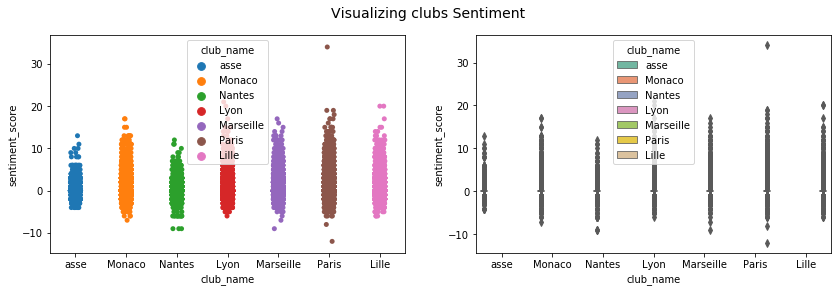

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='club_name', y="sentiment_score", 
                   hue='club_name', data=df, ax=ax1)
bp = sns.boxplot(x='club_name', y="sentiment_score", 
                 hue='club_name', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing clubs Sentiment', fontsize=14)

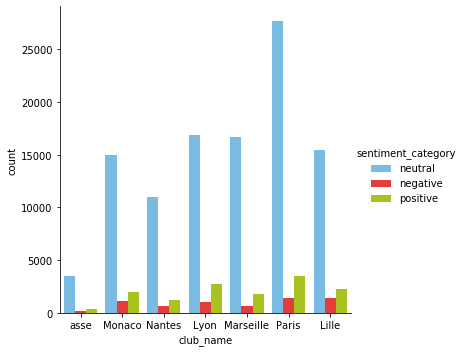

In [170]:
fc = sns.factorplot(x="club_name", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [183]:
pos_idx = df[(df.club_name=='Monaco') & (df.sentiment_score == 17)].index[0]
neg_idx = df[(df.club_name=='Paris') & (df.sentiment_score == -12)].index[0]

print('Most Negative Tweet regarding Paris:', club_tweets.iloc[neg_idx][['tweet_full_text']][0])
print()
print('Most Positive Tweet regarding Monaco:', club_tweets.iloc[pos_idx][['tweet_full_text']][0])

Most Negative Tweet regarding Paris: rt @ikurotenshi: @blueyrl is nuts 
@ferra_rl is nuts 
@chausetterl is nuts 
@psgesports is nuts 
gn

Most Positive Tweet regarding Monaco: as monaco have reached an agreement with corinthians for the transfer of defender jemerson we'd like to express our deepest gratitude to our championship-winning brazilian and wish him the very best of luck back home 🇧🇷 https://tco/11khrfzbje
